<a id="plan"></a>

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center">
      Predicting a song's populatiry on Spotify with Random Forrests<br><br>
  </div> 
  
  <div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 20px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      Justine Ferret, Arthur Guyart et Yanis Martinet
  </div>

### Imports

In [24]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# base modules
import os
import sys
import copy
import logging

# custom module
from emlyon_module.imports import *
from emlyon_module.structured import *

# for manipulating data
from pandas_summary import DataFrameSummary

# for Machine Learning
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

# for visualization
from IPython.display import display
from matplotlib import pyplot as plt
# plotly
# seaborn
# altair

In [26]:
path_to_repo = os.path.dirname(os.getcwd())

path = os.path.join(path_to_repo, "data", "")

In [27]:
path

'/Users/yanismartinet/Documents/GitHub/ML-Spotify/data/'

In [28]:
!ls {path}

data.csv


# 1. Data Inspection

<a id="about"></a>

### $\bullet$ Import the data

[Back to top](#plan)

In [110]:
path_to_datasets = os.path.join(path, 'data.csv')
print(path_to_datasets)

/Users/yanismartinet/Documents/GitHub/ML-Spotify/data/data.csv


In [111]:
df_raw = pd.read_csv(path_to_datasets, low_memory = False, parse_dates = ["release_date"])

<a id="look_data"></a>

### $\bullet$ Look at the data

[Back to top](#plan)

In [33]:
df_raw.dtypes

acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

In [11]:
df_raw

acousticness                             artists  danceability  \
0           0.991000                     ['Mamie Smith']         0.598   
1           0.643000           ["Screamin' Jay Hawkins"]         0.852   
2           0.993000                     ['Mamie Smith']         0.647   
3           0.000173                 ['Oscar Velazquez']         0.730   
4           0.295000                            ['Mixe']         0.704   
...              ...                                 ...           ...   
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385      0.795000                    ['Alessia Cara']         0.429   
174386      0.806000                       ['Roger Fly']         0.671   
174387      0.920000                    ['Taylor Swift']         0.462   
174388      0.239000                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
0            168333   0.224         0  0cS0A1fUEUd1EW3FcF8AEI   
1            150200   0.517         0  0hbkKFIJm7Z05H8Zl9w30f   
2            163827   0.186         0  11m7laMUgmOKqI3oYzuhne   
3            422087   0.798         0  19Lc5SfJJ5O1oaxY0fpwfh   
4            165224   0.707         1  2hJjbsLCytGsnAHfdsLejp   
...             ...     ...       ...                     ...   
174384       147615   0.866         0  46LhBf6TvYjZU2SMvGZAbn   
174385       144720   0.211         0  7tue2Wemjd0FZzRtDrQFZd   
174386       218147   0.589         0  48Qj61hOdYmUCFJbpQ29Ob   
174387       244000   0.240         1  1gcyHQpBQ1lfXGdhZmWrHP   
174388       197710   0.460         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  \
0               0.000522    5    0.3790   -12.628     0   
1               0.026400    5    0.0809    -7.261     0   
2               0.000018    0    0.5190   -12.098     1   
3               0.801000    2    0.1280    -7.311     1   
4               0.000246   10    0.4020    -6.036     0   
...                  ...  ...       ...       ...   ...   
174384          0.000060    6    0.1780    -5.089     0   
174385          0.000000    4    0.1960   -11.665     1   
174386          0.920000    4    0.1130   -12.393     0   
174387          0.000000    0    0.1130   -12.077     1   
174388          0.891000    7    0.2150   -12.237     1   

                                                     name  popularity  \
0                                Keep A Song In Your Soul          12   
1                                    I Put A Spell On You           7   
2                                            Golfing Papa           4   
3       True House Music - Xavier Santos & Carlos Gomi...          17   
4                                               Xuniverxe           2   
...                                                   ...         ...   
174384                                            The One           0   
174385                                      A Little More           0   
174386                                           Together           0   
174387                                 champagne problems          69   
174388                                     Improvisations           0   

       release_date  speechiness    tempo  valence  year  
0        1920-01-01       0.0936  149.976   0.6340  1920  
1        1920-01-05       0.0534   86.889   0.9500  1920  
2        1920-01-01       0.1740   97.600   0.6890  1920  
3        1920-01-01       0.0425  127.997   0.0422  1920  
4        1920-10-01       0.0768  122.076   0.2990  1920  
...             ...          ...      ...      ...   ...  
174384   2020-12-25       0.0356  125.972   0.1860  2020  
174385   2021-01-22       0.0360   94.710   0.2280  2021  
174386   2020-12-09       0.0282  108.058   0.7140  2020  
174387   2021-01-07       0.0377  171.319   0.3200  2021  
174388   2020-12-09       0.0258  112.208   0.7470  2020  

[174389 rows x 19 columns]

As we can see, the elements in the 'artists' column are actually sublists. For example on the row 174,384, the song has 3 different artists. In order to process the fact that a song could have multiple, we will add a column for each secondary artist on a song so that the model can process each artist individualy instead of processing the list as a single element.

In [12]:
for i, l in enumerate(df_raw["artists"]):
    print("list",i,"is",type(l))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>
list 11 is <class 'str'>
list 12 is <class 'str'>
list 13 is <class 'str'>
list 14 is <class 'str'>
list 15 is <class 'str'>
list 16 is <class 'str'>
list 17 is <class 'str'>
list 18 is <class 'str'>
list 19 is <class 'str'>
list 20 is <class 'str'>
list 21 is <class 'str'>
list 22 is <class 'str'>
list 23 is <class 'str'>
list 24 is <class 'str'>
list 25 is <class 'str'>
list 26 is <class 'str'>
list 27 is <class 'str'>
list 28 is <class 'str'>
list 29 is <class 'str'>
list 30 is <class 'str'>
list 31 is <class 'str'>
list 32 is <class 'str'>
list 33 is <class 'str'>
list 34 is <class 'str'>
list 35 is <class 'str'>
list 36 is <class 'str'>
list 37 is <class 'str'>
list 38 is <class 'str'>
list 39 is <class 'str'>
list 40 is

list 577 is <class 'str'>
list 578 is <class 'str'>
list 579 is <class 'str'>
list 580 is <class 'str'>
list 581 is <class 'str'>
list 582 is <class 'str'>
list 583 is <class 'str'>
list 584 is <class 'str'>
list 585 is <class 'str'>
list 586 is <class 'str'>
list 587 is <class 'str'>
list 588 is <class 'str'>
list 589 is <class 'str'>
list 590 is <class 'str'>
list 591 is <class 'str'>
list 592 is <class 'str'>
list 593 is <class 'str'>
list 594 is <class 'str'>
list 595 is <class 'str'>
list 596 is <class 'str'>
list 597 is <class 'str'>
list 598 is <class 'str'>
list 599 is <class 'str'>
list 600 is <class 'str'>
list 601 is <class 'str'>
list 602 is <class 'str'>
list 603 is <class 'str'>
list 604 is <class 'str'>
list 605 is <class 'str'>
list 606 is <class 'str'>
list 607 is <class 'str'>
list 608 is <class 'str'>
list 609 is <class 'str'>
list 610 is <class 'str'>
list 611 is <class 'str'>
list 612 is <class 'str'>
list 613 is <class 'str'>
list 614 is <class 'str'>
list 615 is 

list 1077 is <class 'str'>
list 1078 is <class 'str'>
list 1079 is <class 'str'>
list 1080 is <class 'str'>
list 1081 is <class 'str'>
list 1082 is <class 'str'>
list 1083 is <class 'str'>
list 1084 is <class 'str'>
list 1085 is <class 'str'>
list 1086 is <class 'str'>
list 1087 is <class 'str'>
list 1088 is <class 'str'>
list 1089 is <class 'str'>
list 1090 is <class 'str'>
list 1091 is <class 'str'>
list 1092 is <class 'str'>
list 1093 is <class 'str'>
list 1094 is <class 'str'>
list 1095 is <class 'str'>
list 1096 is <class 'str'>
list 1097 is <class 'str'>
list 1098 is <class 'str'>
list 1099 is <class 'str'>
list 1100 is <class 'str'>
list 1101 is <class 'str'>
list 1102 is <class 'str'>
list 1103 is <class 'str'>
list 1104 is <class 'str'>
list 1105 is <class 'str'>
list 1106 is <class 'str'>
list 1107 is <class 'str'>
list 1108 is <class 'str'>
list 1109 is <class 'str'>
list 1110 is <class 'str'>
list 1111 is <class 'str'>
list 1112 is <class 'str'>
list 1113 is <class 'str'>
l

list 1702 is <class 'str'>
list 1703 is <class 'str'>
list 1704 is <class 'str'>
list 1705 is <class 'str'>
list 1706 is <class 'str'>
list 1707 is <class 'str'>
list 1708 is <class 'str'>
list 1709 is <class 'str'>
list 1710 is <class 'str'>
list 1711 is <class 'str'>
list 1712 is <class 'str'>
list 1713 is <class 'str'>
list 1714 is <class 'str'>
list 1715 is <class 'str'>
list 1716 is <class 'str'>
list 1717 is <class 'str'>
list 1718 is <class 'str'>
list 1719 is <class 'str'>
list 1720 is <class 'str'>
list 1721 is <class 'str'>
list 1722 is <class 'str'>
list 1723 is <class 'str'>
list 1724 is <class 'str'>
list 1725 is <class 'str'>
list 1726 is <class 'str'>
list 1727 is <class 'str'>
list 1728 is <class 'str'>
list 1729 is <class 'str'>
list 1730 is <class 'str'>
list 1731 is <class 'str'>
list 1732 is <class 'str'>
list 1733 is <class 'str'>
list 1734 is <class 'str'>
list 1735 is <class 'str'>
list 1736 is <class 'str'>
list 1737 is <class 'str'>
list 1738 is <class 'str'>
l

list 2327 is <class 'str'>
list 2328 is <class 'str'>
list 2329 is <class 'str'>
list 2330 is <class 'str'>
list 2331 is <class 'str'>
list 2332 is <class 'str'>
list 2333 is <class 'str'>
list 2334 is <class 'str'>
list 2335 is <class 'str'>
list 2336 is <class 'str'>
list 2337 is <class 'str'>
list 2338 is <class 'str'>
list 2339 is <class 'str'>
list 2340 is <class 'str'>
list 2341 is <class 'str'>
list 2342 is <class 'str'>
list 2343 is <class 'str'>
list 2344 is <class 'str'>
list 2345 is <class 'str'>
list 2346 is <class 'str'>
list 2347 is <class 'str'>
list 2348 is <class 'str'>
list 2349 is <class 'str'>
list 2350 is <class 'str'>
list 2351 is <class 'str'>
list 2352 is <class 'str'>
list 2353 is <class 'str'>
list 2354 is <class 'str'>
list 2355 is <class 'str'>
list 2356 is <class 'str'>
list 2357 is <class 'str'>
list 2358 is <class 'str'>
list 2359 is <class 'str'>
list 2360 is <class 'str'>
list 2361 is <class 'str'>
list 2362 is <class 'str'>
list 2363 is <class 'str'>
l

list 2951 is <class 'str'>
list 2952 is <class 'str'>
list 2953 is <class 'str'>
list 2954 is <class 'str'>
list 2955 is <class 'str'>
list 2956 is <class 'str'>
list 2957 is <class 'str'>
list 2958 is <class 'str'>
list 2959 is <class 'str'>
list 2960 is <class 'str'>
list 2961 is <class 'str'>
list 2962 is <class 'str'>
list 2963 is <class 'str'>
list 2964 is <class 'str'>
list 2965 is <class 'str'>
list 2966 is <class 'str'>
list 2967 is <class 'str'>
list 2968 is <class 'str'>
list 2969 is <class 'str'>
list 2970 is <class 'str'>
list 2971 is <class 'str'>
list 2972 is <class 'str'>
list 2973 is <class 'str'>
list 2974 is <class 'str'>
list 2975 is <class 'str'>
list 2976 is <class 'str'>
list 2977 is <class 'str'>
list 2978 is <class 'str'>
list 2979 is <class 'str'>
list 2980 is <class 'str'>
list 2981 is <class 'str'>
list 2982 is <class 'str'>
list 2983 is <class 'str'>
list 2984 is <class 'str'>
list 2985 is <class 'str'>
list 2986 is <class 'str'>
list 2987 is <class 'str'>
l

list 3576 is <class 'str'>
list 3577 is <class 'str'>
list 3578 is <class 'str'>
list 3579 is <class 'str'>
list 3580 is <class 'str'>
list 3581 is <class 'str'>
list 3582 is <class 'str'>
list 3583 is <class 'str'>
list 3584 is <class 'str'>
list 3585 is <class 'str'>
list 3586 is <class 'str'>
list 3587 is <class 'str'>
list 3588 is <class 'str'>
list 3589 is <class 'str'>
list 3590 is <class 'str'>
list 3591 is <class 'str'>
list 3592 is <class 'str'>
list 3593 is <class 'str'>
list 3594 is <class 'str'>
list 3595 is <class 'str'>
list 3596 is <class 'str'>
list 3597 is <class 'str'>
list 3598 is <class 'str'>
list 3599 is <class 'str'>
list 3600 is <class 'str'>
list 3601 is <class 'str'>
list 3602 is <class 'str'>
list 3603 is <class 'str'>
list 3604 is <class 'str'>
list 3605 is <class 'str'>
list 3606 is <class 'str'>
list 3607 is <class 'str'>
list 3608 is <class 'str'>
list 3609 is <class 'str'>
list 3610 is <class 'str'>
list 3611 is <class 'str'>
list 3612 is <class 'str'>
l

list 4201 is <class 'str'>
list 4202 is <class 'str'>
list 4203 is <class 'str'>
list 4204 is <class 'str'>
list 4205 is <class 'str'>
list 4206 is <class 'str'>
list 4207 is <class 'str'>
list 4208 is <class 'str'>
list 4209 is <class 'str'>
list 4210 is <class 'str'>
list 4211 is <class 'str'>
list 4212 is <class 'str'>
list 4213 is <class 'str'>
list 4214 is <class 'str'>
list 4215 is <class 'str'>
list 4216 is <class 'str'>
list 4217 is <class 'str'>
list 4218 is <class 'str'>
list 4219 is <class 'str'>
list 4220 is <class 'str'>
list 4221 is <class 'str'>
list 4222 is <class 'str'>
list 4223 is <class 'str'>
list 4224 is <class 'str'>
list 4225 is <class 'str'>
list 4226 is <class 'str'>
list 4227 is <class 'str'>
list 4228 is <class 'str'>
list 4229 is <class 'str'>
list 4230 is <class 'str'>
list 4231 is <class 'str'>
list 4232 is <class 'str'>
list 4233 is <class 'str'>
list 4234 is <class 'str'>
list 4235 is <class 'str'>
list 4236 is <class 'str'>
list 4237 is <class 'str'>
l

list 4826 is <class 'str'>
list 4827 is <class 'str'>
list 4828 is <class 'str'>
list 4829 is <class 'str'>
list 4830 is <class 'str'>
list 4831 is <class 'str'>
list 4832 is <class 'str'>
list 4833 is <class 'str'>
list 4834 is <class 'str'>
list 4835 is <class 'str'>
list 4836 is <class 'str'>
list 4837 is <class 'str'>
list 4838 is <class 'str'>
list 4839 is <class 'str'>
list 4840 is <class 'str'>
list 4841 is <class 'str'>
list 4842 is <class 'str'>
list 4843 is <class 'str'>
list 4844 is <class 'str'>
list 4845 is <class 'str'>
list 4846 is <class 'str'>
list 4847 is <class 'str'>
list 4848 is <class 'str'>
list 4849 is <class 'str'>
list 4850 is <class 'str'>
list 4851 is <class 'str'>
list 4852 is <class 'str'>
list 4853 is <class 'str'>
list 4854 is <class 'str'>
list 4855 is <class 'str'>
list 4856 is <class 'str'>
list 4857 is <class 'str'>
list 4858 is <class 'str'>
list 4859 is <class 'str'>
list 4860 is <class 'str'>
list 4861 is <class 'str'>
list 4862 is <class 'str'>
l

list 5451 is <class 'str'>
list 5452 is <class 'str'>
list 5453 is <class 'str'>
list 5454 is <class 'str'>
list 5455 is <class 'str'>
list 5456 is <class 'str'>
list 5457 is <class 'str'>
list 5458 is <class 'str'>
list 5459 is <class 'str'>
list 5460 is <class 'str'>
list 5461 is <class 'str'>
list 5462 is <class 'str'>
list 5463 is <class 'str'>
list 5464 is <class 'str'>
list 5465 is <class 'str'>
list 5466 is <class 'str'>
list 5467 is <class 'str'>
list 5468 is <class 'str'>
list 5469 is <class 'str'>
list 5470 is <class 'str'>
list 5471 is <class 'str'>
list 5472 is <class 'str'>
list 5473 is <class 'str'>
list 5474 is <class 'str'>
list 5475 is <class 'str'>
list 5476 is <class 'str'>
list 5477 is <class 'str'>
list 5478 is <class 'str'>
list 5479 is <class 'str'>
list 5480 is <class 'str'>
list 5481 is <class 'str'>
list 5482 is <class 'str'>
list 5483 is <class 'str'>
list 5484 is <class 'str'>
list 5485 is <class 'str'>
list 5486 is <class 'str'>
list 5487 is <class 'str'>
l

list 6076 is <class 'str'>
list 6077 is <class 'str'>
list 6078 is <class 'str'>
list 6079 is <class 'str'>
list 6080 is <class 'str'>
list 6081 is <class 'str'>
list 6082 is <class 'str'>
list 6083 is <class 'str'>
list 6084 is <class 'str'>
list 6085 is <class 'str'>
list 6086 is <class 'str'>
list 6087 is <class 'str'>
list 6088 is <class 'str'>
list 6089 is <class 'str'>
list 6090 is <class 'str'>
list 6091 is <class 'str'>
list 6092 is <class 'str'>
list 6093 is <class 'str'>
list 6094 is <class 'str'>
list 6095 is <class 'str'>
list 6096 is <class 'str'>
list 6097 is <class 'str'>
list 6098 is <class 'str'>
list 6099 is <class 'str'>
list 6100 is <class 'str'>
list 6101 is <class 'str'>
list 6102 is <class 'str'>
list 6103 is <class 'str'>
list 6104 is <class 'str'>
list 6105 is <class 'str'>
list 6106 is <class 'str'>
list 6107 is <class 'str'>
list 6108 is <class 'str'>
list 6109 is <class 'str'>
list 6110 is <class 'str'>
list 6111 is <class 'str'>
list 6112 is <class 'str'>
l

list 6701 is <class 'str'>
list 6702 is <class 'str'>
list 6703 is <class 'str'>
list 6704 is <class 'str'>
list 6705 is <class 'str'>
list 6706 is <class 'str'>
list 6707 is <class 'str'>
list 6708 is <class 'str'>
list 6709 is <class 'str'>
list 6710 is <class 'str'>
list 6711 is <class 'str'>
list 6712 is <class 'str'>
list 6713 is <class 'str'>
list 6714 is <class 'str'>
list 6715 is <class 'str'>
list 6716 is <class 'str'>
list 6717 is <class 'str'>
list 6718 is <class 'str'>
list 6719 is <class 'str'>
list 6720 is <class 'str'>
list 6721 is <class 'str'>
list 6722 is <class 'str'>
list 6723 is <class 'str'>
list 6724 is <class 'str'>
list 6725 is <class 'str'>
list 6726 is <class 'str'>
list 6727 is <class 'str'>
list 6728 is <class 'str'>
list 6729 is <class 'str'>
list 6730 is <class 'str'>
list 6731 is <class 'str'>
list 6732 is <class 'str'>
list 6733 is <class 'str'>
list 6734 is <class 'str'>
list 6735 is <class 'str'>
list 6736 is <class 'str'>
list 6737 is <class 'str'>
l

list 7326 is <class 'str'>
list 7327 is <class 'str'>
list 7328 is <class 'str'>
list 7329 is <class 'str'>
list 7330 is <class 'str'>
list 7331 is <class 'str'>
list 7332 is <class 'str'>
list 7333 is <class 'str'>
list 7334 is <class 'str'>
list 7335 is <class 'str'>
list 7336 is <class 'str'>
list 7337 is <class 'str'>
list 7338 is <class 'str'>
list 7339 is <class 'str'>
list 7340 is <class 'str'>
list 7341 is <class 'str'>
list 7342 is <class 'str'>
list 7343 is <class 'str'>
list 7344 is <class 'str'>
list 7345 is <class 'str'>
list 7346 is <class 'str'>
list 7347 is <class 'str'>
list 7348 is <class 'str'>
list 7349 is <class 'str'>
list 7350 is <class 'str'>
list 7351 is <class 'str'>
list 7352 is <class 'str'>
list 7353 is <class 'str'>
list 7354 is <class 'str'>
list 7355 is <class 'str'>
list 7356 is <class 'str'>
list 7357 is <class 'str'>
list 7358 is <class 'str'>
list 7359 is <class 'str'>
list 7360 is <class 'str'>
list 7361 is <class 'str'>
list 7362 is <class 'str'>
l

list 7950 is <class 'str'>
list 7951 is <class 'str'>
list 7952 is <class 'str'>
list 7953 is <class 'str'>
list 7954 is <class 'str'>
list 7955 is <class 'str'>
list 7956 is <class 'str'>
list 7957 is <class 'str'>
list 7958 is <class 'str'>
list 7959 is <class 'str'>
list 7960 is <class 'str'>
list 7961 is <class 'str'>
list 7962 is <class 'str'>
list 7963 is <class 'str'>
list 7964 is <class 'str'>
list 7965 is <class 'str'>
list 7966 is <class 'str'>
list 7967 is <class 'str'>
list 7968 is <class 'str'>
list 7969 is <class 'str'>
list 7970 is <class 'str'>
list 7971 is <class 'str'>
list 7972 is <class 'str'>
list 7973 is <class 'str'>
list 7974 is <class 'str'>
list 7975 is <class 'str'>
list 7976 is <class 'str'>
list 7977 is <class 'str'>
list 7978 is <class 'str'>
list 7979 is <class 'str'>
list 7980 is <class 'str'>
list 7981 is <class 'str'>
list 7982 is <class 'str'>
list 7983 is <class 'str'>
list 7984 is <class 'str'>
list 7985 is <class 'str'>
list 7986 is <class 'str'>
l

list 8575 is <class 'str'>
list 8576 is <class 'str'>
list 8577 is <class 'str'>
list 8578 is <class 'str'>
list 8579 is <class 'str'>
list 8580 is <class 'str'>
list 8581 is <class 'str'>
list 8582 is <class 'str'>
list 8583 is <class 'str'>
list 8584 is <class 'str'>
list 8585 is <class 'str'>
list 8586 is <class 'str'>
list 8587 is <class 'str'>
list 8588 is <class 'str'>
list 8589 is <class 'str'>
list 8590 is <class 'str'>
list 8591 is <class 'str'>
list 8592 is <class 'str'>
list 8593 is <class 'str'>
list 8594 is <class 'str'>
list 8595 is <class 'str'>
list 8596 is <class 'str'>
list 8597 is <class 'str'>
list 8598 is <class 'str'>
list 8599 is <class 'str'>
list 8600 is <class 'str'>
list 8601 is <class 'str'>
list 8602 is <class 'str'>
list 8603 is <class 'str'>
list 8604 is <class 'str'>
list 8605 is <class 'str'>
list 8606 is <class 'str'>
list 8607 is <class 'str'>
list 8608 is <class 'str'>
list 8609 is <class 'str'>
list 8610 is <class 'str'>
list 8611 is <class 'str'>
l

list 9200 is <class 'str'>
list 9201 is <class 'str'>
list 9202 is <class 'str'>
list 9203 is <class 'str'>
list 9204 is <class 'str'>
list 9205 is <class 'str'>
list 9206 is <class 'str'>
list 9207 is <class 'str'>
list 9208 is <class 'str'>
list 9209 is <class 'str'>
list 9210 is <class 'str'>
list 9211 is <class 'str'>
list 9212 is <class 'str'>
list 9213 is <class 'str'>
list 9214 is <class 'str'>
list 9215 is <class 'str'>
list 9216 is <class 'str'>
list 9217 is <class 'str'>
list 9218 is <class 'str'>
list 9219 is <class 'str'>
list 9220 is <class 'str'>
list 9221 is <class 'str'>
list 9222 is <class 'str'>
list 9223 is <class 'str'>
list 9224 is <class 'str'>
list 9225 is <class 'str'>
list 9226 is <class 'str'>
list 9227 is <class 'str'>
list 9228 is <class 'str'>
list 9229 is <class 'str'>
list 9230 is <class 'str'>
list 9231 is <class 'str'>
list 9232 is <class 'str'>
list 9233 is <class 'str'>
list 9234 is <class 'str'>
list 9235 is <class 'str'>
list 9236 is <class 'str'>
l

list 9825 is <class 'str'>
list 9826 is <class 'str'>
list 9827 is <class 'str'>
list 9828 is <class 'str'>
list 9829 is <class 'str'>
list 9830 is <class 'str'>
list 9831 is <class 'str'>
list 9832 is <class 'str'>
list 9833 is <class 'str'>
list 9834 is <class 'str'>
list 9835 is <class 'str'>
list 9836 is <class 'str'>
list 9837 is <class 'str'>
list 9838 is <class 'str'>
list 9839 is <class 'str'>
list 9840 is <class 'str'>
list 9841 is <class 'str'>
list 9842 is <class 'str'>
list 9843 is <class 'str'>
list 9844 is <class 'str'>
list 9845 is <class 'str'>
list 9846 is <class 'str'>
list 9847 is <class 'str'>
list 9848 is <class 'str'>
list 9849 is <class 'str'>
list 9850 is <class 'str'>
list 9851 is <class 'str'>
list 9852 is <class 'str'>
list 9853 is <class 'str'>
list 9854 is <class 'str'>
list 9855 is <class 'str'>
list 9856 is <class 'str'>
list 9857 is <class 'str'>
list 9858 is <class 'str'>
list 9859 is <class 'str'>
list 9860 is <class 'str'>
list 9861 is <class 'str'>
l

list 10450 is <class 'str'>
list 10451 is <class 'str'>
list 10452 is <class 'str'>
list 10453 is <class 'str'>
list 10454 is <class 'str'>
list 10455 is <class 'str'>
list 10456 is <class 'str'>
list 10457 is <class 'str'>
list 10458 is <class 'str'>
list 10459 is <class 'str'>
list 10460 is <class 'str'>
list 10461 is <class 'str'>
list 10462 is <class 'str'>
list 10463 is <class 'str'>
list 10464 is <class 'str'>
list 10465 is <class 'str'>
list 10466 is <class 'str'>
list 10467 is <class 'str'>
list 10468 is <class 'str'>
list 10469 is <class 'str'>
list 10470 is <class 'str'>
list 10471 is <class 'str'>
list 10472 is <class 'str'>
list 10473 is <class 'str'>
list 10474 is <class 'str'>
list 10475 is <class 'str'>
list 10476 is <class 'str'>
list 10477 is <class 'str'>
list 10478 is <class 'str'>
list 10479 is <class 'str'>
list 10480 is <class 'str'>
list 10481 is <class 'str'>
list 10482 is <class 'str'>
list 10483 is <class 'str'>
list 10484 is <class 'str'>
list 10485 is <class

list 11075 is <class 'str'>
list 11076 is <class 'str'>
list 11077 is <class 'str'>
list 11078 is <class 'str'>
list 11079 is <class 'str'>
list 11080 is <class 'str'>
list 11081 is <class 'str'>
list 11082 is <class 'str'>
list 11083 is <class 'str'>
list 11084 is <class 'str'>
list 11085 is <class 'str'>
list 11086 is <class 'str'>
list 11087 is <class 'str'>
list 11088 is <class 'str'>
list 11089 is <class 'str'>
list 11090 is <class 'str'>
list 11091 is <class 'str'>
list 11092 is <class 'str'>
list 11093 is <class 'str'>
list 11094 is <class 'str'>
list 11095 is <class 'str'>
list 11096 is <class 'str'>
list 11097 is <class 'str'>
list 11098 is <class 'str'>
list 11099 is <class 'str'>
list 11100 is <class 'str'>
list 11101 is <class 'str'>
list 11102 is <class 'str'>
list 11103 is <class 'str'>
list 11104 is <class 'str'>
list 11105 is <class 'str'>
list 11106 is <class 'str'>
list 11107 is <class 'str'>
list 11108 is <class 'str'>
list 11109 is <class 'str'>
list 11110 is <class

list 11700 is <class 'str'>
list 11701 is <class 'str'>
list 11702 is <class 'str'>
list 11703 is <class 'str'>
list 11704 is <class 'str'>
list 11705 is <class 'str'>
list 11706 is <class 'str'>
list 11707 is <class 'str'>
list 11708 is <class 'str'>
list 11709 is <class 'str'>
list 11710 is <class 'str'>
list 11711 is <class 'str'>
list 11712 is <class 'str'>
list 11713 is <class 'str'>
list 11714 is <class 'str'>
list 11715 is <class 'str'>
list 11716 is <class 'str'>
list 11717 is <class 'str'>
list 11718 is <class 'str'>
list 11719 is <class 'str'>
list 11720 is <class 'str'>
list 11721 is <class 'str'>
list 11722 is <class 'str'>
list 11723 is <class 'str'>
list 11724 is <class 'str'>
list 11725 is <class 'str'>
list 11726 is <class 'str'>
list 11727 is <class 'str'>
list 11728 is <class 'str'>
list 11729 is <class 'str'>
list 11730 is <class 'str'>
list 11731 is <class 'str'>
list 11732 is <class 'str'>
list 11733 is <class 'str'>
list 11734 is <class 'str'>
list 11735 is <class

list 12325 is <class 'str'>
list 12326 is <class 'str'>
list 12327 is <class 'str'>
list 12328 is <class 'str'>
list 12329 is <class 'str'>
list 12330 is <class 'str'>
list 12331 is <class 'str'>
list 12332 is <class 'str'>
list 12333 is <class 'str'>
list 12334 is <class 'str'>
list 12335 is <class 'str'>
list 12336 is <class 'str'>
list 12337 is <class 'str'>
list 12338 is <class 'str'>
list 12339 is <class 'str'>
list 12340 is <class 'str'>
list 12341 is <class 'str'>
list 12342 is <class 'str'>
list 12343 is <class 'str'>
list 12344 is <class 'str'>
list 12345 is <class 'str'>
list 12346 is <class 'str'>
list 12347 is <class 'str'>
list 12348 is <class 'str'>
list 12349 is <class 'str'>
list 12350 is <class 'str'>
list 12351 is <class 'str'>
list 12352 is <class 'str'>
list 12353 is <class 'str'>
list 12354 is <class 'str'>
list 12355 is <class 'str'>
list 12356 is <class 'str'>
list 12357 is <class 'str'>
list 12358 is <class 'str'>
list 12359 is <class 'str'>
list 12360 is <class

list 12949 is <class 'str'>
list 12950 is <class 'str'>
list 12951 is <class 'str'>
list 12952 is <class 'str'>
list 12953 is <class 'str'>
list 12954 is <class 'str'>
list 12955 is <class 'str'>
list 12956 is <class 'str'>
list 12957 is <class 'str'>
list 12958 is <class 'str'>
list 12959 is <class 'str'>
list 12960 is <class 'str'>
list 12961 is <class 'str'>
list 12962 is <class 'str'>
list 12963 is <class 'str'>
list 12964 is <class 'str'>
list 12965 is <class 'str'>
list 12966 is <class 'str'>
list 12967 is <class 'str'>
list 12968 is <class 'str'>
list 12969 is <class 'str'>
list 12970 is <class 'str'>
list 12971 is <class 'str'>
list 12972 is <class 'str'>
list 12973 is <class 'str'>
list 12974 is <class 'str'>
list 12975 is <class 'str'>
list 12976 is <class 'str'>
list 12977 is <class 'str'>
list 12978 is <class 'str'>
list 12979 is <class 'str'>
list 12980 is <class 'str'>
list 12981 is <class 'str'>
list 12982 is <class 'str'>
list 12983 is <class 'str'>
list 12984 is <class

list 13449 is <class 'str'>
list 13450 is <class 'str'>
list 13451 is <class 'str'>
list 13452 is <class 'str'>
list 13453 is <class 'str'>
list 13454 is <class 'str'>
list 13455 is <class 'str'>
list 13456 is <class 'str'>
list 13457 is <class 'str'>
list 13458 is <class 'str'>
list 13459 is <class 'str'>
list 13460 is <class 'str'>
list 13461 is <class 'str'>
list 13462 is <class 'str'>
list 13463 is <class 'str'>
list 13464 is <class 'str'>
list 13465 is <class 'str'>
list 13466 is <class 'str'>
list 13467 is <class 'str'>
list 13468 is <class 'str'>
list 13469 is <class 'str'>
list 13470 is <class 'str'>
list 13471 is <class 'str'>
list 13472 is <class 'str'>
list 13473 is <class 'str'>
list 13474 is <class 'str'>
list 13475 is <class 'str'>
list 13476 is <class 'str'>
list 13477 is <class 'str'>
list 13478 is <class 'str'>
list 13479 is <class 'str'>
list 13480 is <class 'str'>
list 13481 is <class 'str'>
list 13482 is <class 'str'>
list 13483 is <class 'str'>
list 13484 is <class

list 14074 is <class 'str'>
list 14075 is <class 'str'>
list 14076 is <class 'str'>
list 14077 is <class 'str'>
list 14078 is <class 'str'>
list 14079 is <class 'str'>
list 14080 is <class 'str'>
list 14081 is <class 'str'>
list 14082 is <class 'str'>
list 14083 is <class 'str'>
list 14084 is <class 'str'>
list 14085 is <class 'str'>
list 14086 is <class 'str'>
list 14087 is <class 'str'>
list 14088 is <class 'str'>
list 14089 is <class 'str'>
list 14090 is <class 'str'>
list 14091 is <class 'str'>
list 14092 is <class 'str'>
list 14093 is <class 'str'>
list 14094 is <class 'str'>
list 14095 is <class 'str'>
list 14096 is <class 'str'>
list 14097 is <class 'str'>
list 14098 is <class 'str'>
list 14099 is <class 'str'>
list 14100 is <class 'str'>
list 14101 is <class 'str'>
list 14102 is <class 'str'>
list 14103 is <class 'str'>
list 14104 is <class 'str'>
list 14105 is <class 'str'>
list 14106 is <class 'str'>
list 14107 is <class 'str'>
list 14108 is <class 'str'>
list 14109 is <class

list 14699 is <class 'str'>
list 14700 is <class 'str'>
list 14701 is <class 'str'>
list 14702 is <class 'str'>
list 14703 is <class 'str'>
list 14704 is <class 'str'>
list 14705 is <class 'str'>
list 14706 is <class 'str'>
list 14707 is <class 'str'>
list 14708 is <class 'str'>
list 14709 is <class 'str'>
list 14710 is <class 'str'>
list 14711 is <class 'str'>
list 14712 is <class 'str'>
list 14713 is <class 'str'>
list 14714 is <class 'str'>
list 14715 is <class 'str'>
list 14716 is <class 'str'>
list 14717 is <class 'str'>
list 14718 is <class 'str'>
list 14719 is <class 'str'>
list 14720 is <class 'str'>
list 14721 is <class 'str'>
list 14722 is <class 'str'>
list 14723 is <class 'str'>
list 14724 is <class 'str'>
list 14725 is <class 'str'>
list 14726 is <class 'str'>
list 14727 is <class 'str'>
list 14728 is <class 'str'>
list 14729 is <class 'str'>
list 14730 is <class 'str'>
list 14731 is <class 'str'>
list 14732 is <class 'str'>
list 14733 is <class 'str'>
list 14734 is <class

list 15324 is <class 'str'>
list 15325 is <class 'str'>
list 15326 is <class 'str'>
list 15327 is <class 'str'>
list 15328 is <class 'str'>
list 15329 is <class 'str'>
list 15330 is <class 'str'>
list 15331 is <class 'str'>
list 15332 is <class 'str'>
list 15333 is <class 'str'>
list 15334 is <class 'str'>
list 15335 is <class 'str'>
list 15336 is <class 'str'>
list 15337 is <class 'str'>
list 15338 is <class 'str'>
list 15339 is <class 'str'>
list 15340 is <class 'str'>
list 15341 is <class 'str'>
list 15342 is <class 'str'>
list 15343 is <class 'str'>
list 15344 is <class 'str'>
list 15345 is <class 'str'>
list 15346 is <class 'str'>
list 15347 is <class 'str'>
list 15348 is <class 'str'>
list 15349 is <class 'str'>
list 15350 is <class 'str'>
list 15351 is <class 'str'>
list 15352 is <class 'str'>
list 15353 is <class 'str'>
list 15354 is <class 'str'>
list 15355 is <class 'str'>
list 15356 is <class 'str'>
list 15357 is <class 'str'>
list 15358 is <class 'str'>
list 15359 is <class

list 15949 is <class 'str'>
list 15950 is <class 'str'>
list 15951 is <class 'str'>
list 15952 is <class 'str'>
list 15953 is <class 'str'>
list 15954 is <class 'str'>
list 15955 is <class 'str'>
list 15956 is <class 'str'>
list 15957 is <class 'str'>
list 15958 is <class 'str'>
list 15959 is <class 'str'>
list 15960 is <class 'str'>
list 15961 is <class 'str'>
list 15962 is <class 'str'>
list 15963 is <class 'str'>
list 15964 is <class 'str'>
list 15965 is <class 'str'>
list 15966 is <class 'str'>
list 15967 is <class 'str'>
list 15968 is <class 'str'>
list 15969 is <class 'str'>
list 15970 is <class 'str'>
list 15971 is <class 'str'>
list 15972 is <class 'str'>
list 15973 is <class 'str'>
list 15974 is <class 'str'>
list 15975 is <class 'str'>
list 15976 is <class 'str'>
list 15977 is <class 'str'>
list 15978 is <class 'str'>
list 15979 is <class 'str'>
list 15980 is <class 'str'>
list 15981 is <class 'str'>
list 15982 is <class 'str'>
list 15983 is <class 'str'>
list 15984 is <class

list 16574 is <class 'str'>
list 16575 is <class 'str'>
list 16576 is <class 'str'>
list 16577 is <class 'str'>
list 16578 is <class 'str'>
list 16579 is <class 'str'>
list 16580 is <class 'str'>
list 16581 is <class 'str'>
list 16582 is <class 'str'>
list 16583 is <class 'str'>
list 16584 is <class 'str'>
list 16585 is <class 'str'>
list 16586 is <class 'str'>
list 16587 is <class 'str'>
list 16588 is <class 'str'>
list 16589 is <class 'str'>
list 16590 is <class 'str'>
list 16591 is <class 'str'>
list 16592 is <class 'str'>
list 16593 is <class 'str'>
list 16594 is <class 'str'>
list 16595 is <class 'str'>
list 16596 is <class 'str'>
list 16597 is <class 'str'>
list 16598 is <class 'str'>
list 16599 is <class 'str'>
list 16600 is <class 'str'>
list 16601 is <class 'str'>
list 16602 is <class 'str'>
list 16603 is <class 'str'>
list 16604 is <class 'str'>
list 16605 is <class 'str'>
list 16606 is <class 'str'>
list 16607 is <class 'str'>
list 16608 is <class 'str'>
list 16609 is <class

list 17199 is <class 'str'>
list 17200 is <class 'str'>
list 17201 is <class 'str'>
list 17202 is <class 'str'>
list 17203 is <class 'str'>
list 17204 is <class 'str'>
list 17205 is <class 'str'>
list 17206 is <class 'str'>
list 17207 is <class 'str'>
list 17208 is <class 'str'>
list 17209 is <class 'str'>
list 17210 is <class 'str'>
list 17211 is <class 'str'>
list 17212 is <class 'str'>
list 17213 is <class 'str'>
list 17214 is <class 'str'>
list 17215 is <class 'str'>
list 17216 is <class 'str'>
list 17217 is <class 'str'>
list 17218 is <class 'str'>
list 17219 is <class 'str'>
list 17220 is <class 'str'>
list 17221 is <class 'str'>
list 17222 is <class 'str'>
list 17223 is <class 'str'>
list 17224 is <class 'str'>
list 17225 is <class 'str'>
list 17226 is <class 'str'>
list 17227 is <class 'str'>
list 17228 is <class 'str'>
list 17229 is <class 'str'>
list 17230 is <class 'str'>
list 17231 is <class 'str'>
list 17232 is <class 'str'>
list 17233 is <class 'str'>
list 17234 is <class

list 17823 is <class 'str'>
list 17824 is <class 'str'>
list 17825 is <class 'str'>
list 17826 is <class 'str'>
list 17827 is <class 'str'>
list 17828 is <class 'str'>
list 17829 is <class 'str'>
list 17830 is <class 'str'>
list 17831 is <class 'str'>
list 17832 is <class 'str'>
list 17833 is <class 'str'>
list 17834 is <class 'str'>
list 17835 is <class 'str'>
list 17836 is <class 'str'>
list 17837 is <class 'str'>
list 17838 is <class 'str'>
list 17839 is <class 'str'>
list 17840 is <class 'str'>
list 17841 is <class 'str'>
list 17842 is <class 'str'>
list 17843 is <class 'str'>
list 17844 is <class 'str'>
list 17845 is <class 'str'>
list 17846 is <class 'str'>
list 17847 is <class 'str'>
list 17848 is <class 'str'>
list 17849 is <class 'str'>
list 17850 is <class 'str'>
list 17851 is <class 'str'>
list 17852 is <class 'str'>
list 17853 is <class 'str'>
list 17854 is <class 'str'>
list 17855 is <class 'str'>
list 17856 is <class 'str'>
list 17857 is <class 'str'>
list 17858 is <class

list 18448 is <class 'str'>
list 18449 is <class 'str'>
list 18450 is <class 'str'>
list 18451 is <class 'str'>
list 18452 is <class 'str'>
list 18453 is <class 'str'>
list 18454 is <class 'str'>
list 18455 is <class 'str'>
list 18456 is <class 'str'>
list 18457 is <class 'str'>
list 18458 is <class 'str'>
list 18459 is <class 'str'>
list 18460 is <class 'str'>
list 18461 is <class 'str'>
list 18462 is <class 'str'>
list 18463 is <class 'str'>
list 18464 is <class 'str'>
list 18465 is <class 'str'>
list 18466 is <class 'str'>
list 18467 is <class 'str'>
list 18468 is <class 'str'>
list 18469 is <class 'str'>
list 18470 is <class 'str'>
list 18471 is <class 'str'>
list 18472 is <class 'str'>
list 18473 is <class 'str'>
list 18474 is <class 'str'>
list 18475 is <class 'str'>
list 18476 is <class 'str'>
list 18477 is <class 'str'>
list 18478 is <class 'str'>
list 18479 is <class 'str'>
list 18480 is <class 'str'>
list 18481 is <class 'str'>
list 18482 is <class 'str'>
list 18483 is <class

list 19073 is <class 'str'>
list 19074 is <class 'str'>
list 19075 is <class 'str'>
list 19076 is <class 'str'>
list 19077 is <class 'str'>
list 19078 is <class 'str'>
list 19079 is <class 'str'>
list 19080 is <class 'str'>
list 19081 is <class 'str'>
list 19082 is <class 'str'>
list 19083 is <class 'str'>
list 19084 is <class 'str'>
list 19085 is <class 'str'>
list 19086 is <class 'str'>
list 19087 is <class 'str'>
list 19088 is <class 'str'>
list 19089 is <class 'str'>
list 19090 is <class 'str'>
list 19091 is <class 'str'>
list 19092 is <class 'str'>
list 19093 is <class 'str'>
list 19094 is <class 'str'>
list 19095 is <class 'str'>
list 19096 is <class 'str'>
list 19097 is <class 'str'>
list 19098 is <class 'str'>
list 19099 is <class 'str'>
list 19100 is <class 'str'>
list 19101 is <class 'str'>
list 19102 is <class 'str'>
list 19103 is <class 'str'>
list 19104 is <class 'str'>
list 19105 is <class 'str'>
list 19106 is <class 'str'>
list 19107 is <class 'str'>
list 19108 is <class

list 19698 is <class 'str'>
list 19699 is <class 'str'>
list 19700 is <class 'str'>
list 19701 is <class 'str'>
list 19702 is <class 'str'>
list 19703 is <class 'str'>
list 19704 is <class 'str'>
list 19705 is <class 'str'>
list 19706 is <class 'str'>
list 19707 is <class 'str'>
list 19708 is <class 'str'>
list 19709 is <class 'str'>
list 19710 is <class 'str'>
list 19711 is <class 'str'>
list 19712 is <class 'str'>
list 19713 is <class 'str'>
list 19714 is <class 'str'>
list 19715 is <class 'str'>
list 19716 is <class 'str'>
list 19717 is <class 'str'>
list 19718 is <class 'str'>
list 19719 is <class 'str'>
list 19720 is <class 'str'>
list 19721 is <class 'str'>
list 19722 is <class 'str'>
list 19723 is <class 'str'>
list 19724 is <class 'str'>
list 19725 is <class 'str'>
list 19726 is <class 'str'>
list 19727 is <class 'str'>
list 19728 is <class 'str'>
list 19729 is <class 'str'>
list 19730 is <class 'str'>
list 19731 is <class 'str'>
list 19732 is <class 'str'>
list 19733 is <class

list 20323 is <class 'str'>
list 20324 is <class 'str'>
list 20325 is <class 'str'>
list 20326 is <class 'str'>
list 20327 is <class 'str'>
list 20328 is <class 'str'>
list 20329 is <class 'str'>
list 20330 is <class 'str'>
list 20331 is <class 'str'>
list 20332 is <class 'str'>
list 20333 is <class 'str'>
list 20334 is <class 'str'>
list 20335 is <class 'str'>
list 20336 is <class 'str'>
list 20337 is <class 'str'>
list 20338 is <class 'str'>
list 20339 is <class 'str'>
list 20340 is <class 'str'>
list 20341 is <class 'str'>
list 20342 is <class 'str'>
list 20343 is <class 'str'>
list 20344 is <class 'str'>
list 20345 is <class 'str'>
list 20346 is <class 'str'>
list 20347 is <class 'str'>
list 20348 is <class 'str'>
list 20349 is <class 'str'>
list 20350 is <class 'str'>
list 20351 is <class 'str'>
list 20352 is <class 'str'>
list 20353 is <class 'str'>
list 20354 is <class 'str'>
list 20355 is <class 'str'>
list 20356 is <class 'str'>
list 20357 is <class 'str'>
list 20358 is <class

list 20948 is <class 'str'>
list 20949 is <class 'str'>
list 20950 is <class 'str'>
list 20951 is <class 'str'>
list 20952 is <class 'str'>
list 20953 is <class 'str'>
list 20954 is <class 'str'>
list 20955 is <class 'str'>
list 20956 is <class 'str'>
list 20957 is <class 'str'>
list 20958 is <class 'str'>
list 20959 is <class 'str'>
list 20960 is <class 'str'>
list 20961 is <class 'str'>
list 20962 is <class 'str'>
list 20963 is <class 'str'>
list 20964 is <class 'str'>
list 20965 is <class 'str'>
list 20966 is <class 'str'>
list 20967 is <class 'str'>
list 20968 is <class 'str'>
list 20969 is <class 'str'>
list 20970 is <class 'str'>
list 20971 is <class 'str'>
list 20972 is <class 'str'>
list 20973 is <class 'str'>
list 20974 is <class 'str'>
list 20975 is <class 'str'>
list 20976 is <class 'str'>
list 20977 is <class 'str'>
list 20978 is <class 'str'>
list 20979 is <class 'str'>
list 20980 is <class 'str'>
list 20981 is <class 'str'>
list 20982 is <class 'str'>
list 20983 is <class

list 21573 is <class 'str'>
list 21574 is <class 'str'>
list 21575 is <class 'str'>
list 21576 is <class 'str'>
list 21577 is <class 'str'>
list 21578 is <class 'str'>
list 21579 is <class 'str'>
list 21580 is <class 'str'>
list 21581 is <class 'str'>
list 21582 is <class 'str'>
list 21583 is <class 'str'>
list 21584 is <class 'str'>
list 21585 is <class 'str'>
list 21586 is <class 'str'>
list 21587 is <class 'str'>
list 21588 is <class 'str'>
list 21589 is <class 'str'>
list 21590 is <class 'str'>
list 21591 is <class 'str'>
list 21592 is <class 'str'>
list 21593 is <class 'str'>
list 21594 is <class 'str'>
list 21595 is <class 'str'>
list 21596 is <class 'str'>
list 21597 is <class 'str'>
list 21598 is <class 'str'>
list 21599 is <class 'str'>
list 21600 is <class 'str'>
list 21601 is <class 'str'>
list 21602 is <class 'str'>
list 21603 is <class 'str'>
list 21604 is <class 'str'>
list 21605 is <class 'str'>
list 21606 is <class 'str'>
list 21607 is <class 'str'>
list 21608 is <class

list 22198 is <class 'str'>
list 22199 is <class 'str'>
list 22200 is <class 'str'>
list 22201 is <class 'str'>
list 22202 is <class 'str'>
list 22203 is <class 'str'>
list 22204 is <class 'str'>
list 22205 is <class 'str'>
list 22206 is <class 'str'>
list 22207 is <class 'str'>
list 22208 is <class 'str'>
list 22209 is <class 'str'>
list 22210 is <class 'str'>
list 22211 is <class 'str'>
list 22212 is <class 'str'>
list 22213 is <class 'str'>
list 22214 is <class 'str'>
list 22215 is <class 'str'>
list 22216 is <class 'str'>
list 22217 is <class 'str'>
list 22218 is <class 'str'>
list 22219 is <class 'str'>
list 22220 is <class 'str'>
list 22221 is <class 'str'>
list 22222 is <class 'str'>
list 22223 is <class 'str'>
list 22224 is <class 'str'>
list 22225 is <class 'str'>
list 22226 is <class 'str'>
list 22227 is <class 'str'>
list 22228 is <class 'str'>
list 22229 is <class 'str'>
list 22230 is <class 'str'>
list 22231 is <class 'str'>
list 22232 is <class 'str'>
list 22233 is <class

list 22822 is <class 'str'>
list 22823 is <class 'str'>
list 22824 is <class 'str'>
list 22825 is <class 'str'>
list 22826 is <class 'str'>
list 22827 is <class 'str'>
list 22828 is <class 'str'>
list 22829 is <class 'str'>
list 22830 is <class 'str'>
list 22831 is <class 'str'>
list 22832 is <class 'str'>
list 22833 is <class 'str'>
list 22834 is <class 'str'>
list 22835 is <class 'str'>
list 22836 is <class 'str'>
list 22837 is <class 'str'>
list 22838 is <class 'str'>
list 22839 is <class 'str'>
list 22840 is <class 'str'>
list 22841 is <class 'str'>
list 22842 is <class 'str'>
list 22843 is <class 'str'>
list 22844 is <class 'str'>
list 22845 is <class 'str'>
list 22846 is <class 'str'>
list 22847 is <class 'str'>
list 22848 is <class 'str'>
list 22849 is <class 'str'>
list 22850 is <class 'str'>
list 22851 is <class 'str'>
list 22852 is <class 'str'>
list 22853 is <class 'str'>
list 22854 is <class 'str'>
list 22855 is <class 'str'>
list 22856 is <class 'str'>
list 22857 is <class

list 23447 is <class 'str'>
list 23448 is <class 'str'>
list 23449 is <class 'str'>
list 23450 is <class 'str'>
list 23451 is <class 'str'>
list 23452 is <class 'str'>
list 23453 is <class 'str'>
list 23454 is <class 'str'>
list 23455 is <class 'str'>
list 23456 is <class 'str'>
list 23457 is <class 'str'>
list 23458 is <class 'str'>
list 23459 is <class 'str'>
list 23460 is <class 'str'>
list 23461 is <class 'str'>
list 23462 is <class 'str'>
list 23463 is <class 'str'>
list 23464 is <class 'str'>
list 23465 is <class 'str'>
list 23466 is <class 'str'>
list 23467 is <class 'str'>
list 23468 is <class 'str'>
list 23469 is <class 'str'>
list 23470 is <class 'str'>
list 23471 is <class 'str'>
list 23472 is <class 'str'>
list 23473 is <class 'str'>
list 23474 is <class 'str'>
list 23475 is <class 'str'>
list 23476 is <class 'str'>
list 23477 is <class 'str'>
list 23478 is <class 'str'>
list 23479 is <class 'str'>
list 23480 is <class 'str'>
list 23481 is <class 'str'>
list 23482 is <class

list 24072 is <class 'str'>
list 24073 is <class 'str'>
list 24074 is <class 'str'>
list 24075 is <class 'str'>
list 24076 is <class 'str'>
list 24077 is <class 'str'>
list 24078 is <class 'str'>
list 24079 is <class 'str'>
list 24080 is <class 'str'>
list 24081 is <class 'str'>
list 24082 is <class 'str'>
list 24083 is <class 'str'>
list 24084 is <class 'str'>
list 24085 is <class 'str'>
list 24086 is <class 'str'>
list 24087 is <class 'str'>
list 24088 is <class 'str'>
list 24089 is <class 'str'>
list 24090 is <class 'str'>
list 24091 is <class 'str'>
list 24092 is <class 'str'>
list 24093 is <class 'str'>
list 24094 is <class 'str'>
list 24095 is <class 'str'>
list 24096 is <class 'str'>
list 24097 is <class 'str'>
list 24098 is <class 'str'>
list 24099 is <class 'str'>
list 24100 is <class 'str'>
list 24101 is <class 'str'>
list 24102 is <class 'str'>
list 24103 is <class 'str'>
list 24104 is <class 'str'>
list 24105 is <class 'str'>
list 24106 is <class 'str'>
list 24107 is <class

list 24697 is <class 'str'>
list 24698 is <class 'str'>
list 24699 is <class 'str'>
list 24700 is <class 'str'>
list 24701 is <class 'str'>
list 24702 is <class 'str'>
list 24703 is <class 'str'>
list 24704 is <class 'str'>
list 24705 is <class 'str'>
list 24706 is <class 'str'>
list 24707 is <class 'str'>
list 24708 is <class 'str'>
list 24709 is <class 'str'>
list 24710 is <class 'str'>
list 24711 is <class 'str'>
list 24712 is <class 'str'>
list 24713 is <class 'str'>
list 24714 is <class 'str'>
list 24715 is <class 'str'>
list 24716 is <class 'str'>
list 24717 is <class 'str'>
list 24718 is <class 'str'>
list 24719 is <class 'str'>
list 24720 is <class 'str'>
list 24721 is <class 'str'>
list 24722 is <class 'str'>
list 24723 is <class 'str'>
list 24724 is <class 'str'>
list 24725 is <class 'str'>
list 24726 is <class 'str'>
list 24727 is <class 'str'>
list 24728 is <class 'str'>
list 24729 is <class 'str'>
list 24730 is <class 'str'>
list 24731 is <class 'str'>
list 24732 is <class

list 25322 is <class 'str'>
list 25323 is <class 'str'>
list 25324 is <class 'str'>
list 25325 is <class 'str'>
list 25326 is <class 'str'>
list 25327 is <class 'str'>
list 25328 is <class 'str'>
list 25329 is <class 'str'>
list 25330 is <class 'str'>
list 25331 is <class 'str'>
list 25332 is <class 'str'>
list 25333 is <class 'str'>
list 25334 is <class 'str'>
list 25335 is <class 'str'>
list 25336 is <class 'str'>
list 25337 is <class 'str'>
list 25338 is <class 'str'>
list 25339 is <class 'str'>
list 25340 is <class 'str'>
list 25341 is <class 'str'>
list 25342 is <class 'str'>
list 25343 is <class 'str'>
list 25344 is <class 'str'>
list 25345 is <class 'str'>
list 25346 is <class 'str'>
list 25347 is <class 'str'>
list 25348 is <class 'str'>
list 25349 is <class 'str'>
list 25350 is <class 'str'>
list 25351 is <class 'str'>
list 25352 is <class 'str'>
list 25353 is <class 'str'>
list 25354 is <class 'str'>
list 25355 is <class 'str'>
list 25356 is <class 'str'>
list 25357 is <class

list 25947 is <class 'str'>
list 25948 is <class 'str'>
list 25949 is <class 'str'>
list 25950 is <class 'str'>
list 25951 is <class 'str'>
list 25952 is <class 'str'>
list 25953 is <class 'str'>
list 25954 is <class 'str'>
list 25955 is <class 'str'>
list 25956 is <class 'str'>
list 25957 is <class 'str'>
list 25958 is <class 'str'>
list 25959 is <class 'str'>
list 25960 is <class 'str'>
list 25961 is <class 'str'>
list 25962 is <class 'str'>
list 25963 is <class 'str'>
list 25964 is <class 'str'>
list 25965 is <class 'str'>
list 25966 is <class 'str'>
list 25967 is <class 'str'>
list 25968 is <class 'str'>
list 25969 is <class 'str'>
list 25970 is <class 'str'>
list 25971 is <class 'str'>
list 25972 is <class 'str'>
list 25973 is <class 'str'>
list 25974 is <class 'str'>
list 25975 is <class 'str'>
list 25976 is <class 'str'>
list 25977 is <class 'str'>
list 25978 is <class 'str'>
list 25979 is <class 'str'>
list 25980 is <class 'str'>
list 25981 is <class 'str'>
list 25982 is <class

list 26572 is <class 'str'>
list 26573 is <class 'str'>
list 26574 is <class 'str'>
list 26575 is <class 'str'>
list 26576 is <class 'str'>
list 26577 is <class 'str'>
list 26578 is <class 'str'>
list 26579 is <class 'str'>
list 26580 is <class 'str'>
list 26581 is <class 'str'>
list 26582 is <class 'str'>
list 26583 is <class 'str'>
list 26584 is <class 'str'>
list 26585 is <class 'str'>
list 26586 is <class 'str'>
list 26587 is <class 'str'>
list 26588 is <class 'str'>
list 26589 is <class 'str'>
list 26590 is <class 'str'>
list 26591 is <class 'str'>
list 26592 is <class 'str'>
list 26593 is <class 'str'>
list 26594 is <class 'str'>
list 26595 is <class 'str'>
list 26596 is <class 'str'>
list 26597 is <class 'str'>
list 26598 is <class 'str'>
list 26599 is <class 'str'>
list 26600 is <class 'str'>
list 26601 is <class 'str'>
list 26602 is <class 'str'>
list 26603 is <class 'str'>
list 26604 is <class 'str'>
list 26605 is <class 'str'>
list 26606 is <class 'str'>
list 26607 is <class

list 27197 is <class 'str'>
list 27198 is <class 'str'>
list 27199 is <class 'str'>
list 27200 is <class 'str'>
list 27201 is <class 'str'>
list 27202 is <class 'str'>
list 27203 is <class 'str'>
list 27204 is <class 'str'>
list 27205 is <class 'str'>
list 27206 is <class 'str'>
list 27207 is <class 'str'>
list 27208 is <class 'str'>
list 27209 is <class 'str'>
list 27210 is <class 'str'>
list 27211 is <class 'str'>
list 27212 is <class 'str'>
list 27213 is <class 'str'>
list 27214 is <class 'str'>
list 27215 is <class 'str'>
list 27216 is <class 'str'>
list 27217 is <class 'str'>
list 27218 is <class 'str'>
list 27219 is <class 'str'>
list 27220 is <class 'str'>
list 27221 is <class 'str'>
list 27222 is <class 'str'>
list 27223 is <class 'str'>
list 27224 is <class 'str'>
list 27225 is <class 'str'>
list 27226 is <class 'str'>
list 27227 is <class 'str'>
list 27228 is <class 'str'>
list 27229 is <class 'str'>
list 27230 is <class 'str'>
list 27231 is <class 'str'>
list 27232 is <class

list 27821 is <class 'str'>
list 27822 is <class 'str'>
list 27823 is <class 'str'>
list 27824 is <class 'str'>
list 27825 is <class 'str'>
list 27826 is <class 'str'>
list 27827 is <class 'str'>
list 27828 is <class 'str'>
list 27829 is <class 'str'>
list 27830 is <class 'str'>
list 27831 is <class 'str'>
list 27832 is <class 'str'>
list 27833 is <class 'str'>
list 27834 is <class 'str'>
list 27835 is <class 'str'>
list 27836 is <class 'str'>
list 27837 is <class 'str'>
list 27838 is <class 'str'>
list 27839 is <class 'str'>
list 27840 is <class 'str'>
list 27841 is <class 'str'>
list 27842 is <class 'str'>
list 27843 is <class 'str'>
list 27844 is <class 'str'>
list 27845 is <class 'str'>
list 27846 is <class 'str'>
list 27847 is <class 'str'>
list 27848 is <class 'str'>
list 27849 is <class 'str'>
list 27850 is <class 'str'>
list 27851 is <class 'str'>
list 27852 is <class 'str'>
list 27853 is <class 'str'>
list 27854 is <class 'str'>
list 27855 is <class 'str'>
list 27856 is <class

list 28446 is <class 'str'>
list 28447 is <class 'str'>
list 28448 is <class 'str'>
list 28449 is <class 'str'>
list 28450 is <class 'str'>
list 28451 is <class 'str'>
list 28452 is <class 'str'>
list 28453 is <class 'str'>
list 28454 is <class 'str'>
list 28455 is <class 'str'>
list 28456 is <class 'str'>
list 28457 is <class 'str'>
list 28458 is <class 'str'>
list 28459 is <class 'str'>
list 28460 is <class 'str'>
list 28461 is <class 'str'>
list 28462 is <class 'str'>
list 28463 is <class 'str'>
list 28464 is <class 'str'>
list 28465 is <class 'str'>
list 28466 is <class 'str'>
list 28467 is <class 'str'>
list 28468 is <class 'str'>
list 28469 is <class 'str'>
list 28470 is <class 'str'>
list 28471 is <class 'str'>
list 28472 is <class 'str'>
list 28473 is <class 'str'>
list 28474 is <class 'str'>
list 28475 is <class 'str'>
list 28476 is <class 'str'>
list 28477 is <class 'str'>
list 28478 is <class 'str'>
list 28479 is <class 'str'>
list 28480 is <class 'str'>
list 28481 is <class

list 29071 is <class 'str'>
list 29072 is <class 'str'>
list 29073 is <class 'str'>
list 29074 is <class 'str'>
list 29075 is <class 'str'>
list 29076 is <class 'str'>
list 29077 is <class 'str'>
list 29078 is <class 'str'>
list 29079 is <class 'str'>
list 29080 is <class 'str'>
list 29081 is <class 'str'>
list 29082 is <class 'str'>
list 29083 is <class 'str'>
list 29084 is <class 'str'>
list 29085 is <class 'str'>
list 29086 is <class 'str'>
list 29087 is <class 'str'>
list 29088 is <class 'str'>
list 29089 is <class 'str'>
list 29090 is <class 'str'>
list 29091 is <class 'str'>
list 29092 is <class 'str'>
list 29093 is <class 'str'>
list 29094 is <class 'str'>
list 29095 is <class 'str'>
list 29096 is <class 'str'>
list 29097 is <class 'str'>
list 29098 is <class 'str'>
list 29099 is <class 'str'>
list 29100 is <class 'str'>
list 29101 is <class 'str'>
list 29102 is <class 'str'>
list 29103 is <class 'str'>
list 29104 is <class 'str'>
list 29105 is <class 'str'>
list 29106 is <class

list 29696 is <class 'str'>
list 29697 is <class 'str'>
list 29698 is <class 'str'>
list 29699 is <class 'str'>
list 29700 is <class 'str'>
list 29701 is <class 'str'>
list 29702 is <class 'str'>
list 29703 is <class 'str'>
list 29704 is <class 'str'>
list 29705 is <class 'str'>
list 29706 is <class 'str'>
list 29707 is <class 'str'>
list 29708 is <class 'str'>
list 29709 is <class 'str'>
list 29710 is <class 'str'>
list 29711 is <class 'str'>
list 29712 is <class 'str'>
list 29713 is <class 'str'>
list 29714 is <class 'str'>
list 29715 is <class 'str'>
list 29716 is <class 'str'>
list 29717 is <class 'str'>
list 29718 is <class 'str'>
list 29719 is <class 'str'>
list 29720 is <class 'str'>
list 29721 is <class 'str'>
list 29722 is <class 'str'>
list 29723 is <class 'str'>
list 29724 is <class 'str'>
list 29725 is <class 'str'>
list 29726 is <class 'str'>
list 29727 is <class 'str'>
list 29728 is <class 'str'>
list 29729 is <class 'str'>
list 29730 is <class 'str'>
list 29731 is <class

list 30321 is <class 'str'>
list 30322 is <class 'str'>
list 30323 is <class 'str'>
list 30324 is <class 'str'>
list 30325 is <class 'str'>
list 30326 is <class 'str'>
list 30327 is <class 'str'>
list 30328 is <class 'str'>
list 30329 is <class 'str'>
list 30330 is <class 'str'>
list 30331 is <class 'str'>
list 30332 is <class 'str'>
list 30333 is <class 'str'>
list 30334 is <class 'str'>
list 30335 is <class 'str'>
list 30336 is <class 'str'>
list 30337 is <class 'str'>
list 30338 is <class 'str'>
list 30339 is <class 'str'>
list 30340 is <class 'str'>
list 30341 is <class 'str'>
list 30342 is <class 'str'>
list 30343 is <class 'str'>
list 30344 is <class 'str'>
list 30345 is <class 'str'>
list 30346 is <class 'str'>
list 30347 is <class 'str'>
list 30348 is <class 'str'>
list 30349 is <class 'str'>
list 30350 is <class 'str'>
list 30351 is <class 'str'>
list 30352 is <class 'str'>
list 30353 is <class 'str'>
list 30354 is <class 'str'>
list 30355 is <class 'str'>
list 30356 is <class

list 30946 is <class 'str'>
list 30947 is <class 'str'>
list 30948 is <class 'str'>
list 30949 is <class 'str'>
list 30950 is <class 'str'>
list 30951 is <class 'str'>
list 30952 is <class 'str'>
list 30953 is <class 'str'>
list 30954 is <class 'str'>
list 30955 is <class 'str'>
list 30956 is <class 'str'>
list 30957 is <class 'str'>
list 30958 is <class 'str'>
list 30959 is <class 'str'>
list 30960 is <class 'str'>
list 30961 is <class 'str'>
list 30962 is <class 'str'>
list 30963 is <class 'str'>
list 30964 is <class 'str'>
list 30965 is <class 'str'>
list 30966 is <class 'str'>
list 30967 is <class 'str'>
list 30968 is <class 'str'>
list 30969 is <class 'str'>
list 30970 is <class 'str'>
list 30971 is <class 'str'>
list 30972 is <class 'str'>
list 30973 is <class 'str'>
list 30974 is <class 'str'>
list 30975 is <class 'str'>
list 30976 is <class 'str'>
list 30977 is <class 'str'>
list 30978 is <class 'str'>
list 30979 is <class 'str'>
list 30980 is <class 'str'>
list 30981 is <class

list 31571 is <class 'str'>
list 31572 is <class 'str'>
list 31573 is <class 'str'>
list 31574 is <class 'str'>
list 31575 is <class 'str'>
list 31576 is <class 'str'>
list 31577 is <class 'str'>
list 31578 is <class 'str'>
list 31579 is <class 'str'>
list 31580 is <class 'str'>
list 31581 is <class 'str'>
list 31582 is <class 'str'>
list 31583 is <class 'str'>
list 31584 is <class 'str'>
list 31585 is <class 'str'>
list 31586 is <class 'str'>
list 31587 is <class 'str'>
list 31588 is <class 'str'>
list 31589 is <class 'str'>
list 31590 is <class 'str'>
list 31591 is <class 'str'>
list 31592 is <class 'str'>
list 31593 is <class 'str'>
list 31594 is <class 'str'>
list 31595 is <class 'str'>
list 31596 is <class 'str'>
list 31597 is <class 'str'>
list 31598 is <class 'str'>
list 31599 is <class 'str'>
list 31600 is <class 'str'>
list 31601 is <class 'str'>
list 31602 is <class 'str'>
list 31603 is <class 'str'>
list 31604 is <class 'str'>
list 31605 is <class 'str'>
list 31606 is <class

list 32196 is <class 'str'>
list 32197 is <class 'str'>
list 32198 is <class 'str'>
list 32199 is <class 'str'>
list 32200 is <class 'str'>
list 32201 is <class 'str'>
list 32202 is <class 'str'>
list 32203 is <class 'str'>
list 32204 is <class 'str'>
list 32205 is <class 'str'>
list 32206 is <class 'str'>
list 32207 is <class 'str'>
list 32208 is <class 'str'>
list 32209 is <class 'str'>
list 32210 is <class 'str'>
list 32211 is <class 'str'>
list 32212 is <class 'str'>
list 32213 is <class 'str'>
list 32214 is <class 'str'>
list 32215 is <class 'str'>
list 32216 is <class 'str'>
list 32217 is <class 'str'>
list 32218 is <class 'str'>
list 32219 is <class 'str'>
list 32220 is <class 'str'>
list 32221 is <class 'str'>
list 32222 is <class 'str'>
list 32223 is <class 'str'>
list 32224 is <class 'str'>
list 32225 is <class 'str'>
list 32226 is <class 'str'>
list 32227 is <class 'str'>
list 32228 is <class 'str'>
list 32229 is <class 'str'>
list 32230 is <class 'str'>
list 32231 is <class

list 32820 is <class 'str'>
list 32821 is <class 'str'>
list 32822 is <class 'str'>
list 32823 is <class 'str'>
list 32824 is <class 'str'>
list 32825 is <class 'str'>
list 32826 is <class 'str'>
list 32827 is <class 'str'>
list 32828 is <class 'str'>
list 32829 is <class 'str'>
list 32830 is <class 'str'>
list 32831 is <class 'str'>
list 32832 is <class 'str'>
list 32833 is <class 'str'>
list 32834 is <class 'str'>
list 32835 is <class 'str'>
list 32836 is <class 'str'>
list 32837 is <class 'str'>
list 32838 is <class 'str'>
list 32839 is <class 'str'>
list 32840 is <class 'str'>
list 32841 is <class 'str'>
list 32842 is <class 'str'>
list 32843 is <class 'str'>
list 32844 is <class 'str'>
list 32845 is <class 'str'>
list 32846 is <class 'str'>
list 32847 is <class 'str'>
list 32848 is <class 'str'>
list 32849 is <class 'str'>
list 32850 is <class 'str'>
list 32851 is <class 'str'>
list 32852 is <class 'str'>
list 32853 is <class 'str'>
list 32854 is <class 'str'>
list 32855 is <class

list 33445 is <class 'str'>
list 33446 is <class 'str'>
list 33447 is <class 'str'>
list 33448 is <class 'str'>
list 33449 is <class 'str'>
list 33450 is <class 'str'>
list 33451 is <class 'str'>
list 33452 is <class 'str'>
list 33453 is <class 'str'>
list 33454 is <class 'str'>
list 33455 is <class 'str'>
list 33456 is <class 'str'>
list 33457 is <class 'str'>
list 33458 is <class 'str'>
list 33459 is <class 'str'>
list 33460 is <class 'str'>
list 33461 is <class 'str'>
list 33462 is <class 'str'>
list 33463 is <class 'str'>
list 33464 is <class 'str'>
list 33465 is <class 'str'>
list 33466 is <class 'str'>
list 33467 is <class 'str'>
list 33468 is <class 'str'>
list 33469 is <class 'str'>
list 33470 is <class 'str'>
list 33471 is <class 'str'>
list 33472 is <class 'str'>
list 33473 is <class 'str'>
list 33474 is <class 'str'>
list 33475 is <class 'str'>
list 33476 is <class 'str'>
list 33477 is <class 'str'>
list 33478 is <class 'str'>
list 33479 is <class 'str'>
list 33480 is <class

list 34070 is <class 'str'>
list 34071 is <class 'str'>
list 34072 is <class 'str'>
list 34073 is <class 'str'>
list 34074 is <class 'str'>
list 34075 is <class 'str'>
list 34076 is <class 'str'>
list 34077 is <class 'str'>
list 34078 is <class 'str'>
list 34079 is <class 'str'>
list 34080 is <class 'str'>
list 34081 is <class 'str'>
list 34082 is <class 'str'>
list 34083 is <class 'str'>
list 34084 is <class 'str'>
list 34085 is <class 'str'>
list 34086 is <class 'str'>
list 34087 is <class 'str'>
list 34088 is <class 'str'>
list 34089 is <class 'str'>
list 34090 is <class 'str'>
list 34091 is <class 'str'>
list 34092 is <class 'str'>
list 34093 is <class 'str'>
list 34094 is <class 'str'>
list 34095 is <class 'str'>
list 34096 is <class 'str'>
list 34097 is <class 'str'>
list 34098 is <class 'str'>
list 34099 is <class 'str'>
list 34100 is <class 'str'>
list 34101 is <class 'str'>
list 34102 is <class 'str'>
list 34103 is <class 'str'>
list 34104 is <class 'str'>
list 34105 is <class

list 34682 is <class 'str'>
list 34683 is <class 'str'>
list 34684 is <class 'str'>
list 34685 is <class 'str'>
list 34686 is <class 'str'>
list 34687 is <class 'str'>
list 34688 is <class 'str'>
list 34689 is <class 'str'>
list 34690 is <class 'str'>
list 34691 is <class 'str'>
list 34692 is <class 'str'>
list 34693 is <class 'str'>
list 34694 is <class 'str'>
list 34695 is <class 'str'>
list 34696 is <class 'str'>
list 34697 is <class 'str'>
list 34698 is <class 'str'>
list 34699 is <class 'str'>
list 34700 is <class 'str'>
list 34701 is <class 'str'>
list 34702 is <class 'str'>
list 34703 is <class 'str'>
list 34704 is <class 'str'>
list 34705 is <class 'str'>
list 34706 is <class 'str'>
list 34707 is <class 'str'>
list 34708 is <class 'str'>
list 34709 is <class 'str'>
list 34710 is <class 'str'>
list 34711 is <class 'str'>
list 34712 is <class 'str'>
list 34713 is <class 'str'>
list 34714 is <class 'str'>
list 34715 is <class 'str'>
list 34716 is <class 'str'>
list 34717 is <class

list 35251 is <class 'str'>
list 35252 is <class 'str'>
list 35253 is <class 'str'>
list 35254 is <class 'str'>
list 35255 is <class 'str'>
list 35256 is <class 'str'>
list 35257 is <class 'str'>
list 35258 is <class 'str'>
list 35259 is <class 'str'>
list 35260 is <class 'str'>
list 35261 is <class 'str'>
list 35262 is <class 'str'>
list 35263 is <class 'str'>
list 35264 is <class 'str'>
list 35265 is <class 'str'>
list 35266 is <class 'str'>
list 35267 is <class 'str'>
list 35268 is <class 'str'>
list 35269 is <class 'str'>
list 35270 is <class 'str'>
list 35271 is <class 'str'>
list 35272 is <class 'str'>
list 35273 is <class 'str'>
list 35274 is <class 'str'>
list 35275 is <class 'str'>
list 35276 is <class 'str'>
list 35277 is <class 'str'>
list 35278 is <class 'str'>
list 35279 is <class 'str'>
list 35280 is <class 'str'>
list 35281 is <class 'str'>
list 35282 is <class 'str'>
list 35283 is <class 'str'>
list 35284 is <class 'str'>
list 35285 is <class 'str'>
list 35286 is <class

list 35820 is <class 'str'>
list 35821 is <class 'str'>
list 35822 is <class 'str'>
list 35823 is <class 'str'>
list 35824 is <class 'str'>
list 35825 is <class 'str'>
list 35826 is <class 'str'>
list 35827 is <class 'str'>
list 35828 is <class 'str'>
list 35829 is <class 'str'>
list 35830 is <class 'str'>
list 35831 is <class 'str'>
list 35832 is <class 'str'>
list 35833 is <class 'str'>
list 35834 is <class 'str'>
list 35835 is <class 'str'>
list 35836 is <class 'str'>
list 35837 is <class 'str'>
list 35838 is <class 'str'>
list 35839 is <class 'str'>
list 35840 is <class 'str'>
list 35841 is <class 'str'>
list 35842 is <class 'str'>
list 35843 is <class 'str'>
list 35844 is <class 'str'>
list 35845 is <class 'str'>
list 35846 is <class 'str'>
list 35847 is <class 'str'>
list 35848 is <class 'str'>
list 35849 is <class 'str'>
list 35850 is <class 'str'>
list 35851 is <class 'str'>
list 35852 is <class 'str'>
list 35853 is <class 'str'>
list 35854 is <class 'str'>
list 35855 is <class

list 36445 is <class 'str'>
list 36446 is <class 'str'>
list 36447 is <class 'str'>
list 36448 is <class 'str'>
list 36449 is <class 'str'>
list 36450 is <class 'str'>
list 36451 is <class 'str'>
list 36452 is <class 'str'>
list 36453 is <class 'str'>
list 36454 is <class 'str'>
list 36455 is <class 'str'>
list 36456 is <class 'str'>
list 36457 is <class 'str'>
list 36458 is <class 'str'>
list 36459 is <class 'str'>
list 36460 is <class 'str'>
list 36461 is <class 'str'>
list 36462 is <class 'str'>
list 36463 is <class 'str'>
list 36464 is <class 'str'>
list 36465 is <class 'str'>
list 36466 is <class 'str'>
list 36467 is <class 'str'>
list 36468 is <class 'str'>
list 36469 is <class 'str'>
list 36470 is <class 'str'>
list 36471 is <class 'str'>
list 36472 is <class 'str'>
list 36473 is <class 'str'>
list 36474 is <class 'str'>
list 36475 is <class 'str'>
list 36476 is <class 'str'>
list 36477 is <class 'str'>
list 36478 is <class 'str'>
list 36479 is <class 'str'>
list 36480 is <class

list 37070 is <class 'str'>
list 37071 is <class 'str'>
list 37072 is <class 'str'>
list 37073 is <class 'str'>
list 37074 is <class 'str'>
list 37075 is <class 'str'>
list 37076 is <class 'str'>
list 37077 is <class 'str'>
list 37078 is <class 'str'>
list 37079 is <class 'str'>
list 37080 is <class 'str'>
list 37081 is <class 'str'>
list 37082 is <class 'str'>
list 37083 is <class 'str'>
list 37084 is <class 'str'>
list 37085 is <class 'str'>
list 37086 is <class 'str'>
list 37087 is <class 'str'>
list 37088 is <class 'str'>
list 37089 is <class 'str'>
list 37090 is <class 'str'>
list 37091 is <class 'str'>
list 37092 is <class 'str'>
list 37093 is <class 'str'>
list 37094 is <class 'str'>
list 37095 is <class 'str'>
list 37096 is <class 'str'>
list 37097 is <class 'str'>
list 37098 is <class 'str'>
list 37099 is <class 'str'>
list 37100 is <class 'str'>
list 37101 is <class 'str'>
list 37102 is <class 'str'>
list 37103 is <class 'str'>
list 37104 is <class 'str'>
list 37105 is <class

list 37694 is <class 'str'>
list 37695 is <class 'str'>
list 37696 is <class 'str'>
list 37697 is <class 'str'>
list 37698 is <class 'str'>
list 37699 is <class 'str'>
list 37700 is <class 'str'>
list 37701 is <class 'str'>
list 37702 is <class 'str'>
list 37703 is <class 'str'>
list 37704 is <class 'str'>
list 37705 is <class 'str'>
list 37706 is <class 'str'>
list 37707 is <class 'str'>
list 37708 is <class 'str'>
list 37709 is <class 'str'>
list 37710 is <class 'str'>
list 37711 is <class 'str'>
list 37712 is <class 'str'>
list 37713 is <class 'str'>
list 37714 is <class 'str'>
list 37715 is <class 'str'>
list 37716 is <class 'str'>
list 37717 is <class 'str'>
list 37718 is <class 'str'>
list 37719 is <class 'str'>
list 37720 is <class 'str'>
list 37721 is <class 'str'>
list 37722 is <class 'str'>
list 37723 is <class 'str'>
list 37724 is <class 'str'>
list 37725 is <class 'str'>
list 37726 is <class 'str'>
list 37727 is <class 'str'>
list 37728 is <class 'str'>
list 37729 is <class

list 38319 is <class 'str'>
list 38320 is <class 'str'>
list 38321 is <class 'str'>
list 38322 is <class 'str'>
list 38323 is <class 'str'>
list 38324 is <class 'str'>
list 38325 is <class 'str'>
list 38326 is <class 'str'>
list 38327 is <class 'str'>
list 38328 is <class 'str'>
list 38329 is <class 'str'>
list 38330 is <class 'str'>
list 38331 is <class 'str'>
list 38332 is <class 'str'>
list 38333 is <class 'str'>
list 38334 is <class 'str'>
list 38335 is <class 'str'>
list 38336 is <class 'str'>
list 38337 is <class 'str'>
list 38338 is <class 'str'>
list 38339 is <class 'str'>
list 38340 is <class 'str'>
list 38341 is <class 'str'>
list 38342 is <class 'str'>
list 38343 is <class 'str'>
list 38344 is <class 'str'>
list 38345 is <class 'str'>
list 38346 is <class 'str'>
list 38347 is <class 'str'>
list 38348 is <class 'str'>
list 38349 is <class 'str'>
list 38350 is <class 'str'>
list 38351 is <class 'str'>
list 38352 is <class 'str'>
list 38353 is <class 'str'>
list 38354 is <class

list 38944 is <class 'str'>
list 38945 is <class 'str'>
list 38946 is <class 'str'>
list 38947 is <class 'str'>
list 38948 is <class 'str'>
list 38949 is <class 'str'>
list 38950 is <class 'str'>
list 38951 is <class 'str'>
list 38952 is <class 'str'>
list 38953 is <class 'str'>
list 38954 is <class 'str'>
list 38955 is <class 'str'>
list 38956 is <class 'str'>
list 38957 is <class 'str'>
list 38958 is <class 'str'>
list 38959 is <class 'str'>
list 38960 is <class 'str'>
list 38961 is <class 'str'>
list 38962 is <class 'str'>
list 38963 is <class 'str'>
list 38964 is <class 'str'>
list 38965 is <class 'str'>
list 38966 is <class 'str'>
list 38967 is <class 'str'>
list 38968 is <class 'str'>
list 38969 is <class 'str'>
list 38970 is <class 'str'>
list 38971 is <class 'str'>
list 38972 is <class 'str'>
list 38973 is <class 'str'>
list 38974 is <class 'str'>
list 38975 is <class 'str'>
list 38976 is <class 'str'>
list 38977 is <class 'str'>
list 38978 is <class 'str'>
list 38979 is <class

list 39569 is <class 'str'>
list 39570 is <class 'str'>
list 39571 is <class 'str'>
list 39572 is <class 'str'>
list 39573 is <class 'str'>
list 39574 is <class 'str'>
list 39575 is <class 'str'>
list 39576 is <class 'str'>
list 39577 is <class 'str'>
list 39578 is <class 'str'>
list 39579 is <class 'str'>
list 39580 is <class 'str'>
list 39581 is <class 'str'>
list 39582 is <class 'str'>
list 39583 is <class 'str'>
list 39584 is <class 'str'>
list 39585 is <class 'str'>
list 39586 is <class 'str'>
list 39587 is <class 'str'>
list 39588 is <class 'str'>
list 39589 is <class 'str'>
list 39590 is <class 'str'>
list 39591 is <class 'str'>
list 39592 is <class 'str'>
list 39593 is <class 'str'>
list 39594 is <class 'str'>
list 39595 is <class 'str'>
list 39596 is <class 'str'>
list 39597 is <class 'str'>
list 39598 is <class 'str'>
list 39599 is <class 'str'>
list 39600 is <class 'str'>
list 39601 is <class 'str'>
list 39602 is <class 'str'>
list 39603 is <class 'str'>
list 39604 is <class

list 40194 is <class 'str'>
list 40195 is <class 'str'>
list 40196 is <class 'str'>
list 40197 is <class 'str'>
list 40198 is <class 'str'>
list 40199 is <class 'str'>
list 40200 is <class 'str'>
list 40201 is <class 'str'>
list 40202 is <class 'str'>
list 40203 is <class 'str'>
list 40204 is <class 'str'>
list 40205 is <class 'str'>
list 40206 is <class 'str'>
list 40207 is <class 'str'>
list 40208 is <class 'str'>
list 40209 is <class 'str'>
list 40210 is <class 'str'>
list 40211 is <class 'str'>
list 40212 is <class 'str'>
list 40213 is <class 'str'>
list 40214 is <class 'str'>
list 40215 is <class 'str'>
list 40216 is <class 'str'>
list 40217 is <class 'str'>
list 40218 is <class 'str'>
list 40219 is <class 'str'>
list 40220 is <class 'str'>
list 40221 is <class 'str'>
list 40222 is <class 'str'>
list 40223 is <class 'str'>
list 40224 is <class 'str'>
list 40225 is <class 'str'>
list 40226 is <class 'str'>
list 40227 is <class 'str'>
list 40228 is <class 'str'>
list 40229 is <class

list 40819 is <class 'str'>
list 40820 is <class 'str'>
list 40821 is <class 'str'>
list 40822 is <class 'str'>
list 40823 is <class 'str'>
list 40824 is <class 'str'>
list 40825 is <class 'str'>
list 40826 is <class 'str'>
list 40827 is <class 'str'>
list 40828 is <class 'str'>
list 40829 is <class 'str'>
list 40830 is <class 'str'>
list 40831 is <class 'str'>
list 40832 is <class 'str'>
list 40833 is <class 'str'>
list 40834 is <class 'str'>
list 40835 is <class 'str'>
list 40836 is <class 'str'>
list 40837 is <class 'str'>
list 40838 is <class 'str'>
list 40839 is <class 'str'>
list 40840 is <class 'str'>
list 40841 is <class 'str'>
list 40842 is <class 'str'>
list 40843 is <class 'str'>
list 40844 is <class 'str'>
list 40845 is <class 'str'>
list 40846 is <class 'str'>
list 40847 is <class 'str'>
list 40848 is <class 'str'>
list 40849 is <class 'str'>
list 40850 is <class 'str'>
list 40851 is <class 'str'>
list 40852 is <class 'str'>
list 40853 is <class 'str'>
list 40854 is <class

list 41444 is <class 'str'>
list 41445 is <class 'str'>
list 41446 is <class 'str'>
list 41447 is <class 'str'>
list 41448 is <class 'str'>
list 41449 is <class 'str'>
list 41450 is <class 'str'>
list 41451 is <class 'str'>
list 41452 is <class 'str'>
list 41453 is <class 'str'>
list 41454 is <class 'str'>
list 41455 is <class 'str'>
list 41456 is <class 'str'>
list 41457 is <class 'str'>
list 41458 is <class 'str'>
list 41459 is <class 'str'>
list 41460 is <class 'str'>
list 41461 is <class 'str'>
list 41462 is <class 'str'>
list 41463 is <class 'str'>
list 41464 is <class 'str'>
list 41465 is <class 'str'>
list 41466 is <class 'str'>
list 41467 is <class 'str'>
list 41468 is <class 'str'>
list 41469 is <class 'str'>
list 41470 is <class 'str'>
list 41471 is <class 'str'>
list 41472 is <class 'str'>
list 41473 is <class 'str'>
list 41474 is <class 'str'>
list 41475 is <class 'str'>
list 41476 is <class 'str'>
list 41477 is <class 'str'>
list 41478 is <class 'str'>
list 41479 is <class

list 42069 is <class 'str'>
list 42070 is <class 'str'>
list 42071 is <class 'str'>
list 42072 is <class 'str'>
list 42073 is <class 'str'>
list 42074 is <class 'str'>
list 42075 is <class 'str'>
list 42076 is <class 'str'>
list 42077 is <class 'str'>
list 42078 is <class 'str'>
list 42079 is <class 'str'>
list 42080 is <class 'str'>
list 42081 is <class 'str'>
list 42082 is <class 'str'>
list 42083 is <class 'str'>
list 42084 is <class 'str'>
list 42085 is <class 'str'>
list 42086 is <class 'str'>
list 42087 is <class 'str'>
list 42088 is <class 'str'>
list 42089 is <class 'str'>
list 42090 is <class 'str'>
list 42091 is <class 'str'>
list 42092 is <class 'str'>
list 42093 is <class 'str'>
list 42094 is <class 'str'>
list 42095 is <class 'str'>
list 42096 is <class 'str'>
list 42097 is <class 'str'>
list 42098 is <class 'str'>
list 42099 is <class 'str'>
list 42100 is <class 'str'>
list 42101 is <class 'str'>
list 42102 is <class 'str'>
list 42103 is <class 'str'>
list 42104 is <class

list 42693 is <class 'str'>
list 42694 is <class 'str'>
list 42695 is <class 'str'>
list 42696 is <class 'str'>
list 42697 is <class 'str'>
list 42698 is <class 'str'>
list 42699 is <class 'str'>
list 42700 is <class 'str'>
list 42701 is <class 'str'>
list 42702 is <class 'str'>
list 42703 is <class 'str'>
list 42704 is <class 'str'>
list 42705 is <class 'str'>
list 42706 is <class 'str'>
list 42707 is <class 'str'>
list 42708 is <class 'str'>
list 42709 is <class 'str'>
list 42710 is <class 'str'>
list 42711 is <class 'str'>
list 42712 is <class 'str'>
list 42713 is <class 'str'>
list 42714 is <class 'str'>
list 42715 is <class 'str'>
list 42716 is <class 'str'>
list 42717 is <class 'str'>
list 42718 is <class 'str'>
list 42719 is <class 'str'>
list 42720 is <class 'str'>
list 42721 is <class 'str'>
list 42722 is <class 'str'>
list 42723 is <class 'str'>
list 42724 is <class 'str'>
list 42725 is <class 'str'>
list 42726 is <class 'str'>
list 42727 is <class 'str'>
list 42728 is <class

list 43318 is <class 'str'>
list 43319 is <class 'str'>
list 43320 is <class 'str'>
list 43321 is <class 'str'>
list 43322 is <class 'str'>
list 43323 is <class 'str'>
list 43324 is <class 'str'>
list 43325 is <class 'str'>
list 43326 is <class 'str'>
list 43327 is <class 'str'>
list 43328 is <class 'str'>
list 43329 is <class 'str'>
list 43330 is <class 'str'>
list 43331 is <class 'str'>
list 43332 is <class 'str'>
list 43333 is <class 'str'>
list 43334 is <class 'str'>
list 43335 is <class 'str'>
list 43336 is <class 'str'>
list 43337 is <class 'str'>
list 43338 is <class 'str'>
list 43339 is <class 'str'>
list 43340 is <class 'str'>
list 43341 is <class 'str'>
list 43342 is <class 'str'>
list 43343 is <class 'str'>
list 43344 is <class 'str'>
list 43345 is <class 'str'>
list 43346 is <class 'str'>
list 43347 is <class 'str'>
list 43348 is <class 'str'>
list 43349 is <class 'str'>
list 43350 is <class 'str'>
list 43351 is <class 'str'>
list 43352 is <class 'str'>
list 43353 is <class

list 43937 is <class 'str'>
list 43938 is <class 'str'>
list 43939 is <class 'str'>
list 43940 is <class 'str'>
list 43941 is <class 'str'>
list 43942 is <class 'str'>
list 43943 is <class 'str'>
list 43944 is <class 'str'>
list 43945 is <class 'str'>
list 43946 is <class 'str'>
list 43947 is <class 'str'>
list 43948 is <class 'str'>
list 43949 is <class 'str'>
list 43950 is <class 'str'>
list 43951 is <class 'str'>
list 43952 is <class 'str'>
list 43953 is <class 'str'>
list 43954 is <class 'str'>
list 43955 is <class 'str'>
list 43956 is <class 'str'>
list 43957 is <class 'str'>
list 43958 is <class 'str'>
list 43959 is <class 'str'>
list 43960 is <class 'str'>
list 43961 is <class 'str'>
list 43962 is <class 'str'>
list 43963 is <class 'str'>
list 43964 is <class 'str'>
list 43965 is <class 'str'>
list 43966 is <class 'str'>
list 43967 is <class 'str'>
list 43968 is <class 'str'>
list 43969 is <class 'str'>
list 43970 is <class 'str'>
list 43971 is <class 'str'>
list 43972 is <class

list 44568 is <class 'str'>
list 44569 is <class 'str'>
list 44570 is <class 'str'>
list 44571 is <class 'str'>
list 44572 is <class 'str'>
list 44573 is <class 'str'>
list 44574 is <class 'str'>
list 44575 is <class 'str'>
list 44576 is <class 'str'>
list 44577 is <class 'str'>
list 44578 is <class 'str'>
list 44579 is <class 'str'>
list 44580 is <class 'str'>
list 44581 is <class 'str'>
list 44582 is <class 'str'>
list 44583 is <class 'str'>
list 44584 is <class 'str'>
list 44585 is <class 'str'>
list 44586 is <class 'str'>
list 44587 is <class 'str'>
list 44588 is <class 'str'>
list 44589 is <class 'str'>
list 44590 is <class 'str'>
list 44591 is <class 'str'>
list 44592 is <class 'str'>
list 44593 is <class 'str'>
list 44594 is <class 'str'>
list 44595 is <class 'str'>
list 44596 is <class 'str'>
list 44597 is <class 'str'>
list 44598 is <class 'str'>
list 44599 is <class 'str'>
list 44600 is <class 'str'>
list 44601 is <class 'str'>
list 44602 is <class 'str'>
list 44603 is <class

list 45193 is <class 'str'>
list 45194 is <class 'str'>
list 45195 is <class 'str'>
list 45196 is <class 'str'>
list 45197 is <class 'str'>
list 45198 is <class 'str'>
list 45199 is <class 'str'>
list 45200 is <class 'str'>
list 45201 is <class 'str'>
list 45202 is <class 'str'>
list 45203 is <class 'str'>
list 45204 is <class 'str'>
list 45205 is <class 'str'>
list 45206 is <class 'str'>
list 45207 is <class 'str'>
list 45208 is <class 'str'>
list 45209 is <class 'str'>
list 45210 is <class 'str'>
list 45211 is <class 'str'>
list 45212 is <class 'str'>
list 45213 is <class 'str'>
list 45214 is <class 'str'>
list 45215 is <class 'str'>
list 45216 is <class 'str'>
list 45217 is <class 'str'>
list 45218 is <class 'str'>
list 45219 is <class 'str'>
list 45220 is <class 'str'>
list 45221 is <class 'str'>
list 45222 is <class 'str'>
list 45223 is <class 'str'>
list 45224 is <class 'str'>
list 45225 is <class 'str'>
list 45226 is <class 'str'>
list 45227 is <class 'str'>
list 45228 is <class

list 45818 is <class 'str'>
list 45819 is <class 'str'>
list 45820 is <class 'str'>
list 45821 is <class 'str'>
list 45822 is <class 'str'>
list 45823 is <class 'str'>
list 45824 is <class 'str'>
list 45825 is <class 'str'>
list 45826 is <class 'str'>
list 45827 is <class 'str'>
list 45828 is <class 'str'>
list 45829 is <class 'str'>
list 45830 is <class 'str'>
list 45831 is <class 'str'>
list 45832 is <class 'str'>
list 45833 is <class 'str'>
list 45834 is <class 'str'>
list 45835 is <class 'str'>
list 45836 is <class 'str'>
list 45837 is <class 'str'>
list 45838 is <class 'str'>
list 45839 is <class 'str'>
list 45840 is <class 'str'>
list 45841 is <class 'str'>
list 45842 is <class 'str'>
list 45843 is <class 'str'>
list 45844 is <class 'str'>
list 45845 is <class 'str'>
list 45846 is <class 'str'>
list 45847 is <class 'str'>
list 45848 is <class 'str'>
list 45849 is <class 'str'>
list 45850 is <class 'str'>
list 45851 is <class 'str'>
list 45852 is <class 'str'>
list 45853 is <class

list 46443 is <class 'str'>
list 46444 is <class 'str'>
list 46445 is <class 'str'>
list 46446 is <class 'str'>
list 46447 is <class 'str'>
list 46448 is <class 'str'>
list 46449 is <class 'str'>
list 46450 is <class 'str'>
list 46451 is <class 'str'>
list 46452 is <class 'str'>
list 46453 is <class 'str'>
list 46454 is <class 'str'>
list 46455 is <class 'str'>
list 46456 is <class 'str'>
list 46457 is <class 'str'>
list 46458 is <class 'str'>
list 46459 is <class 'str'>
list 46460 is <class 'str'>
list 46461 is <class 'str'>
list 46462 is <class 'str'>
list 46463 is <class 'str'>
list 46464 is <class 'str'>
list 46465 is <class 'str'>
list 46466 is <class 'str'>
list 46467 is <class 'str'>
list 46468 is <class 'str'>
list 46469 is <class 'str'>
list 46470 is <class 'str'>
list 46471 is <class 'str'>
list 46472 is <class 'str'>
list 46473 is <class 'str'>
list 46474 is <class 'str'>
list 46475 is <class 'str'>
list 46476 is <class 'str'>
list 46477 is <class 'str'>
list 46478 is <class

list 47068 is <class 'str'>
list 47069 is <class 'str'>
list 47070 is <class 'str'>
list 47071 is <class 'str'>
list 47072 is <class 'str'>
list 47073 is <class 'str'>
list 47074 is <class 'str'>
list 47075 is <class 'str'>
list 47076 is <class 'str'>
list 47077 is <class 'str'>
list 47078 is <class 'str'>
list 47079 is <class 'str'>
list 47080 is <class 'str'>
list 47081 is <class 'str'>
list 47082 is <class 'str'>
list 47083 is <class 'str'>
list 47084 is <class 'str'>
list 47085 is <class 'str'>
list 47086 is <class 'str'>
list 47087 is <class 'str'>
list 47088 is <class 'str'>
list 47089 is <class 'str'>
list 47090 is <class 'str'>
list 47091 is <class 'str'>
list 47092 is <class 'str'>
list 47093 is <class 'str'>
list 47094 is <class 'str'>
list 47095 is <class 'str'>
list 47096 is <class 'str'>
list 47097 is <class 'str'>
list 47098 is <class 'str'>
list 47099 is <class 'str'>
list 47100 is <class 'str'>
list 47101 is <class 'str'>
list 47102 is <class 'str'>
list 47103 is <class

list 47692 is <class 'str'>
list 47693 is <class 'str'>
list 47694 is <class 'str'>
list 47695 is <class 'str'>
list 47696 is <class 'str'>
list 47697 is <class 'str'>
list 47698 is <class 'str'>
list 47699 is <class 'str'>
list 47700 is <class 'str'>
list 47701 is <class 'str'>
list 47702 is <class 'str'>
list 47703 is <class 'str'>
list 47704 is <class 'str'>
list 47705 is <class 'str'>
list 47706 is <class 'str'>
list 47707 is <class 'str'>
list 47708 is <class 'str'>
list 47709 is <class 'str'>
list 47710 is <class 'str'>
list 47711 is <class 'str'>
list 47712 is <class 'str'>
list 47713 is <class 'str'>
list 47714 is <class 'str'>
list 47715 is <class 'str'>
list 47716 is <class 'str'>
list 47717 is <class 'str'>
list 47718 is <class 'str'>
list 47719 is <class 'str'>
list 47720 is <class 'str'>
list 47721 is <class 'str'>
list 47722 is <class 'str'>
list 47723 is <class 'str'>
list 47724 is <class 'str'>
list 47725 is <class 'str'>
list 47726 is <class 'str'>
list 47727 is <class

list 48359 is <class 'str'>
list 48360 is <class 'str'>
list 48361 is <class 'str'>
list 48362 is <class 'str'>
list 48363 is <class 'str'>
list 48364 is <class 'str'>
list 48365 is <class 'str'>
list 48366 is <class 'str'>
list 48367 is <class 'str'>
list 48368 is <class 'str'>
list 48369 is <class 'str'>
list 48370 is <class 'str'>
list 48371 is <class 'str'>
list 48372 is <class 'str'>
list 48373 is <class 'str'>
list 48374 is <class 'str'>
list 48375 is <class 'str'>
list 48376 is <class 'str'>
list 48377 is <class 'str'>
list 48378 is <class 'str'>
list 48379 is <class 'str'>
list 48380 is <class 'str'>
list 48381 is <class 'str'>
list 48382 is <class 'str'>
list 48383 is <class 'str'>
list 48384 is <class 'str'>
list 48385 is <class 'str'>
list 48386 is <class 'str'>
list 48387 is <class 'str'>
list 48388 is <class 'str'>
list 48389 is <class 'str'>
list 48390 is <class 'str'>
list 48391 is <class 'str'>
list 48392 is <class 'str'>
list 48393 is <class 'str'>
list 48394 is <class

list 48942 is <class 'str'>
list 48943 is <class 'str'>
list 48944 is <class 'str'>
list 48945 is <class 'str'>
list 48946 is <class 'str'>
list 48947 is <class 'str'>
list 48948 is <class 'str'>
list 48949 is <class 'str'>
list 48950 is <class 'str'>
list 48951 is <class 'str'>
list 48952 is <class 'str'>
list 48953 is <class 'str'>
list 48954 is <class 'str'>
list 48955 is <class 'str'>
list 48956 is <class 'str'>
list 48957 is <class 'str'>
list 48958 is <class 'str'>
list 48959 is <class 'str'>
list 48960 is <class 'str'>
list 48961 is <class 'str'>
list 48962 is <class 'str'>
list 48963 is <class 'str'>
list 48964 is <class 'str'>
list 48965 is <class 'str'>
list 48966 is <class 'str'>
list 48967 is <class 'str'>
list 48968 is <class 'str'>
list 48969 is <class 'str'>
list 48970 is <class 'str'>
list 48971 is <class 'str'>
list 48972 is <class 'str'>
list 48973 is <class 'str'>
list 48974 is <class 'str'>
list 48975 is <class 'str'>
list 48976 is <class 'str'>
list 48977 is <class

list 49567 is <class 'str'>
list 49568 is <class 'str'>
list 49569 is <class 'str'>
list 49570 is <class 'str'>
list 49571 is <class 'str'>
list 49572 is <class 'str'>
list 49573 is <class 'str'>
list 49574 is <class 'str'>
list 49575 is <class 'str'>
list 49576 is <class 'str'>
list 49577 is <class 'str'>
list 49578 is <class 'str'>
list 49579 is <class 'str'>
list 49580 is <class 'str'>
list 49581 is <class 'str'>
list 49582 is <class 'str'>
list 49583 is <class 'str'>
list 49584 is <class 'str'>
list 49585 is <class 'str'>
list 49586 is <class 'str'>
list 49587 is <class 'str'>
list 49588 is <class 'str'>
list 49589 is <class 'str'>
list 49590 is <class 'str'>
list 49591 is <class 'str'>
list 49592 is <class 'str'>
list 49593 is <class 'str'>
list 49594 is <class 'str'>
list 49595 is <class 'str'>
list 49596 is <class 'str'>
list 49597 is <class 'str'>
list 49598 is <class 'str'>
list 49599 is <class 'str'>
list 49600 is <class 'str'>
list 49601 is <class 'str'>
list 49602 is <class

list 50192 is <class 'str'>
list 50193 is <class 'str'>
list 50194 is <class 'str'>
list 50195 is <class 'str'>
list 50196 is <class 'str'>
list 50197 is <class 'str'>
list 50198 is <class 'str'>
list 50199 is <class 'str'>
list 50200 is <class 'str'>
list 50201 is <class 'str'>
list 50202 is <class 'str'>
list 50203 is <class 'str'>
list 50204 is <class 'str'>
list 50205 is <class 'str'>
list 50206 is <class 'str'>
list 50207 is <class 'str'>
list 50208 is <class 'str'>
list 50209 is <class 'str'>
list 50210 is <class 'str'>
list 50211 is <class 'str'>
list 50212 is <class 'str'>
list 50213 is <class 'str'>
list 50214 is <class 'str'>
list 50215 is <class 'str'>
list 50216 is <class 'str'>
list 50217 is <class 'str'>
list 50218 is <class 'str'>
list 50219 is <class 'str'>
list 50220 is <class 'str'>
list 50221 is <class 'str'>
list 50222 is <class 'str'>
list 50223 is <class 'str'>
list 50224 is <class 'str'>
list 50225 is <class 'str'>
list 50226 is <class 'str'>
list 50227 is <class

list 50817 is <class 'str'>
list 50818 is <class 'str'>
list 50819 is <class 'str'>
list 50820 is <class 'str'>
list 50821 is <class 'str'>
list 50822 is <class 'str'>
list 50823 is <class 'str'>
list 50824 is <class 'str'>
list 50825 is <class 'str'>
list 50826 is <class 'str'>
list 50827 is <class 'str'>
list 50828 is <class 'str'>
list 50829 is <class 'str'>
list 50830 is <class 'str'>
list 50831 is <class 'str'>
list 50832 is <class 'str'>
list 50833 is <class 'str'>
list 50834 is <class 'str'>
list 50835 is <class 'str'>
list 50836 is <class 'str'>
list 50837 is <class 'str'>
list 50838 is <class 'str'>
list 50839 is <class 'str'>
list 50840 is <class 'str'>
list 50841 is <class 'str'>
list 50842 is <class 'str'>
list 50843 is <class 'str'>
list 50844 is <class 'str'>
list 50845 is <class 'str'>
list 50846 is <class 'str'>
list 50847 is <class 'str'>
list 50848 is <class 'str'>
list 50849 is <class 'str'>
list 50850 is <class 'str'>
list 50851 is <class 'str'>
list 50852 is <class

list 51442 is <class 'str'>
list 51443 is <class 'str'>
list 51444 is <class 'str'>
list 51445 is <class 'str'>
list 51446 is <class 'str'>
list 51447 is <class 'str'>
list 51448 is <class 'str'>
list 51449 is <class 'str'>
list 51450 is <class 'str'>
list 51451 is <class 'str'>
list 51452 is <class 'str'>
list 51453 is <class 'str'>
list 51454 is <class 'str'>
list 51455 is <class 'str'>
list 51456 is <class 'str'>
list 51457 is <class 'str'>
list 51458 is <class 'str'>
list 51459 is <class 'str'>
list 51460 is <class 'str'>
list 51461 is <class 'str'>
list 51462 is <class 'str'>
list 51463 is <class 'str'>
list 51464 is <class 'str'>
list 51465 is <class 'str'>
list 51466 is <class 'str'>
list 51467 is <class 'str'>
list 51468 is <class 'str'>
list 51469 is <class 'str'>
list 51470 is <class 'str'>
list 51471 is <class 'str'>
list 51472 is <class 'str'>
list 51473 is <class 'str'>
list 51474 is <class 'str'>
list 51475 is <class 'str'>
list 51476 is <class 'str'>
list 51477 is <class

list 52067 is <class 'str'>
list 52068 is <class 'str'>
list 52069 is <class 'str'>
list 52070 is <class 'str'>
list 52071 is <class 'str'>
list 52072 is <class 'str'>
list 52073 is <class 'str'>
list 52074 is <class 'str'>
list 52075 is <class 'str'>
list 52076 is <class 'str'>
list 52077 is <class 'str'>
list 52078 is <class 'str'>
list 52079 is <class 'str'>
list 52080 is <class 'str'>
list 52081 is <class 'str'>
list 52082 is <class 'str'>
list 52083 is <class 'str'>
list 52084 is <class 'str'>
list 52085 is <class 'str'>
list 52086 is <class 'str'>
list 52087 is <class 'str'>
list 52088 is <class 'str'>
list 52089 is <class 'str'>
list 52090 is <class 'str'>
list 52091 is <class 'str'>
list 52092 is <class 'str'>
list 52093 is <class 'str'>
list 52094 is <class 'str'>
list 52095 is <class 'str'>
list 52096 is <class 'str'>
list 52097 is <class 'str'>
list 52098 is <class 'str'>
list 52099 is <class 'str'>
list 52100 is <class 'str'>
list 52101 is <class 'str'>
list 52102 is <class

list 52691 is <class 'str'>
list 52692 is <class 'str'>
list 52693 is <class 'str'>
list 52694 is <class 'str'>
list 52695 is <class 'str'>
list 52696 is <class 'str'>
list 52697 is <class 'str'>
list 52698 is <class 'str'>
list 52699 is <class 'str'>
list 52700 is <class 'str'>
list 52701 is <class 'str'>
list 52702 is <class 'str'>
list 52703 is <class 'str'>
list 52704 is <class 'str'>
list 52705 is <class 'str'>
list 52706 is <class 'str'>
list 52707 is <class 'str'>
list 52708 is <class 'str'>
list 52709 is <class 'str'>
list 52710 is <class 'str'>
list 52711 is <class 'str'>
list 52712 is <class 'str'>
list 52713 is <class 'str'>
list 52714 is <class 'str'>
list 52715 is <class 'str'>
list 52716 is <class 'str'>
list 52717 is <class 'str'>
list 52718 is <class 'str'>
list 52719 is <class 'str'>
list 52720 is <class 'str'>
list 52721 is <class 'str'>
list 52722 is <class 'str'>
list 52723 is <class 'str'>
list 52724 is <class 'str'>
list 52725 is <class 'str'>
list 52726 is <class

list 53316 is <class 'str'>
list 53317 is <class 'str'>
list 53318 is <class 'str'>
list 53319 is <class 'str'>
list 53320 is <class 'str'>
list 53321 is <class 'str'>
list 53322 is <class 'str'>
list 53323 is <class 'str'>
list 53324 is <class 'str'>
list 53325 is <class 'str'>
list 53326 is <class 'str'>
list 53327 is <class 'str'>
list 53328 is <class 'str'>
list 53329 is <class 'str'>
list 53330 is <class 'str'>
list 53331 is <class 'str'>
list 53332 is <class 'str'>
list 53333 is <class 'str'>
list 53334 is <class 'str'>
list 53335 is <class 'str'>
list 53336 is <class 'str'>
list 53337 is <class 'str'>
list 53338 is <class 'str'>
list 53339 is <class 'str'>
list 53340 is <class 'str'>
list 53341 is <class 'str'>
list 53342 is <class 'str'>
list 53343 is <class 'str'>
list 53344 is <class 'str'>
list 53345 is <class 'str'>
list 53346 is <class 'str'>
list 53347 is <class 'str'>
list 53348 is <class 'str'>
list 53349 is <class 'str'>
list 53350 is <class 'str'>
list 53351 is <class

list 53868 is <class 'str'>
list 53869 is <class 'str'>
list 53870 is <class 'str'>
list 53871 is <class 'str'>
list 53872 is <class 'str'>
list 53873 is <class 'str'>
list 53874 is <class 'str'>
list 53875 is <class 'str'>
list 53876 is <class 'str'>
list 53877 is <class 'str'>
list 53878 is <class 'str'>
list 53879 is <class 'str'>
list 53880 is <class 'str'>
list 53881 is <class 'str'>
list 53882 is <class 'str'>
list 53883 is <class 'str'>
list 53884 is <class 'str'>
list 53885 is <class 'str'>
list 53886 is <class 'str'>
list 53887 is <class 'str'>
list 53888 is <class 'str'>
list 53889 is <class 'str'>
list 53890 is <class 'str'>
list 53891 is <class 'str'>
list 53892 is <class 'str'>
list 53893 is <class 'str'>
list 53894 is <class 'str'>
list 53895 is <class 'str'>
list 53896 is <class 'str'>
list 53897 is <class 'str'>
list 53898 is <class 'str'>
list 53899 is <class 'str'>
list 53900 is <class 'str'>
list 53901 is <class 'str'>
list 53902 is <class 'str'>
list 53903 is <class

list 54477 is <class 'str'>
list 54478 is <class 'str'>
list 54479 is <class 'str'>
list 54480 is <class 'str'>
list 54481 is <class 'str'>
list 54482 is <class 'str'>
list 54483 is <class 'str'>
list 54484 is <class 'str'>
list 54485 is <class 'str'>
list 54486 is <class 'str'>
list 54487 is <class 'str'>
list 54488 is <class 'str'>
list 54489 is <class 'str'>
list 54490 is <class 'str'>
list 54491 is <class 'str'>
list 54492 is <class 'str'>
list 54493 is <class 'str'>
list 54494 is <class 'str'>
list 54495 is <class 'str'>
list 54496 is <class 'str'>
list 54497 is <class 'str'>
list 54498 is <class 'str'>
list 54499 is <class 'str'>
list 54500 is <class 'str'>
list 54501 is <class 'str'>
list 54502 is <class 'str'>
list 54503 is <class 'str'>
list 54504 is <class 'str'>
list 54505 is <class 'str'>
list 54506 is <class 'str'>
list 54507 is <class 'str'>
list 54508 is <class 'str'>
list 54509 is <class 'str'>
list 54510 is <class 'str'>
list 54511 is <class 'str'>
list 54512 is <class

list 55066 is <class 'str'>
list 55067 is <class 'str'>
list 55068 is <class 'str'>
list 55069 is <class 'str'>
list 55070 is <class 'str'>
list 55071 is <class 'str'>
list 55072 is <class 'str'>
list 55073 is <class 'str'>
list 55074 is <class 'str'>
list 55075 is <class 'str'>
list 55076 is <class 'str'>
list 55077 is <class 'str'>
list 55078 is <class 'str'>
list 55079 is <class 'str'>
list 55080 is <class 'str'>
list 55081 is <class 'str'>
list 55082 is <class 'str'>
list 55083 is <class 'str'>
list 55084 is <class 'str'>
list 55085 is <class 'str'>
list 55086 is <class 'str'>
list 55087 is <class 'str'>
list 55088 is <class 'str'>
list 55089 is <class 'str'>
list 55090 is <class 'str'>
list 55091 is <class 'str'>
list 55092 is <class 'str'>
list 55093 is <class 'str'>
list 55094 is <class 'str'>
list 55095 is <class 'str'>
list 55096 is <class 'str'>
list 55097 is <class 'str'>
list 55098 is <class 'str'>
list 55099 is <class 'str'>
list 55100 is <class 'str'>
list 55101 is <class

list 55691 is <class 'str'>
list 55692 is <class 'str'>
list 55693 is <class 'str'>
list 55694 is <class 'str'>
list 55695 is <class 'str'>
list 55696 is <class 'str'>
list 55697 is <class 'str'>
list 55698 is <class 'str'>
list 55699 is <class 'str'>
list 55700 is <class 'str'>
list 55701 is <class 'str'>
list 55702 is <class 'str'>
list 55703 is <class 'str'>
list 55704 is <class 'str'>
list 55705 is <class 'str'>
list 55706 is <class 'str'>
list 55707 is <class 'str'>
list 55708 is <class 'str'>
list 55709 is <class 'str'>
list 55710 is <class 'str'>
list 55711 is <class 'str'>
list 55712 is <class 'str'>
list 55713 is <class 'str'>
list 55714 is <class 'str'>
list 55715 is <class 'str'>
list 55716 is <class 'str'>
list 55717 is <class 'str'>
list 55718 is <class 'str'>
list 55719 is <class 'str'>
list 55720 is <class 'str'>
list 55721 is <class 'str'>
list 55722 is <class 'str'>
list 55723 is <class 'str'>
list 55724 is <class 'str'>
list 55725 is <class 'str'>
list 55726 is <class

list 56316 is <class 'str'>
list 56317 is <class 'str'>
list 56318 is <class 'str'>
list 56319 is <class 'str'>
list 56320 is <class 'str'>
list 56321 is <class 'str'>
list 56322 is <class 'str'>
list 56323 is <class 'str'>
list 56324 is <class 'str'>
list 56325 is <class 'str'>
list 56326 is <class 'str'>
list 56327 is <class 'str'>
list 56328 is <class 'str'>
list 56329 is <class 'str'>
list 56330 is <class 'str'>
list 56331 is <class 'str'>
list 56332 is <class 'str'>
list 56333 is <class 'str'>
list 56334 is <class 'str'>
list 56335 is <class 'str'>
list 56336 is <class 'str'>
list 56337 is <class 'str'>
list 56338 is <class 'str'>
list 56339 is <class 'str'>
list 56340 is <class 'str'>
list 56341 is <class 'str'>
list 56342 is <class 'str'>
list 56343 is <class 'str'>
list 56344 is <class 'str'>
list 56345 is <class 'str'>
list 56346 is <class 'str'>
list 56347 is <class 'str'>
list 56348 is <class 'str'>
list 56349 is <class 'str'>
list 56350 is <class 'str'>
list 56351 is <class

list 56932 is <class 'str'>
list 56933 is <class 'str'>
list 56934 is <class 'str'>
list 56935 is <class 'str'>
list 56936 is <class 'str'>
list 56937 is <class 'str'>
list 56938 is <class 'str'>
list 56939 is <class 'str'>
list 56940 is <class 'str'>
list 56941 is <class 'str'>
list 56942 is <class 'str'>
list 56943 is <class 'str'>
list 56944 is <class 'str'>
list 56945 is <class 'str'>
list 56946 is <class 'str'>
list 56947 is <class 'str'>
list 56948 is <class 'str'>
list 56949 is <class 'str'>
list 56950 is <class 'str'>
list 56951 is <class 'str'>
list 56952 is <class 'str'>
list 56953 is <class 'str'>
list 56954 is <class 'str'>
list 56955 is <class 'str'>
list 56956 is <class 'str'>
list 56957 is <class 'str'>
list 56958 is <class 'str'>
list 56959 is <class 'str'>
list 56960 is <class 'str'>
list 56961 is <class 'str'>
list 56962 is <class 'str'>
list 56963 is <class 'str'>
list 56964 is <class 'str'>
list 56965 is <class 'str'>
list 56966 is <class 'str'>
list 56967 is <class

list 57565 is <class 'str'>
list 57566 is <class 'str'>
list 57567 is <class 'str'>
list 57568 is <class 'str'>
list 57569 is <class 'str'>
list 57570 is <class 'str'>
list 57571 is <class 'str'>
list 57572 is <class 'str'>
list 57573 is <class 'str'>
list 57574 is <class 'str'>
list 57575 is <class 'str'>
list 57576 is <class 'str'>
list 57577 is <class 'str'>
list 57578 is <class 'str'>
list 57579 is <class 'str'>
list 57580 is <class 'str'>
list 57581 is <class 'str'>
list 57582 is <class 'str'>
list 57583 is <class 'str'>
list 57584 is <class 'str'>
list 57585 is <class 'str'>
list 57586 is <class 'str'>
list 57587 is <class 'str'>
list 57588 is <class 'str'>
list 57589 is <class 'str'>
list 57590 is <class 'str'>
list 57591 is <class 'str'>
list 57592 is <class 'str'>
list 57593 is <class 'str'>
list 57594 is <class 'str'>
list 57595 is <class 'str'>
list 57596 is <class 'str'>
list 57597 is <class 'str'>
list 57598 is <class 'str'>
list 57599 is <class 'str'>
list 57600 is <class

list 58190 is <class 'str'>
list 58191 is <class 'str'>
list 58192 is <class 'str'>
list 58193 is <class 'str'>
list 58194 is <class 'str'>
list 58195 is <class 'str'>
list 58196 is <class 'str'>
list 58197 is <class 'str'>
list 58198 is <class 'str'>
list 58199 is <class 'str'>
list 58200 is <class 'str'>
list 58201 is <class 'str'>
list 58202 is <class 'str'>
list 58203 is <class 'str'>
list 58204 is <class 'str'>
list 58205 is <class 'str'>
list 58206 is <class 'str'>
list 58207 is <class 'str'>
list 58208 is <class 'str'>
list 58209 is <class 'str'>
list 58210 is <class 'str'>
list 58211 is <class 'str'>
list 58212 is <class 'str'>
list 58213 is <class 'str'>
list 58214 is <class 'str'>
list 58215 is <class 'str'>
list 58216 is <class 'str'>
list 58217 is <class 'str'>
list 58218 is <class 'str'>
list 58219 is <class 'str'>
list 58220 is <class 'str'>
list 58221 is <class 'str'>
list 58222 is <class 'str'>
list 58223 is <class 'str'>
list 58224 is <class 'str'>
list 58225 is <class

list 58815 is <class 'str'>
list 58816 is <class 'str'>
list 58817 is <class 'str'>
list 58818 is <class 'str'>
list 58819 is <class 'str'>
list 58820 is <class 'str'>
list 58821 is <class 'str'>
list 58822 is <class 'str'>
list 58823 is <class 'str'>
list 58824 is <class 'str'>
list 58825 is <class 'str'>
list 58826 is <class 'str'>
list 58827 is <class 'str'>
list 58828 is <class 'str'>
list 58829 is <class 'str'>
list 58830 is <class 'str'>
list 58831 is <class 'str'>
list 58832 is <class 'str'>
list 58833 is <class 'str'>
list 58834 is <class 'str'>
list 58835 is <class 'str'>
list 58836 is <class 'str'>
list 58837 is <class 'str'>
list 58838 is <class 'str'>
list 58839 is <class 'str'>
list 58840 is <class 'str'>
list 58841 is <class 'str'>
list 58842 is <class 'str'>
list 58843 is <class 'str'>
list 58844 is <class 'str'>
list 58845 is <class 'str'>
list 58846 is <class 'str'>
list 58847 is <class 'str'>
list 58848 is <class 'str'>
list 58849 is <class 'str'>
list 58850 is <class

list 59440 is <class 'str'>
list 59441 is <class 'str'>
list 59442 is <class 'str'>
list 59443 is <class 'str'>
list 59444 is <class 'str'>
list 59445 is <class 'str'>
list 59446 is <class 'str'>
list 59447 is <class 'str'>
list 59448 is <class 'str'>
list 59449 is <class 'str'>
list 59450 is <class 'str'>
list 59451 is <class 'str'>
list 59452 is <class 'str'>
list 59453 is <class 'str'>
list 59454 is <class 'str'>
list 59455 is <class 'str'>
list 59456 is <class 'str'>
list 59457 is <class 'str'>
list 59458 is <class 'str'>
list 59459 is <class 'str'>
list 59460 is <class 'str'>
list 59461 is <class 'str'>
list 59462 is <class 'str'>
list 59463 is <class 'str'>
list 59464 is <class 'str'>
list 59465 is <class 'str'>
list 59466 is <class 'str'>
list 59467 is <class 'str'>
list 59468 is <class 'str'>
list 59469 is <class 'str'>
list 59470 is <class 'str'>
list 59471 is <class 'str'>
list 59472 is <class 'str'>
list 59473 is <class 'str'>
list 59474 is <class 'str'>
list 59475 is <class

list 60065 is <class 'str'>
list 60066 is <class 'str'>
list 60067 is <class 'str'>
list 60068 is <class 'str'>
list 60069 is <class 'str'>
list 60070 is <class 'str'>
list 60071 is <class 'str'>
list 60072 is <class 'str'>
list 60073 is <class 'str'>
list 60074 is <class 'str'>
list 60075 is <class 'str'>
list 60076 is <class 'str'>
list 60077 is <class 'str'>
list 60078 is <class 'str'>
list 60079 is <class 'str'>
list 60080 is <class 'str'>
list 60081 is <class 'str'>
list 60082 is <class 'str'>
list 60083 is <class 'str'>
list 60084 is <class 'str'>
list 60085 is <class 'str'>
list 60086 is <class 'str'>
list 60087 is <class 'str'>
list 60088 is <class 'str'>
list 60089 is <class 'str'>
list 60090 is <class 'str'>
list 60091 is <class 'str'>
list 60092 is <class 'str'>
list 60093 is <class 'str'>
list 60094 is <class 'str'>
list 60095 is <class 'str'>
list 60096 is <class 'str'>
list 60097 is <class 'str'>
list 60098 is <class 'str'>
list 60099 is <class 'str'>
list 60100 is <class

list 60690 is <class 'str'>
list 60691 is <class 'str'>
list 60692 is <class 'str'>
list 60693 is <class 'str'>
list 60694 is <class 'str'>
list 60695 is <class 'str'>
list 60696 is <class 'str'>
list 60697 is <class 'str'>
list 60698 is <class 'str'>
list 60699 is <class 'str'>
list 60700 is <class 'str'>
list 60701 is <class 'str'>
list 60702 is <class 'str'>
list 60703 is <class 'str'>
list 60704 is <class 'str'>
list 60705 is <class 'str'>
list 60706 is <class 'str'>
list 60707 is <class 'str'>
list 60708 is <class 'str'>
list 60709 is <class 'str'>
list 60710 is <class 'str'>
list 60711 is <class 'str'>
list 60712 is <class 'str'>
list 60713 is <class 'str'>
list 60714 is <class 'str'>
list 60715 is <class 'str'>
list 60716 is <class 'str'>
list 60717 is <class 'str'>
list 60718 is <class 'str'>
list 60719 is <class 'str'>
list 60720 is <class 'str'>
list 60721 is <class 'str'>
list 60722 is <class 'str'>
list 60723 is <class 'str'>
list 60724 is <class 'str'>
list 60725 is <class

list 61303 is <class 'str'>
list 61304 is <class 'str'>
list 61305 is <class 'str'>
list 61306 is <class 'str'>
list 61307 is <class 'str'>
list 61308 is <class 'str'>
list 61309 is <class 'str'>
list 61310 is <class 'str'>
list 61311 is <class 'str'>
list 61312 is <class 'str'>
list 61313 is <class 'str'>
list 61314 is <class 'str'>
list 61315 is <class 'str'>
list 61316 is <class 'str'>
list 61317 is <class 'str'>
list 61318 is <class 'str'>
list 61319 is <class 'str'>
list 61320 is <class 'str'>
list 61321 is <class 'str'>
list 61322 is <class 'str'>
list 61323 is <class 'str'>
list 61324 is <class 'str'>
list 61325 is <class 'str'>
list 61326 is <class 'str'>
list 61327 is <class 'str'>
list 61328 is <class 'str'>
list 61329 is <class 'str'>
list 61330 is <class 'str'>
list 61331 is <class 'str'>
list 61332 is <class 'str'>
list 61333 is <class 'str'>
list 61334 is <class 'str'>
list 61335 is <class 'str'>
list 61336 is <class 'str'>
list 61337 is <class 'str'>
list 61338 is <class

list 61888 is <class 'str'>
list 61889 is <class 'str'>
list 61890 is <class 'str'>
list 61891 is <class 'str'>
list 61892 is <class 'str'>
list 61893 is <class 'str'>
list 61894 is <class 'str'>
list 61895 is <class 'str'>
list 61896 is <class 'str'>
list 61897 is <class 'str'>
list 61898 is <class 'str'>
list 61899 is <class 'str'>
list 61900 is <class 'str'>
list 61901 is <class 'str'>
list 61902 is <class 'str'>
list 61903 is <class 'str'>
list 61904 is <class 'str'>
list 61905 is <class 'str'>
list 61906 is <class 'str'>
list 61907 is <class 'str'>
list 61908 is <class 'str'>
list 61909 is <class 'str'>
list 61910 is <class 'str'>
list 61911 is <class 'str'>
list 61912 is <class 'str'>
list 61913 is <class 'str'>
list 61914 is <class 'str'>
list 61915 is <class 'str'>
list 61916 is <class 'str'>
list 61917 is <class 'str'>
list 61918 is <class 'str'>
list 61919 is <class 'str'>
list 61920 is <class 'str'>
list 61921 is <class 'str'>
list 61922 is <class 'str'>
list 61923 is <class

list 62515 is <class 'str'>
list 62516 is <class 'str'>
list 62517 is <class 'str'>
list 62518 is <class 'str'>
list 62519 is <class 'str'>
list 62520 is <class 'str'>
list 62521 is <class 'str'>
list 62522 is <class 'str'>
list 62523 is <class 'str'>
list 62524 is <class 'str'>
list 62525 is <class 'str'>
list 62526 is <class 'str'>
list 62527 is <class 'str'>
list 62528 is <class 'str'>
list 62529 is <class 'str'>
list 62530 is <class 'str'>
list 62531 is <class 'str'>
list 62532 is <class 'str'>
list 62533 is <class 'str'>
list 62534 is <class 'str'>
list 62535 is <class 'str'>
list 62536 is <class 'str'>
list 62537 is <class 'str'>
list 62538 is <class 'str'>
list 62539 is <class 'str'>
list 62540 is <class 'str'>
list 62541 is <class 'str'>
list 62542 is <class 'str'>
list 62543 is <class 'str'>
list 62544 is <class 'str'>
list 62545 is <class 'str'>
list 62546 is <class 'str'>
list 62547 is <class 'str'>
list 62548 is <class 'str'>
list 62549 is <class 'str'>
list 62550 is <class

list 63135 is <class 'str'>
list 63136 is <class 'str'>
list 63137 is <class 'str'>
list 63138 is <class 'str'>
list 63139 is <class 'str'>
list 63140 is <class 'str'>
list 63141 is <class 'str'>
list 63142 is <class 'str'>
list 63143 is <class 'str'>
list 63144 is <class 'str'>
list 63145 is <class 'str'>
list 63146 is <class 'str'>
list 63147 is <class 'str'>
list 63148 is <class 'str'>
list 63149 is <class 'str'>
list 63150 is <class 'str'>
list 63151 is <class 'str'>
list 63152 is <class 'str'>
list 63153 is <class 'str'>
list 63154 is <class 'str'>
list 63155 is <class 'str'>
list 63156 is <class 'str'>
list 63157 is <class 'str'>
list 63158 is <class 'str'>
list 63159 is <class 'str'>
list 63160 is <class 'str'>
list 63161 is <class 'str'>
list 63162 is <class 'str'>
list 63163 is <class 'str'>
list 63164 is <class 'str'>
list 63165 is <class 'str'>
list 63166 is <class 'str'>
list 63167 is <class 'str'>
list 63168 is <class 'str'>
list 63169 is <class 'str'>
list 63170 is <class

list 63689 is <class 'str'>
list 63690 is <class 'str'>
list 63691 is <class 'str'>
list 63692 is <class 'str'>
list 63693 is <class 'str'>
list 63694 is <class 'str'>
list 63695 is <class 'str'>
list 63696 is <class 'str'>
list 63697 is <class 'str'>
list 63698 is <class 'str'>
list 63699 is <class 'str'>
list 63700 is <class 'str'>
list 63701 is <class 'str'>
list 63702 is <class 'str'>
list 63703 is <class 'str'>
list 63704 is <class 'str'>
list 63705 is <class 'str'>
list 63706 is <class 'str'>
list 63707 is <class 'str'>
list 63708 is <class 'str'>
list 63709 is <class 'str'>
list 63710 is <class 'str'>
list 63711 is <class 'str'>
list 63712 is <class 'str'>
list 63713 is <class 'str'>
list 63714 is <class 'str'>
list 63715 is <class 'str'>
list 63716 is <class 'str'>
list 63717 is <class 'str'>
list 63718 is <class 'str'>
list 63719 is <class 'str'>
list 63720 is <class 'str'>
list 63721 is <class 'str'>
list 63722 is <class 'str'>
list 63723 is <class 'str'>
list 63724 is <class

list 64314 is <class 'str'>
list 64315 is <class 'str'>
list 64316 is <class 'str'>
list 64317 is <class 'str'>
list 64318 is <class 'str'>
list 64319 is <class 'str'>
list 64320 is <class 'str'>
list 64321 is <class 'str'>
list 64322 is <class 'str'>
list 64323 is <class 'str'>
list 64324 is <class 'str'>
list 64325 is <class 'str'>
list 64326 is <class 'str'>
list 64327 is <class 'str'>
list 64328 is <class 'str'>
list 64329 is <class 'str'>
list 64330 is <class 'str'>
list 64331 is <class 'str'>
list 64332 is <class 'str'>
list 64333 is <class 'str'>
list 64334 is <class 'str'>
list 64335 is <class 'str'>
list 64336 is <class 'str'>
list 64337 is <class 'str'>
list 64338 is <class 'str'>
list 64339 is <class 'str'>
list 64340 is <class 'str'>
list 64341 is <class 'str'>
list 64342 is <class 'str'>
list 64343 is <class 'str'>
list 64344 is <class 'str'>
list 64345 is <class 'str'>
list 64346 is <class 'str'>
list 64347 is <class 'str'>
list 64348 is <class 'str'>
list 64349 is <class

list 64939 is <class 'str'>
list 64940 is <class 'str'>
list 64941 is <class 'str'>
list 64942 is <class 'str'>
list 64943 is <class 'str'>
list 64944 is <class 'str'>
list 64945 is <class 'str'>
list 64946 is <class 'str'>
list 64947 is <class 'str'>
list 64948 is <class 'str'>
list 64949 is <class 'str'>
list 64950 is <class 'str'>
list 64951 is <class 'str'>
list 64952 is <class 'str'>
list 64953 is <class 'str'>
list 64954 is <class 'str'>
list 64955 is <class 'str'>
list 64956 is <class 'str'>
list 64957 is <class 'str'>
list 64958 is <class 'str'>
list 64959 is <class 'str'>
list 64960 is <class 'str'>
list 64961 is <class 'str'>
list 64962 is <class 'str'>
list 64963 is <class 'str'>
list 64964 is <class 'str'>
list 64965 is <class 'str'>
list 64966 is <class 'str'>
list 64967 is <class 'str'>
list 64968 is <class 'str'>
list 64969 is <class 'str'>
list 64970 is <class 'str'>
list 64971 is <class 'str'>
list 64972 is <class 'str'>
list 64973 is <class 'str'>
list 64974 is <class

list 65564 is <class 'str'>
list 65565 is <class 'str'>
list 65566 is <class 'str'>
list 65567 is <class 'str'>
list 65568 is <class 'str'>
list 65569 is <class 'str'>
list 65570 is <class 'str'>
list 65571 is <class 'str'>
list 65572 is <class 'str'>
list 65573 is <class 'str'>
list 65574 is <class 'str'>
list 65575 is <class 'str'>
list 65576 is <class 'str'>
list 65577 is <class 'str'>
list 65578 is <class 'str'>
list 65579 is <class 'str'>
list 65580 is <class 'str'>
list 65581 is <class 'str'>
list 65582 is <class 'str'>
list 65583 is <class 'str'>
list 65584 is <class 'str'>
list 65585 is <class 'str'>
list 65586 is <class 'str'>
list 65587 is <class 'str'>
list 65588 is <class 'str'>
list 65589 is <class 'str'>
list 65590 is <class 'str'>
list 65591 is <class 'str'>
list 65592 is <class 'str'>
list 65593 is <class 'str'>
list 65594 is <class 'str'>
list 65595 is <class 'str'>
list 65596 is <class 'str'>
list 65597 is <class 'str'>
list 65598 is <class 'str'>
list 65599 is <class

list 66189 is <class 'str'>
list 66190 is <class 'str'>
list 66191 is <class 'str'>
list 66192 is <class 'str'>
list 66193 is <class 'str'>
list 66194 is <class 'str'>
list 66195 is <class 'str'>
list 66196 is <class 'str'>
list 66197 is <class 'str'>
list 66198 is <class 'str'>
list 66199 is <class 'str'>
list 66200 is <class 'str'>
list 66201 is <class 'str'>
list 66202 is <class 'str'>
list 66203 is <class 'str'>
list 66204 is <class 'str'>
list 66205 is <class 'str'>
list 66206 is <class 'str'>
list 66207 is <class 'str'>
list 66208 is <class 'str'>
list 66209 is <class 'str'>
list 66210 is <class 'str'>
list 66211 is <class 'str'>
list 66212 is <class 'str'>
list 66213 is <class 'str'>
list 66214 is <class 'str'>
list 66215 is <class 'str'>
list 66216 is <class 'str'>
list 66217 is <class 'str'>
list 66218 is <class 'str'>
list 66219 is <class 'str'>
list 66220 is <class 'str'>
list 66221 is <class 'str'>
list 66222 is <class 'str'>
list 66223 is <class 'str'>
list 66224 is <class

list 66814 is <class 'str'>
list 66815 is <class 'str'>
list 66816 is <class 'str'>
list 66817 is <class 'str'>
list 66818 is <class 'str'>
list 66819 is <class 'str'>
list 66820 is <class 'str'>
list 66821 is <class 'str'>
list 66822 is <class 'str'>
list 66823 is <class 'str'>
list 66824 is <class 'str'>
list 66825 is <class 'str'>
list 66826 is <class 'str'>
list 66827 is <class 'str'>
list 66828 is <class 'str'>
list 66829 is <class 'str'>
list 66830 is <class 'str'>
list 66831 is <class 'str'>
list 66832 is <class 'str'>
list 66833 is <class 'str'>
list 66834 is <class 'str'>
list 66835 is <class 'str'>
list 66836 is <class 'str'>
list 66837 is <class 'str'>
list 66838 is <class 'str'>
list 66839 is <class 'str'>
list 66840 is <class 'str'>
list 66841 is <class 'str'>
list 66842 is <class 'str'>
list 66843 is <class 'str'>
list 66844 is <class 'str'>
list 66845 is <class 'str'>
list 66846 is <class 'str'>
list 66847 is <class 'str'>
list 66848 is <class 'str'>
list 66849 is <class

list 67438 is <class 'str'>
list 67439 is <class 'str'>
list 67440 is <class 'str'>
list 67441 is <class 'str'>
list 67442 is <class 'str'>
list 67443 is <class 'str'>
list 67444 is <class 'str'>
list 67445 is <class 'str'>
list 67446 is <class 'str'>
list 67447 is <class 'str'>
list 67448 is <class 'str'>
list 67449 is <class 'str'>
list 67450 is <class 'str'>
list 67451 is <class 'str'>
list 67452 is <class 'str'>
list 67453 is <class 'str'>
list 67454 is <class 'str'>
list 67455 is <class 'str'>
list 67456 is <class 'str'>
list 67457 is <class 'str'>
list 67458 is <class 'str'>
list 67459 is <class 'str'>
list 67460 is <class 'str'>
list 67461 is <class 'str'>
list 67462 is <class 'str'>
list 67463 is <class 'str'>
list 67464 is <class 'str'>
list 67465 is <class 'str'>
list 67466 is <class 'str'>
list 67467 is <class 'str'>
list 67468 is <class 'str'>
list 67469 is <class 'str'>
list 67470 is <class 'str'>
list 67471 is <class 'str'>
list 67472 is <class 'str'>
list 67473 is <class

list 68063 is <class 'str'>
list 68064 is <class 'str'>
list 68065 is <class 'str'>
list 68066 is <class 'str'>
list 68067 is <class 'str'>
list 68068 is <class 'str'>
list 68069 is <class 'str'>
list 68070 is <class 'str'>
list 68071 is <class 'str'>
list 68072 is <class 'str'>
list 68073 is <class 'str'>
list 68074 is <class 'str'>
list 68075 is <class 'str'>
list 68076 is <class 'str'>
list 68077 is <class 'str'>
list 68078 is <class 'str'>
list 68079 is <class 'str'>
list 68080 is <class 'str'>
list 68081 is <class 'str'>
list 68082 is <class 'str'>
list 68083 is <class 'str'>
list 68084 is <class 'str'>
list 68085 is <class 'str'>
list 68086 is <class 'str'>
list 68087 is <class 'str'>
list 68088 is <class 'str'>
list 68089 is <class 'str'>
list 68090 is <class 'str'>
list 68091 is <class 'str'>
list 68092 is <class 'str'>
list 68093 is <class 'str'>
list 68094 is <class 'str'>
list 68095 is <class 'str'>
list 68096 is <class 'str'>
list 68097 is <class 'str'>
list 68098 is <class

list 68688 is <class 'str'>
list 68689 is <class 'str'>
list 68690 is <class 'str'>
list 68691 is <class 'str'>
list 68692 is <class 'str'>
list 68693 is <class 'str'>
list 68694 is <class 'str'>
list 68695 is <class 'str'>
list 68696 is <class 'str'>
list 68697 is <class 'str'>
list 68698 is <class 'str'>
list 68699 is <class 'str'>
list 68700 is <class 'str'>
list 68701 is <class 'str'>
list 68702 is <class 'str'>
list 68703 is <class 'str'>
list 68704 is <class 'str'>
list 68705 is <class 'str'>
list 68706 is <class 'str'>
list 68707 is <class 'str'>
list 68708 is <class 'str'>
list 68709 is <class 'str'>
list 68710 is <class 'str'>
list 68711 is <class 'str'>
list 68712 is <class 'str'>
list 68713 is <class 'str'>
list 68714 is <class 'str'>
list 68715 is <class 'str'>
list 68716 is <class 'str'>
list 68717 is <class 'str'>
list 68718 is <class 'str'>
list 68719 is <class 'str'>
list 68720 is <class 'str'>
list 68721 is <class 'str'>
list 68722 is <class 'str'>
list 68723 is <class

list 69280 is <class 'str'>
list 69281 is <class 'str'>
list 69282 is <class 'str'>
list 69283 is <class 'str'>
list 69284 is <class 'str'>
list 69285 is <class 'str'>
list 69286 is <class 'str'>
list 69287 is <class 'str'>
list 69288 is <class 'str'>
list 69289 is <class 'str'>
list 69290 is <class 'str'>
list 69291 is <class 'str'>
list 69292 is <class 'str'>
list 69293 is <class 'str'>
list 69294 is <class 'str'>
list 69295 is <class 'str'>
list 69296 is <class 'str'>
list 69297 is <class 'str'>
list 69298 is <class 'str'>
list 69299 is <class 'str'>
list 69300 is <class 'str'>
list 69301 is <class 'str'>
list 69302 is <class 'str'>
list 69303 is <class 'str'>
list 69304 is <class 'str'>
list 69305 is <class 'str'>
list 69306 is <class 'str'>
list 69307 is <class 'str'>
list 69308 is <class 'str'>
list 69309 is <class 'str'>
list 69310 is <class 'str'>
list 69311 is <class 'str'>
list 69312 is <class 'str'>
list 69313 is <class 'str'>
list 69314 is <class 'str'>
list 69315 is <class

list 69822 is <class 'str'>
list 69823 is <class 'str'>
list 69824 is <class 'str'>
list 69825 is <class 'str'>
list 69826 is <class 'str'>
list 69827 is <class 'str'>
list 69828 is <class 'str'>
list 69829 is <class 'str'>
list 69830 is <class 'str'>
list 69831 is <class 'str'>
list 69832 is <class 'str'>
list 69833 is <class 'str'>
list 69834 is <class 'str'>
list 69835 is <class 'str'>
list 69836 is <class 'str'>
list 69837 is <class 'str'>
list 69838 is <class 'str'>
list 69839 is <class 'str'>
list 69840 is <class 'str'>
list 69841 is <class 'str'>
list 69842 is <class 'str'>
list 69843 is <class 'str'>
list 69844 is <class 'str'>
list 69845 is <class 'str'>
list 69846 is <class 'str'>
list 69847 is <class 'str'>
list 69848 is <class 'str'>
list 69849 is <class 'str'>
list 69850 is <class 'str'>
list 69851 is <class 'str'>
list 69852 is <class 'str'>
list 69853 is <class 'str'>
list 69854 is <class 'str'>
list 69855 is <class 'str'>
list 69856 is <class 'str'>
list 69857 is <class

list 70469 is <class 'str'>
list 70470 is <class 'str'>
list 70471 is <class 'str'>
list 70472 is <class 'str'>
list 70473 is <class 'str'>
list 70474 is <class 'str'>
list 70475 is <class 'str'>
list 70476 is <class 'str'>
list 70477 is <class 'str'>
list 70478 is <class 'str'>
list 70479 is <class 'str'>
list 70480 is <class 'str'>
list 70481 is <class 'str'>
list 70482 is <class 'str'>
list 70483 is <class 'str'>
list 70484 is <class 'str'>
list 70485 is <class 'str'>
list 70486 is <class 'str'>
list 70487 is <class 'str'>
list 70488 is <class 'str'>
list 70489 is <class 'str'>
list 70490 is <class 'str'>
list 70491 is <class 'str'>
list 70492 is <class 'str'>
list 70493 is <class 'str'>
list 70494 is <class 'str'>
list 70495 is <class 'str'>
list 70496 is <class 'str'>
list 70497 is <class 'str'>
list 70498 is <class 'str'>
list 70499 is <class 'str'>
list 70500 is <class 'str'>
list 70501 is <class 'str'>
list 70502 is <class 'str'>
list 70503 is <class 'str'>
list 70504 is <class

list 71063 is <class 'str'>
list 71064 is <class 'str'>
list 71065 is <class 'str'>
list 71066 is <class 'str'>
list 71067 is <class 'str'>
list 71068 is <class 'str'>
list 71069 is <class 'str'>
list 71070 is <class 'str'>
list 71071 is <class 'str'>
list 71072 is <class 'str'>
list 71073 is <class 'str'>
list 71074 is <class 'str'>
list 71075 is <class 'str'>
list 71076 is <class 'str'>
list 71077 is <class 'str'>
list 71078 is <class 'str'>
list 71079 is <class 'str'>
list 71080 is <class 'str'>
list 71081 is <class 'str'>
list 71082 is <class 'str'>
list 71083 is <class 'str'>
list 71084 is <class 'str'>
list 71085 is <class 'str'>
list 71086 is <class 'str'>
list 71087 is <class 'str'>
list 71088 is <class 'str'>
list 71089 is <class 'str'>
list 71090 is <class 'str'>
list 71091 is <class 'str'>
list 71092 is <class 'str'>
list 71093 is <class 'str'>
list 71094 is <class 'str'>
list 71095 is <class 'str'>
list 71096 is <class 'str'>
list 71097 is <class 'str'>
list 71098 is <class

list 71688 is <class 'str'>
list 71689 is <class 'str'>
list 71690 is <class 'str'>
list 71691 is <class 'str'>
list 71692 is <class 'str'>
list 71693 is <class 'str'>
list 71694 is <class 'str'>
list 71695 is <class 'str'>
list 71696 is <class 'str'>
list 71697 is <class 'str'>
list 71698 is <class 'str'>
list 71699 is <class 'str'>
list 71700 is <class 'str'>
list 71701 is <class 'str'>
list 71702 is <class 'str'>
list 71703 is <class 'str'>
list 71704 is <class 'str'>
list 71705 is <class 'str'>
list 71706 is <class 'str'>
list 71707 is <class 'str'>
list 71708 is <class 'str'>
list 71709 is <class 'str'>
list 71710 is <class 'str'>
list 71711 is <class 'str'>
list 71712 is <class 'str'>
list 71713 is <class 'str'>
list 71714 is <class 'str'>
list 71715 is <class 'str'>
list 71716 is <class 'str'>
list 71717 is <class 'str'>
list 71718 is <class 'str'>
list 71719 is <class 'str'>
list 71720 is <class 'str'>
list 71721 is <class 'str'>
list 71722 is <class 'str'>
list 71723 is <class

list 72312 is <class 'str'>
list 72313 is <class 'str'>
list 72314 is <class 'str'>
list 72315 is <class 'str'>
list 72316 is <class 'str'>
list 72317 is <class 'str'>
list 72318 is <class 'str'>
list 72319 is <class 'str'>
list 72320 is <class 'str'>
list 72321 is <class 'str'>
list 72322 is <class 'str'>
list 72323 is <class 'str'>
list 72324 is <class 'str'>
list 72325 is <class 'str'>
list 72326 is <class 'str'>
list 72327 is <class 'str'>
list 72328 is <class 'str'>
list 72329 is <class 'str'>
list 72330 is <class 'str'>
list 72331 is <class 'str'>
list 72332 is <class 'str'>
list 72333 is <class 'str'>
list 72334 is <class 'str'>
list 72335 is <class 'str'>
list 72336 is <class 'str'>
list 72337 is <class 'str'>
list 72338 is <class 'str'>
list 72339 is <class 'str'>
list 72340 is <class 'str'>
list 72341 is <class 'str'>
list 72342 is <class 'str'>
list 72343 is <class 'str'>
list 72344 is <class 'str'>
list 72345 is <class 'str'>
list 72346 is <class 'str'>
list 72347 is <class

list 72937 is <class 'str'>
list 72938 is <class 'str'>
list 72939 is <class 'str'>
list 72940 is <class 'str'>
list 72941 is <class 'str'>
list 72942 is <class 'str'>
list 72943 is <class 'str'>
list 72944 is <class 'str'>
list 72945 is <class 'str'>
list 72946 is <class 'str'>
list 72947 is <class 'str'>
list 72948 is <class 'str'>
list 72949 is <class 'str'>
list 72950 is <class 'str'>
list 72951 is <class 'str'>
list 72952 is <class 'str'>
list 72953 is <class 'str'>
list 72954 is <class 'str'>
list 72955 is <class 'str'>
list 72956 is <class 'str'>
list 72957 is <class 'str'>
list 72958 is <class 'str'>
list 72959 is <class 'str'>
list 72960 is <class 'str'>
list 72961 is <class 'str'>
list 72962 is <class 'str'>
list 72963 is <class 'str'>
list 72964 is <class 'str'>
list 72965 is <class 'str'>
list 72966 is <class 'str'>
list 72967 is <class 'str'>
list 72968 is <class 'str'>
list 72969 is <class 'str'>
list 72970 is <class 'str'>
list 72971 is <class 'str'>
list 72972 is <class

list 73562 is <class 'str'>
list 73563 is <class 'str'>
list 73564 is <class 'str'>
list 73565 is <class 'str'>
list 73566 is <class 'str'>
list 73567 is <class 'str'>
list 73568 is <class 'str'>
list 73569 is <class 'str'>
list 73570 is <class 'str'>
list 73571 is <class 'str'>
list 73572 is <class 'str'>
list 73573 is <class 'str'>
list 73574 is <class 'str'>
list 73575 is <class 'str'>
list 73576 is <class 'str'>
list 73577 is <class 'str'>
list 73578 is <class 'str'>
list 73579 is <class 'str'>
list 73580 is <class 'str'>
list 73581 is <class 'str'>
list 73582 is <class 'str'>
list 73583 is <class 'str'>
list 73584 is <class 'str'>
list 73585 is <class 'str'>
list 73586 is <class 'str'>
list 73587 is <class 'str'>
list 73588 is <class 'str'>
list 73589 is <class 'str'>
list 73590 is <class 'str'>
list 73591 is <class 'str'>
list 73592 is <class 'str'>
list 73593 is <class 'str'>
list 73594 is <class 'str'>
list 73595 is <class 'str'>
list 73596 is <class 'str'>
list 73597 is <class

list 74187 is <class 'str'>
list 74188 is <class 'str'>
list 74189 is <class 'str'>
list 74190 is <class 'str'>
list 74191 is <class 'str'>
list 74192 is <class 'str'>
list 74193 is <class 'str'>
list 74194 is <class 'str'>
list 74195 is <class 'str'>
list 74196 is <class 'str'>
list 74197 is <class 'str'>
list 74198 is <class 'str'>
list 74199 is <class 'str'>
list 74200 is <class 'str'>
list 74201 is <class 'str'>
list 74202 is <class 'str'>
list 74203 is <class 'str'>
list 74204 is <class 'str'>
list 74205 is <class 'str'>
list 74206 is <class 'str'>
list 74207 is <class 'str'>
list 74208 is <class 'str'>
list 74209 is <class 'str'>
list 74210 is <class 'str'>
list 74211 is <class 'str'>
list 74212 is <class 'str'>
list 74213 is <class 'str'>
list 74214 is <class 'str'>
list 74215 is <class 'str'>
list 74216 is <class 'str'>
list 74217 is <class 'str'>
list 74218 is <class 'str'>
list 74219 is <class 'str'>
list 74220 is <class 'str'>
list 74221 is <class 'str'>
list 74222 is <class

list 74812 is <class 'str'>
list 74813 is <class 'str'>
list 74814 is <class 'str'>
list 74815 is <class 'str'>
list 74816 is <class 'str'>
list 74817 is <class 'str'>
list 74818 is <class 'str'>
list 74819 is <class 'str'>
list 74820 is <class 'str'>
list 74821 is <class 'str'>
list 74822 is <class 'str'>
list 74823 is <class 'str'>
list 74824 is <class 'str'>
list 74825 is <class 'str'>
list 74826 is <class 'str'>
list 74827 is <class 'str'>
list 74828 is <class 'str'>
list 74829 is <class 'str'>
list 74830 is <class 'str'>
list 74831 is <class 'str'>
list 74832 is <class 'str'>
list 74833 is <class 'str'>
list 74834 is <class 'str'>
list 74835 is <class 'str'>
list 74836 is <class 'str'>
list 74837 is <class 'str'>
list 74838 is <class 'str'>
list 74839 is <class 'str'>
list 74840 is <class 'str'>
list 74841 is <class 'str'>
list 74842 is <class 'str'>
list 74843 is <class 'str'>
list 74844 is <class 'str'>
list 74845 is <class 'str'>
list 74846 is <class 'str'>
list 74847 is <class

list 75437 is <class 'str'>
list 75438 is <class 'str'>
list 75439 is <class 'str'>
list 75440 is <class 'str'>
list 75441 is <class 'str'>
list 75442 is <class 'str'>
list 75443 is <class 'str'>
list 75444 is <class 'str'>
list 75445 is <class 'str'>
list 75446 is <class 'str'>
list 75447 is <class 'str'>
list 75448 is <class 'str'>
list 75449 is <class 'str'>
list 75450 is <class 'str'>
list 75451 is <class 'str'>
list 75452 is <class 'str'>
list 75453 is <class 'str'>
list 75454 is <class 'str'>
list 75455 is <class 'str'>
list 75456 is <class 'str'>
list 75457 is <class 'str'>
list 75458 is <class 'str'>
list 75459 is <class 'str'>
list 75460 is <class 'str'>
list 75461 is <class 'str'>
list 75462 is <class 'str'>
list 75463 is <class 'str'>
list 75464 is <class 'str'>
list 75465 is <class 'str'>
list 75466 is <class 'str'>
list 75467 is <class 'str'>
list 75468 is <class 'str'>
list 75469 is <class 'str'>
list 75470 is <class 'str'>
list 75471 is <class 'str'>
list 75472 is <class

list 76062 is <class 'str'>
list 76063 is <class 'str'>
list 76064 is <class 'str'>
list 76065 is <class 'str'>
list 76066 is <class 'str'>
list 76067 is <class 'str'>
list 76068 is <class 'str'>
list 76069 is <class 'str'>
list 76070 is <class 'str'>
list 76071 is <class 'str'>
list 76072 is <class 'str'>
list 76073 is <class 'str'>
list 76074 is <class 'str'>
list 76075 is <class 'str'>
list 76076 is <class 'str'>
list 76077 is <class 'str'>
list 76078 is <class 'str'>
list 76079 is <class 'str'>
list 76080 is <class 'str'>
list 76081 is <class 'str'>
list 76082 is <class 'str'>
list 76083 is <class 'str'>
list 76084 is <class 'str'>
list 76085 is <class 'str'>
list 76086 is <class 'str'>
list 76087 is <class 'str'>
list 76088 is <class 'str'>
list 76089 is <class 'str'>
list 76090 is <class 'str'>
list 76091 is <class 'str'>
list 76092 is <class 'str'>
list 76093 is <class 'str'>
list 76094 is <class 'str'>
list 76095 is <class 'str'>
list 76096 is <class 'str'>
list 76097 is <class

list 76687 is <class 'str'>
list 76688 is <class 'str'>
list 76689 is <class 'str'>
list 76690 is <class 'str'>
list 76691 is <class 'str'>
list 76692 is <class 'str'>
list 76693 is <class 'str'>
list 76694 is <class 'str'>
list 76695 is <class 'str'>
list 76696 is <class 'str'>
list 76697 is <class 'str'>
list 76698 is <class 'str'>
list 76699 is <class 'str'>
list 76700 is <class 'str'>
list 76701 is <class 'str'>
list 76702 is <class 'str'>
list 76703 is <class 'str'>
list 76704 is <class 'str'>
list 76705 is <class 'str'>
list 76706 is <class 'str'>
list 76707 is <class 'str'>
list 76708 is <class 'str'>
list 76709 is <class 'str'>
list 76710 is <class 'str'>
list 76711 is <class 'str'>
list 76712 is <class 'str'>
list 76713 is <class 'str'>
list 76714 is <class 'str'>
list 76715 is <class 'str'>
list 76716 is <class 'str'>
list 76717 is <class 'str'>
list 76718 is <class 'str'>
list 76719 is <class 'str'>
list 76720 is <class 'str'>
list 76721 is <class 'str'>
list 76722 is <class

list 77307 is <class 'str'>
list 77308 is <class 'str'>
list 77309 is <class 'str'>
list 77310 is <class 'str'>
list 77311 is <class 'str'>
list 77312 is <class 'str'>
list 77313 is <class 'str'>
list 77314 is <class 'str'>
list 77315 is <class 'str'>
list 77316 is <class 'str'>
list 77317 is <class 'str'>
list 77318 is <class 'str'>
list 77319 is <class 'str'>
list 77320 is <class 'str'>
list 77321 is <class 'str'>
list 77322 is <class 'str'>
list 77323 is <class 'str'>
list 77324 is <class 'str'>
list 77325 is <class 'str'>
list 77326 is <class 'str'>
list 77327 is <class 'str'>
list 77328 is <class 'str'>
list 77329 is <class 'str'>
list 77330 is <class 'str'>
list 77331 is <class 'str'>
list 77332 is <class 'str'>
list 77333 is <class 'str'>
list 77334 is <class 'str'>
list 77335 is <class 'str'>
list 77336 is <class 'str'>
list 77337 is <class 'str'>
list 77338 is <class 'str'>
list 77339 is <class 'str'>
list 77340 is <class 'str'>
list 77341 is <class 'str'>
list 77342 is <class

list 77936 is <class 'str'>
list 77937 is <class 'str'>
list 77938 is <class 'str'>
list 77939 is <class 'str'>
list 77940 is <class 'str'>
list 77941 is <class 'str'>
list 77942 is <class 'str'>
list 77943 is <class 'str'>
list 77944 is <class 'str'>
list 77945 is <class 'str'>
list 77946 is <class 'str'>
list 77947 is <class 'str'>
list 77948 is <class 'str'>
list 77949 is <class 'str'>
list 77950 is <class 'str'>
list 77951 is <class 'str'>
list 77952 is <class 'str'>
list 77953 is <class 'str'>
list 77954 is <class 'str'>
list 77955 is <class 'str'>
list 77956 is <class 'str'>
list 77957 is <class 'str'>
list 77958 is <class 'str'>
list 77959 is <class 'str'>
list 77960 is <class 'str'>
list 77961 is <class 'str'>
list 77962 is <class 'str'>
list 77963 is <class 'str'>
list 77964 is <class 'str'>
list 77965 is <class 'str'>
list 77966 is <class 'str'>
list 77967 is <class 'str'>
list 77968 is <class 'str'>
list 77969 is <class 'str'>
list 77970 is <class 'str'>
list 77971 is <class

list 78561 is <class 'str'>
list 78562 is <class 'str'>
list 78563 is <class 'str'>
list 78564 is <class 'str'>
list 78565 is <class 'str'>
list 78566 is <class 'str'>
list 78567 is <class 'str'>
list 78568 is <class 'str'>
list 78569 is <class 'str'>
list 78570 is <class 'str'>
list 78571 is <class 'str'>
list 78572 is <class 'str'>
list 78573 is <class 'str'>
list 78574 is <class 'str'>
list 78575 is <class 'str'>
list 78576 is <class 'str'>
list 78577 is <class 'str'>
list 78578 is <class 'str'>
list 78579 is <class 'str'>
list 78580 is <class 'str'>
list 78581 is <class 'str'>
list 78582 is <class 'str'>
list 78583 is <class 'str'>
list 78584 is <class 'str'>
list 78585 is <class 'str'>
list 78586 is <class 'str'>
list 78587 is <class 'str'>
list 78588 is <class 'str'>
list 78589 is <class 'str'>
list 78590 is <class 'str'>
list 78591 is <class 'str'>
list 78592 is <class 'str'>
list 78593 is <class 'str'>
list 78594 is <class 'str'>
list 78595 is <class 'str'>
list 78596 is <class

list 79186 is <class 'str'>
list 79187 is <class 'str'>
list 79188 is <class 'str'>
list 79189 is <class 'str'>
list 79190 is <class 'str'>
list 79191 is <class 'str'>
list 79192 is <class 'str'>
list 79193 is <class 'str'>
list 79194 is <class 'str'>
list 79195 is <class 'str'>
list 79196 is <class 'str'>
list 79197 is <class 'str'>
list 79198 is <class 'str'>
list 79199 is <class 'str'>
list 79200 is <class 'str'>
list 79201 is <class 'str'>
list 79202 is <class 'str'>
list 79203 is <class 'str'>
list 79204 is <class 'str'>
list 79205 is <class 'str'>
list 79206 is <class 'str'>
list 79207 is <class 'str'>
list 79208 is <class 'str'>
list 79209 is <class 'str'>
list 79210 is <class 'str'>
list 79211 is <class 'str'>
list 79212 is <class 'str'>
list 79213 is <class 'str'>
list 79214 is <class 'str'>
list 79215 is <class 'str'>
list 79216 is <class 'str'>
list 79217 is <class 'str'>
list 79218 is <class 'str'>
list 79219 is <class 'str'>
list 79220 is <class 'str'>
list 79221 is <class

list 79811 is <class 'str'>
list 79812 is <class 'str'>
list 79813 is <class 'str'>
list 79814 is <class 'str'>
list 79815 is <class 'str'>
list 79816 is <class 'str'>
list 79817 is <class 'str'>
list 79818 is <class 'str'>
list 79819 is <class 'str'>
list 79820 is <class 'str'>
list 79821 is <class 'str'>
list 79822 is <class 'str'>
list 79823 is <class 'str'>
list 79824 is <class 'str'>
list 79825 is <class 'str'>
list 79826 is <class 'str'>
list 79827 is <class 'str'>
list 79828 is <class 'str'>
list 79829 is <class 'str'>
list 79830 is <class 'str'>
list 79831 is <class 'str'>
list 79832 is <class 'str'>
list 79833 is <class 'str'>
list 79834 is <class 'str'>
list 79835 is <class 'str'>
list 79836 is <class 'str'>
list 79837 is <class 'str'>
list 79838 is <class 'str'>
list 79839 is <class 'str'>
list 79840 is <class 'str'>
list 79841 is <class 'str'>
list 79842 is <class 'str'>
list 79843 is <class 'str'>
list 79844 is <class 'str'>
list 79845 is <class 'str'>
list 79846 is <class

list 80436 is <class 'str'>
list 80437 is <class 'str'>
list 80438 is <class 'str'>
list 80439 is <class 'str'>
list 80440 is <class 'str'>
list 80441 is <class 'str'>
list 80442 is <class 'str'>
list 80443 is <class 'str'>
list 80444 is <class 'str'>
list 80445 is <class 'str'>
list 80446 is <class 'str'>
list 80447 is <class 'str'>
list 80448 is <class 'str'>
list 80449 is <class 'str'>
list 80450 is <class 'str'>
list 80451 is <class 'str'>
list 80452 is <class 'str'>
list 80453 is <class 'str'>
list 80454 is <class 'str'>
list 80455 is <class 'str'>
list 80456 is <class 'str'>
list 80457 is <class 'str'>
list 80458 is <class 'str'>
list 80459 is <class 'str'>
list 80460 is <class 'str'>
list 80461 is <class 'str'>
list 80462 is <class 'str'>
list 80463 is <class 'str'>
list 80464 is <class 'str'>
list 80465 is <class 'str'>
list 80466 is <class 'str'>
list 80467 is <class 'str'>
list 80468 is <class 'str'>
list 80469 is <class 'str'>
list 80470 is <class 'str'>
list 80471 is <class

list 81039 is <class 'str'>
list 81040 is <class 'str'>
list 81041 is <class 'str'>
list 81042 is <class 'str'>
list 81043 is <class 'str'>
list 81044 is <class 'str'>
list 81045 is <class 'str'>
list 81046 is <class 'str'>
list 81047 is <class 'str'>
list 81048 is <class 'str'>
list 81049 is <class 'str'>
list 81050 is <class 'str'>
list 81051 is <class 'str'>
list 81052 is <class 'str'>
list 81053 is <class 'str'>
list 81054 is <class 'str'>
list 81055 is <class 'str'>
list 81056 is <class 'str'>
list 81057 is <class 'str'>
list 81058 is <class 'str'>
list 81059 is <class 'str'>
list 81060 is <class 'str'>
list 81061 is <class 'str'>
list 81062 is <class 'str'>
list 81063 is <class 'str'>
list 81064 is <class 'str'>
list 81065 is <class 'str'>
list 81066 is <class 'str'>
list 81067 is <class 'str'>
list 81068 is <class 'str'>
list 81069 is <class 'str'>
list 81070 is <class 'str'>
list 81071 is <class 'str'>
list 81072 is <class 'str'>
list 81073 is <class 'str'>
list 81074 is <class

list 81684 is <class 'str'>
list 81685 is <class 'str'>
list 81686 is <class 'str'>
list 81687 is <class 'str'>
list 81688 is <class 'str'>
list 81689 is <class 'str'>
list 81690 is <class 'str'>
list 81691 is <class 'str'>
list 81692 is <class 'str'>
list 81693 is <class 'str'>
list 81694 is <class 'str'>
list 81695 is <class 'str'>
list 81696 is <class 'str'>
list 81697 is <class 'str'>
list 81698 is <class 'str'>
list 81699 is <class 'str'>
list 81700 is <class 'str'>
list 81701 is <class 'str'>
list 81702 is <class 'str'>
list 81703 is <class 'str'>
list 81704 is <class 'str'>
list 81705 is <class 'str'>
list 81706 is <class 'str'>
list 81707 is <class 'str'>
list 81708 is <class 'str'>
list 81709 is <class 'str'>
list 81710 is <class 'str'>
list 81711 is <class 'str'>
list 81712 is <class 'str'>
list 81713 is <class 'str'>
list 81714 is <class 'str'>
list 81715 is <class 'str'>
list 81716 is <class 'str'>
list 81717 is <class 'str'>
list 81718 is <class 'str'>
list 81719 is <class

list 82310 is <class 'str'>
list 82311 is <class 'str'>
list 82312 is <class 'str'>
list 82313 is <class 'str'>
list 82314 is <class 'str'>
list 82315 is <class 'str'>
list 82316 is <class 'str'>
list 82317 is <class 'str'>
list 82318 is <class 'str'>
list 82319 is <class 'str'>
list 82320 is <class 'str'>
list 82321 is <class 'str'>
list 82322 is <class 'str'>
list 82323 is <class 'str'>
list 82324 is <class 'str'>
list 82325 is <class 'str'>
list 82326 is <class 'str'>
list 82327 is <class 'str'>
list 82328 is <class 'str'>
list 82329 is <class 'str'>
list 82330 is <class 'str'>
list 82331 is <class 'str'>
list 82332 is <class 'str'>
list 82333 is <class 'str'>
list 82334 is <class 'str'>
list 82335 is <class 'str'>
list 82336 is <class 'str'>
list 82337 is <class 'str'>
list 82338 is <class 'str'>
list 82339 is <class 'str'>
list 82340 is <class 'str'>
list 82341 is <class 'str'>
list 82342 is <class 'str'>
list 82343 is <class 'str'>
list 82344 is <class 'str'>
list 82345 is <class

list 82935 is <class 'str'>
list 82936 is <class 'str'>
list 82937 is <class 'str'>
list 82938 is <class 'str'>
list 82939 is <class 'str'>
list 82940 is <class 'str'>
list 82941 is <class 'str'>
list 82942 is <class 'str'>
list 82943 is <class 'str'>
list 82944 is <class 'str'>
list 82945 is <class 'str'>
list 82946 is <class 'str'>
list 82947 is <class 'str'>
list 82948 is <class 'str'>
list 82949 is <class 'str'>
list 82950 is <class 'str'>
list 82951 is <class 'str'>
list 82952 is <class 'str'>
list 82953 is <class 'str'>
list 82954 is <class 'str'>
list 82955 is <class 'str'>
list 82956 is <class 'str'>
list 82957 is <class 'str'>
list 82958 is <class 'str'>
list 82959 is <class 'str'>
list 82960 is <class 'str'>
list 82961 is <class 'str'>
list 82962 is <class 'str'>
list 82963 is <class 'str'>
list 82964 is <class 'str'>
list 82965 is <class 'str'>
list 82966 is <class 'str'>
list 82967 is <class 'str'>
list 82968 is <class 'str'>
list 82969 is <class 'str'>
list 82970 is <class

list 83560 is <class 'str'>
list 83561 is <class 'str'>
list 83562 is <class 'str'>
list 83563 is <class 'str'>
list 83564 is <class 'str'>
list 83565 is <class 'str'>
list 83566 is <class 'str'>
list 83567 is <class 'str'>
list 83568 is <class 'str'>
list 83569 is <class 'str'>
list 83570 is <class 'str'>
list 83571 is <class 'str'>
list 83572 is <class 'str'>
list 83573 is <class 'str'>
list 83574 is <class 'str'>
list 83575 is <class 'str'>
list 83576 is <class 'str'>
list 83577 is <class 'str'>
list 83578 is <class 'str'>
list 83579 is <class 'str'>
list 83580 is <class 'str'>
list 83581 is <class 'str'>
list 83582 is <class 'str'>
list 83583 is <class 'str'>
list 83584 is <class 'str'>
list 83585 is <class 'str'>
list 83586 is <class 'str'>
list 83587 is <class 'str'>
list 83588 is <class 'str'>
list 83589 is <class 'str'>
list 83590 is <class 'str'>
list 83591 is <class 'str'>
list 83592 is <class 'str'>
list 83593 is <class 'str'>
list 83594 is <class 'str'>
list 83595 is <class

list 84131 is <class 'str'>
list 84132 is <class 'str'>
list 84133 is <class 'str'>
list 84134 is <class 'str'>
list 84135 is <class 'str'>
list 84136 is <class 'str'>
list 84137 is <class 'str'>
list 84138 is <class 'str'>
list 84139 is <class 'str'>
list 84140 is <class 'str'>
list 84141 is <class 'str'>
list 84142 is <class 'str'>
list 84143 is <class 'str'>
list 84144 is <class 'str'>
list 84145 is <class 'str'>
list 84146 is <class 'str'>
list 84147 is <class 'str'>
list 84148 is <class 'str'>
list 84149 is <class 'str'>
list 84150 is <class 'str'>
list 84151 is <class 'str'>
list 84152 is <class 'str'>
list 84153 is <class 'str'>
list 84154 is <class 'str'>
list 84155 is <class 'str'>
list 84156 is <class 'str'>
list 84157 is <class 'str'>
list 84158 is <class 'str'>
list 84159 is <class 'str'>
list 84160 is <class 'str'>
list 84161 is <class 'str'>
list 84162 is <class 'str'>
list 84163 is <class 'str'>
list 84164 is <class 'str'>
list 84165 is <class 'str'>
list 84166 is <class

list 84690 is <class 'str'>
list 84691 is <class 'str'>
list 84692 is <class 'str'>
list 84693 is <class 'str'>
list 84694 is <class 'str'>
list 84695 is <class 'str'>
list 84696 is <class 'str'>
list 84697 is <class 'str'>
list 84698 is <class 'str'>
list 84699 is <class 'str'>
list 84700 is <class 'str'>
list 84701 is <class 'str'>
list 84702 is <class 'str'>
list 84703 is <class 'str'>
list 84704 is <class 'str'>
list 84705 is <class 'str'>
list 84706 is <class 'str'>
list 84707 is <class 'str'>
list 84708 is <class 'str'>
list 84709 is <class 'str'>
list 84710 is <class 'str'>
list 84711 is <class 'str'>
list 84712 is <class 'str'>
list 84713 is <class 'str'>
list 84714 is <class 'str'>
list 84715 is <class 'str'>
list 84716 is <class 'str'>
list 84717 is <class 'str'>
list 84718 is <class 'str'>
list 84719 is <class 'str'>
list 84720 is <class 'str'>
list 84721 is <class 'str'>
list 84722 is <class 'str'>
list 84723 is <class 'str'>
list 84724 is <class 'str'>
list 84725 is <class

list 85274 is <class 'str'>
list 85275 is <class 'str'>
list 85276 is <class 'str'>
list 85277 is <class 'str'>
list 85278 is <class 'str'>
list 85279 is <class 'str'>
list 85280 is <class 'str'>
list 85281 is <class 'str'>
list 85282 is <class 'str'>
list 85283 is <class 'str'>
list 85284 is <class 'str'>
list 85285 is <class 'str'>
list 85286 is <class 'str'>
list 85287 is <class 'str'>
list 85288 is <class 'str'>
list 85289 is <class 'str'>
list 85290 is <class 'str'>
list 85291 is <class 'str'>
list 85292 is <class 'str'>
list 85293 is <class 'str'>
list 85294 is <class 'str'>
list 85295 is <class 'str'>
list 85296 is <class 'str'>
list 85297 is <class 'str'>
list 85298 is <class 'str'>
list 85299 is <class 'str'>
list 85300 is <class 'str'>
list 85301 is <class 'str'>
list 85302 is <class 'str'>
list 85303 is <class 'str'>
list 85304 is <class 'str'>
list 85305 is <class 'str'>
list 85306 is <class 'str'>
list 85307 is <class 'str'>
list 85308 is <class 'str'>
list 85309 is <class

list 85935 is <class 'str'>
list 85936 is <class 'str'>
list 85937 is <class 'str'>
list 85938 is <class 'str'>
list 85939 is <class 'str'>
list 85940 is <class 'str'>
list 85941 is <class 'str'>
list 85942 is <class 'str'>
list 85943 is <class 'str'>
list 85944 is <class 'str'>
list 85945 is <class 'str'>
list 85946 is <class 'str'>
list 85947 is <class 'str'>
list 85948 is <class 'str'>
list 85949 is <class 'str'>
list 85950 is <class 'str'>
list 85951 is <class 'str'>
list 85952 is <class 'str'>
list 85953 is <class 'str'>
list 85954 is <class 'str'>
list 85955 is <class 'str'>
list 85956 is <class 'str'>
list 85957 is <class 'str'>
list 85958 is <class 'str'>
list 85959 is <class 'str'>
list 85960 is <class 'str'>
list 85961 is <class 'str'>
list 85962 is <class 'str'>
list 85963 is <class 'str'>
list 85964 is <class 'str'>
list 85965 is <class 'str'>
list 85966 is <class 'str'>
list 85967 is <class 'str'>
list 85968 is <class 'str'>
list 85969 is <class 'str'>
list 85970 is <class

list 86560 is <class 'str'>
list 86561 is <class 'str'>
list 86562 is <class 'str'>
list 86563 is <class 'str'>
list 86564 is <class 'str'>
list 86565 is <class 'str'>
list 86566 is <class 'str'>
list 86567 is <class 'str'>
list 86568 is <class 'str'>
list 86569 is <class 'str'>
list 86570 is <class 'str'>
list 86571 is <class 'str'>
list 86572 is <class 'str'>
list 86573 is <class 'str'>
list 86574 is <class 'str'>
list 86575 is <class 'str'>
list 86576 is <class 'str'>
list 86577 is <class 'str'>
list 86578 is <class 'str'>
list 86579 is <class 'str'>
list 86580 is <class 'str'>
list 86581 is <class 'str'>
list 86582 is <class 'str'>
list 86583 is <class 'str'>
list 86584 is <class 'str'>
list 86585 is <class 'str'>
list 86586 is <class 'str'>
list 86587 is <class 'str'>
list 86588 is <class 'str'>
list 86589 is <class 'str'>
list 86590 is <class 'str'>
list 86591 is <class 'str'>
list 86592 is <class 'str'>
list 86593 is <class 'str'>
list 86594 is <class 'str'>
list 86595 is <class

list 87146 is <class 'str'>
list 87147 is <class 'str'>
list 87148 is <class 'str'>
list 87149 is <class 'str'>
list 87150 is <class 'str'>
list 87151 is <class 'str'>
list 87152 is <class 'str'>
list 87153 is <class 'str'>
list 87154 is <class 'str'>
list 87155 is <class 'str'>
list 87156 is <class 'str'>
list 87157 is <class 'str'>
list 87158 is <class 'str'>
list 87159 is <class 'str'>
list 87160 is <class 'str'>
list 87161 is <class 'str'>
list 87162 is <class 'str'>
list 87163 is <class 'str'>
list 87164 is <class 'str'>
list 87165 is <class 'str'>
list 87166 is <class 'str'>
list 87167 is <class 'str'>
list 87168 is <class 'str'>
list 87169 is <class 'str'>
list 87170 is <class 'str'>
list 87171 is <class 'str'>
list 87172 is <class 'str'>
list 87173 is <class 'str'>
list 87174 is <class 'str'>
list 87175 is <class 'str'>
list 87176 is <class 'str'>
list 87177 is <class 'str'>
list 87178 is <class 'str'>
list 87179 is <class 'str'>
list 87180 is <class 'str'>
list 87181 is <class

list 87733 is <class 'str'>
list 87734 is <class 'str'>
list 87735 is <class 'str'>
list 87736 is <class 'str'>
list 87737 is <class 'str'>
list 87738 is <class 'str'>
list 87739 is <class 'str'>
list 87740 is <class 'str'>
list 87741 is <class 'str'>
list 87742 is <class 'str'>
list 87743 is <class 'str'>
list 87744 is <class 'str'>
list 87745 is <class 'str'>
list 87746 is <class 'str'>
list 87747 is <class 'str'>
list 87748 is <class 'str'>
list 87749 is <class 'str'>
list 87750 is <class 'str'>
list 87751 is <class 'str'>
list 87752 is <class 'str'>
list 87753 is <class 'str'>
list 87754 is <class 'str'>
list 87755 is <class 'str'>
list 87756 is <class 'str'>
list 87757 is <class 'str'>
list 87758 is <class 'str'>
list 87759 is <class 'str'>
list 87760 is <class 'str'>
list 87761 is <class 'str'>
list 87762 is <class 'str'>
list 87763 is <class 'str'>
list 87764 is <class 'str'>
list 87765 is <class 'str'>
list 87766 is <class 'str'>
list 87767 is <class 'str'>
list 87768 is <class

list 88336 is <class 'str'>
list 88337 is <class 'str'>
list 88338 is <class 'str'>
list 88339 is <class 'str'>
list 88340 is <class 'str'>
list 88341 is <class 'str'>
list 88342 is <class 'str'>
list 88343 is <class 'str'>
list 88344 is <class 'str'>
list 88345 is <class 'str'>
list 88346 is <class 'str'>
list 88347 is <class 'str'>
list 88348 is <class 'str'>
list 88349 is <class 'str'>
list 88350 is <class 'str'>
list 88351 is <class 'str'>
list 88352 is <class 'str'>
list 88353 is <class 'str'>
list 88354 is <class 'str'>
list 88355 is <class 'str'>
list 88356 is <class 'str'>
list 88357 is <class 'str'>
list 88358 is <class 'str'>
list 88359 is <class 'str'>
list 88360 is <class 'str'>
list 88361 is <class 'str'>
list 88362 is <class 'str'>
list 88363 is <class 'str'>
list 88364 is <class 'str'>
list 88365 is <class 'str'>
list 88366 is <class 'str'>
list 88367 is <class 'str'>
list 88368 is <class 'str'>
list 88369 is <class 'str'>
list 88370 is <class 'str'>
list 88371 is <class

list 88944 is <class 'str'>
list 88945 is <class 'str'>
list 88946 is <class 'str'>
list 88947 is <class 'str'>
list 88948 is <class 'str'>
list 88949 is <class 'str'>
list 88950 is <class 'str'>
list 88951 is <class 'str'>
list 88952 is <class 'str'>
list 88953 is <class 'str'>
list 88954 is <class 'str'>
list 88955 is <class 'str'>
list 88956 is <class 'str'>
list 88957 is <class 'str'>
list 88958 is <class 'str'>
list 88959 is <class 'str'>
list 88960 is <class 'str'>
list 88961 is <class 'str'>
list 88962 is <class 'str'>
list 88963 is <class 'str'>
list 88964 is <class 'str'>
list 88965 is <class 'str'>
list 88966 is <class 'str'>
list 88967 is <class 'str'>
list 88968 is <class 'str'>
list 88969 is <class 'str'>
list 88970 is <class 'str'>
list 88971 is <class 'str'>
list 88972 is <class 'str'>
list 88973 is <class 'str'>
list 88974 is <class 'str'>
list 88975 is <class 'str'>
list 88976 is <class 'str'>
list 88977 is <class 'str'>
list 88978 is <class 'str'>
list 88979 is <class

list 89565 is <class 'str'>
list 89566 is <class 'str'>
list 89567 is <class 'str'>
list 89568 is <class 'str'>
list 89569 is <class 'str'>
list 89570 is <class 'str'>
list 89571 is <class 'str'>
list 89572 is <class 'str'>
list 89573 is <class 'str'>
list 89574 is <class 'str'>
list 89575 is <class 'str'>
list 89576 is <class 'str'>
list 89577 is <class 'str'>
list 89578 is <class 'str'>
list 89579 is <class 'str'>
list 89580 is <class 'str'>
list 89581 is <class 'str'>
list 89582 is <class 'str'>
list 89583 is <class 'str'>
list 89584 is <class 'str'>
list 89585 is <class 'str'>
list 89586 is <class 'str'>
list 89587 is <class 'str'>
list 89588 is <class 'str'>
list 89589 is <class 'str'>
list 89590 is <class 'str'>
list 89591 is <class 'str'>
list 89592 is <class 'str'>
list 89593 is <class 'str'>
list 89594 is <class 'str'>
list 89595 is <class 'str'>
list 89596 is <class 'str'>
list 89597 is <class 'str'>
list 89598 is <class 'str'>
list 89599 is <class 'str'>
list 89600 is <class

list 90193 is <class 'str'>
list 90194 is <class 'str'>
list 90195 is <class 'str'>
list 90196 is <class 'str'>
list 90197 is <class 'str'>
list 90198 is <class 'str'>
list 90199 is <class 'str'>
list 90200 is <class 'str'>
list 90201 is <class 'str'>
list 90202 is <class 'str'>
list 90203 is <class 'str'>
list 90204 is <class 'str'>
list 90205 is <class 'str'>
list 90206 is <class 'str'>
list 90207 is <class 'str'>
list 90208 is <class 'str'>
list 90209 is <class 'str'>
list 90210 is <class 'str'>
list 90211 is <class 'str'>
list 90212 is <class 'str'>
list 90213 is <class 'str'>
list 90214 is <class 'str'>
list 90215 is <class 'str'>
list 90216 is <class 'str'>
list 90217 is <class 'str'>
list 90218 is <class 'str'>
list 90219 is <class 'str'>
list 90220 is <class 'str'>
list 90221 is <class 'str'>
list 90222 is <class 'str'>
list 90223 is <class 'str'>
list 90224 is <class 'str'>
list 90225 is <class 'str'>
list 90226 is <class 'str'>
list 90227 is <class 'str'>
list 90228 is <class

list 90810 is <class 'str'>
list 90811 is <class 'str'>
list 90812 is <class 'str'>
list 90813 is <class 'str'>
list 90814 is <class 'str'>
list 90815 is <class 'str'>
list 90816 is <class 'str'>
list 90817 is <class 'str'>
list 90818 is <class 'str'>
list 90819 is <class 'str'>
list 90820 is <class 'str'>
list 90821 is <class 'str'>
list 90822 is <class 'str'>
list 90823 is <class 'str'>
list 90824 is <class 'str'>
list 90825 is <class 'str'>
list 90826 is <class 'str'>
list 90827 is <class 'str'>
list 90828 is <class 'str'>
list 90829 is <class 'str'>
list 90830 is <class 'str'>
list 90831 is <class 'str'>
list 90832 is <class 'str'>
list 90833 is <class 'str'>
list 90834 is <class 'str'>
list 90835 is <class 'str'>
list 90836 is <class 'str'>
list 90837 is <class 'str'>
list 90838 is <class 'str'>
list 90839 is <class 'str'>
list 90840 is <class 'str'>
list 90841 is <class 'str'>
list 90842 is <class 'str'>
list 90843 is <class 'str'>
list 90844 is <class 'str'>
list 90845 is <class

list 91434 is <class 'str'>
list 91435 is <class 'str'>
list 91436 is <class 'str'>
list 91437 is <class 'str'>
list 91438 is <class 'str'>
list 91439 is <class 'str'>
list 91440 is <class 'str'>
list 91441 is <class 'str'>
list 91442 is <class 'str'>
list 91443 is <class 'str'>
list 91444 is <class 'str'>
list 91445 is <class 'str'>
list 91446 is <class 'str'>
list 91447 is <class 'str'>
list 91448 is <class 'str'>
list 91449 is <class 'str'>
list 91450 is <class 'str'>
list 91451 is <class 'str'>
list 91452 is <class 'str'>
list 91453 is <class 'str'>
list 91454 is <class 'str'>
list 91455 is <class 'str'>
list 91456 is <class 'str'>
list 91457 is <class 'str'>
list 91458 is <class 'str'>
list 91459 is <class 'str'>
list 91460 is <class 'str'>
list 91461 is <class 'str'>
list 91462 is <class 'str'>
list 91463 is <class 'str'>
list 91464 is <class 'str'>
list 91465 is <class 'str'>
list 91466 is <class 'str'>
list 91467 is <class 'str'>
list 91468 is <class 'str'>
list 91469 is <class

list 92058 is <class 'str'>
list 92059 is <class 'str'>
list 92060 is <class 'str'>
list 92061 is <class 'str'>
list 92062 is <class 'str'>
list 92063 is <class 'str'>
list 92064 is <class 'str'>
list 92065 is <class 'str'>
list 92066 is <class 'str'>
list 92067 is <class 'str'>
list 92068 is <class 'str'>
list 92069 is <class 'str'>
list 92070 is <class 'str'>
list 92071 is <class 'str'>
list 92072 is <class 'str'>
list 92073 is <class 'str'>
list 92074 is <class 'str'>
list 92075 is <class 'str'>
list 92076 is <class 'str'>
list 92077 is <class 'str'>
list 92078 is <class 'str'>
list 92079 is <class 'str'>
list 92080 is <class 'str'>
list 92081 is <class 'str'>
list 92082 is <class 'str'>
list 92083 is <class 'str'>
list 92084 is <class 'str'>
list 92085 is <class 'str'>
list 92086 is <class 'str'>
list 92087 is <class 'str'>
list 92088 is <class 'str'>
list 92089 is <class 'str'>
list 92090 is <class 'str'>
list 92091 is <class 'str'>
list 92092 is <class 'str'>
list 92093 is <class

list 92683 is <class 'str'>
list 92684 is <class 'str'>
list 92685 is <class 'str'>
list 92686 is <class 'str'>
list 92687 is <class 'str'>
list 92688 is <class 'str'>
list 92689 is <class 'str'>
list 92690 is <class 'str'>
list 92691 is <class 'str'>
list 92692 is <class 'str'>
list 92693 is <class 'str'>
list 92694 is <class 'str'>
list 92695 is <class 'str'>
list 92696 is <class 'str'>
list 92697 is <class 'str'>
list 92698 is <class 'str'>
list 92699 is <class 'str'>
list 92700 is <class 'str'>
list 92701 is <class 'str'>
list 92702 is <class 'str'>
list 92703 is <class 'str'>
list 92704 is <class 'str'>
list 92705 is <class 'str'>
list 92706 is <class 'str'>
list 92707 is <class 'str'>
list 92708 is <class 'str'>
list 92709 is <class 'str'>
list 92710 is <class 'str'>
list 92711 is <class 'str'>
list 92712 is <class 'str'>
list 92713 is <class 'str'>
list 92714 is <class 'str'>
list 92715 is <class 'str'>
list 92716 is <class 'str'>
list 92717 is <class 'str'>
list 92718 is <class

list 93303 is <class 'str'>
list 93304 is <class 'str'>
list 93305 is <class 'str'>
list 93306 is <class 'str'>
list 93307 is <class 'str'>
list 93308 is <class 'str'>
list 93309 is <class 'str'>
list 93310 is <class 'str'>
list 93311 is <class 'str'>
list 93312 is <class 'str'>
list 93313 is <class 'str'>
list 93314 is <class 'str'>
list 93315 is <class 'str'>
list 93316 is <class 'str'>
list 93317 is <class 'str'>
list 93318 is <class 'str'>
list 93319 is <class 'str'>
list 93320 is <class 'str'>
list 93321 is <class 'str'>
list 93322 is <class 'str'>
list 93323 is <class 'str'>
list 93324 is <class 'str'>
list 93325 is <class 'str'>
list 93326 is <class 'str'>
list 93327 is <class 'str'>
list 93328 is <class 'str'>
list 93329 is <class 'str'>
list 93330 is <class 'str'>
list 93331 is <class 'str'>
list 93332 is <class 'str'>
list 93333 is <class 'str'>
list 93334 is <class 'str'>
list 93335 is <class 'str'>
list 93336 is <class 'str'>
list 93337 is <class 'str'>
list 93338 is <class

list 93933 is <class 'str'>
list 93934 is <class 'str'>
list 93935 is <class 'str'>
list 93936 is <class 'str'>
list 93937 is <class 'str'>
list 93938 is <class 'str'>
list 93939 is <class 'str'>
list 93940 is <class 'str'>
list 93941 is <class 'str'>
list 93942 is <class 'str'>
list 93943 is <class 'str'>
list 93944 is <class 'str'>
list 93945 is <class 'str'>
list 93946 is <class 'str'>
list 93947 is <class 'str'>
list 93948 is <class 'str'>
list 93949 is <class 'str'>
list 93950 is <class 'str'>
list 93951 is <class 'str'>
list 93952 is <class 'str'>
list 93953 is <class 'str'>
list 93954 is <class 'str'>
list 93955 is <class 'str'>
list 93956 is <class 'str'>
list 93957 is <class 'str'>
list 93958 is <class 'str'>
list 93959 is <class 'str'>
list 93960 is <class 'str'>
list 93961 is <class 'str'>
list 93962 is <class 'str'>
list 93963 is <class 'str'>
list 93964 is <class 'str'>
list 93965 is <class 'str'>
list 93966 is <class 'str'>
list 93967 is <class 'str'>
list 93968 is <class

list 94558 is <class 'str'>
list 94559 is <class 'str'>
list 94560 is <class 'str'>
list 94561 is <class 'str'>
list 94562 is <class 'str'>
list 94563 is <class 'str'>
list 94564 is <class 'str'>
list 94565 is <class 'str'>
list 94566 is <class 'str'>
list 94567 is <class 'str'>
list 94568 is <class 'str'>
list 94569 is <class 'str'>
list 94570 is <class 'str'>
list 94571 is <class 'str'>
list 94572 is <class 'str'>
list 94573 is <class 'str'>
list 94574 is <class 'str'>
list 94575 is <class 'str'>
list 94576 is <class 'str'>
list 94577 is <class 'str'>
list 94578 is <class 'str'>
list 94579 is <class 'str'>
list 94580 is <class 'str'>
list 94581 is <class 'str'>
list 94582 is <class 'str'>
list 94583 is <class 'str'>
list 94584 is <class 'str'>
list 94585 is <class 'str'>
list 94586 is <class 'str'>
list 94587 is <class 'str'>
list 94588 is <class 'str'>
list 94589 is <class 'str'>
list 94590 is <class 'str'>
list 94591 is <class 'str'>
list 94592 is <class 'str'>
list 94593 is <class

list 95183 is <class 'str'>
list 95184 is <class 'str'>
list 95185 is <class 'str'>
list 95186 is <class 'str'>
list 95187 is <class 'str'>
list 95188 is <class 'str'>
list 95189 is <class 'str'>
list 95190 is <class 'str'>
list 95191 is <class 'str'>
list 95192 is <class 'str'>
list 95193 is <class 'str'>
list 95194 is <class 'str'>
list 95195 is <class 'str'>
list 95196 is <class 'str'>
list 95197 is <class 'str'>
list 95198 is <class 'str'>
list 95199 is <class 'str'>
list 95200 is <class 'str'>
list 95201 is <class 'str'>
list 95202 is <class 'str'>
list 95203 is <class 'str'>
list 95204 is <class 'str'>
list 95205 is <class 'str'>
list 95206 is <class 'str'>
list 95207 is <class 'str'>
list 95208 is <class 'str'>
list 95209 is <class 'str'>
list 95210 is <class 'str'>
list 95211 is <class 'str'>
list 95212 is <class 'str'>
list 95213 is <class 'str'>
list 95214 is <class 'str'>
list 95215 is <class 'str'>
list 95216 is <class 'str'>
list 95217 is <class 'str'>
list 95218 is <class

list 95808 is <class 'str'>
list 95809 is <class 'str'>
list 95810 is <class 'str'>
list 95811 is <class 'str'>
list 95812 is <class 'str'>
list 95813 is <class 'str'>
list 95814 is <class 'str'>
list 95815 is <class 'str'>
list 95816 is <class 'str'>
list 95817 is <class 'str'>
list 95818 is <class 'str'>
list 95819 is <class 'str'>
list 95820 is <class 'str'>
list 95821 is <class 'str'>
list 95822 is <class 'str'>
list 95823 is <class 'str'>
list 95824 is <class 'str'>
list 95825 is <class 'str'>
list 95826 is <class 'str'>
list 95827 is <class 'str'>
list 95828 is <class 'str'>
list 95829 is <class 'str'>
list 95830 is <class 'str'>
list 95831 is <class 'str'>
list 95832 is <class 'str'>
list 95833 is <class 'str'>
list 95834 is <class 'str'>
list 95835 is <class 'str'>
list 95836 is <class 'str'>
list 95837 is <class 'str'>
list 95838 is <class 'str'>
list 95839 is <class 'str'>
list 95840 is <class 'str'>
list 95841 is <class 'str'>
list 95842 is <class 'str'>
list 95843 is <class

list 96433 is <class 'str'>
list 96434 is <class 'str'>
list 96435 is <class 'str'>
list 96436 is <class 'str'>
list 96437 is <class 'str'>
list 96438 is <class 'str'>
list 96439 is <class 'str'>
list 96440 is <class 'str'>
list 96441 is <class 'str'>
list 96442 is <class 'str'>
list 96443 is <class 'str'>
list 96444 is <class 'str'>
list 96445 is <class 'str'>
list 96446 is <class 'str'>
list 96447 is <class 'str'>
list 96448 is <class 'str'>
list 96449 is <class 'str'>
list 96450 is <class 'str'>
list 96451 is <class 'str'>
list 96452 is <class 'str'>
list 96453 is <class 'str'>
list 96454 is <class 'str'>
list 96455 is <class 'str'>
list 96456 is <class 'str'>
list 96457 is <class 'str'>
list 96458 is <class 'str'>
list 96459 is <class 'str'>
list 96460 is <class 'str'>
list 96461 is <class 'str'>
list 96462 is <class 'str'>
list 96463 is <class 'str'>
list 96464 is <class 'str'>
list 96465 is <class 'str'>
list 96466 is <class 'str'>
list 96467 is <class 'str'>
list 96468 is <class

list 97057 is <class 'str'>
list 97058 is <class 'str'>
list 97059 is <class 'str'>
list 97060 is <class 'str'>
list 97061 is <class 'str'>
list 97062 is <class 'str'>
list 97063 is <class 'str'>
list 97064 is <class 'str'>
list 97065 is <class 'str'>
list 97066 is <class 'str'>
list 97067 is <class 'str'>
list 97068 is <class 'str'>
list 97069 is <class 'str'>
list 97070 is <class 'str'>
list 97071 is <class 'str'>
list 97072 is <class 'str'>
list 97073 is <class 'str'>
list 97074 is <class 'str'>
list 97075 is <class 'str'>
list 97076 is <class 'str'>
list 97077 is <class 'str'>
list 97078 is <class 'str'>
list 97079 is <class 'str'>
list 97080 is <class 'str'>
list 97081 is <class 'str'>
list 97082 is <class 'str'>
list 97083 is <class 'str'>
list 97084 is <class 'str'>
list 97085 is <class 'str'>
list 97086 is <class 'str'>
list 97087 is <class 'str'>
list 97088 is <class 'str'>
list 97089 is <class 'str'>
list 97090 is <class 'str'>
list 97091 is <class 'str'>
list 97092 is <class

list 97682 is <class 'str'>
list 97683 is <class 'str'>
list 97684 is <class 'str'>
list 97685 is <class 'str'>
list 97686 is <class 'str'>
list 97687 is <class 'str'>
list 97688 is <class 'str'>
list 97689 is <class 'str'>
list 97690 is <class 'str'>
list 97691 is <class 'str'>
list 97692 is <class 'str'>
list 97693 is <class 'str'>
list 97694 is <class 'str'>
list 97695 is <class 'str'>
list 97696 is <class 'str'>
list 97697 is <class 'str'>
list 97698 is <class 'str'>
list 97699 is <class 'str'>
list 97700 is <class 'str'>
list 97701 is <class 'str'>
list 97702 is <class 'str'>
list 97703 is <class 'str'>
list 97704 is <class 'str'>
list 97705 is <class 'str'>
list 97706 is <class 'str'>
list 97707 is <class 'str'>
list 97708 is <class 'str'>
list 97709 is <class 'str'>
list 97710 is <class 'str'>
list 97711 is <class 'str'>
list 97712 is <class 'str'>
list 97713 is <class 'str'>
list 97714 is <class 'str'>
list 97715 is <class 'str'>
list 97716 is <class 'str'>
list 97717 is <class

list 98202 is <class 'str'>
list 98203 is <class 'str'>
list 98204 is <class 'str'>
list 98205 is <class 'str'>
list 98206 is <class 'str'>
list 98207 is <class 'str'>
list 98208 is <class 'str'>
list 98209 is <class 'str'>
list 98210 is <class 'str'>
list 98211 is <class 'str'>
list 98212 is <class 'str'>
list 98213 is <class 'str'>
list 98214 is <class 'str'>
list 98215 is <class 'str'>
list 98216 is <class 'str'>
list 98217 is <class 'str'>
list 98218 is <class 'str'>
list 98219 is <class 'str'>
list 98220 is <class 'str'>
list 98221 is <class 'str'>
list 98222 is <class 'str'>
list 98223 is <class 'str'>
list 98224 is <class 'str'>
list 98225 is <class 'str'>
list 98226 is <class 'str'>
list 98227 is <class 'str'>
list 98228 is <class 'str'>
list 98229 is <class 'str'>
list 98230 is <class 'str'>
list 98231 is <class 'str'>
list 98232 is <class 'str'>
list 98233 is <class 'str'>
list 98234 is <class 'str'>
list 98235 is <class 'str'>
list 98236 is <class 'str'>
list 98237 is <class

list 98818 is <class 'str'>
list 98819 is <class 'str'>
list 98820 is <class 'str'>
list 98821 is <class 'str'>
list 98822 is <class 'str'>
list 98823 is <class 'str'>
list 98824 is <class 'str'>
list 98825 is <class 'str'>
list 98826 is <class 'str'>
list 98827 is <class 'str'>
list 98828 is <class 'str'>
list 98829 is <class 'str'>
list 98830 is <class 'str'>
list 98831 is <class 'str'>
list 98832 is <class 'str'>
list 98833 is <class 'str'>
list 98834 is <class 'str'>
list 98835 is <class 'str'>
list 98836 is <class 'str'>
list 98837 is <class 'str'>
list 98838 is <class 'str'>
list 98839 is <class 'str'>
list 98840 is <class 'str'>
list 98841 is <class 'str'>
list 98842 is <class 'str'>
list 98843 is <class 'str'>
list 98844 is <class 'str'>
list 98845 is <class 'str'>
list 98846 is <class 'str'>
list 98847 is <class 'str'>
list 98848 is <class 'str'>
list 98849 is <class 'str'>
list 98850 is <class 'str'>
list 98851 is <class 'str'>
list 98852 is <class 'str'>
list 98853 is <class

list 99432 is <class 'str'>
list 99433 is <class 'str'>
list 99434 is <class 'str'>
list 99435 is <class 'str'>
list 99436 is <class 'str'>
list 99437 is <class 'str'>
list 99438 is <class 'str'>
list 99439 is <class 'str'>
list 99440 is <class 'str'>
list 99441 is <class 'str'>
list 99442 is <class 'str'>
list 99443 is <class 'str'>
list 99444 is <class 'str'>
list 99445 is <class 'str'>
list 99446 is <class 'str'>
list 99447 is <class 'str'>
list 99448 is <class 'str'>
list 99449 is <class 'str'>
list 99450 is <class 'str'>
list 99451 is <class 'str'>
list 99452 is <class 'str'>
list 99453 is <class 'str'>
list 99454 is <class 'str'>
list 99455 is <class 'str'>
list 99456 is <class 'str'>
list 99457 is <class 'str'>
list 99458 is <class 'str'>
list 99459 is <class 'str'>
list 99460 is <class 'str'>
list 99461 is <class 'str'>
list 99462 is <class 'str'>
list 99463 is <class 'str'>
list 99464 is <class 'str'>
list 99465 is <class 'str'>
list 99466 is <class 'str'>
list 99467 is <class

list 100017 is <class 'str'>
list 100018 is <class 'str'>
list 100019 is <class 'str'>
list 100020 is <class 'str'>
list 100021 is <class 'str'>
list 100022 is <class 'str'>
list 100023 is <class 'str'>
list 100024 is <class 'str'>
list 100025 is <class 'str'>
list 100026 is <class 'str'>
list 100027 is <class 'str'>
list 100028 is <class 'str'>
list 100029 is <class 'str'>
list 100030 is <class 'str'>
list 100031 is <class 'str'>
list 100032 is <class 'str'>
list 100033 is <class 'str'>
list 100034 is <class 'str'>
list 100035 is <class 'str'>
list 100036 is <class 'str'>
list 100037 is <class 'str'>
list 100038 is <class 'str'>
list 100039 is <class 'str'>
list 100040 is <class 'str'>
list 100041 is <class 'str'>
list 100042 is <class 'str'>
list 100043 is <class 'str'>
list 100044 is <class 'str'>
list 100045 is <class 'str'>
list 100046 is <class 'str'>
list 100047 is <class 'str'>
list 100048 is <class 'str'>
list 100049 is <class 'str'>
list 100050 is <class 'str'>
list 100051 is

list 100654 is <class 'str'>
list 100655 is <class 'str'>
list 100656 is <class 'str'>
list 100657 is <class 'str'>
list 100658 is <class 'str'>
list 100659 is <class 'str'>
list 100660 is <class 'str'>
list 100661 is <class 'str'>
list 100662 is <class 'str'>
list 100663 is <class 'str'>
list 100664 is <class 'str'>
list 100665 is <class 'str'>
list 100666 is <class 'str'>
list 100667 is <class 'str'>
list 100668 is <class 'str'>
list 100669 is <class 'str'>
list 100670 is <class 'str'>
list 100671 is <class 'str'>
list 100672 is <class 'str'>
list 100673 is <class 'str'>
list 100674 is <class 'str'>
list 100675 is <class 'str'>
list 100676 is <class 'str'>
list 100677 is <class 'str'>
list 100678 is <class 'str'>
list 100679 is <class 'str'>
list 100680 is <class 'str'>
list 100681 is <class 'str'>
list 100682 is <class 'str'>
list 100683 is <class 'str'>
list 100684 is <class 'str'>
list 100685 is <class 'str'>
list 100686 is <class 'str'>
list 100687 is <class 'str'>
list 100688 is

list 101284 is <class 'str'>
list 101285 is <class 'str'>
list 101286 is <class 'str'>
list 101287 is <class 'str'>
list 101288 is <class 'str'>
list 101289 is <class 'str'>
list 101290 is <class 'str'>
list 101291 is <class 'str'>
list 101292 is <class 'str'>
list 101293 is <class 'str'>
list 101294 is <class 'str'>
list 101295 is <class 'str'>
list 101296 is <class 'str'>
list 101297 is <class 'str'>
list 101298 is <class 'str'>
list 101299 is <class 'str'>
list 101300 is <class 'str'>
list 101301 is <class 'str'>
list 101302 is <class 'str'>
list 101303 is <class 'str'>
list 101304 is <class 'str'>
list 101305 is <class 'str'>
list 101306 is <class 'str'>
list 101307 is <class 'str'>
list 101308 is <class 'str'>
list 101309 is <class 'str'>
list 101310 is <class 'str'>
list 101311 is <class 'str'>
list 101312 is <class 'str'>
list 101313 is <class 'str'>
list 101314 is <class 'str'>
list 101315 is <class 'str'>
list 101316 is <class 'str'>
list 101317 is <class 'str'>
list 101318 is

list 101858 is <class 'str'>
list 101859 is <class 'str'>
list 101860 is <class 'str'>
list 101861 is <class 'str'>
list 101862 is <class 'str'>
list 101863 is <class 'str'>
list 101864 is <class 'str'>
list 101865 is <class 'str'>
list 101866 is <class 'str'>
list 101867 is <class 'str'>
list 101868 is <class 'str'>
list 101869 is <class 'str'>
list 101870 is <class 'str'>
list 101871 is <class 'str'>
list 101872 is <class 'str'>
list 101873 is <class 'str'>
list 101874 is <class 'str'>
list 101875 is <class 'str'>
list 101876 is <class 'str'>
list 101877 is <class 'str'>
list 101878 is <class 'str'>
list 101879 is <class 'str'>
list 101880 is <class 'str'>
list 101881 is <class 'str'>
list 101882 is <class 'str'>
list 101883 is <class 'str'>
list 101884 is <class 'str'>
list 101885 is <class 'str'>
list 101886 is <class 'str'>
list 101887 is <class 'str'>
list 101888 is <class 'str'>
list 101889 is <class 'str'>
list 101890 is <class 'str'>
list 101891 is <class 'str'>
list 101892 is

list 102550 is <class 'str'>
list 102551 is <class 'str'>
list 102552 is <class 'str'>
list 102553 is <class 'str'>
list 102554 is <class 'str'>
list 102555 is <class 'str'>
list 102556 is <class 'str'>
list 102557 is <class 'str'>
list 102558 is <class 'str'>
list 102559 is <class 'str'>
list 102560 is <class 'str'>
list 102561 is <class 'str'>
list 102562 is <class 'str'>
list 102563 is <class 'str'>
list 102564 is <class 'str'>
list 102565 is <class 'str'>
list 102566 is <class 'str'>
list 102567 is <class 'str'>
list 102568 is <class 'str'>
list 102569 is <class 'str'>
list 102570 is <class 'str'>
list 102571 is <class 'str'>
list 102572 is <class 'str'>
list 102573 is <class 'str'>
list 102574 is <class 'str'>
list 102575 is <class 'str'>
list 102576 is <class 'str'>
list 102577 is <class 'str'>
list 102578 is <class 'str'>
list 102579 is <class 'str'>
list 102580 is <class 'str'>
list 102581 is <class 'str'>
list 102582 is <class 'str'>
list 102583 is <class 'str'>
list 102584 is

list 103139 is <class 'str'>
list 103140 is <class 'str'>
list 103141 is <class 'str'>
list 103142 is <class 'str'>
list 103143 is <class 'str'>
list 103144 is <class 'str'>
list 103145 is <class 'str'>
list 103146 is <class 'str'>
list 103147 is <class 'str'>
list 103148 is <class 'str'>
list 103149 is <class 'str'>
list 103150 is <class 'str'>
list 103151 is <class 'str'>
list 103152 is <class 'str'>
list 103153 is <class 'str'>
list 103154 is <class 'str'>
list 103155 is <class 'str'>
list 103156 is <class 'str'>
list 103157 is <class 'str'>
list 103158 is <class 'str'>
list 103159 is <class 'str'>
list 103160 is <class 'str'>
list 103161 is <class 'str'>
list 103162 is <class 'str'>
list 103163 is <class 'str'>
list 103164 is <class 'str'>
list 103165 is <class 'str'>
list 103166 is <class 'str'>
list 103167 is <class 'str'>
list 103168 is <class 'str'>
list 103169 is <class 'str'>
list 103170 is <class 'str'>
list 103171 is <class 'str'>
list 103172 is <class 'str'>
list 103173 is

list 103778 is <class 'str'>
list 103779 is <class 'str'>
list 103780 is <class 'str'>
list 103781 is <class 'str'>
list 103782 is <class 'str'>
list 103783 is <class 'str'>
list 103784 is <class 'str'>
list 103785 is <class 'str'>
list 103786 is <class 'str'>
list 103787 is <class 'str'>
list 103788 is <class 'str'>
list 103789 is <class 'str'>
list 103790 is <class 'str'>
list 103791 is <class 'str'>
list 103792 is <class 'str'>
list 103793 is <class 'str'>
list 103794 is <class 'str'>
list 103795 is <class 'str'>
list 103796 is <class 'str'>
list 103797 is <class 'str'>
list 103798 is <class 'str'>
list 103799 is <class 'str'>
list 103800 is <class 'str'>
list 103801 is <class 'str'>
list 103802 is <class 'str'>
list 103803 is <class 'str'>
list 103804 is <class 'str'>
list 103805 is <class 'str'>
list 103806 is <class 'str'>
list 103807 is <class 'str'>
list 103808 is <class 'str'>
list 103809 is <class 'str'>
list 103810 is <class 'str'>
list 103811 is <class 'str'>
list 103812 is

list 104423 is <class 'str'>
list 104424 is <class 'str'>
list 104425 is <class 'str'>
list 104426 is <class 'str'>
list 104427 is <class 'str'>
list 104428 is <class 'str'>
list 104429 is <class 'str'>
list 104430 is <class 'str'>
list 104431 is <class 'str'>
list 104432 is <class 'str'>
list 104433 is <class 'str'>
list 104434 is <class 'str'>
list 104435 is <class 'str'>
list 104436 is <class 'str'>
list 104437 is <class 'str'>
list 104438 is <class 'str'>
list 104439 is <class 'str'>
list 104440 is <class 'str'>
list 104441 is <class 'str'>
list 104442 is <class 'str'>
list 104443 is <class 'str'>
list 104444 is <class 'str'>
list 104445 is <class 'str'>
list 104446 is <class 'str'>
list 104447 is <class 'str'>
list 104448 is <class 'str'>
list 104449 is <class 'str'>
list 104450 is <class 'str'>
list 104451 is <class 'str'>
list 104452 is <class 'str'>
list 104453 is <class 'str'>
list 104454 is <class 'str'>
list 104455 is <class 'str'>
list 104456 is <class 'str'>
list 104457 is

list 104948 is <class 'str'>
list 104949 is <class 'str'>
list 104950 is <class 'str'>
list 104951 is <class 'str'>
list 104952 is <class 'str'>
list 104953 is <class 'str'>
list 104954 is <class 'str'>
list 104955 is <class 'str'>
list 104956 is <class 'str'>
list 104957 is <class 'str'>
list 104958 is <class 'str'>
list 104959 is <class 'str'>
list 104960 is <class 'str'>
list 104961 is <class 'str'>
list 104962 is <class 'str'>
list 104963 is <class 'str'>
list 104964 is <class 'str'>
list 104965 is <class 'str'>
list 104966 is <class 'str'>
list 104967 is <class 'str'>
list 104968 is <class 'str'>
list 104969 is <class 'str'>
list 104970 is <class 'str'>
list 104971 is <class 'str'>
list 104972 is <class 'str'>
list 104973 is <class 'str'>
list 104974 is <class 'str'>
list 104975 is <class 'str'>
list 104976 is <class 'str'>
list 104977 is <class 'str'>
list 104978 is <class 'str'>
list 104979 is <class 'str'>
list 104980 is <class 'str'>
list 104981 is <class 'str'>
list 104982 is

list 105634 is <class 'str'>
list 105635 is <class 'str'>
list 105636 is <class 'str'>
list 105637 is <class 'str'>
list 105638 is <class 'str'>
list 105639 is <class 'str'>
list 105640 is <class 'str'>
list 105641 is <class 'str'>
list 105642 is <class 'str'>
list 105643 is <class 'str'>
list 105644 is <class 'str'>
list 105645 is <class 'str'>
list 105646 is <class 'str'>
list 105647 is <class 'str'>
list 105648 is <class 'str'>
list 105649 is <class 'str'>
list 105650 is <class 'str'>
list 105651 is <class 'str'>
list 105652 is <class 'str'>
list 105653 is <class 'str'>
list 105654 is <class 'str'>
list 105655 is <class 'str'>
list 105656 is <class 'str'>
list 105657 is <class 'str'>
list 105658 is <class 'str'>
list 105659 is <class 'str'>
list 105660 is <class 'str'>
list 105661 is <class 'str'>
list 105662 is <class 'str'>
list 105663 is <class 'str'>
list 105664 is <class 'str'>
list 105665 is <class 'str'>
list 105666 is <class 'str'>
list 105667 is <class 'str'>
list 105668 is

list 106253 is <class 'str'>
list 106254 is <class 'str'>
list 106255 is <class 'str'>
list 106256 is <class 'str'>
list 106257 is <class 'str'>
list 106258 is <class 'str'>
list 106259 is <class 'str'>
list 106260 is <class 'str'>
list 106261 is <class 'str'>
list 106262 is <class 'str'>
list 106263 is <class 'str'>
list 106264 is <class 'str'>
list 106265 is <class 'str'>
list 106266 is <class 'str'>
list 106267 is <class 'str'>
list 106268 is <class 'str'>
list 106269 is <class 'str'>
list 106270 is <class 'str'>
list 106271 is <class 'str'>
list 106272 is <class 'str'>
list 106273 is <class 'str'>
list 106274 is <class 'str'>
list 106275 is <class 'str'>
list 106276 is <class 'str'>
list 106277 is <class 'str'>
list 106278 is <class 'str'>
list 106279 is <class 'str'>
list 106280 is <class 'str'>
list 106281 is <class 'str'>
list 106282 is <class 'str'>
list 106283 is <class 'str'>
list 106284 is <class 'str'>
list 106285 is <class 'str'>
list 106286 is <class 'str'>
list 106287 is

list 106890 is <class 'str'>
list 106891 is <class 'str'>
list 106892 is <class 'str'>
list 106893 is <class 'str'>
list 106894 is <class 'str'>
list 106895 is <class 'str'>
list 106896 is <class 'str'>
list 106897 is <class 'str'>
list 106898 is <class 'str'>
list 106899 is <class 'str'>
list 106900 is <class 'str'>
list 106901 is <class 'str'>
list 106902 is <class 'str'>
list 106903 is <class 'str'>
list 106904 is <class 'str'>
list 106905 is <class 'str'>
list 106906 is <class 'str'>
list 106907 is <class 'str'>
list 106908 is <class 'str'>
list 106909 is <class 'str'>
list 106910 is <class 'str'>
list 106911 is <class 'str'>
list 106912 is <class 'str'>
list 106913 is <class 'str'>
list 106914 is <class 'str'>
list 106915 is <class 'str'>
list 106916 is <class 'str'>
list 106917 is <class 'str'>
list 106918 is <class 'str'>
list 106919 is <class 'str'>
list 106920 is <class 'str'>
list 106921 is <class 'str'>
list 106922 is <class 'str'>
list 106923 is <class 'str'>
list 106924 is

list 107445 is <class 'str'>
list 107446 is <class 'str'>
list 107447 is <class 'str'>
list 107448 is <class 'str'>
list 107449 is <class 'str'>
list 107450 is <class 'str'>
list 107451 is <class 'str'>
list 107452 is <class 'str'>
list 107453 is <class 'str'>
list 107454 is <class 'str'>
list 107455 is <class 'str'>
list 107456 is <class 'str'>
list 107457 is <class 'str'>
list 107458 is <class 'str'>
list 107459 is <class 'str'>
list 107460 is <class 'str'>
list 107461 is <class 'str'>
list 107462 is <class 'str'>
list 107463 is <class 'str'>
list 107464 is <class 'str'>
list 107465 is <class 'str'>
list 107466 is <class 'str'>
list 107467 is <class 'str'>
list 107468 is <class 'str'>
list 107469 is <class 'str'>
list 107470 is <class 'str'>
list 107471 is <class 'str'>
list 107472 is <class 'str'>
list 107473 is <class 'str'>
list 107474 is <class 'str'>
list 107475 is <class 'str'>
list 107476 is <class 'str'>
list 107477 is <class 'str'>
list 107478 is <class 'str'>
list 107479 is

list 108043 is <class 'str'>
list 108044 is <class 'str'>
list 108045 is <class 'str'>
list 108046 is <class 'str'>
list 108047 is <class 'str'>
list 108048 is <class 'str'>
list 108049 is <class 'str'>
list 108050 is <class 'str'>
list 108051 is <class 'str'>
list 108052 is <class 'str'>
list 108053 is <class 'str'>
list 108054 is <class 'str'>
list 108055 is <class 'str'>
list 108056 is <class 'str'>
list 108057 is <class 'str'>
list 108058 is <class 'str'>
list 108059 is <class 'str'>
list 108060 is <class 'str'>
list 108061 is <class 'str'>
list 108062 is <class 'str'>
list 108063 is <class 'str'>
list 108064 is <class 'str'>
list 108065 is <class 'str'>
list 108066 is <class 'str'>
list 108067 is <class 'str'>
list 108068 is <class 'str'>
list 108069 is <class 'str'>
list 108070 is <class 'str'>
list 108071 is <class 'str'>
list 108072 is <class 'str'>
list 108073 is <class 'str'>
list 108074 is <class 'str'>
list 108075 is <class 'str'>
list 108076 is <class 'str'>
list 108077 is

list 108682 is <class 'str'>
list 108683 is <class 'str'>
list 108684 is <class 'str'>
list 108685 is <class 'str'>
list 108686 is <class 'str'>
list 108687 is <class 'str'>
list 108688 is <class 'str'>
list 108689 is <class 'str'>
list 108690 is <class 'str'>
list 108691 is <class 'str'>
list 108692 is <class 'str'>
list 108693 is <class 'str'>
list 108694 is <class 'str'>
list 108695 is <class 'str'>
list 108696 is <class 'str'>
list 108697 is <class 'str'>
list 108698 is <class 'str'>
list 108699 is <class 'str'>
list 108700 is <class 'str'>
list 108701 is <class 'str'>
list 108702 is <class 'str'>
list 108703 is <class 'str'>
list 108704 is <class 'str'>
list 108705 is <class 'str'>
list 108706 is <class 'str'>
list 108707 is <class 'str'>
list 108708 is <class 'str'>
list 108709 is <class 'str'>
list 108710 is <class 'str'>
list 108711 is <class 'str'>
list 108712 is <class 'str'>
list 108713 is <class 'str'>
list 108714 is <class 'str'>
list 108715 is <class 'str'>
list 108716 is

list 109321 is <class 'str'>
list 109322 is <class 'str'>
list 109323 is <class 'str'>
list 109324 is <class 'str'>
list 109325 is <class 'str'>
list 109326 is <class 'str'>
list 109327 is <class 'str'>
list 109328 is <class 'str'>
list 109329 is <class 'str'>
list 109330 is <class 'str'>
list 109331 is <class 'str'>
list 109332 is <class 'str'>
list 109333 is <class 'str'>
list 109334 is <class 'str'>
list 109335 is <class 'str'>
list 109336 is <class 'str'>
list 109337 is <class 'str'>
list 109338 is <class 'str'>
list 109339 is <class 'str'>
list 109340 is <class 'str'>
list 109341 is <class 'str'>
list 109342 is <class 'str'>
list 109343 is <class 'str'>
list 109344 is <class 'str'>
list 109345 is <class 'str'>
list 109346 is <class 'str'>
list 109347 is <class 'str'>
list 109348 is <class 'str'>
list 109349 is <class 'str'>
list 109350 is <class 'str'>
list 109351 is <class 'str'>
list 109352 is <class 'str'>
list 109353 is <class 'str'>
list 109354 is <class 'str'>
list 109355 is

list 109930 is <class 'str'>
list 109931 is <class 'str'>
list 109932 is <class 'str'>
list 109933 is <class 'str'>
list 109934 is <class 'str'>
list 109935 is <class 'str'>
list 109936 is <class 'str'>
list 109937 is <class 'str'>
list 109938 is <class 'str'>
list 109939 is <class 'str'>
list 109940 is <class 'str'>
list 109941 is <class 'str'>
list 109942 is <class 'str'>
list 109943 is <class 'str'>
list 109944 is <class 'str'>
list 109945 is <class 'str'>
list 109946 is <class 'str'>
list 109947 is <class 'str'>
list 109948 is <class 'str'>
list 109949 is <class 'str'>
list 109950 is <class 'str'>
list 109951 is <class 'str'>
list 109952 is <class 'str'>
list 109953 is <class 'str'>
list 109954 is <class 'str'>
list 109955 is <class 'str'>
list 109956 is <class 'str'>
list 109957 is <class 'str'>
list 109958 is <class 'str'>
list 109959 is <class 'str'>
list 109960 is <class 'str'>
list 109961 is <class 'str'>
list 109962 is <class 'str'>
list 109963 is <class 'str'>
list 109964 is

list 110517 is <class 'str'>
list 110518 is <class 'str'>
list 110519 is <class 'str'>
list 110520 is <class 'str'>
list 110521 is <class 'str'>
list 110522 is <class 'str'>
list 110523 is <class 'str'>
list 110524 is <class 'str'>
list 110525 is <class 'str'>
list 110526 is <class 'str'>
list 110527 is <class 'str'>
list 110528 is <class 'str'>
list 110529 is <class 'str'>
list 110530 is <class 'str'>
list 110531 is <class 'str'>
list 110532 is <class 'str'>
list 110533 is <class 'str'>
list 110534 is <class 'str'>
list 110535 is <class 'str'>
list 110536 is <class 'str'>
list 110537 is <class 'str'>
list 110538 is <class 'str'>
list 110539 is <class 'str'>
list 110540 is <class 'str'>
list 110541 is <class 'str'>
list 110542 is <class 'str'>
list 110543 is <class 'str'>
list 110544 is <class 'str'>
list 110545 is <class 'str'>
list 110546 is <class 'str'>
list 110547 is <class 'str'>
list 110548 is <class 'str'>
list 110549 is <class 'str'>
list 110550 is <class 'str'>
list 110551 is

list 111180 is <class 'str'>
list 111181 is <class 'str'>
list 111182 is <class 'str'>
list 111183 is <class 'str'>
list 111184 is <class 'str'>
list 111185 is <class 'str'>
list 111186 is <class 'str'>
list 111187 is <class 'str'>
list 111188 is <class 'str'>
list 111189 is <class 'str'>
list 111190 is <class 'str'>
list 111191 is <class 'str'>
list 111192 is <class 'str'>
list 111193 is <class 'str'>
list 111194 is <class 'str'>
list 111195 is <class 'str'>
list 111196 is <class 'str'>
list 111197 is <class 'str'>
list 111198 is <class 'str'>
list 111199 is <class 'str'>
list 111200 is <class 'str'>
list 111201 is <class 'str'>
list 111202 is <class 'str'>
list 111203 is <class 'str'>
list 111204 is <class 'str'>
list 111205 is <class 'str'>
list 111206 is <class 'str'>
list 111207 is <class 'str'>
list 111208 is <class 'str'>
list 111209 is <class 'str'>
list 111210 is <class 'str'>
list 111211 is <class 'str'>
list 111212 is <class 'str'>
list 111213 is <class 'str'>
list 111214 is

list 111769 is <class 'str'>
list 111770 is <class 'str'>
list 111771 is <class 'str'>
list 111772 is <class 'str'>
list 111773 is <class 'str'>
list 111774 is <class 'str'>
list 111775 is <class 'str'>
list 111776 is <class 'str'>
list 111777 is <class 'str'>
list 111778 is <class 'str'>
list 111779 is <class 'str'>
list 111780 is <class 'str'>
list 111781 is <class 'str'>
list 111782 is <class 'str'>
list 111783 is <class 'str'>
list 111784 is <class 'str'>
list 111785 is <class 'str'>
list 111786 is <class 'str'>
list 111787 is <class 'str'>
list 111788 is <class 'str'>
list 111789 is <class 'str'>
list 111790 is <class 'str'>
list 111791 is <class 'str'>
list 111792 is <class 'str'>
list 111793 is <class 'str'>
list 111794 is <class 'str'>
list 111795 is <class 'str'>
list 111796 is <class 'str'>
list 111797 is <class 'str'>
list 111798 is <class 'str'>
list 111799 is <class 'str'>
list 111800 is <class 'str'>
list 111801 is <class 'str'>
list 111802 is <class 'str'>
list 111803 is

list 112429 is <class 'str'>
list 112430 is <class 'str'>
list 112431 is <class 'str'>
list 112432 is <class 'str'>
list 112433 is <class 'str'>
list 112434 is <class 'str'>
list 112435 is <class 'str'>
list 112436 is <class 'str'>
list 112437 is <class 'str'>
list 112438 is <class 'str'>
list 112439 is <class 'str'>
list 112440 is <class 'str'>
list 112441 is <class 'str'>
list 112442 is <class 'str'>
list 112443 is <class 'str'>
list 112444 is <class 'str'>
list 112445 is <class 'str'>
list 112446 is <class 'str'>
list 112447 is <class 'str'>
list 112448 is <class 'str'>
list 112449 is <class 'str'>
list 112450 is <class 'str'>
list 112451 is <class 'str'>
list 112452 is <class 'str'>
list 112453 is <class 'str'>
list 112454 is <class 'str'>
list 112455 is <class 'str'>
list 112456 is <class 'str'>
list 112457 is <class 'str'>
list 112458 is <class 'str'>
list 112459 is <class 'str'>
list 112460 is <class 'str'>
list 112461 is <class 'str'>
list 112462 is <class 'str'>
list 112463 is

list 113054 is <class 'str'>
list 113055 is <class 'str'>
list 113056 is <class 'str'>
list 113057 is <class 'str'>
list 113058 is <class 'str'>
list 113059 is <class 'str'>
list 113060 is <class 'str'>
list 113061 is <class 'str'>
list 113062 is <class 'str'>
list 113063 is <class 'str'>
list 113064 is <class 'str'>
list 113065 is <class 'str'>
list 113066 is <class 'str'>
list 113067 is <class 'str'>
list 113068 is <class 'str'>
list 113069 is <class 'str'>
list 113070 is <class 'str'>
list 113071 is <class 'str'>
list 113072 is <class 'str'>
list 113073 is <class 'str'>
list 113074 is <class 'str'>
list 113075 is <class 'str'>
list 113076 is <class 'str'>
list 113077 is <class 'str'>
list 113078 is <class 'str'>
list 113079 is <class 'str'>
list 113080 is <class 'str'>
list 113081 is <class 'str'>
list 113082 is <class 'str'>
list 113083 is <class 'str'>
list 113084 is <class 'str'>
list 113085 is <class 'str'>
list 113086 is <class 'str'>
list 113087 is <class 'str'>
list 113088 is

list 113679 is <class 'str'>
list 113680 is <class 'str'>
list 113681 is <class 'str'>
list 113682 is <class 'str'>
list 113683 is <class 'str'>
list 113684 is <class 'str'>
list 113685 is <class 'str'>
list 113686 is <class 'str'>
list 113687 is <class 'str'>
list 113688 is <class 'str'>
list 113689 is <class 'str'>
list 113690 is <class 'str'>
list 113691 is <class 'str'>
list 113692 is <class 'str'>
list 113693 is <class 'str'>
list 113694 is <class 'str'>
list 113695 is <class 'str'>
list 113696 is <class 'str'>
list 113697 is <class 'str'>
list 113698 is <class 'str'>
list 113699 is <class 'str'>
list 113700 is <class 'str'>
list 113701 is <class 'str'>
list 113702 is <class 'str'>
list 113703 is <class 'str'>
list 113704 is <class 'str'>
list 113705 is <class 'str'>
list 113706 is <class 'str'>
list 113707 is <class 'str'>
list 113708 is <class 'str'>
list 113709 is <class 'str'>
list 113710 is <class 'str'>
list 113711 is <class 'str'>
list 113712 is <class 'str'>
list 113713 is

list 114243 is <class 'str'>
list 114244 is <class 'str'>
list 114245 is <class 'str'>
list 114246 is <class 'str'>
list 114247 is <class 'str'>
list 114248 is <class 'str'>
list 114249 is <class 'str'>
list 114250 is <class 'str'>
list 114251 is <class 'str'>
list 114252 is <class 'str'>
list 114253 is <class 'str'>
list 114254 is <class 'str'>
list 114255 is <class 'str'>
list 114256 is <class 'str'>
list 114257 is <class 'str'>
list 114258 is <class 'str'>
list 114259 is <class 'str'>
list 114260 is <class 'str'>
list 114261 is <class 'str'>
list 114262 is <class 'str'>
list 114263 is <class 'str'>
list 114264 is <class 'str'>
list 114265 is <class 'str'>
list 114266 is <class 'str'>
list 114267 is <class 'str'>
list 114268 is <class 'str'>
list 114269 is <class 'str'>
list 114270 is <class 'str'>
list 114271 is <class 'str'>
list 114272 is <class 'str'>
list 114273 is <class 'str'>
list 114274 is <class 'str'>
list 114275 is <class 'str'>
list 114276 is <class 'str'>
list 114277 is

list 114929 is <class 'str'>
list 114930 is <class 'str'>
list 114931 is <class 'str'>
list 114932 is <class 'str'>
list 114933 is <class 'str'>
list 114934 is <class 'str'>
list 114935 is <class 'str'>
list 114936 is <class 'str'>
list 114937 is <class 'str'>
list 114938 is <class 'str'>
list 114939 is <class 'str'>
list 114940 is <class 'str'>
list 114941 is <class 'str'>
list 114942 is <class 'str'>
list 114943 is <class 'str'>
list 114944 is <class 'str'>
list 114945 is <class 'str'>
list 114946 is <class 'str'>
list 114947 is <class 'str'>
list 114948 is <class 'str'>
list 114949 is <class 'str'>
list 114950 is <class 'str'>
list 114951 is <class 'str'>
list 114952 is <class 'str'>
list 114953 is <class 'str'>
list 114954 is <class 'str'>
list 114955 is <class 'str'>
list 114956 is <class 'str'>
list 114957 is <class 'str'>
list 114958 is <class 'str'>
list 114959 is <class 'str'>
list 114960 is <class 'str'>
list 114961 is <class 'str'>
list 114962 is <class 'str'>
list 114963 is

list 115554 is <class 'str'>
list 115555 is <class 'str'>
list 115556 is <class 'str'>
list 115557 is <class 'str'>
list 115558 is <class 'str'>
list 115559 is <class 'str'>
list 115560 is <class 'str'>
list 115561 is <class 'str'>
list 115562 is <class 'str'>
list 115563 is <class 'str'>
list 115564 is <class 'str'>
list 115565 is <class 'str'>
list 115566 is <class 'str'>
list 115567 is <class 'str'>
list 115568 is <class 'str'>
list 115569 is <class 'str'>
list 115570 is <class 'str'>
list 115571 is <class 'str'>
list 115572 is <class 'str'>
list 115573 is <class 'str'>
list 115574 is <class 'str'>
list 115575 is <class 'str'>
list 115576 is <class 'str'>
list 115577 is <class 'str'>
list 115578 is <class 'str'>
list 115579 is <class 'str'>
list 115580 is <class 'str'>
list 115581 is <class 'str'>
list 115582 is <class 'str'>
list 115583 is <class 'str'>
list 115584 is <class 'str'>
list 115585 is <class 'str'>
list 115586 is <class 'str'>
list 115587 is <class 'str'>
list 115588 is

list 116126 is <class 'str'>
list 116127 is <class 'str'>
list 116128 is <class 'str'>
list 116129 is <class 'str'>
list 116130 is <class 'str'>
list 116131 is <class 'str'>
list 116132 is <class 'str'>
list 116133 is <class 'str'>
list 116134 is <class 'str'>
list 116135 is <class 'str'>
list 116136 is <class 'str'>
list 116137 is <class 'str'>
list 116138 is <class 'str'>
list 116139 is <class 'str'>
list 116140 is <class 'str'>
list 116141 is <class 'str'>
list 116142 is <class 'str'>
list 116143 is <class 'str'>
list 116144 is <class 'str'>
list 116145 is <class 'str'>
list 116146 is <class 'str'>
list 116147 is <class 'str'>
list 116148 is <class 'str'>
list 116149 is <class 'str'>
list 116150 is <class 'str'>
list 116151 is <class 'str'>
list 116152 is <class 'str'>
list 116153 is <class 'str'>
list 116154 is <class 'str'>
list 116155 is <class 'str'>
list 116156 is <class 'str'>
list 116157 is <class 'str'>
list 116158 is <class 'str'>
list 116159 is <class 'str'>
list 116160 is

list 116846 is <class 'str'>
list 116847 is <class 'str'>
list 116848 is <class 'str'>
list 116849 is <class 'str'>
list 116850 is <class 'str'>
list 116851 is <class 'str'>
list 116852 is <class 'str'>
list 116853 is <class 'str'>
list 116854 is <class 'str'>
list 116855 is <class 'str'>
list 116856 is <class 'str'>
list 116857 is <class 'str'>
list 116858 is <class 'str'>
list 116859 is <class 'str'>
list 116860 is <class 'str'>
list 116861 is <class 'str'>
list 116862 is <class 'str'>
list 116863 is <class 'str'>
list 116864 is <class 'str'>
list 116865 is <class 'str'>
list 116866 is <class 'str'>
list 116867 is <class 'str'>
list 116868 is <class 'str'>
list 116869 is <class 'str'>
list 116870 is <class 'str'>
list 116871 is <class 'str'>
list 116872 is <class 'str'>
list 116873 is <class 'str'>
list 116874 is <class 'str'>
list 116875 is <class 'str'>
list 116876 is <class 'str'>
list 116877 is <class 'str'>
list 116878 is <class 'str'>
list 116879 is <class 'str'>
list 116880 is

list 117460 is <class 'str'>
list 117461 is <class 'str'>
list 117462 is <class 'str'>
list 117463 is <class 'str'>
list 117464 is <class 'str'>
list 117465 is <class 'str'>
list 117466 is <class 'str'>
list 117467 is <class 'str'>
list 117468 is <class 'str'>
list 117469 is <class 'str'>
list 117470 is <class 'str'>
list 117471 is <class 'str'>
list 117472 is <class 'str'>
list 117473 is <class 'str'>
list 117474 is <class 'str'>
list 117475 is <class 'str'>
list 117476 is <class 'str'>
list 117477 is <class 'str'>
list 117478 is <class 'str'>
list 117479 is <class 'str'>
list 117480 is <class 'str'>
list 117481 is <class 'str'>
list 117482 is <class 'str'>
list 117483 is <class 'str'>
list 117484 is <class 'str'>
list 117485 is <class 'str'>
list 117486 is <class 'str'>
list 117487 is <class 'str'>
list 117488 is <class 'str'>
list 117489 is <class 'str'>
list 117490 is <class 'str'>
list 117491 is <class 'str'>
list 117492 is <class 'str'>
list 117493 is <class 'str'>
list 117494 is

list 118110 is <class 'str'>
list 118111 is <class 'str'>
list 118112 is <class 'str'>
list 118113 is <class 'str'>
list 118114 is <class 'str'>
list 118115 is <class 'str'>
list 118116 is <class 'str'>
list 118117 is <class 'str'>
list 118118 is <class 'str'>
list 118119 is <class 'str'>
list 118120 is <class 'str'>
list 118121 is <class 'str'>
list 118122 is <class 'str'>
list 118123 is <class 'str'>
list 118124 is <class 'str'>
list 118125 is <class 'str'>
list 118126 is <class 'str'>
list 118127 is <class 'str'>
list 118128 is <class 'str'>
list 118129 is <class 'str'>
list 118130 is <class 'str'>
list 118131 is <class 'str'>
list 118132 is <class 'str'>
list 118133 is <class 'str'>
list 118134 is <class 'str'>
list 118135 is <class 'str'>
list 118136 is <class 'str'>
list 118137 is <class 'str'>
list 118138 is <class 'str'>
list 118139 is <class 'str'>
list 118140 is <class 'str'>
list 118141 is <class 'str'>
list 118142 is <class 'str'>
list 118143 is <class 'str'>
list 118144 is

list 118719 is <class 'str'>
list 118720 is <class 'str'>
list 118721 is <class 'str'>
list 118722 is <class 'str'>
list 118723 is <class 'str'>
list 118724 is <class 'str'>
list 118725 is <class 'str'>
list 118726 is <class 'str'>
list 118727 is <class 'str'>
list 118728 is <class 'str'>
list 118729 is <class 'str'>
list 118730 is <class 'str'>
list 118731 is <class 'str'>
list 118732 is <class 'str'>
list 118733 is <class 'str'>
list 118734 is <class 'str'>
list 118735 is <class 'str'>
list 118736 is <class 'str'>
list 118737 is <class 'str'>
list 118738 is <class 'str'>
list 118739 is <class 'str'>
list 118740 is <class 'str'>
list 118741 is <class 'str'>
list 118742 is <class 'str'>
list 118743 is <class 'str'>
list 118744 is <class 'str'>
list 118745 is <class 'str'>
list 118746 is <class 'str'>
list 118747 is <class 'str'>
list 118748 is <class 'str'>
list 118749 is <class 'str'>
list 118750 is <class 'str'>
list 118751 is <class 'str'>
list 118752 is <class 'str'>
list 118753 is

list 119367 is <class 'str'>
list 119368 is <class 'str'>
list 119369 is <class 'str'>
list 119370 is <class 'str'>
list 119371 is <class 'str'>
list 119372 is <class 'str'>
list 119373 is <class 'str'>
list 119374 is <class 'str'>
list 119375 is <class 'str'>
list 119376 is <class 'str'>
list 119377 is <class 'str'>
list 119378 is <class 'str'>
list 119379 is <class 'str'>
list 119380 is <class 'str'>
list 119381 is <class 'str'>
list 119382 is <class 'str'>
list 119383 is <class 'str'>
list 119384 is <class 'str'>
list 119385 is <class 'str'>
list 119386 is <class 'str'>
list 119387 is <class 'str'>
list 119388 is <class 'str'>
list 119389 is <class 'str'>
list 119390 is <class 'str'>
list 119391 is <class 'str'>
list 119392 is <class 'str'>
list 119393 is <class 'str'>
list 119394 is <class 'str'>
list 119395 is <class 'str'>
list 119396 is <class 'str'>
list 119397 is <class 'str'>
list 119398 is <class 'str'>
list 119399 is <class 'str'>
list 119400 is <class 'str'>
list 119401 is

list 119939 is <class 'str'>
list 119940 is <class 'str'>
list 119941 is <class 'str'>
list 119942 is <class 'str'>
list 119943 is <class 'str'>
list 119944 is <class 'str'>
list 119945 is <class 'str'>
list 119946 is <class 'str'>
list 119947 is <class 'str'>
list 119948 is <class 'str'>
list 119949 is <class 'str'>
list 119950 is <class 'str'>
list 119951 is <class 'str'>
list 119952 is <class 'str'>
list 119953 is <class 'str'>
list 119954 is <class 'str'>
list 119955 is <class 'str'>
list 119956 is <class 'str'>
list 119957 is <class 'str'>
list 119958 is <class 'str'>
list 119959 is <class 'str'>
list 119960 is <class 'str'>
list 119961 is <class 'str'>
list 119962 is <class 'str'>
list 119963 is <class 'str'>
list 119964 is <class 'str'>
list 119965 is <class 'str'>
list 119966 is <class 'str'>
list 119967 is <class 'str'>
list 119968 is <class 'str'>
list 119969 is <class 'str'>
list 119970 is <class 'str'>
list 119971 is <class 'str'>
list 119972 is <class 'str'>
list 119973 is

list 120583 is <class 'str'>
list 120584 is <class 'str'>
list 120585 is <class 'str'>
list 120586 is <class 'str'>
list 120587 is <class 'str'>
list 120588 is <class 'str'>
list 120589 is <class 'str'>
list 120590 is <class 'str'>
list 120591 is <class 'str'>
list 120592 is <class 'str'>
list 120593 is <class 'str'>
list 120594 is <class 'str'>
list 120595 is <class 'str'>
list 120596 is <class 'str'>
list 120597 is <class 'str'>
list 120598 is <class 'str'>
list 120599 is <class 'str'>
list 120600 is <class 'str'>
list 120601 is <class 'str'>
list 120602 is <class 'str'>
list 120603 is <class 'str'>
list 120604 is <class 'str'>
list 120605 is <class 'str'>
list 120606 is <class 'str'>
list 120607 is <class 'str'>
list 120608 is <class 'str'>
list 120609 is <class 'str'>
list 120610 is <class 'str'>
list 120611 is <class 'str'>
list 120612 is <class 'str'>
list 120613 is <class 'str'>
list 120614 is <class 'str'>
list 120615 is <class 'str'>
list 120616 is <class 'str'>
list 120617 is

list 121092 is <class 'str'>
list 121093 is <class 'str'>
list 121094 is <class 'str'>
list 121095 is <class 'str'>
list 121096 is <class 'str'>
list 121097 is <class 'str'>
list 121098 is <class 'str'>
list 121099 is <class 'str'>
list 121100 is <class 'str'>
list 121101 is <class 'str'>
list 121102 is <class 'str'>
list 121103 is <class 'str'>
list 121104 is <class 'str'>
list 121105 is <class 'str'>
list 121106 is <class 'str'>
list 121107 is <class 'str'>
list 121108 is <class 'str'>
list 121109 is <class 'str'>
list 121110 is <class 'str'>
list 121111 is <class 'str'>
list 121112 is <class 'str'>
list 121113 is <class 'str'>
list 121114 is <class 'str'>
list 121115 is <class 'str'>
list 121116 is <class 'str'>
list 121117 is <class 'str'>
list 121118 is <class 'str'>
list 121119 is <class 'str'>
list 121120 is <class 'str'>
list 121121 is <class 'str'>
list 121122 is <class 'str'>
list 121123 is <class 'str'>
list 121124 is <class 'str'>
list 121125 is <class 'str'>
list 121126 is

list 121802 is <class 'str'>
list 121803 is <class 'str'>
list 121804 is <class 'str'>
list 121805 is <class 'str'>
list 121806 is <class 'str'>
list 121807 is <class 'str'>
list 121808 is <class 'str'>
list 121809 is <class 'str'>
list 121810 is <class 'str'>
list 121811 is <class 'str'>
list 121812 is <class 'str'>
list 121813 is <class 'str'>
list 121814 is <class 'str'>
list 121815 is <class 'str'>
list 121816 is <class 'str'>
list 121817 is <class 'str'>
list 121818 is <class 'str'>
list 121819 is <class 'str'>
list 121820 is <class 'str'>
list 121821 is <class 'str'>
list 121822 is <class 'str'>
list 121823 is <class 'str'>
list 121824 is <class 'str'>
list 121825 is <class 'str'>
list 121826 is <class 'str'>
list 121827 is <class 'str'>
list 121828 is <class 'str'>
list 121829 is <class 'str'>
list 121830 is <class 'str'>
list 121831 is <class 'str'>
list 121832 is <class 'str'>
list 121833 is <class 'str'>
list 121834 is <class 'str'>
list 121835 is <class 'str'>
list 121836 is

list 122427 is <class 'str'>
list 122428 is <class 'str'>
list 122429 is <class 'str'>
list 122430 is <class 'str'>
list 122431 is <class 'str'>
list 122432 is <class 'str'>
list 122433 is <class 'str'>
list 122434 is <class 'str'>
list 122435 is <class 'str'>
list 122436 is <class 'str'>
list 122437 is <class 'str'>
list 122438 is <class 'str'>
list 122439 is <class 'str'>
list 122440 is <class 'str'>
list 122441 is <class 'str'>
list 122442 is <class 'str'>
list 122443 is <class 'str'>
list 122444 is <class 'str'>
list 122445 is <class 'str'>
list 122446 is <class 'str'>
list 122447 is <class 'str'>
list 122448 is <class 'str'>
list 122449 is <class 'str'>
list 122450 is <class 'str'>
list 122451 is <class 'str'>
list 122452 is <class 'str'>
list 122453 is <class 'str'>
list 122454 is <class 'str'>
list 122455 is <class 'str'>
list 122456 is <class 'str'>
list 122457 is <class 'str'>
list 122458 is <class 'str'>
list 122459 is <class 'str'>
list 122460 is <class 'str'>
list 122461 is

list 122990 is <class 'str'>
list 122991 is <class 'str'>
list 122992 is <class 'str'>
list 122993 is <class 'str'>
list 122994 is <class 'str'>
list 122995 is <class 'str'>
list 122996 is <class 'str'>
list 122997 is <class 'str'>
list 122998 is <class 'str'>
list 122999 is <class 'str'>
list 123000 is <class 'str'>
list 123001 is <class 'str'>
list 123002 is <class 'str'>
list 123003 is <class 'str'>
list 123004 is <class 'str'>
list 123005 is <class 'str'>
list 123006 is <class 'str'>
list 123007 is <class 'str'>
list 123008 is <class 'str'>
list 123009 is <class 'str'>
list 123010 is <class 'str'>
list 123011 is <class 'str'>
list 123012 is <class 'str'>
list 123013 is <class 'str'>
list 123014 is <class 'str'>
list 123015 is <class 'str'>
list 123016 is <class 'str'>
list 123017 is <class 'str'>
list 123018 is <class 'str'>
list 123019 is <class 'str'>
list 123020 is <class 'str'>
list 123021 is <class 'str'>
list 123022 is <class 'str'>
list 123023 is <class 'str'>
list 123024 is

list 123677 is <class 'str'>
list 123678 is <class 'str'>
list 123679 is <class 'str'>
list 123680 is <class 'str'>
list 123681 is <class 'str'>
list 123682 is <class 'str'>
list 123683 is <class 'str'>
list 123684 is <class 'str'>
list 123685 is <class 'str'>
list 123686 is <class 'str'>
list 123687 is <class 'str'>
list 123688 is <class 'str'>
list 123689 is <class 'str'>
list 123690 is <class 'str'>
list 123691 is <class 'str'>
list 123692 is <class 'str'>
list 123693 is <class 'str'>
list 123694 is <class 'str'>
list 123695 is <class 'str'>
list 123696 is <class 'str'>
list 123697 is <class 'str'>
list 123698 is <class 'str'>
list 123699 is <class 'str'>
list 123700 is <class 'str'>
list 123701 is <class 'str'>
list 123702 is <class 'str'>
list 123703 is <class 'str'>
list 123704 is <class 'str'>
list 123705 is <class 'str'>
list 123706 is <class 'str'>
list 123707 is <class 'str'>
list 123708 is <class 'str'>
list 123709 is <class 'str'>
list 123710 is <class 'str'>
list 123711 is

list 124302 is <class 'str'>
list 124303 is <class 'str'>
list 124304 is <class 'str'>
list 124305 is <class 'str'>
list 124306 is <class 'str'>
list 124307 is <class 'str'>
list 124308 is <class 'str'>
list 124309 is <class 'str'>
list 124310 is <class 'str'>
list 124311 is <class 'str'>
list 124312 is <class 'str'>
list 124313 is <class 'str'>
list 124314 is <class 'str'>
list 124315 is <class 'str'>
list 124316 is <class 'str'>
list 124317 is <class 'str'>
list 124318 is <class 'str'>
list 124319 is <class 'str'>
list 124320 is <class 'str'>
list 124321 is <class 'str'>
list 124322 is <class 'str'>
list 124323 is <class 'str'>
list 124324 is <class 'str'>
list 124325 is <class 'str'>
list 124326 is <class 'str'>
list 124327 is <class 'str'>
list 124328 is <class 'str'>
list 124329 is <class 'str'>
list 124330 is <class 'str'>
list 124331 is <class 'str'>
list 124332 is <class 'str'>
list 124333 is <class 'str'>
list 124334 is <class 'str'>
list 124335 is <class 'str'>
list 124336 is

list 124927 is <class 'str'>
list 124928 is <class 'str'>
list 124929 is <class 'str'>
list 124930 is <class 'str'>
list 124931 is <class 'str'>
list 124932 is <class 'str'>
list 124933 is <class 'str'>
list 124934 is <class 'str'>
list 124935 is <class 'str'>
list 124936 is <class 'str'>
list 124937 is <class 'str'>
list 124938 is <class 'str'>
list 124939 is <class 'str'>
list 124940 is <class 'str'>
list 124941 is <class 'str'>
list 124942 is <class 'str'>
list 124943 is <class 'str'>
list 124944 is <class 'str'>
list 124945 is <class 'str'>
list 124946 is <class 'str'>
list 124947 is <class 'str'>
list 124948 is <class 'str'>
list 124949 is <class 'str'>
list 124950 is <class 'str'>
list 124951 is <class 'str'>
list 124952 is <class 'str'>
list 124953 is <class 'str'>
list 124954 is <class 'str'>
list 124955 is <class 'str'>
list 124956 is <class 'str'>
list 124957 is <class 'str'>
list 124958 is <class 'str'>
list 124959 is <class 'str'>
list 124960 is <class 'str'>
list 124961 is

list 125552 is <class 'str'>
list 125553 is <class 'str'>
list 125554 is <class 'str'>
list 125555 is <class 'str'>
list 125556 is <class 'str'>
list 125557 is <class 'str'>
list 125558 is <class 'str'>
list 125559 is <class 'str'>
list 125560 is <class 'str'>
list 125561 is <class 'str'>
list 125562 is <class 'str'>
list 125563 is <class 'str'>
list 125564 is <class 'str'>
list 125565 is <class 'str'>
list 125566 is <class 'str'>
list 125567 is <class 'str'>
list 125568 is <class 'str'>
list 125569 is <class 'str'>
list 125570 is <class 'str'>
list 125571 is <class 'str'>
list 125572 is <class 'str'>
list 125573 is <class 'str'>
list 125574 is <class 'str'>
list 125575 is <class 'str'>
list 125576 is <class 'str'>
list 125577 is <class 'str'>
list 125578 is <class 'str'>
list 125579 is <class 'str'>
list 125580 is <class 'str'>
list 125581 is <class 'str'>
list 125582 is <class 'str'>
list 125583 is <class 'str'>
list 125584 is <class 'str'>
list 125585 is <class 'str'>
list 125586 is

list 126177 is <class 'str'>
list 126178 is <class 'str'>
list 126179 is <class 'str'>
list 126180 is <class 'str'>
list 126181 is <class 'str'>
list 126182 is <class 'str'>
list 126183 is <class 'str'>
list 126184 is <class 'str'>
list 126185 is <class 'str'>
list 126186 is <class 'str'>
list 126187 is <class 'str'>
list 126188 is <class 'str'>
list 126189 is <class 'str'>
list 126190 is <class 'str'>
list 126191 is <class 'str'>
list 126192 is <class 'str'>
list 126193 is <class 'str'>
list 126194 is <class 'str'>
list 126195 is <class 'str'>
list 126196 is <class 'str'>
list 126197 is <class 'str'>
list 126198 is <class 'str'>
list 126199 is <class 'str'>
list 126200 is <class 'str'>
list 126201 is <class 'str'>
list 126202 is <class 'str'>
list 126203 is <class 'str'>
list 126204 is <class 'str'>
list 126205 is <class 'str'>
list 126206 is <class 'str'>
list 126207 is <class 'str'>
list 126208 is <class 'str'>
list 126209 is <class 'str'>
list 126210 is <class 'str'>
list 126211 is

list 126801 is <class 'str'>
list 126802 is <class 'str'>
list 126803 is <class 'str'>
list 126804 is <class 'str'>
list 126805 is <class 'str'>
list 126806 is <class 'str'>
list 126807 is <class 'str'>
list 126808 is <class 'str'>
list 126809 is <class 'str'>
list 126810 is <class 'str'>
list 126811 is <class 'str'>
list 126812 is <class 'str'>
list 126813 is <class 'str'>
list 126814 is <class 'str'>
list 126815 is <class 'str'>
list 126816 is <class 'str'>
list 126817 is <class 'str'>
list 126818 is <class 'str'>
list 126819 is <class 'str'>
list 126820 is <class 'str'>
list 126821 is <class 'str'>
list 126822 is <class 'str'>
list 126823 is <class 'str'>
list 126824 is <class 'str'>
list 126825 is <class 'str'>
list 126826 is <class 'str'>
list 126827 is <class 'str'>
list 126828 is <class 'str'>
list 126829 is <class 'str'>
list 126830 is <class 'str'>
list 126831 is <class 'str'>
list 126832 is <class 'str'>
list 126833 is <class 'str'>
list 126834 is <class 'str'>
list 126835 is

list 127426 is <class 'str'>
list 127427 is <class 'str'>
list 127428 is <class 'str'>
list 127429 is <class 'str'>
list 127430 is <class 'str'>
list 127431 is <class 'str'>
list 127432 is <class 'str'>
list 127433 is <class 'str'>
list 127434 is <class 'str'>
list 127435 is <class 'str'>
list 127436 is <class 'str'>
list 127437 is <class 'str'>
list 127438 is <class 'str'>
list 127439 is <class 'str'>
list 127440 is <class 'str'>
list 127441 is <class 'str'>
list 127442 is <class 'str'>
list 127443 is <class 'str'>
list 127444 is <class 'str'>
list 127445 is <class 'str'>
list 127446 is <class 'str'>
list 127447 is <class 'str'>
list 127448 is <class 'str'>
list 127449 is <class 'str'>
list 127450 is <class 'str'>
list 127451 is <class 'str'>
list 127452 is <class 'str'>
list 127453 is <class 'str'>
list 127454 is <class 'str'>
list 127455 is <class 'str'>
list 127456 is <class 'str'>
list 127457 is <class 'str'>
list 127458 is <class 'str'>
list 127459 is <class 'str'>
list 127460 is

list 128051 is <class 'str'>
list 128052 is <class 'str'>
list 128053 is <class 'str'>
list 128054 is <class 'str'>
list 128055 is <class 'str'>
list 128056 is <class 'str'>
list 128057 is <class 'str'>
list 128058 is <class 'str'>
list 128059 is <class 'str'>
list 128060 is <class 'str'>
list 128061 is <class 'str'>
list 128062 is <class 'str'>
list 128063 is <class 'str'>
list 128064 is <class 'str'>
list 128065 is <class 'str'>
list 128066 is <class 'str'>
list 128067 is <class 'str'>
list 128068 is <class 'str'>
list 128069 is <class 'str'>
list 128070 is <class 'str'>
list 128071 is <class 'str'>
list 128072 is <class 'str'>
list 128073 is <class 'str'>
list 128074 is <class 'str'>
list 128075 is <class 'str'>
list 128076 is <class 'str'>
list 128077 is <class 'str'>
list 128078 is <class 'str'>
list 128079 is <class 'str'>
list 128080 is <class 'str'>
list 128081 is <class 'str'>
list 128082 is <class 'str'>
list 128083 is <class 'str'>
list 128084 is <class 'str'>
list 128085 is

list 128676 is <class 'str'>
list 128677 is <class 'str'>
list 128678 is <class 'str'>
list 128679 is <class 'str'>
list 128680 is <class 'str'>
list 128681 is <class 'str'>
list 128682 is <class 'str'>
list 128683 is <class 'str'>
list 128684 is <class 'str'>
list 128685 is <class 'str'>
list 128686 is <class 'str'>
list 128687 is <class 'str'>
list 128688 is <class 'str'>
list 128689 is <class 'str'>
list 128690 is <class 'str'>
list 128691 is <class 'str'>
list 128692 is <class 'str'>
list 128693 is <class 'str'>
list 128694 is <class 'str'>
list 128695 is <class 'str'>
list 128696 is <class 'str'>
list 128697 is <class 'str'>
list 128698 is <class 'str'>
list 128699 is <class 'str'>
list 128700 is <class 'str'>
list 128701 is <class 'str'>
list 128702 is <class 'str'>
list 128703 is <class 'str'>
list 128704 is <class 'str'>
list 128705 is <class 'str'>
list 128706 is <class 'str'>
list 128707 is <class 'str'>
list 128708 is <class 'str'>
list 128709 is <class 'str'>
list 128710 is

list 129301 is <class 'str'>
list 129302 is <class 'str'>
list 129303 is <class 'str'>
list 129304 is <class 'str'>
list 129305 is <class 'str'>
list 129306 is <class 'str'>
list 129307 is <class 'str'>
list 129308 is <class 'str'>
list 129309 is <class 'str'>
list 129310 is <class 'str'>
list 129311 is <class 'str'>
list 129312 is <class 'str'>
list 129313 is <class 'str'>
list 129314 is <class 'str'>
list 129315 is <class 'str'>
list 129316 is <class 'str'>
list 129317 is <class 'str'>
list 129318 is <class 'str'>
list 129319 is <class 'str'>
list 129320 is <class 'str'>
list 129321 is <class 'str'>
list 129322 is <class 'str'>
list 129323 is <class 'str'>
list 129324 is <class 'str'>
list 129325 is <class 'str'>
list 129326 is <class 'str'>
list 129327 is <class 'str'>
list 129328 is <class 'str'>
list 129329 is <class 'str'>
list 129330 is <class 'str'>
list 129331 is <class 'str'>
list 129332 is <class 'str'>
list 129333 is <class 'str'>
list 129334 is <class 'str'>
list 129335 is

list 129926 is <class 'str'>
list 129927 is <class 'str'>
list 129928 is <class 'str'>
list 129929 is <class 'str'>
list 129930 is <class 'str'>
list 129931 is <class 'str'>
list 129932 is <class 'str'>
list 129933 is <class 'str'>
list 129934 is <class 'str'>
list 129935 is <class 'str'>
list 129936 is <class 'str'>
list 129937 is <class 'str'>
list 129938 is <class 'str'>
list 129939 is <class 'str'>
list 129940 is <class 'str'>
list 129941 is <class 'str'>
list 129942 is <class 'str'>
list 129943 is <class 'str'>
list 129944 is <class 'str'>
list 129945 is <class 'str'>
list 129946 is <class 'str'>
list 129947 is <class 'str'>
list 129948 is <class 'str'>
list 129949 is <class 'str'>
list 129950 is <class 'str'>
list 129951 is <class 'str'>
list 129952 is <class 'str'>
list 129953 is <class 'str'>
list 129954 is <class 'str'>
list 129955 is <class 'str'>
list 129956 is <class 'str'>
list 129957 is <class 'str'>
list 129958 is <class 'str'>
list 129959 is <class 'str'>
list 129960 is

list 130551 is <class 'str'>
list 130552 is <class 'str'>
list 130553 is <class 'str'>
list 130554 is <class 'str'>
list 130555 is <class 'str'>
list 130556 is <class 'str'>
list 130557 is <class 'str'>
list 130558 is <class 'str'>
list 130559 is <class 'str'>
list 130560 is <class 'str'>
list 130561 is <class 'str'>
list 130562 is <class 'str'>
list 130563 is <class 'str'>
list 130564 is <class 'str'>
list 130565 is <class 'str'>
list 130566 is <class 'str'>
list 130567 is <class 'str'>
list 130568 is <class 'str'>
list 130569 is <class 'str'>
list 130570 is <class 'str'>
list 130571 is <class 'str'>
list 130572 is <class 'str'>
list 130573 is <class 'str'>
list 130574 is <class 'str'>
list 130575 is <class 'str'>
list 130576 is <class 'str'>
list 130577 is <class 'str'>
list 130578 is <class 'str'>
list 130579 is <class 'str'>
list 130580 is <class 'str'>
list 130581 is <class 'str'>
list 130582 is <class 'str'>
list 130583 is <class 'str'>
list 130584 is <class 'str'>
list 130585 is

list 131176 is <class 'str'>
list 131177 is <class 'str'>
list 131178 is <class 'str'>
list 131179 is <class 'str'>
list 131180 is <class 'str'>
list 131181 is <class 'str'>
list 131182 is <class 'str'>
list 131183 is <class 'str'>
list 131184 is <class 'str'>
list 131185 is <class 'str'>
list 131186 is <class 'str'>
list 131187 is <class 'str'>
list 131188 is <class 'str'>
list 131189 is <class 'str'>
list 131190 is <class 'str'>
list 131191 is <class 'str'>
list 131192 is <class 'str'>
list 131193 is <class 'str'>
list 131194 is <class 'str'>
list 131195 is <class 'str'>
list 131196 is <class 'str'>
list 131197 is <class 'str'>
list 131198 is <class 'str'>
list 131199 is <class 'str'>
list 131200 is <class 'str'>
list 131201 is <class 'str'>
list 131202 is <class 'str'>
list 131203 is <class 'str'>
list 131204 is <class 'str'>
list 131205 is <class 'str'>
list 131206 is <class 'str'>
list 131207 is <class 'str'>
list 131208 is <class 'str'>
list 131209 is <class 'str'>
list 131210 is

list 131800 is <class 'str'>
list 131801 is <class 'str'>
list 131802 is <class 'str'>
list 131803 is <class 'str'>
list 131804 is <class 'str'>
list 131805 is <class 'str'>
list 131806 is <class 'str'>
list 131807 is <class 'str'>
list 131808 is <class 'str'>
list 131809 is <class 'str'>
list 131810 is <class 'str'>
list 131811 is <class 'str'>
list 131812 is <class 'str'>
list 131813 is <class 'str'>
list 131814 is <class 'str'>
list 131815 is <class 'str'>
list 131816 is <class 'str'>
list 131817 is <class 'str'>
list 131818 is <class 'str'>
list 131819 is <class 'str'>
list 131820 is <class 'str'>
list 131821 is <class 'str'>
list 131822 is <class 'str'>
list 131823 is <class 'str'>
list 131824 is <class 'str'>
list 131825 is <class 'str'>
list 131826 is <class 'str'>
list 131827 is <class 'str'>
list 131828 is <class 'str'>
list 131829 is <class 'str'>
list 131830 is <class 'str'>
list 131831 is <class 'str'>
list 131832 is <class 'str'>
list 131833 is <class 'str'>
list 131834 is

list 132425 is <class 'str'>
list 132426 is <class 'str'>
list 132427 is <class 'str'>
list 132428 is <class 'str'>
list 132429 is <class 'str'>
list 132430 is <class 'str'>
list 132431 is <class 'str'>
list 132432 is <class 'str'>
list 132433 is <class 'str'>
list 132434 is <class 'str'>
list 132435 is <class 'str'>
list 132436 is <class 'str'>
list 132437 is <class 'str'>
list 132438 is <class 'str'>
list 132439 is <class 'str'>
list 132440 is <class 'str'>
list 132441 is <class 'str'>
list 132442 is <class 'str'>
list 132443 is <class 'str'>
list 132444 is <class 'str'>
list 132445 is <class 'str'>
list 132446 is <class 'str'>
list 132447 is <class 'str'>
list 132448 is <class 'str'>
list 132449 is <class 'str'>
list 132450 is <class 'str'>
list 132451 is <class 'str'>
list 132452 is <class 'str'>
list 132453 is <class 'str'>
list 132454 is <class 'str'>
list 132455 is <class 'str'>
list 132456 is <class 'str'>
list 132457 is <class 'str'>
list 132458 is <class 'str'>
list 132459 is

list 133050 is <class 'str'>
list 133051 is <class 'str'>
list 133052 is <class 'str'>
list 133053 is <class 'str'>
list 133054 is <class 'str'>
list 133055 is <class 'str'>
list 133056 is <class 'str'>
list 133057 is <class 'str'>
list 133058 is <class 'str'>
list 133059 is <class 'str'>
list 133060 is <class 'str'>
list 133061 is <class 'str'>
list 133062 is <class 'str'>
list 133063 is <class 'str'>
list 133064 is <class 'str'>
list 133065 is <class 'str'>
list 133066 is <class 'str'>
list 133067 is <class 'str'>
list 133068 is <class 'str'>
list 133069 is <class 'str'>
list 133070 is <class 'str'>
list 133071 is <class 'str'>
list 133072 is <class 'str'>
list 133073 is <class 'str'>
list 133074 is <class 'str'>
list 133075 is <class 'str'>
list 133076 is <class 'str'>
list 133077 is <class 'str'>
list 133078 is <class 'str'>
list 133079 is <class 'str'>
list 133080 is <class 'str'>
list 133081 is <class 'str'>
list 133082 is <class 'str'>
list 133083 is <class 'str'>
list 133084 is

list 133675 is <class 'str'>
list 133676 is <class 'str'>
list 133677 is <class 'str'>
list 133678 is <class 'str'>
list 133679 is <class 'str'>
list 133680 is <class 'str'>
list 133681 is <class 'str'>
list 133682 is <class 'str'>
list 133683 is <class 'str'>
list 133684 is <class 'str'>
list 133685 is <class 'str'>
list 133686 is <class 'str'>
list 133687 is <class 'str'>
list 133688 is <class 'str'>
list 133689 is <class 'str'>
list 133690 is <class 'str'>
list 133691 is <class 'str'>
list 133692 is <class 'str'>
list 133693 is <class 'str'>
list 133694 is <class 'str'>
list 133695 is <class 'str'>
list 133696 is <class 'str'>
list 133697 is <class 'str'>
list 133698 is <class 'str'>
list 133699 is <class 'str'>
list 133700 is <class 'str'>
list 133701 is <class 'str'>
list 133702 is <class 'str'>
list 133703 is <class 'str'>
list 133704 is <class 'str'>
list 133705 is <class 'str'>
list 133706 is <class 'str'>
list 133707 is <class 'str'>
list 133708 is <class 'str'>
list 133709 is

list 134300 is <class 'str'>
list 134301 is <class 'str'>
list 134302 is <class 'str'>
list 134303 is <class 'str'>
list 134304 is <class 'str'>
list 134305 is <class 'str'>
list 134306 is <class 'str'>
list 134307 is <class 'str'>
list 134308 is <class 'str'>
list 134309 is <class 'str'>
list 134310 is <class 'str'>
list 134311 is <class 'str'>
list 134312 is <class 'str'>
list 134313 is <class 'str'>
list 134314 is <class 'str'>
list 134315 is <class 'str'>
list 134316 is <class 'str'>
list 134317 is <class 'str'>
list 134318 is <class 'str'>
list 134319 is <class 'str'>
list 134320 is <class 'str'>
list 134321 is <class 'str'>
list 134322 is <class 'str'>
list 134323 is <class 'str'>
list 134324 is <class 'str'>
list 134325 is <class 'str'>
list 134326 is <class 'str'>
list 134327 is <class 'str'>
list 134328 is <class 'str'>
list 134329 is <class 'str'>
list 134330 is <class 'str'>
list 134331 is <class 'str'>
list 134332 is <class 'str'>
list 134333 is <class 'str'>
list 134334 is

list 134925 is <class 'str'>
list 134926 is <class 'str'>
list 134927 is <class 'str'>
list 134928 is <class 'str'>
list 134929 is <class 'str'>
list 134930 is <class 'str'>
list 134931 is <class 'str'>
list 134932 is <class 'str'>
list 134933 is <class 'str'>
list 134934 is <class 'str'>
list 134935 is <class 'str'>
list 134936 is <class 'str'>
list 134937 is <class 'str'>
list 134938 is <class 'str'>
list 134939 is <class 'str'>
list 134940 is <class 'str'>
list 134941 is <class 'str'>
list 134942 is <class 'str'>
list 134943 is <class 'str'>
list 134944 is <class 'str'>
list 134945 is <class 'str'>
list 134946 is <class 'str'>
list 134947 is <class 'str'>
list 134948 is <class 'str'>
list 134949 is <class 'str'>
list 134950 is <class 'str'>
list 134951 is <class 'str'>
list 134952 is <class 'str'>
list 134953 is <class 'str'>
list 134954 is <class 'str'>
list 134955 is <class 'str'>
list 134956 is <class 'str'>
list 134957 is <class 'str'>
list 134958 is <class 'str'>
list 134959 is

list 135550 is <class 'str'>
list 135551 is <class 'str'>
list 135552 is <class 'str'>
list 135553 is <class 'str'>
list 135554 is <class 'str'>
list 135555 is <class 'str'>
list 135556 is <class 'str'>
list 135557 is <class 'str'>
list 135558 is <class 'str'>
list 135559 is <class 'str'>
list 135560 is <class 'str'>
list 135561 is <class 'str'>
list 135562 is <class 'str'>
list 135563 is <class 'str'>
list 135564 is <class 'str'>
list 135565 is <class 'str'>
list 135566 is <class 'str'>
list 135567 is <class 'str'>
list 135568 is <class 'str'>
list 135569 is <class 'str'>
list 135570 is <class 'str'>
list 135571 is <class 'str'>
list 135572 is <class 'str'>
list 135573 is <class 'str'>
list 135574 is <class 'str'>
list 135575 is <class 'str'>
list 135576 is <class 'str'>
list 135577 is <class 'str'>
list 135578 is <class 'str'>
list 135579 is <class 'str'>
list 135580 is <class 'str'>
list 135581 is <class 'str'>
list 135582 is <class 'str'>
list 135583 is <class 'str'>
list 135584 is

list 136175 is <class 'str'>
list 136176 is <class 'str'>
list 136177 is <class 'str'>
list 136178 is <class 'str'>
list 136179 is <class 'str'>
list 136180 is <class 'str'>
list 136181 is <class 'str'>
list 136182 is <class 'str'>
list 136183 is <class 'str'>
list 136184 is <class 'str'>
list 136185 is <class 'str'>
list 136186 is <class 'str'>
list 136187 is <class 'str'>
list 136188 is <class 'str'>
list 136189 is <class 'str'>
list 136190 is <class 'str'>
list 136191 is <class 'str'>
list 136192 is <class 'str'>
list 136193 is <class 'str'>
list 136194 is <class 'str'>
list 136195 is <class 'str'>
list 136196 is <class 'str'>
list 136197 is <class 'str'>
list 136198 is <class 'str'>
list 136199 is <class 'str'>
list 136200 is <class 'str'>
list 136201 is <class 'str'>
list 136202 is <class 'str'>
list 136203 is <class 'str'>
list 136204 is <class 'str'>
list 136205 is <class 'str'>
list 136206 is <class 'str'>
list 136207 is <class 'str'>
list 136208 is <class 'str'>
list 136209 is

list 136799 is <class 'str'>
list 136800 is <class 'str'>
list 136801 is <class 'str'>
list 136802 is <class 'str'>
list 136803 is <class 'str'>
list 136804 is <class 'str'>
list 136805 is <class 'str'>
list 136806 is <class 'str'>
list 136807 is <class 'str'>
list 136808 is <class 'str'>
list 136809 is <class 'str'>
list 136810 is <class 'str'>
list 136811 is <class 'str'>
list 136812 is <class 'str'>
list 136813 is <class 'str'>
list 136814 is <class 'str'>
list 136815 is <class 'str'>
list 136816 is <class 'str'>
list 136817 is <class 'str'>
list 136818 is <class 'str'>
list 136819 is <class 'str'>
list 136820 is <class 'str'>
list 136821 is <class 'str'>
list 136822 is <class 'str'>
list 136823 is <class 'str'>
list 136824 is <class 'str'>
list 136825 is <class 'str'>
list 136826 is <class 'str'>
list 136827 is <class 'str'>
list 136828 is <class 'str'>
list 136829 is <class 'str'>
list 136830 is <class 'str'>
list 136831 is <class 'str'>
list 136832 is <class 'str'>
list 136833 is

list 137424 is <class 'str'>
list 137425 is <class 'str'>
list 137426 is <class 'str'>
list 137427 is <class 'str'>
list 137428 is <class 'str'>
list 137429 is <class 'str'>
list 137430 is <class 'str'>
list 137431 is <class 'str'>
list 137432 is <class 'str'>
list 137433 is <class 'str'>
list 137434 is <class 'str'>
list 137435 is <class 'str'>
list 137436 is <class 'str'>
list 137437 is <class 'str'>
list 137438 is <class 'str'>
list 137439 is <class 'str'>
list 137440 is <class 'str'>
list 137441 is <class 'str'>
list 137442 is <class 'str'>
list 137443 is <class 'str'>
list 137444 is <class 'str'>
list 137445 is <class 'str'>
list 137446 is <class 'str'>
list 137447 is <class 'str'>
list 137448 is <class 'str'>
list 137449 is <class 'str'>
list 137450 is <class 'str'>
list 137451 is <class 'str'>
list 137452 is <class 'str'>
list 137453 is <class 'str'>
list 137454 is <class 'str'>
list 137455 is <class 'str'>
list 137456 is <class 'str'>
list 137457 is <class 'str'>
list 137458 is

list 138049 is <class 'str'>
list 138050 is <class 'str'>
list 138051 is <class 'str'>
list 138052 is <class 'str'>
list 138053 is <class 'str'>
list 138054 is <class 'str'>
list 138055 is <class 'str'>
list 138056 is <class 'str'>
list 138057 is <class 'str'>
list 138058 is <class 'str'>
list 138059 is <class 'str'>
list 138060 is <class 'str'>
list 138061 is <class 'str'>
list 138062 is <class 'str'>
list 138063 is <class 'str'>
list 138064 is <class 'str'>
list 138065 is <class 'str'>
list 138066 is <class 'str'>
list 138067 is <class 'str'>
list 138068 is <class 'str'>
list 138069 is <class 'str'>
list 138070 is <class 'str'>
list 138071 is <class 'str'>
list 138072 is <class 'str'>
list 138073 is <class 'str'>
list 138074 is <class 'str'>
list 138075 is <class 'str'>
list 138076 is <class 'str'>
list 138077 is <class 'str'>
list 138078 is <class 'str'>
list 138079 is <class 'str'>
list 138080 is <class 'str'>
list 138081 is <class 'str'>
list 138082 is <class 'str'>
list 138083 is

list 138674 is <class 'str'>
list 138675 is <class 'str'>
list 138676 is <class 'str'>
list 138677 is <class 'str'>
list 138678 is <class 'str'>
list 138679 is <class 'str'>
list 138680 is <class 'str'>
list 138681 is <class 'str'>
list 138682 is <class 'str'>
list 138683 is <class 'str'>
list 138684 is <class 'str'>
list 138685 is <class 'str'>
list 138686 is <class 'str'>
list 138687 is <class 'str'>
list 138688 is <class 'str'>
list 138689 is <class 'str'>
list 138690 is <class 'str'>
list 138691 is <class 'str'>
list 138692 is <class 'str'>
list 138693 is <class 'str'>
list 138694 is <class 'str'>
list 138695 is <class 'str'>
list 138696 is <class 'str'>
list 138697 is <class 'str'>
list 138698 is <class 'str'>
list 138699 is <class 'str'>
list 138700 is <class 'str'>
list 138701 is <class 'str'>
list 138702 is <class 'str'>
list 138703 is <class 'str'>
list 138704 is <class 'str'>
list 138705 is <class 'str'>
list 138706 is <class 'str'>
list 138707 is <class 'str'>
list 138708 is

list 139299 is <class 'str'>
list 139300 is <class 'str'>
list 139301 is <class 'str'>
list 139302 is <class 'str'>
list 139303 is <class 'str'>
list 139304 is <class 'str'>
list 139305 is <class 'str'>
list 139306 is <class 'str'>
list 139307 is <class 'str'>
list 139308 is <class 'str'>
list 139309 is <class 'str'>
list 139310 is <class 'str'>
list 139311 is <class 'str'>
list 139312 is <class 'str'>
list 139313 is <class 'str'>
list 139314 is <class 'str'>
list 139315 is <class 'str'>
list 139316 is <class 'str'>
list 139317 is <class 'str'>
list 139318 is <class 'str'>
list 139319 is <class 'str'>
list 139320 is <class 'str'>
list 139321 is <class 'str'>
list 139322 is <class 'str'>
list 139323 is <class 'str'>
list 139324 is <class 'str'>
list 139325 is <class 'str'>
list 139326 is <class 'str'>
list 139327 is <class 'str'>
list 139328 is <class 'str'>
list 139329 is <class 'str'>
list 139330 is <class 'str'>
list 139331 is <class 'str'>
list 139332 is <class 'str'>
list 139333 is

list 139924 is <class 'str'>
list 139925 is <class 'str'>
list 139926 is <class 'str'>
list 139927 is <class 'str'>
list 139928 is <class 'str'>
list 139929 is <class 'str'>
list 139930 is <class 'str'>
list 139931 is <class 'str'>
list 139932 is <class 'str'>
list 139933 is <class 'str'>
list 139934 is <class 'str'>
list 139935 is <class 'str'>
list 139936 is <class 'str'>
list 139937 is <class 'str'>
list 139938 is <class 'str'>
list 139939 is <class 'str'>
list 139940 is <class 'str'>
list 139941 is <class 'str'>
list 139942 is <class 'str'>
list 139943 is <class 'str'>
list 139944 is <class 'str'>
list 139945 is <class 'str'>
list 139946 is <class 'str'>
list 139947 is <class 'str'>
list 139948 is <class 'str'>
list 139949 is <class 'str'>
list 139950 is <class 'str'>
list 139951 is <class 'str'>
list 139952 is <class 'str'>
list 139953 is <class 'str'>
list 139954 is <class 'str'>
list 139955 is <class 'str'>
list 139956 is <class 'str'>
list 139957 is <class 'str'>
list 139958 is

list 140549 is <class 'str'>
list 140550 is <class 'str'>
list 140551 is <class 'str'>
list 140552 is <class 'str'>
list 140553 is <class 'str'>
list 140554 is <class 'str'>
list 140555 is <class 'str'>
list 140556 is <class 'str'>
list 140557 is <class 'str'>
list 140558 is <class 'str'>
list 140559 is <class 'str'>
list 140560 is <class 'str'>
list 140561 is <class 'str'>
list 140562 is <class 'str'>
list 140563 is <class 'str'>
list 140564 is <class 'str'>
list 140565 is <class 'str'>
list 140566 is <class 'str'>
list 140567 is <class 'str'>
list 140568 is <class 'str'>
list 140569 is <class 'str'>
list 140570 is <class 'str'>
list 140571 is <class 'str'>
list 140572 is <class 'str'>
list 140573 is <class 'str'>
list 140574 is <class 'str'>
list 140575 is <class 'str'>
list 140576 is <class 'str'>
list 140577 is <class 'str'>
list 140578 is <class 'str'>
list 140579 is <class 'str'>
list 140580 is <class 'str'>
list 140581 is <class 'str'>
list 140582 is <class 'str'>
list 140583 is

list 141174 is <class 'str'>
list 141175 is <class 'str'>
list 141176 is <class 'str'>
list 141177 is <class 'str'>
list 141178 is <class 'str'>
list 141179 is <class 'str'>
list 141180 is <class 'str'>
list 141181 is <class 'str'>
list 141182 is <class 'str'>
list 141183 is <class 'str'>
list 141184 is <class 'str'>
list 141185 is <class 'str'>
list 141186 is <class 'str'>
list 141187 is <class 'str'>
list 141188 is <class 'str'>
list 141189 is <class 'str'>
list 141190 is <class 'str'>
list 141191 is <class 'str'>
list 141192 is <class 'str'>
list 141193 is <class 'str'>
list 141194 is <class 'str'>
list 141195 is <class 'str'>
list 141196 is <class 'str'>
list 141197 is <class 'str'>
list 141198 is <class 'str'>
list 141199 is <class 'str'>
list 141200 is <class 'str'>
list 141201 is <class 'str'>
list 141202 is <class 'str'>
list 141203 is <class 'str'>
list 141204 is <class 'str'>
list 141205 is <class 'str'>
list 141206 is <class 'str'>
list 141207 is <class 'str'>
list 141208 is

list 141798 is <class 'str'>
list 141799 is <class 'str'>
list 141800 is <class 'str'>
list 141801 is <class 'str'>
list 141802 is <class 'str'>
list 141803 is <class 'str'>
list 141804 is <class 'str'>
list 141805 is <class 'str'>
list 141806 is <class 'str'>
list 141807 is <class 'str'>
list 141808 is <class 'str'>
list 141809 is <class 'str'>
list 141810 is <class 'str'>
list 141811 is <class 'str'>
list 141812 is <class 'str'>
list 141813 is <class 'str'>
list 141814 is <class 'str'>
list 141815 is <class 'str'>
list 141816 is <class 'str'>
list 141817 is <class 'str'>
list 141818 is <class 'str'>
list 141819 is <class 'str'>
list 141820 is <class 'str'>
list 141821 is <class 'str'>
list 141822 is <class 'str'>
list 141823 is <class 'str'>
list 141824 is <class 'str'>
list 141825 is <class 'str'>
list 141826 is <class 'str'>
list 141827 is <class 'str'>
list 141828 is <class 'str'>
list 141829 is <class 'str'>
list 141830 is <class 'str'>
list 141831 is <class 'str'>
list 141832 is

list 142423 is <class 'str'>
list 142424 is <class 'str'>
list 142425 is <class 'str'>
list 142426 is <class 'str'>
list 142427 is <class 'str'>
list 142428 is <class 'str'>
list 142429 is <class 'str'>
list 142430 is <class 'str'>
list 142431 is <class 'str'>
list 142432 is <class 'str'>
list 142433 is <class 'str'>
list 142434 is <class 'str'>
list 142435 is <class 'str'>
list 142436 is <class 'str'>
list 142437 is <class 'str'>
list 142438 is <class 'str'>
list 142439 is <class 'str'>
list 142440 is <class 'str'>
list 142441 is <class 'str'>
list 142442 is <class 'str'>
list 142443 is <class 'str'>
list 142444 is <class 'str'>
list 142445 is <class 'str'>
list 142446 is <class 'str'>
list 142447 is <class 'str'>
list 142448 is <class 'str'>
list 142449 is <class 'str'>
list 142450 is <class 'str'>
list 142451 is <class 'str'>
list 142452 is <class 'str'>
list 142453 is <class 'str'>
list 142454 is <class 'str'>
list 142455 is <class 'str'>
list 142456 is <class 'str'>
list 142457 is

list 142923 is <class 'str'>
list 142924 is <class 'str'>
list 142925 is <class 'str'>
list 142926 is <class 'str'>
list 142927 is <class 'str'>
list 142928 is <class 'str'>
list 142929 is <class 'str'>
list 142930 is <class 'str'>
list 142931 is <class 'str'>
list 142932 is <class 'str'>
list 142933 is <class 'str'>
list 142934 is <class 'str'>
list 142935 is <class 'str'>
list 142936 is <class 'str'>
list 142937 is <class 'str'>
list 142938 is <class 'str'>
list 142939 is <class 'str'>
list 142940 is <class 'str'>
list 142941 is <class 'str'>
list 142942 is <class 'str'>
list 142943 is <class 'str'>
list 142944 is <class 'str'>
list 142945 is <class 'str'>
list 142946 is <class 'str'>
list 142947 is <class 'str'>
list 142948 is <class 'str'>
list 142949 is <class 'str'>
list 142950 is <class 'str'>
list 142951 is <class 'str'>
list 142952 is <class 'str'>
list 142953 is <class 'str'>
list 142954 is <class 'str'>
list 142955 is <class 'str'>
list 142956 is <class 'str'>
list 142957 is

list 143548 is <class 'str'>
list 143549 is <class 'str'>
list 143550 is <class 'str'>
list 143551 is <class 'str'>
list 143552 is <class 'str'>
list 143553 is <class 'str'>
list 143554 is <class 'str'>
list 143555 is <class 'str'>
list 143556 is <class 'str'>
list 143557 is <class 'str'>
list 143558 is <class 'str'>
list 143559 is <class 'str'>
list 143560 is <class 'str'>
list 143561 is <class 'str'>
list 143562 is <class 'str'>
list 143563 is <class 'str'>
list 143564 is <class 'str'>
list 143565 is <class 'str'>
list 143566 is <class 'str'>
list 143567 is <class 'str'>
list 143568 is <class 'str'>
list 143569 is <class 'str'>
list 143570 is <class 'str'>
list 143571 is <class 'str'>
list 143572 is <class 'str'>
list 143573 is <class 'str'>
list 143574 is <class 'str'>
list 143575 is <class 'str'>
list 143576 is <class 'str'>
list 143577 is <class 'str'>
list 143578 is <class 'str'>
list 143579 is <class 'str'>
list 143580 is <class 'str'>
list 143581 is <class 'str'>
list 143582 is

list 144173 is <class 'str'>
list 144174 is <class 'str'>
list 144175 is <class 'str'>
list 144176 is <class 'str'>
list 144177 is <class 'str'>
list 144178 is <class 'str'>
list 144179 is <class 'str'>
list 144180 is <class 'str'>
list 144181 is <class 'str'>
list 144182 is <class 'str'>
list 144183 is <class 'str'>
list 144184 is <class 'str'>
list 144185 is <class 'str'>
list 144186 is <class 'str'>
list 144187 is <class 'str'>
list 144188 is <class 'str'>
list 144189 is <class 'str'>
list 144190 is <class 'str'>
list 144191 is <class 'str'>
list 144192 is <class 'str'>
list 144193 is <class 'str'>
list 144194 is <class 'str'>
list 144195 is <class 'str'>
list 144196 is <class 'str'>
list 144197 is <class 'str'>
list 144198 is <class 'str'>
list 144199 is <class 'str'>
list 144200 is <class 'str'>
list 144201 is <class 'str'>
list 144202 is <class 'str'>
list 144203 is <class 'str'>
list 144204 is <class 'str'>
list 144205 is <class 'str'>
list 144206 is <class 'str'>
list 144207 is

list 144798 is <class 'str'>
list 144799 is <class 'str'>
list 144800 is <class 'str'>
list 144801 is <class 'str'>
list 144802 is <class 'str'>
list 144803 is <class 'str'>
list 144804 is <class 'str'>
list 144805 is <class 'str'>
list 144806 is <class 'str'>
list 144807 is <class 'str'>
list 144808 is <class 'str'>
list 144809 is <class 'str'>
list 144810 is <class 'str'>
list 144811 is <class 'str'>
list 144812 is <class 'str'>
list 144813 is <class 'str'>
list 144814 is <class 'str'>
list 144815 is <class 'str'>
list 144816 is <class 'str'>
list 144817 is <class 'str'>
list 144818 is <class 'str'>
list 144819 is <class 'str'>
list 144820 is <class 'str'>
list 144821 is <class 'str'>
list 144822 is <class 'str'>
list 144823 is <class 'str'>
list 144824 is <class 'str'>
list 144825 is <class 'str'>
list 144826 is <class 'str'>
list 144827 is <class 'str'>
list 144828 is <class 'str'>
list 144829 is <class 'str'>
list 144830 is <class 'str'>
list 144831 is <class 'str'>
list 144832 is

list 145423 is <class 'str'>
list 145424 is <class 'str'>
list 145425 is <class 'str'>
list 145426 is <class 'str'>
list 145427 is <class 'str'>
list 145428 is <class 'str'>
list 145429 is <class 'str'>
list 145430 is <class 'str'>
list 145431 is <class 'str'>
list 145432 is <class 'str'>
list 145433 is <class 'str'>
list 145434 is <class 'str'>
list 145435 is <class 'str'>
list 145436 is <class 'str'>
list 145437 is <class 'str'>
list 145438 is <class 'str'>
list 145439 is <class 'str'>
list 145440 is <class 'str'>
list 145441 is <class 'str'>
list 145442 is <class 'str'>
list 145443 is <class 'str'>
list 145444 is <class 'str'>
list 145445 is <class 'str'>
list 145446 is <class 'str'>
list 145447 is <class 'str'>
list 145448 is <class 'str'>
list 145449 is <class 'str'>
list 145450 is <class 'str'>
list 145451 is <class 'str'>
list 145452 is <class 'str'>
list 145453 is <class 'str'>
list 145454 is <class 'str'>
list 145455 is <class 'str'>
list 145456 is <class 'str'>
list 145457 is

list 146048 is <class 'str'>
list 146049 is <class 'str'>
list 146050 is <class 'str'>
list 146051 is <class 'str'>
list 146052 is <class 'str'>
list 146053 is <class 'str'>
list 146054 is <class 'str'>
list 146055 is <class 'str'>
list 146056 is <class 'str'>
list 146057 is <class 'str'>
list 146058 is <class 'str'>
list 146059 is <class 'str'>
list 146060 is <class 'str'>
list 146061 is <class 'str'>
list 146062 is <class 'str'>
list 146063 is <class 'str'>
list 146064 is <class 'str'>
list 146065 is <class 'str'>
list 146066 is <class 'str'>
list 146067 is <class 'str'>
list 146068 is <class 'str'>
list 146069 is <class 'str'>
list 146070 is <class 'str'>
list 146071 is <class 'str'>
list 146072 is <class 'str'>
list 146073 is <class 'str'>
list 146074 is <class 'str'>
list 146075 is <class 'str'>
list 146076 is <class 'str'>
list 146077 is <class 'str'>
list 146078 is <class 'str'>
list 146079 is <class 'str'>
list 146080 is <class 'str'>
list 146081 is <class 'str'>
list 146082 is

list 146672 is <class 'str'>
list 146673 is <class 'str'>
list 146674 is <class 'str'>
list 146675 is <class 'str'>
list 146676 is <class 'str'>
list 146677 is <class 'str'>
list 146678 is <class 'str'>
list 146679 is <class 'str'>
list 146680 is <class 'str'>
list 146681 is <class 'str'>
list 146682 is <class 'str'>
list 146683 is <class 'str'>
list 146684 is <class 'str'>
list 146685 is <class 'str'>
list 146686 is <class 'str'>
list 146687 is <class 'str'>
list 146688 is <class 'str'>
list 146689 is <class 'str'>
list 146690 is <class 'str'>
list 146691 is <class 'str'>
list 146692 is <class 'str'>
list 146693 is <class 'str'>
list 146694 is <class 'str'>
list 146695 is <class 'str'>
list 146696 is <class 'str'>
list 146697 is <class 'str'>
list 146698 is <class 'str'>
list 146699 is <class 'str'>
list 146700 is <class 'str'>
list 146701 is <class 'str'>
list 146702 is <class 'str'>
list 146703 is <class 'str'>
list 146704 is <class 'str'>
list 146705 is <class 'str'>
list 146706 is

list 147297 is <class 'str'>
list 147298 is <class 'str'>
list 147299 is <class 'str'>
list 147300 is <class 'str'>
list 147301 is <class 'str'>
list 147302 is <class 'str'>
list 147303 is <class 'str'>
list 147304 is <class 'str'>
list 147305 is <class 'str'>
list 147306 is <class 'str'>
list 147307 is <class 'str'>
list 147308 is <class 'str'>
list 147309 is <class 'str'>
list 147310 is <class 'str'>
list 147311 is <class 'str'>
list 147312 is <class 'str'>
list 147313 is <class 'str'>
list 147314 is <class 'str'>
list 147315 is <class 'str'>
list 147316 is <class 'str'>
list 147317 is <class 'str'>
list 147318 is <class 'str'>
list 147319 is <class 'str'>
list 147320 is <class 'str'>
list 147321 is <class 'str'>
list 147322 is <class 'str'>
list 147323 is <class 'str'>
list 147324 is <class 'str'>
list 147325 is <class 'str'>
list 147326 is <class 'str'>
list 147327 is <class 'str'>
list 147328 is <class 'str'>
list 147329 is <class 'str'>
list 147330 is <class 'str'>
list 147331 is

list 147922 is <class 'str'>
list 147923 is <class 'str'>
list 147924 is <class 'str'>
list 147925 is <class 'str'>
list 147926 is <class 'str'>
list 147927 is <class 'str'>
list 147928 is <class 'str'>
list 147929 is <class 'str'>
list 147930 is <class 'str'>
list 147931 is <class 'str'>
list 147932 is <class 'str'>
list 147933 is <class 'str'>
list 147934 is <class 'str'>
list 147935 is <class 'str'>
list 147936 is <class 'str'>
list 147937 is <class 'str'>
list 147938 is <class 'str'>
list 147939 is <class 'str'>
list 147940 is <class 'str'>
list 147941 is <class 'str'>
list 147942 is <class 'str'>
list 147943 is <class 'str'>
list 147944 is <class 'str'>
list 147945 is <class 'str'>
list 147946 is <class 'str'>
list 147947 is <class 'str'>
list 147948 is <class 'str'>
list 147949 is <class 'str'>
list 147950 is <class 'str'>
list 147951 is <class 'str'>
list 147952 is <class 'str'>
list 147953 is <class 'str'>
list 147954 is <class 'str'>
list 147955 is <class 'str'>
list 147956 is

list 148547 is <class 'str'>
list 148548 is <class 'str'>
list 148549 is <class 'str'>
list 148550 is <class 'str'>
list 148551 is <class 'str'>
list 148552 is <class 'str'>
list 148553 is <class 'str'>
list 148554 is <class 'str'>
list 148555 is <class 'str'>
list 148556 is <class 'str'>
list 148557 is <class 'str'>
list 148558 is <class 'str'>
list 148559 is <class 'str'>
list 148560 is <class 'str'>
list 148561 is <class 'str'>
list 148562 is <class 'str'>
list 148563 is <class 'str'>
list 148564 is <class 'str'>
list 148565 is <class 'str'>
list 148566 is <class 'str'>
list 148567 is <class 'str'>
list 148568 is <class 'str'>
list 148569 is <class 'str'>
list 148570 is <class 'str'>
list 148571 is <class 'str'>
list 148572 is <class 'str'>
list 148573 is <class 'str'>
list 148574 is <class 'str'>
list 148575 is <class 'str'>
list 148576 is <class 'str'>
list 148577 is <class 'str'>
list 148578 is <class 'str'>
list 148579 is <class 'str'>
list 148580 is <class 'str'>
list 148581 is

list 149172 is <class 'str'>
list 149173 is <class 'str'>
list 149174 is <class 'str'>
list 149175 is <class 'str'>
list 149176 is <class 'str'>
list 149177 is <class 'str'>
list 149178 is <class 'str'>
list 149179 is <class 'str'>
list 149180 is <class 'str'>
list 149181 is <class 'str'>
list 149182 is <class 'str'>
list 149183 is <class 'str'>
list 149184 is <class 'str'>
list 149185 is <class 'str'>
list 149186 is <class 'str'>
list 149187 is <class 'str'>
list 149188 is <class 'str'>
list 149189 is <class 'str'>
list 149190 is <class 'str'>
list 149191 is <class 'str'>
list 149192 is <class 'str'>
list 149193 is <class 'str'>
list 149194 is <class 'str'>
list 149195 is <class 'str'>
list 149196 is <class 'str'>
list 149197 is <class 'str'>
list 149198 is <class 'str'>
list 149199 is <class 'str'>
list 149200 is <class 'str'>
list 149201 is <class 'str'>
list 149202 is <class 'str'>
list 149203 is <class 'str'>
list 149204 is <class 'str'>
list 149205 is <class 'str'>
list 149206 is

list 149797 is <class 'str'>
list 149798 is <class 'str'>
list 149799 is <class 'str'>
list 149800 is <class 'str'>
list 149801 is <class 'str'>
list 149802 is <class 'str'>
list 149803 is <class 'str'>
list 149804 is <class 'str'>
list 149805 is <class 'str'>
list 149806 is <class 'str'>
list 149807 is <class 'str'>
list 149808 is <class 'str'>
list 149809 is <class 'str'>
list 149810 is <class 'str'>
list 149811 is <class 'str'>
list 149812 is <class 'str'>
list 149813 is <class 'str'>
list 149814 is <class 'str'>
list 149815 is <class 'str'>
list 149816 is <class 'str'>
list 149817 is <class 'str'>
list 149818 is <class 'str'>
list 149819 is <class 'str'>
list 149820 is <class 'str'>
list 149821 is <class 'str'>
list 149822 is <class 'str'>
list 149823 is <class 'str'>
list 149824 is <class 'str'>
list 149825 is <class 'str'>
list 149826 is <class 'str'>
list 149827 is <class 'str'>
list 149828 is <class 'str'>
list 149829 is <class 'str'>
list 149830 is <class 'str'>
list 149831 is

list 150422 is <class 'str'>
list 150423 is <class 'str'>
list 150424 is <class 'str'>
list 150425 is <class 'str'>
list 150426 is <class 'str'>
list 150427 is <class 'str'>
list 150428 is <class 'str'>
list 150429 is <class 'str'>
list 150430 is <class 'str'>
list 150431 is <class 'str'>
list 150432 is <class 'str'>
list 150433 is <class 'str'>
list 150434 is <class 'str'>
list 150435 is <class 'str'>
list 150436 is <class 'str'>
list 150437 is <class 'str'>
list 150438 is <class 'str'>
list 150439 is <class 'str'>
list 150440 is <class 'str'>
list 150441 is <class 'str'>
list 150442 is <class 'str'>
list 150443 is <class 'str'>
list 150444 is <class 'str'>
list 150445 is <class 'str'>
list 150446 is <class 'str'>
list 150447 is <class 'str'>
list 150448 is <class 'str'>
list 150449 is <class 'str'>
list 150450 is <class 'str'>
list 150451 is <class 'str'>
list 150452 is <class 'str'>
list 150453 is <class 'str'>
list 150454 is <class 'str'>
list 150455 is <class 'str'>
list 150456 is

list 151047 is <class 'str'>
list 151048 is <class 'str'>
list 151049 is <class 'str'>
list 151050 is <class 'str'>
list 151051 is <class 'str'>
list 151052 is <class 'str'>
list 151053 is <class 'str'>
list 151054 is <class 'str'>
list 151055 is <class 'str'>
list 151056 is <class 'str'>
list 151057 is <class 'str'>
list 151058 is <class 'str'>
list 151059 is <class 'str'>
list 151060 is <class 'str'>
list 151061 is <class 'str'>
list 151062 is <class 'str'>
list 151063 is <class 'str'>
list 151064 is <class 'str'>
list 151065 is <class 'str'>
list 151066 is <class 'str'>
list 151067 is <class 'str'>
list 151068 is <class 'str'>
list 151069 is <class 'str'>
list 151070 is <class 'str'>
list 151071 is <class 'str'>
list 151072 is <class 'str'>
list 151073 is <class 'str'>
list 151074 is <class 'str'>
list 151075 is <class 'str'>
list 151076 is <class 'str'>
list 151077 is <class 'str'>
list 151078 is <class 'str'>
list 151079 is <class 'str'>
list 151080 is <class 'str'>
list 151081 is

list 151671 is <class 'str'>
list 151672 is <class 'str'>
list 151673 is <class 'str'>
list 151674 is <class 'str'>
list 151675 is <class 'str'>
list 151676 is <class 'str'>
list 151677 is <class 'str'>
list 151678 is <class 'str'>
list 151679 is <class 'str'>
list 151680 is <class 'str'>
list 151681 is <class 'str'>
list 151682 is <class 'str'>
list 151683 is <class 'str'>
list 151684 is <class 'str'>
list 151685 is <class 'str'>
list 151686 is <class 'str'>
list 151687 is <class 'str'>
list 151688 is <class 'str'>
list 151689 is <class 'str'>
list 151690 is <class 'str'>
list 151691 is <class 'str'>
list 151692 is <class 'str'>
list 151693 is <class 'str'>
list 151694 is <class 'str'>
list 151695 is <class 'str'>
list 151696 is <class 'str'>
list 151697 is <class 'str'>
list 151698 is <class 'str'>
list 151699 is <class 'str'>
list 151700 is <class 'str'>
list 151701 is <class 'str'>
list 151702 is <class 'str'>
list 151703 is <class 'str'>
list 151704 is <class 'str'>
list 151705 is

list 152296 is <class 'str'>
list 152297 is <class 'str'>
list 152298 is <class 'str'>
list 152299 is <class 'str'>
list 152300 is <class 'str'>
list 152301 is <class 'str'>
list 152302 is <class 'str'>
list 152303 is <class 'str'>
list 152304 is <class 'str'>
list 152305 is <class 'str'>
list 152306 is <class 'str'>
list 152307 is <class 'str'>
list 152308 is <class 'str'>
list 152309 is <class 'str'>
list 152310 is <class 'str'>
list 152311 is <class 'str'>
list 152312 is <class 'str'>
list 152313 is <class 'str'>
list 152314 is <class 'str'>
list 152315 is <class 'str'>
list 152316 is <class 'str'>
list 152317 is <class 'str'>
list 152318 is <class 'str'>
list 152319 is <class 'str'>
list 152320 is <class 'str'>
list 152321 is <class 'str'>
list 152322 is <class 'str'>
list 152323 is <class 'str'>
list 152324 is <class 'str'>
list 152325 is <class 'str'>
list 152326 is <class 'str'>
list 152327 is <class 'str'>
list 152328 is <class 'str'>
list 152329 is <class 'str'>
list 152330 is

list 152921 is <class 'str'>
list 152922 is <class 'str'>
list 152923 is <class 'str'>
list 152924 is <class 'str'>
list 152925 is <class 'str'>
list 152926 is <class 'str'>
list 152927 is <class 'str'>
list 152928 is <class 'str'>
list 152929 is <class 'str'>
list 152930 is <class 'str'>
list 152931 is <class 'str'>
list 152932 is <class 'str'>
list 152933 is <class 'str'>
list 152934 is <class 'str'>
list 152935 is <class 'str'>
list 152936 is <class 'str'>
list 152937 is <class 'str'>
list 152938 is <class 'str'>
list 152939 is <class 'str'>
list 152940 is <class 'str'>
list 152941 is <class 'str'>
list 152942 is <class 'str'>
list 152943 is <class 'str'>
list 152944 is <class 'str'>
list 152945 is <class 'str'>
list 152946 is <class 'str'>
list 152947 is <class 'str'>
list 152948 is <class 'str'>
list 152949 is <class 'str'>
list 152950 is <class 'str'>
list 152951 is <class 'str'>
list 152952 is <class 'str'>
list 152953 is <class 'str'>
list 152954 is <class 'str'>
list 152955 is

list 153546 is <class 'str'>
list 153547 is <class 'str'>
list 153548 is <class 'str'>
list 153549 is <class 'str'>
list 153550 is <class 'str'>
list 153551 is <class 'str'>
list 153552 is <class 'str'>
list 153553 is <class 'str'>
list 153554 is <class 'str'>
list 153555 is <class 'str'>
list 153556 is <class 'str'>
list 153557 is <class 'str'>
list 153558 is <class 'str'>
list 153559 is <class 'str'>
list 153560 is <class 'str'>
list 153561 is <class 'str'>
list 153562 is <class 'str'>
list 153563 is <class 'str'>
list 153564 is <class 'str'>
list 153565 is <class 'str'>
list 153566 is <class 'str'>
list 153567 is <class 'str'>
list 153568 is <class 'str'>
list 153569 is <class 'str'>
list 153570 is <class 'str'>
list 153571 is <class 'str'>
list 153572 is <class 'str'>
list 153573 is <class 'str'>
list 153574 is <class 'str'>
list 153575 is <class 'str'>
list 153576 is <class 'str'>
list 153577 is <class 'str'>
list 153578 is <class 'str'>
list 153579 is <class 'str'>
list 153580 is

list 154171 is <class 'str'>
list 154172 is <class 'str'>
list 154173 is <class 'str'>
list 154174 is <class 'str'>
list 154175 is <class 'str'>
list 154176 is <class 'str'>
list 154177 is <class 'str'>
list 154178 is <class 'str'>
list 154179 is <class 'str'>
list 154180 is <class 'str'>
list 154181 is <class 'str'>
list 154182 is <class 'str'>
list 154183 is <class 'str'>
list 154184 is <class 'str'>
list 154185 is <class 'str'>
list 154186 is <class 'str'>
list 154187 is <class 'str'>
list 154188 is <class 'str'>
list 154189 is <class 'str'>
list 154190 is <class 'str'>
list 154191 is <class 'str'>
list 154192 is <class 'str'>
list 154193 is <class 'str'>
list 154194 is <class 'str'>
list 154195 is <class 'str'>
list 154196 is <class 'str'>
list 154197 is <class 'str'>
list 154198 is <class 'str'>
list 154199 is <class 'str'>
list 154200 is <class 'str'>
list 154201 is <class 'str'>
list 154202 is <class 'str'>
list 154203 is <class 'str'>
list 154204 is <class 'str'>
list 154205 is

list 154796 is <class 'str'>
list 154797 is <class 'str'>
list 154798 is <class 'str'>
list 154799 is <class 'str'>
list 154800 is <class 'str'>
list 154801 is <class 'str'>
list 154802 is <class 'str'>
list 154803 is <class 'str'>
list 154804 is <class 'str'>
list 154805 is <class 'str'>
list 154806 is <class 'str'>
list 154807 is <class 'str'>
list 154808 is <class 'str'>
list 154809 is <class 'str'>
list 154810 is <class 'str'>
list 154811 is <class 'str'>
list 154812 is <class 'str'>
list 154813 is <class 'str'>
list 154814 is <class 'str'>
list 154815 is <class 'str'>
list 154816 is <class 'str'>
list 154817 is <class 'str'>
list 154818 is <class 'str'>
list 154819 is <class 'str'>
list 154820 is <class 'str'>
list 154821 is <class 'str'>
list 154822 is <class 'str'>
list 154823 is <class 'str'>
list 154824 is <class 'str'>
list 154825 is <class 'str'>
list 154826 is <class 'str'>
list 154827 is <class 'str'>
list 154828 is <class 'str'>
list 154829 is <class 'str'>
list 154830 is

list 155421 is <class 'str'>
list 155422 is <class 'str'>
list 155423 is <class 'str'>
list 155424 is <class 'str'>
list 155425 is <class 'str'>
list 155426 is <class 'str'>
list 155427 is <class 'str'>
list 155428 is <class 'str'>
list 155429 is <class 'str'>
list 155430 is <class 'str'>
list 155431 is <class 'str'>
list 155432 is <class 'str'>
list 155433 is <class 'str'>
list 155434 is <class 'str'>
list 155435 is <class 'str'>
list 155436 is <class 'str'>
list 155437 is <class 'str'>
list 155438 is <class 'str'>
list 155439 is <class 'str'>
list 155440 is <class 'str'>
list 155441 is <class 'str'>
list 155442 is <class 'str'>
list 155443 is <class 'str'>
list 155444 is <class 'str'>
list 155445 is <class 'str'>
list 155446 is <class 'str'>
list 155447 is <class 'str'>
list 155448 is <class 'str'>
list 155449 is <class 'str'>
list 155450 is <class 'str'>
list 155451 is <class 'str'>
list 155452 is <class 'str'>
list 155453 is <class 'str'>
list 155454 is <class 'str'>
list 155455 is

list 156046 is <class 'str'>
list 156047 is <class 'str'>
list 156048 is <class 'str'>
list 156049 is <class 'str'>
list 156050 is <class 'str'>
list 156051 is <class 'str'>
list 156052 is <class 'str'>
list 156053 is <class 'str'>
list 156054 is <class 'str'>
list 156055 is <class 'str'>
list 156056 is <class 'str'>
list 156057 is <class 'str'>
list 156058 is <class 'str'>
list 156059 is <class 'str'>
list 156060 is <class 'str'>
list 156061 is <class 'str'>
list 156062 is <class 'str'>
list 156063 is <class 'str'>
list 156064 is <class 'str'>
list 156065 is <class 'str'>
list 156066 is <class 'str'>
list 156067 is <class 'str'>
list 156068 is <class 'str'>
list 156069 is <class 'str'>
list 156070 is <class 'str'>
list 156071 is <class 'str'>
list 156072 is <class 'str'>
list 156073 is <class 'str'>
list 156074 is <class 'str'>
list 156075 is <class 'str'>
list 156076 is <class 'str'>
list 156077 is <class 'str'>
list 156078 is <class 'str'>
list 156079 is <class 'str'>
list 156080 is

list 156670 is <class 'str'>
list 156671 is <class 'str'>
list 156672 is <class 'str'>
list 156673 is <class 'str'>
list 156674 is <class 'str'>
list 156675 is <class 'str'>
list 156676 is <class 'str'>
list 156677 is <class 'str'>
list 156678 is <class 'str'>
list 156679 is <class 'str'>
list 156680 is <class 'str'>
list 156681 is <class 'str'>
list 156682 is <class 'str'>
list 156683 is <class 'str'>
list 156684 is <class 'str'>
list 156685 is <class 'str'>
list 156686 is <class 'str'>
list 156687 is <class 'str'>
list 156688 is <class 'str'>
list 156689 is <class 'str'>
list 156690 is <class 'str'>
list 156691 is <class 'str'>
list 156692 is <class 'str'>
list 156693 is <class 'str'>
list 156694 is <class 'str'>
list 156695 is <class 'str'>
list 156696 is <class 'str'>
list 156697 is <class 'str'>
list 156698 is <class 'str'>
list 156699 is <class 'str'>
list 156700 is <class 'str'>
list 156701 is <class 'str'>
list 156702 is <class 'str'>
list 156703 is <class 'str'>
list 156704 is

list 157295 is <class 'str'>
list 157296 is <class 'str'>
list 157297 is <class 'str'>
list 157298 is <class 'str'>
list 157299 is <class 'str'>
list 157300 is <class 'str'>
list 157301 is <class 'str'>
list 157302 is <class 'str'>
list 157303 is <class 'str'>
list 157304 is <class 'str'>
list 157305 is <class 'str'>
list 157306 is <class 'str'>
list 157307 is <class 'str'>
list 157308 is <class 'str'>
list 157309 is <class 'str'>
list 157310 is <class 'str'>
list 157311 is <class 'str'>
list 157312 is <class 'str'>
list 157313 is <class 'str'>
list 157314 is <class 'str'>
list 157315 is <class 'str'>
list 157316 is <class 'str'>
list 157317 is <class 'str'>
list 157318 is <class 'str'>
list 157319 is <class 'str'>
list 157320 is <class 'str'>
list 157321 is <class 'str'>
list 157322 is <class 'str'>
list 157323 is <class 'str'>
list 157324 is <class 'str'>
list 157325 is <class 'str'>
list 157326 is <class 'str'>
list 157327 is <class 'str'>
list 157328 is <class 'str'>
list 157329 is

list 157920 is <class 'str'>
list 157921 is <class 'str'>
list 157922 is <class 'str'>
list 157923 is <class 'str'>
list 157924 is <class 'str'>
list 157925 is <class 'str'>
list 157926 is <class 'str'>
list 157927 is <class 'str'>
list 157928 is <class 'str'>
list 157929 is <class 'str'>
list 157930 is <class 'str'>
list 157931 is <class 'str'>
list 157932 is <class 'str'>
list 157933 is <class 'str'>
list 157934 is <class 'str'>
list 157935 is <class 'str'>
list 157936 is <class 'str'>
list 157937 is <class 'str'>
list 157938 is <class 'str'>
list 157939 is <class 'str'>
list 157940 is <class 'str'>
list 157941 is <class 'str'>
list 157942 is <class 'str'>
list 157943 is <class 'str'>
list 157944 is <class 'str'>
list 157945 is <class 'str'>
list 157946 is <class 'str'>
list 157947 is <class 'str'>
list 157948 is <class 'str'>
list 157949 is <class 'str'>
list 157950 is <class 'str'>
list 157951 is <class 'str'>
list 157952 is <class 'str'>
list 157953 is <class 'str'>
list 157954 is

list 158545 is <class 'str'>
list 158546 is <class 'str'>
list 158547 is <class 'str'>
list 158548 is <class 'str'>
list 158549 is <class 'str'>
list 158550 is <class 'str'>
list 158551 is <class 'str'>
list 158552 is <class 'str'>
list 158553 is <class 'str'>
list 158554 is <class 'str'>
list 158555 is <class 'str'>
list 158556 is <class 'str'>
list 158557 is <class 'str'>
list 158558 is <class 'str'>
list 158559 is <class 'str'>
list 158560 is <class 'str'>
list 158561 is <class 'str'>
list 158562 is <class 'str'>
list 158563 is <class 'str'>
list 158564 is <class 'str'>
list 158565 is <class 'str'>
list 158566 is <class 'str'>
list 158567 is <class 'str'>
list 158568 is <class 'str'>
list 158569 is <class 'str'>
list 158570 is <class 'str'>
list 158571 is <class 'str'>
list 158572 is <class 'str'>
list 158573 is <class 'str'>
list 158574 is <class 'str'>
list 158575 is <class 'str'>
list 158576 is <class 'str'>
list 158577 is <class 'str'>
list 158578 is <class 'str'>
list 158579 is

list 159170 is <class 'str'>
list 159171 is <class 'str'>
list 159172 is <class 'str'>
list 159173 is <class 'str'>
list 159174 is <class 'str'>
list 159175 is <class 'str'>
list 159176 is <class 'str'>
list 159177 is <class 'str'>
list 159178 is <class 'str'>
list 159179 is <class 'str'>
list 159180 is <class 'str'>
list 159181 is <class 'str'>
list 159182 is <class 'str'>
list 159183 is <class 'str'>
list 159184 is <class 'str'>
list 159185 is <class 'str'>
list 159186 is <class 'str'>
list 159187 is <class 'str'>
list 159188 is <class 'str'>
list 159189 is <class 'str'>
list 159190 is <class 'str'>
list 159191 is <class 'str'>
list 159192 is <class 'str'>
list 159193 is <class 'str'>
list 159194 is <class 'str'>
list 159195 is <class 'str'>
list 159196 is <class 'str'>
list 159197 is <class 'str'>
list 159198 is <class 'str'>
list 159199 is <class 'str'>
list 159200 is <class 'str'>
list 159201 is <class 'str'>
list 159202 is <class 'str'>
list 159203 is <class 'str'>
list 159204 is

list 159795 is <class 'str'>
list 159796 is <class 'str'>
list 159797 is <class 'str'>
list 159798 is <class 'str'>
list 159799 is <class 'str'>
list 159800 is <class 'str'>
list 159801 is <class 'str'>
list 159802 is <class 'str'>
list 159803 is <class 'str'>
list 159804 is <class 'str'>
list 159805 is <class 'str'>
list 159806 is <class 'str'>
list 159807 is <class 'str'>
list 159808 is <class 'str'>
list 159809 is <class 'str'>
list 159810 is <class 'str'>
list 159811 is <class 'str'>
list 159812 is <class 'str'>
list 159813 is <class 'str'>
list 159814 is <class 'str'>
list 159815 is <class 'str'>
list 159816 is <class 'str'>
list 159817 is <class 'str'>
list 159818 is <class 'str'>
list 159819 is <class 'str'>
list 159820 is <class 'str'>
list 159821 is <class 'str'>
list 159822 is <class 'str'>
list 159823 is <class 'str'>
list 159824 is <class 'str'>
list 159825 is <class 'str'>
list 159826 is <class 'str'>
list 159827 is <class 'str'>
list 159828 is <class 'str'>
list 159829 is

list 160420 is <class 'str'>
list 160421 is <class 'str'>
list 160422 is <class 'str'>
list 160423 is <class 'str'>
list 160424 is <class 'str'>
list 160425 is <class 'str'>
list 160426 is <class 'str'>
list 160427 is <class 'str'>
list 160428 is <class 'str'>
list 160429 is <class 'str'>
list 160430 is <class 'str'>
list 160431 is <class 'str'>
list 160432 is <class 'str'>
list 160433 is <class 'str'>
list 160434 is <class 'str'>
list 160435 is <class 'str'>
list 160436 is <class 'str'>
list 160437 is <class 'str'>
list 160438 is <class 'str'>
list 160439 is <class 'str'>
list 160440 is <class 'str'>
list 160441 is <class 'str'>
list 160442 is <class 'str'>
list 160443 is <class 'str'>
list 160444 is <class 'str'>
list 160445 is <class 'str'>
list 160446 is <class 'str'>
list 160447 is <class 'str'>
list 160448 is <class 'str'>
list 160449 is <class 'str'>
list 160450 is <class 'str'>
list 160451 is <class 'str'>
list 160452 is <class 'str'>
list 160453 is <class 'str'>
list 160454 is

list 161045 is <class 'str'>
list 161046 is <class 'str'>
list 161047 is <class 'str'>
list 161048 is <class 'str'>
list 161049 is <class 'str'>
list 161050 is <class 'str'>
list 161051 is <class 'str'>
list 161052 is <class 'str'>
list 161053 is <class 'str'>
list 161054 is <class 'str'>
list 161055 is <class 'str'>
list 161056 is <class 'str'>
list 161057 is <class 'str'>
list 161058 is <class 'str'>
list 161059 is <class 'str'>
list 161060 is <class 'str'>
list 161061 is <class 'str'>
list 161062 is <class 'str'>
list 161063 is <class 'str'>
list 161064 is <class 'str'>
list 161065 is <class 'str'>
list 161066 is <class 'str'>
list 161067 is <class 'str'>
list 161068 is <class 'str'>
list 161069 is <class 'str'>
list 161070 is <class 'str'>
list 161071 is <class 'str'>
list 161072 is <class 'str'>
list 161073 is <class 'str'>
list 161074 is <class 'str'>
list 161075 is <class 'str'>
list 161076 is <class 'str'>
list 161077 is <class 'str'>
list 161078 is <class 'str'>
list 161079 is

list 161669 is <class 'str'>
list 161670 is <class 'str'>
list 161671 is <class 'str'>
list 161672 is <class 'str'>
list 161673 is <class 'str'>
list 161674 is <class 'str'>
list 161675 is <class 'str'>
list 161676 is <class 'str'>
list 161677 is <class 'str'>
list 161678 is <class 'str'>
list 161679 is <class 'str'>
list 161680 is <class 'str'>
list 161681 is <class 'str'>
list 161682 is <class 'str'>
list 161683 is <class 'str'>
list 161684 is <class 'str'>
list 161685 is <class 'str'>
list 161686 is <class 'str'>
list 161687 is <class 'str'>
list 161688 is <class 'str'>
list 161689 is <class 'str'>
list 161690 is <class 'str'>
list 161691 is <class 'str'>
list 161692 is <class 'str'>
list 161693 is <class 'str'>
list 161694 is <class 'str'>
list 161695 is <class 'str'>
list 161696 is <class 'str'>
list 161697 is <class 'str'>
list 161698 is <class 'str'>
list 161699 is <class 'str'>
list 161700 is <class 'str'>
list 161701 is <class 'str'>
list 161702 is <class 'str'>
list 161703 is

list 162294 is <class 'str'>
list 162295 is <class 'str'>
list 162296 is <class 'str'>
list 162297 is <class 'str'>
list 162298 is <class 'str'>
list 162299 is <class 'str'>
list 162300 is <class 'str'>
list 162301 is <class 'str'>
list 162302 is <class 'str'>
list 162303 is <class 'str'>
list 162304 is <class 'str'>
list 162305 is <class 'str'>
list 162306 is <class 'str'>
list 162307 is <class 'str'>
list 162308 is <class 'str'>
list 162309 is <class 'str'>
list 162310 is <class 'str'>
list 162311 is <class 'str'>
list 162312 is <class 'str'>
list 162313 is <class 'str'>
list 162314 is <class 'str'>
list 162315 is <class 'str'>
list 162316 is <class 'str'>
list 162317 is <class 'str'>
list 162318 is <class 'str'>
list 162319 is <class 'str'>
list 162320 is <class 'str'>
list 162321 is <class 'str'>
list 162322 is <class 'str'>
list 162323 is <class 'str'>
list 162324 is <class 'str'>
list 162325 is <class 'str'>
list 162326 is <class 'str'>
list 162327 is <class 'str'>
list 162328 is

list 162919 is <class 'str'>
list 162920 is <class 'str'>
list 162921 is <class 'str'>
list 162922 is <class 'str'>
list 162923 is <class 'str'>
list 162924 is <class 'str'>
list 162925 is <class 'str'>
list 162926 is <class 'str'>
list 162927 is <class 'str'>
list 162928 is <class 'str'>
list 162929 is <class 'str'>
list 162930 is <class 'str'>
list 162931 is <class 'str'>
list 162932 is <class 'str'>
list 162933 is <class 'str'>
list 162934 is <class 'str'>
list 162935 is <class 'str'>
list 162936 is <class 'str'>
list 162937 is <class 'str'>
list 162938 is <class 'str'>
list 162939 is <class 'str'>
list 162940 is <class 'str'>
list 162941 is <class 'str'>
list 162942 is <class 'str'>
list 162943 is <class 'str'>
list 162944 is <class 'str'>
list 162945 is <class 'str'>
list 162946 is <class 'str'>
list 162947 is <class 'str'>
list 162948 is <class 'str'>
list 162949 is <class 'str'>
list 162950 is <class 'str'>
list 162951 is <class 'str'>
list 162952 is <class 'str'>
list 162953 is

list 163544 is <class 'str'>
list 163545 is <class 'str'>
list 163546 is <class 'str'>
list 163547 is <class 'str'>
list 163548 is <class 'str'>
list 163549 is <class 'str'>
list 163550 is <class 'str'>
list 163551 is <class 'str'>
list 163552 is <class 'str'>
list 163553 is <class 'str'>
list 163554 is <class 'str'>
list 163555 is <class 'str'>
list 163556 is <class 'str'>
list 163557 is <class 'str'>
list 163558 is <class 'str'>
list 163559 is <class 'str'>
list 163560 is <class 'str'>
list 163561 is <class 'str'>
list 163562 is <class 'str'>
list 163563 is <class 'str'>
list 163564 is <class 'str'>
list 163565 is <class 'str'>
list 163566 is <class 'str'>
list 163567 is <class 'str'>
list 163568 is <class 'str'>
list 163569 is <class 'str'>
list 163570 is <class 'str'>
list 163571 is <class 'str'>
list 163572 is <class 'str'>
list 163573 is <class 'str'>
list 163574 is <class 'str'>
list 163575 is <class 'str'>
list 163576 is <class 'str'>
list 163577 is <class 'str'>
list 163578 is

list 164104 is <class 'str'>
list 164105 is <class 'str'>
list 164106 is <class 'str'>
list 164107 is <class 'str'>
list 164108 is <class 'str'>
list 164109 is <class 'str'>
list 164110 is <class 'str'>
list 164111 is <class 'str'>
list 164112 is <class 'str'>
list 164113 is <class 'str'>
list 164114 is <class 'str'>
list 164115 is <class 'str'>
list 164116 is <class 'str'>
list 164117 is <class 'str'>
list 164118 is <class 'str'>
list 164119 is <class 'str'>
list 164120 is <class 'str'>
list 164121 is <class 'str'>
list 164122 is <class 'str'>
list 164123 is <class 'str'>
list 164124 is <class 'str'>
list 164125 is <class 'str'>
list 164126 is <class 'str'>
list 164127 is <class 'str'>
list 164128 is <class 'str'>
list 164129 is <class 'str'>
list 164130 is <class 'str'>
list 164131 is <class 'str'>
list 164132 is <class 'str'>
list 164133 is <class 'str'>
list 164134 is <class 'str'>
list 164135 is <class 'str'>
list 164136 is <class 'str'>
list 164137 is <class 'str'>
list 164138 is

list 164794 is <class 'str'>
list 164795 is <class 'str'>
list 164796 is <class 'str'>
list 164797 is <class 'str'>
list 164798 is <class 'str'>
list 164799 is <class 'str'>
list 164800 is <class 'str'>
list 164801 is <class 'str'>
list 164802 is <class 'str'>
list 164803 is <class 'str'>
list 164804 is <class 'str'>
list 164805 is <class 'str'>
list 164806 is <class 'str'>
list 164807 is <class 'str'>
list 164808 is <class 'str'>
list 164809 is <class 'str'>
list 164810 is <class 'str'>
list 164811 is <class 'str'>
list 164812 is <class 'str'>
list 164813 is <class 'str'>
list 164814 is <class 'str'>
list 164815 is <class 'str'>
list 164816 is <class 'str'>
list 164817 is <class 'str'>
list 164818 is <class 'str'>
list 164819 is <class 'str'>
list 164820 is <class 'str'>
list 164821 is <class 'str'>
list 164822 is <class 'str'>
list 164823 is <class 'str'>
list 164824 is <class 'str'>
list 164825 is <class 'str'>
list 164826 is <class 'str'>
list 164827 is <class 'str'>
list 164828 is

list 165419 is <class 'str'>
list 165420 is <class 'str'>
list 165421 is <class 'str'>
list 165422 is <class 'str'>
list 165423 is <class 'str'>
list 165424 is <class 'str'>
list 165425 is <class 'str'>
list 165426 is <class 'str'>
list 165427 is <class 'str'>
list 165428 is <class 'str'>
list 165429 is <class 'str'>
list 165430 is <class 'str'>
list 165431 is <class 'str'>
list 165432 is <class 'str'>
list 165433 is <class 'str'>
list 165434 is <class 'str'>
list 165435 is <class 'str'>
list 165436 is <class 'str'>
list 165437 is <class 'str'>
list 165438 is <class 'str'>
list 165439 is <class 'str'>
list 165440 is <class 'str'>
list 165441 is <class 'str'>
list 165442 is <class 'str'>
list 165443 is <class 'str'>
list 165444 is <class 'str'>
list 165445 is <class 'str'>
list 165446 is <class 'str'>
list 165447 is <class 'str'>
list 165448 is <class 'str'>
list 165449 is <class 'str'>
list 165450 is <class 'str'>
list 165451 is <class 'str'>
list 165452 is <class 'str'>
list 165453 is

list 166044 is <class 'str'>
list 166045 is <class 'str'>
list 166046 is <class 'str'>
list 166047 is <class 'str'>
list 166048 is <class 'str'>
list 166049 is <class 'str'>
list 166050 is <class 'str'>
list 166051 is <class 'str'>
list 166052 is <class 'str'>
list 166053 is <class 'str'>
list 166054 is <class 'str'>
list 166055 is <class 'str'>
list 166056 is <class 'str'>
list 166057 is <class 'str'>
list 166058 is <class 'str'>
list 166059 is <class 'str'>
list 166060 is <class 'str'>
list 166061 is <class 'str'>
list 166062 is <class 'str'>
list 166063 is <class 'str'>
list 166064 is <class 'str'>
list 166065 is <class 'str'>
list 166066 is <class 'str'>
list 166067 is <class 'str'>
list 166068 is <class 'str'>
list 166069 is <class 'str'>
list 166070 is <class 'str'>
list 166071 is <class 'str'>
list 166072 is <class 'str'>
list 166073 is <class 'str'>
list 166074 is <class 'str'>
list 166075 is <class 'str'>
list 166076 is <class 'str'>
list 166077 is <class 'str'>
list 166078 is

list 166668 is <class 'str'>
list 166669 is <class 'str'>
list 166670 is <class 'str'>
list 166671 is <class 'str'>
list 166672 is <class 'str'>
list 166673 is <class 'str'>
list 166674 is <class 'str'>
list 166675 is <class 'str'>
list 166676 is <class 'str'>
list 166677 is <class 'str'>
list 166678 is <class 'str'>
list 166679 is <class 'str'>
list 166680 is <class 'str'>
list 166681 is <class 'str'>
list 166682 is <class 'str'>
list 166683 is <class 'str'>
list 166684 is <class 'str'>
list 166685 is <class 'str'>
list 166686 is <class 'str'>
list 166687 is <class 'str'>
list 166688 is <class 'str'>
list 166689 is <class 'str'>
list 166690 is <class 'str'>
list 166691 is <class 'str'>
list 166692 is <class 'str'>
list 166693 is <class 'str'>
list 166694 is <class 'str'>
list 166695 is <class 'str'>
list 166696 is <class 'str'>
list 166697 is <class 'str'>
list 166698 is <class 'str'>
list 166699 is <class 'str'>
list 166700 is <class 'str'>
list 166701 is <class 'str'>
list 166702 is

list 167293 is <class 'str'>
list 167294 is <class 'str'>
list 167295 is <class 'str'>
list 167296 is <class 'str'>
list 167297 is <class 'str'>
list 167298 is <class 'str'>
list 167299 is <class 'str'>
list 167300 is <class 'str'>
list 167301 is <class 'str'>
list 167302 is <class 'str'>
list 167303 is <class 'str'>
list 167304 is <class 'str'>
list 167305 is <class 'str'>
list 167306 is <class 'str'>
list 167307 is <class 'str'>
list 167308 is <class 'str'>
list 167309 is <class 'str'>
list 167310 is <class 'str'>
list 167311 is <class 'str'>
list 167312 is <class 'str'>
list 167313 is <class 'str'>
list 167314 is <class 'str'>
list 167315 is <class 'str'>
list 167316 is <class 'str'>
list 167317 is <class 'str'>
list 167318 is <class 'str'>
list 167319 is <class 'str'>
list 167320 is <class 'str'>
list 167321 is <class 'str'>
list 167322 is <class 'str'>
list 167323 is <class 'str'>
list 167324 is <class 'str'>
list 167325 is <class 'str'>
list 167326 is <class 'str'>
list 167327 is

list 167918 is <class 'str'>
list 167919 is <class 'str'>
list 167920 is <class 'str'>
list 167921 is <class 'str'>
list 167922 is <class 'str'>
list 167923 is <class 'str'>
list 167924 is <class 'str'>
list 167925 is <class 'str'>
list 167926 is <class 'str'>
list 167927 is <class 'str'>
list 167928 is <class 'str'>
list 167929 is <class 'str'>
list 167930 is <class 'str'>
list 167931 is <class 'str'>
list 167932 is <class 'str'>
list 167933 is <class 'str'>
list 167934 is <class 'str'>
list 167935 is <class 'str'>
list 167936 is <class 'str'>
list 167937 is <class 'str'>
list 167938 is <class 'str'>
list 167939 is <class 'str'>
list 167940 is <class 'str'>
list 167941 is <class 'str'>
list 167942 is <class 'str'>
list 167943 is <class 'str'>
list 167944 is <class 'str'>
list 167945 is <class 'str'>
list 167946 is <class 'str'>
list 167947 is <class 'str'>
list 167948 is <class 'str'>
list 167949 is <class 'str'>
list 167950 is <class 'str'>
list 167951 is <class 'str'>
list 167952 is

list 168543 is <class 'str'>
list 168544 is <class 'str'>
list 168545 is <class 'str'>
list 168546 is <class 'str'>
list 168547 is <class 'str'>
list 168548 is <class 'str'>
list 168549 is <class 'str'>
list 168550 is <class 'str'>
list 168551 is <class 'str'>
list 168552 is <class 'str'>
list 168553 is <class 'str'>
list 168554 is <class 'str'>
list 168555 is <class 'str'>
list 168556 is <class 'str'>
list 168557 is <class 'str'>
list 168558 is <class 'str'>
list 168559 is <class 'str'>
list 168560 is <class 'str'>
list 168561 is <class 'str'>
list 168562 is <class 'str'>
list 168563 is <class 'str'>
list 168564 is <class 'str'>
list 168565 is <class 'str'>
list 168566 is <class 'str'>
list 168567 is <class 'str'>
list 168568 is <class 'str'>
list 168569 is <class 'str'>
list 168570 is <class 'str'>
list 168571 is <class 'str'>
list 168572 is <class 'str'>
list 168573 is <class 'str'>
list 168574 is <class 'str'>
list 168575 is <class 'str'>
list 168576 is <class 'str'>
list 168577 is

list 169168 is <class 'str'>
list 169169 is <class 'str'>
list 169170 is <class 'str'>
list 169171 is <class 'str'>
list 169172 is <class 'str'>
list 169173 is <class 'str'>
list 169174 is <class 'str'>
list 169175 is <class 'str'>
list 169176 is <class 'str'>
list 169177 is <class 'str'>
list 169178 is <class 'str'>
list 169179 is <class 'str'>
list 169180 is <class 'str'>
list 169181 is <class 'str'>
list 169182 is <class 'str'>
list 169183 is <class 'str'>
list 169184 is <class 'str'>
list 169185 is <class 'str'>
list 169186 is <class 'str'>
list 169187 is <class 'str'>
list 169188 is <class 'str'>
list 169189 is <class 'str'>
list 169190 is <class 'str'>
list 169191 is <class 'str'>
list 169192 is <class 'str'>
list 169193 is <class 'str'>
list 169194 is <class 'str'>
list 169195 is <class 'str'>
list 169196 is <class 'str'>
list 169197 is <class 'str'>
list 169198 is <class 'str'>
list 169199 is <class 'str'>
list 169200 is <class 'str'>
list 169201 is <class 'str'>
list 169202 is

list 169793 is <class 'str'>
list 169794 is <class 'str'>
list 169795 is <class 'str'>
list 169796 is <class 'str'>
list 169797 is <class 'str'>
list 169798 is <class 'str'>
list 169799 is <class 'str'>
list 169800 is <class 'str'>
list 169801 is <class 'str'>
list 169802 is <class 'str'>
list 169803 is <class 'str'>
list 169804 is <class 'str'>
list 169805 is <class 'str'>
list 169806 is <class 'str'>
list 169807 is <class 'str'>
list 169808 is <class 'str'>
list 169809 is <class 'str'>
list 169810 is <class 'str'>
list 169811 is <class 'str'>
list 169812 is <class 'str'>
list 169813 is <class 'str'>
list 169814 is <class 'str'>
list 169815 is <class 'str'>
list 169816 is <class 'str'>
list 169817 is <class 'str'>
list 169818 is <class 'str'>
list 169819 is <class 'str'>
list 169820 is <class 'str'>
list 169821 is <class 'str'>
list 169822 is <class 'str'>
list 169823 is <class 'str'>
list 169824 is <class 'str'>
list 169825 is <class 'str'>
list 169826 is <class 'str'>
list 169827 is

list 170418 is <class 'str'>
list 170419 is <class 'str'>
list 170420 is <class 'str'>
list 170421 is <class 'str'>
list 170422 is <class 'str'>
list 170423 is <class 'str'>
list 170424 is <class 'str'>
list 170425 is <class 'str'>
list 170426 is <class 'str'>
list 170427 is <class 'str'>
list 170428 is <class 'str'>
list 170429 is <class 'str'>
list 170430 is <class 'str'>
list 170431 is <class 'str'>
list 170432 is <class 'str'>
list 170433 is <class 'str'>
list 170434 is <class 'str'>
list 170435 is <class 'str'>
list 170436 is <class 'str'>
list 170437 is <class 'str'>
list 170438 is <class 'str'>
list 170439 is <class 'str'>
list 170440 is <class 'str'>
list 170441 is <class 'str'>
list 170442 is <class 'str'>
list 170443 is <class 'str'>
list 170444 is <class 'str'>
list 170445 is <class 'str'>
list 170446 is <class 'str'>
list 170447 is <class 'str'>
list 170448 is <class 'str'>
list 170449 is <class 'str'>
list 170450 is <class 'str'>
list 170451 is <class 'str'>
list 170452 is

list 171043 is <class 'str'>
list 171044 is <class 'str'>
list 171045 is <class 'str'>
list 171046 is <class 'str'>
list 171047 is <class 'str'>
list 171048 is <class 'str'>
list 171049 is <class 'str'>
list 171050 is <class 'str'>
list 171051 is <class 'str'>
list 171052 is <class 'str'>
list 171053 is <class 'str'>
list 171054 is <class 'str'>
list 171055 is <class 'str'>
list 171056 is <class 'str'>
list 171057 is <class 'str'>
list 171058 is <class 'str'>
list 171059 is <class 'str'>
list 171060 is <class 'str'>
list 171061 is <class 'str'>
list 171062 is <class 'str'>
list 171063 is <class 'str'>
list 171064 is <class 'str'>
list 171065 is <class 'str'>
list 171066 is <class 'str'>
list 171067 is <class 'str'>
list 171068 is <class 'str'>
list 171069 is <class 'str'>
list 171070 is <class 'str'>
list 171071 is <class 'str'>
list 171072 is <class 'str'>
list 171073 is <class 'str'>
list 171074 is <class 'str'>
list 171075 is <class 'str'>
list 171076 is <class 'str'>
list 171077 is

list 171667 is <class 'str'>
list 171668 is <class 'str'>
list 171669 is <class 'str'>
list 171670 is <class 'str'>
list 171671 is <class 'str'>
list 171672 is <class 'str'>
list 171673 is <class 'str'>
list 171674 is <class 'str'>
list 171675 is <class 'str'>
list 171676 is <class 'str'>
list 171677 is <class 'str'>
list 171678 is <class 'str'>
list 171679 is <class 'str'>
list 171680 is <class 'str'>
list 171681 is <class 'str'>
list 171682 is <class 'str'>
list 171683 is <class 'str'>
list 171684 is <class 'str'>
list 171685 is <class 'str'>
list 171686 is <class 'str'>
list 171687 is <class 'str'>
list 171688 is <class 'str'>
list 171689 is <class 'str'>
list 171690 is <class 'str'>
list 171691 is <class 'str'>
list 171692 is <class 'str'>
list 171693 is <class 'str'>
list 171694 is <class 'str'>
list 171695 is <class 'str'>
list 171696 is <class 'str'>
list 171697 is <class 'str'>
list 171698 is <class 'str'>
list 171699 is <class 'str'>
list 171700 is <class 'str'>
list 171701 is

list 172272 is <class 'str'>
list 172273 is <class 'str'>
list 172274 is <class 'str'>
list 172275 is <class 'str'>
list 172276 is <class 'str'>
list 172277 is <class 'str'>
list 172278 is <class 'str'>
list 172279 is <class 'str'>
list 172280 is <class 'str'>
list 172281 is <class 'str'>
list 172282 is <class 'str'>
list 172283 is <class 'str'>
list 172284 is <class 'str'>
list 172285 is <class 'str'>
list 172286 is <class 'str'>
list 172287 is <class 'str'>
list 172288 is <class 'str'>
list 172289 is <class 'str'>
list 172290 is <class 'str'>
list 172291 is <class 'str'>
list 172292 is <class 'str'>
list 172293 is <class 'str'>
list 172294 is <class 'str'>
list 172295 is <class 'str'>
list 172296 is <class 'str'>
list 172297 is <class 'str'>
list 172298 is <class 'str'>
list 172299 is <class 'str'>
list 172300 is <class 'str'>
list 172301 is <class 'str'>
list 172302 is <class 'str'>
list 172303 is <class 'str'>
list 172304 is <class 'str'>
list 172305 is <class 'str'>
list 172306 is

list 172917 is <class 'str'>
list 172918 is <class 'str'>
list 172919 is <class 'str'>
list 172920 is <class 'str'>
list 172921 is <class 'str'>
list 172922 is <class 'str'>
list 172923 is <class 'str'>
list 172924 is <class 'str'>
list 172925 is <class 'str'>
list 172926 is <class 'str'>
list 172927 is <class 'str'>
list 172928 is <class 'str'>
list 172929 is <class 'str'>
list 172930 is <class 'str'>
list 172931 is <class 'str'>
list 172932 is <class 'str'>
list 172933 is <class 'str'>
list 172934 is <class 'str'>
list 172935 is <class 'str'>
list 172936 is <class 'str'>
list 172937 is <class 'str'>
list 172938 is <class 'str'>
list 172939 is <class 'str'>
list 172940 is <class 'str'>
list 172941 is <class 'str'>
list 172942 is <class 'str'>
list 172943 is <class 'str'>
list 172944 is <class 'str'>
list 172945 is <class 'str'>
list 172946 is <class 'str'>
list 172947 is <class 'str'>
list 172948 is <class 'str'>
list 172949 is <class 'str'>
list 172950 is <class 'str'>
list 172951 is

list 173542 is <class 'str'>
list 173543 is <class 'str'>
list 173544 is <class 'str'>
list 173545 is <class 'str'>
list 173546 is <class 'str'>
list 173547 is <class 'str'>
list 173548 is <class 'str'>
list 173549 is <class 'str'>
list 173550 is <class 'str'>
list 173551 is <class 'str'>
list 173552 is <class 'str'>
list 173553 is <class 'str'>
list 173554 is <class 'str'>
list 173555 is <class 'str'>
list 173556 is <class 'str'>
list 173557 is <class 'str'>
list 173558 is <class 'str'>
list 173559 is <class 'str'>
list 173560 is <class 'str'>
list 173561 is <class 'str'>
list 173562 is <class 'str'>
list 173563 is <class 'str'>
list 173564 is <class 'str'>
list 173565 is <class 'str'>
list 173566 is <class 'str'>
list 173567 is <class 'str'>
list 173568 is <class 'str'>
list 173569 is <class 'str'>
list 173570 is <class 'str'>
list 173571 is <class 'str'>
list 173572 is <class 'str'>
list 173573 is <class 'str'>
list 173574 is <class 'str'>
list 173575 is <class 'str'>
list 173576 is

list 174167 is <class 'str'>
list 174168 is <class 'str'>
list 174169 is <class 'str'>
list 174170 is <class 'str'>
list 174171 is <class 'str'>
list 174172 is <class 'str'>
list 174173 is <class 'str'>
list 174174 is <class 'str'>
list 174175 is <class 'str'>
list 174176 is <class 'str'>
list 174177 is <class 'str'>
list 174178 is <class 'str'>
list 174179 is <class 'str'>
list 174180 is <class 'str'>
list 174181 is <class 'str'>
list 174182 is <class 'str'>
list 174183 is <class 'str'>
list 174184 is <class 'str'>
list 174185 is <class 'str'>
list 174186 is <class 'str'>
list 174187 is <class 'str'>
list 174188 is <class 'str'>
list 174189 is <class 'str'>
list 174190 is <class 'str'>
list 174191 is <class 'str'>
list 174192 is <class 'str'>
list 174193 is <class 'str'>
list 174194 is <class 'str'>
list 174195 is <class 'str'>
list 174196 is <class 'str'>
list 174197 is <class 'str'>
list 174198 is <class 'str'>
list 174199 is <class 'str'>
list 174200 is <class 'str'>
list 174201 is

The sublists aren't event seen as lists by Pandas in the first place but rather as strings.

In [112]:
df_raw["artists"] = df_raw["artists"].apply(eval)

In [113]:
max(len(l) for l in df_raw['artists'])

28

The song with the most recording artists on this dataset has 28 different people on it. A simpler way to deal with that might be to cut the rows with too many artists on a single song so that we won't create too many columns that won't be used.

In [114]:
size = []
for i in df_raw["artists"]:
    size.append(len(i))

In [115]:
for n in range(1,29):
    print([n, sum(i >= n for i in size), "{:.4%}".format(sum(i >= n for i in size)/len(size))])

[1, 174389, '100.0000%']
[2, 36875, '21.1453%']
[3, 12830, '7.3571%']
[4, 4755, '2.7267%']
[5, 2056, '1.1790%']
[6, 1097, '0.6291%']
[7, 684, '0.3922%']
[8, 470, '0.2695%']
[9, 339, '0.1944%']
[10, 213, '0.1221%']
[11, 160, '0.0917%']
[12, 126, '0.0723%']
[13, 80, '0.0459%']
[14, 57, '0.0327%']
[15, 48, '0.0275%']
[16, 35, '0.0201%']
[17, 29, '0.0166%']
[18, 28, '0.0161%']
[19, 27, '0.0155%']
[20, 24, '0.0138%']
[21, 7, '0.0040%']
[22, 7, '0.0040%']
[23, 7, '0.0040%']
[24, 7, '0.0040%']
[25, 7, '0.0040%']
[26, 7, '0.0040%']
[27, 7, '0.0040%']
[28, 1, '0.0006%']


Only 1,097 rows (0.6% of the dataset) have 6 or more artists, we'll drop these rows so that only 4 secondary artists columns will have to be created.

In [116]:
df_raw['#artists'] = size

In [117]:
df_raw = df_raw[df_raw['#artists'] <= 5]
df_raw = df_raw.reset_index(drop=True)

In [118]:
artists = pd.DataFrame.from_records(df_raw['artists'])
artists

0         1       2     3     4
0                 Mamie Smith      None    None  None  None
1       Screamin' Jay Hawkins      None    None  None  None
2                 Mamie Smith      None    None  None  None
3             Oscar Velazquez      None    None  None  None
4                        Mixe      None    None  None  None
...                       ...       ...     ...   ...   ...
173287               DJ Combo  Sander-7  Tony T  None  None
173288           Alessia Cara      None    None  None  None
173289              Roger Fly      None    None  None  None
173290           Taylor Swift      None    None  None  None
173291              Roger Fly      None    None  None  None

[173292 rows x 5 columns]

In [119]:
df_raw["main_artist"] = artists[0]
df_raw["artist2"] = artists[1]
df_raw["artist3"] = artists[2]
df_raw["artist4"] = artists[3]
df_raw["artist5"] = artists[4]

df_raw = df_raw.drop(columns=['artists'])

In [120]:
df_raw

acousticness  danceability  duration_ms  energy  explicit  \
0           0.991000         0.598       168333   0.224         0   
1           0.643000         0.852       150200   0.517         0   
2           0.993000         0.647       163827   0.186         0   
3           0.000173         0.730       422087   0.798         0   
4           0.295000         0.704       165224   0.707         1   
...              ...           ...          ...     ...       ...   
173287      0.009170         0.792       147615   0.866         0   
173288      0.795000         0.429       144720   0.211         0   
173289      0.806000         0.671       218147   0.589         0   
173290      0.920000         0.462       244000   0.240         1   
173291      0.239000         0.677       197710   0.460         0   

                            id  instrumentalness  key  liveness  loudness  \
0       0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   -12.628   
1       0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809    -7.261   
2       11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   -12.098   
3       19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280    -7.311   
4       2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020    -6.036   
...                        ...               ...  ...       ...       ...   
173287  46LhBf6TvYjZU2SMvGZAbn          0.000060    6    0.1780    -5.089   
173288  7tue2Wemjd0FZzRtDrQFZd          0.000000    4    0.1960   -11.665   
173289  48Qj61hOdYmUCFJbpQ29Ob          0.920000    4    0.1130   -12.393   
173290  1gcyHQpBQ1lfXGdhZmWrHP          0.000000    0    0.1130   -12.077   
173291  57tgYkWQTNHVFEt6xDKKZj          0.891000    7    0.2150   -12.237   

        ...  speechiness    tempo  valence  year  #artists  \
0       ...       0.0936  149.976   0.6340  1920         1   
1       ...       0.0534   86.889   0.9500  1920         1   
2       ...       0.1740   97.600   0.6890  1920         1   
3       ...       0.0425  127.997   0.0422  1920         1   
4       ...       0.0768  122.076   0.2990  1920         1   
...     ...          ...      ...      ...   ...       ...   
173287  ...       0.0356  125.972   0.1860  2020         3   
173288  ...       0.0360   94.710   0.2280  2021         1   
173289  ...       0.0282  108.058   0.7140  2020         1   
173290  ...       0.0377  171.319   0.3200  2021         1   
173291  ...       0.0258  112.208   0.7470  2020         1   

                  main_artist   artist2  artist3  artist4 artist5  
0                 Mamie Smith      None     None     None    None  
1       Screamin' Jay Hawkins      None     None     None    None  
2                 Mamie Smith      None     None     None    None  
3             Oscar Velazquez      None     None     None    None  
4                        Mixe      None     None     None    None  
...                       ...       ...      ...      ...     ...  
173287               DJ Combo  Sander-7   Tony T     None    None  
173288           Alessia Cara      None     None     None    None  
173289              Roger Fly      None     None     None    None  
173290           Taylor Swift      None     None     None    None  
173291              Roger Fly      None     None     None    None  

[173292 rows x 24 columns]

<a id="look_columns"></a>

### $\bullet$ Look at the columns

[Back to top](#plan)

In [121]:
df_raw.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year',
       '#artists', 'main_artist', 'artist2', 'artist3', 'artist4', 'artist5'],
      dtype='object')

In [122]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [123]:
df_raw.shape

(173292, 24)

In [124]:
display_all(df_raw.describe(include='all', datetime_is_numeric=True).T)

count  unique                          top  freq  \
acousticness      173292     NaN                          NaN   NaN   
danceability      173292     NaN                          NaN   NaN   
duration_ms       173292     NaN                          NaN   NaN   
energy            173292     NaN                          NaN   NaN   
explicit          173292     NaN                          NaN   NaN   
id                173292  171136       0UsmyJDsst2xhX1ZiFF3JW     9   
instrumentalness  173292     NaN                          NaN   NaN   
key               173292     NaN                          NaN   NaN   
liveness          173292     NaN                          NaN   NaN   
loudness          173292     NaN                          NaN   NaN   
mode              173292     NaN                          NaN   NaN   
name              173292  136027              White Christmas   103   
popularity        173292     NaN                          NaN   NaN   
release_date      173292     NaN                          NaN   NaN   
speechiness       173292     NaN                          NaN   NaN   
tempo             173292     NaN                          NaN   NaN   
valence           173292     NaN                          NaN   NaN   
year              173292     NaN                          NaN   NaN   
#artists          173292     NaN                          NaN   NaN   
main_artist       173292   23104             Francisco Canaro  2228   
artist2            35778    8892            Vladimir Horowitz   600   
artist3            11733    3422        Wiener Philharmoniker   453   
artist4             3658    1267  Columbia Symphony Orchestra   109   
artist5              959     410                   Elie Cohen    38   

                                           mean                  min  \
acousticness                            0.49715                    0   
danceability                           0.537515                    0   
duration_ms                              232649                 4937   
energy                                 0.483943                    0   
explicit                              0.0683067                    0   
id                                          NaN                  NaN   
instrumentalness                       0.197738                    0   
key                                     5.20808                    0   
liveness                               0.210761                    0   
loudness                               -11.7252                  -60   
mode                                   0.701925                    0   
name                                        NaN                  NaN   
popularity                              25.7635                    0   
release_date      1977-06-08 06:29:23.478983488  1920-01-01 00:00:00   
speechiness                            0.105726                    0   
tempo                                   117.072                    0   
valence                                0.525658                    0   
year                                    1977.14                 1920   
#artists                                1.30081                    1   
main_artist                                 NaN                  NaN   
artist2                                     NaN                  NaN   
artist3                                     NaN                  NaN   
artist4                                     NaN                  NaN   
artist5                                     NaN                  NaN   

                                  25%                  50%  \
acousticness                   0.0865                0.512   
danceability                    0.415                0.549   
duration_ms                    166160               205733   
energy                           0.25                0.467   
explicit                            0                    0   
id                                NaN                  NaN   
instrume

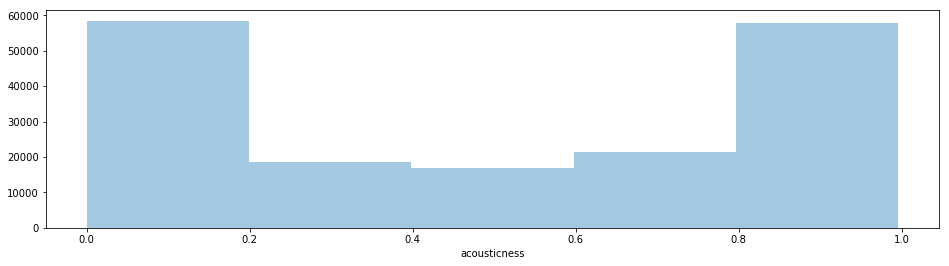

In [56]:
fig, ax = plt.subplots(figsize=(16, 4))
sns.distplot(df_raw['acousticness'], kde=False, bins=5)
plt.show()

# 2. Data Preprocessing

<a id="output_variable"></a>

### $\bullet$ Variable to predict

[Back to top](#plan)

The variable we want to predict is the popularity of a song, based on its characteristics, artist and date of release.

In [125]:
df_raw.popularity.describe()

count    173292.00000
mean         25.76348
std          21.86921
min           0.00000
25%           1.00000
50%          26.00000
75%          42.00000
max         100.00000
Name: popularity, dtype: float64

In [126]:
df_raw[df_raw['popularity'] > 90]

acousticness  danceability  duration_ms  energy  explicit  \
19411       0.48300         0.716       165907   0.512         0   
19611       0.12200         0.548       174000   0.816         0   
19803       0.22100         0.700       140526   0.722         1   
19805       0.49900         0.436       279204   0.655         1   
19807       0.46800         0.737       172325   0.802         1   
19809       0.23700         0.830       173711   0.585         1   
19811       0.19000         0.711       123429   0.598         1   
19813       0.21300         0.662       161385   0.413         1   
19815       0.11400         0.823       190476   0.586         1   
19817       0.21800         0.889       174321   0.340         0   
19819       0.65000         0.709       160000   0.548         1   
19821       0.01940         0.935       187541   0.454         1   
19825       0.12000         0.810       154998   0.511         1   
19827       0.40100         0.731       205090   0.573         1   
19833       0.24700         0.746       181733   0.690         1   
19837       0.58400         0.357       198040   0.425         0   
19841       0.78600         0.642       169266   0.374         0   
19849       0.86400         0.631       149297   0.239         1   
19865       0.06760         0.652       178994   0.383         0   
19869       0.03030         0.856       203201   0.618         0   
19915       0.00691         0.566       207481   0.716         0   
19917       0.21200         0.863       178947   0.666         1   
19925       0.01120         0.746       199054   0.765         0   
19959       0.40100         0.731       205090   0.573         1   
20003       0.72100         0.585       242014   0.436         1   
20009       0.18100         0.686       190779   0.538         0   
39103       0.16800         0.734       166028   0.874         0   
39119       0.41400         0.798       164000   0.620         0   
39291       0.18000         0.736       216107   0.632         0   
76070       0.36200         0.725       186133   0.756         0   
76152       0.12200         0.713       232853   0.617         0   

                           id  instrumentalness  key  liveness  loudness  ...  \
19411  7uoFMmxln0GPXQ0AcCBXRq          0.000000    1    0.0928    -6.257  ...   
19611  6UelLqGlWMcVH1E5c4H7lY          0.000000    0    0.3350    -4.209  ...   
19803  3tjFYV6RSFtuktYl3ZtYcq          0.000000    7    0.2720    -3.558  ...   
19805  3YJJjQPAbDT7mGpX3WtQ9A          0.000008    1    0.6880    -8.370  ...   
19807  35mvY5S1H3J2QZyna3TFe0          0.000000    0    0.0931    -4.771  ...   
19809  6Im9k8u9iIzKMrmV7BWtlF          0.000000    0    0.2480    -6.476  ...   
19811  5vGLcdRuSbUhD8ScwsGSdA          0.000000    3    0.1500    -7.621  ...   
19813  27OeeYzk6klgBh83TSvGMA          0.000000    0    0.1340    -7.357  ...   
19815  0PvFJmanyNQMseIFrU708S          0.000000    6    0.1930    -6.606  ...   
19817  54bFM56PmE4YLRnqpW6Tha          0.130000   11    0.0550    -7.773  ...   
19819  1tkg4EHVoqnhR6iFEXb60y          0.000002   10    0.1330    -8.493  ...   
19821  4Oun2ylbjFKMPTiaSbbCih          0.000000    1    0.0824    -7.509  ...   
19825  6zFMeegAMYQo0mt8rXtrli          0.000000    5    0.0832    -6.924  ...   
19827  47EiUVwUp4C9fGccaPuUCS          0.000052    4    0.1130   -10.059  ...   
19833  7ytR5pFWmSjzHJIeQkgog4          0.000000   11    0.1010    -7.956  ...   
19837  4xqrdfXkTW4T0RauPLv3WA          0.000000    5    0.3220    -7.301  ...   
19841  45bE4HXI0AwGZXfZtMp8JR          0.000000    4    0.0906    -9.386  ...   
19849  4y4spB9m0Q6026KfkAvy9Q          0.000000   11    0.1160    -7.071  ...   
19865  2Z8yfpFX0ZMavHkcIeHiO1          0.000000    2    0.0828    -7.076  ...   
19869  2XIc1pqjXV3Cr2BQUGNBck          0.000000    7    0.0866    -4.892  ...   
19915  249gnXrbfmV8NG6jTEMSwD          0.000000    1    0.3700    -5.733  ...   
19917  7vrJn5hDSXRmdXoR30KgF1          0.000493 

The popularity rating is a numerical value between 0 and 100 attributed to each song, 100 meaning that a song is very popular. Out of 173,292 total songs, only 31 have a popularity rating of 90 or above.

<a id="naive_training"></a>

### $\bullet$ Numericalize

[Back to top](#plan)

In [ ]:
df, y, nas = proc_df(df_raw, 'popularity')

In [130]:
display_all(df.describe(include='all', datetime_is_numeric=True).T)

count unique    top    freq         mean  \
acousticness              173292    NaN    NaN     NaN      0.49715   
danceability              173292    NaN    NaN     NaN     0.537515   
duration_ms               173292    NaN    NaN     NaN       232649   
energy                    173292    NaN    NaN     NaN     0.483943   
explicit                  173292    NaN    NaN     NaN    0.0683067   
id                        173292    NaN    NaN     NaN      85613.8   
instrumentalness          173292    NaN    NaN     NaN     0.197738   
key                       173292    NaN    NaN     NaN      5.20808   
liveness                  173292    NaN    NaN     NaN     0.210761   
loudness                  173292    NaN    NaN     NaN     -11.7252   
mode                      173292    NaN    NaN     NaN     0.701925   
name                      173292    NaN    NaN     NaN      67873.6   
speechiness               173292    NaN    NaN     NaN     0.105726   
tempo                     173292    NaN    NaN     NaN      117.072   
valence                   173292    NaN    NaN     NaN     0.525658   
year                      173292    NaN    NaN     NaN      1977.14   
#artists                  173292    NaN    NaN     NaN      1.30081   
main_artist               173292    NaN    NaN     NaN      11528.3   
artist2                   173292    NaN    NaN     NaN        889.5   
artist3                   173292    NaN    NaN     NaN      122.859   
artist4                   173292    NaN    NaN     NaN      14.1615   
artist5                   173292    NaN    NaN     NaN      1.15942   
release_Year              173292    NaN    NaN     NaN      1977.14   
release_Month             173292    NaN    NaN     NaN      4.35871   
release_Week              173292    NaN    NaN     NaN      26.0191   
release_Day               173292    NaN    NaN     NaN      8.32675   
release_Dayofweek         173292    NaN    NaN     NaN      2.69245   
release_Dayofyear         173292    NaN    NaN     NaN      110.224   
release_Is_month_end      173292      2  False  167554          NaN   
release_Is_month_start    173292      2   True   93970          NaN   
release_Is_quarter_end    173292      2  False  169095          NaN   
release_Is_quarter_start  173292      2  False   88350          NaN   
release_Is_year_end       173292      2  False  169761          NaN   
release_Is_year_start     173292      2  False   91060          NaN   
release_Elapsed           173292    NaN    NaN     NaN  2.34599e+08   

                                  std          min         25%         50%  \
acousticness                 0.379615            0      0.0865       0.512   
danceability                 0.175757            0       0.415       0.549   
duration_ms                    148080         4937      166160      205733   
energy                       0.272597            0        0.25       0.467   
explicit                     0.252272            0           0           0   
id                            49409.7            1     42822.8     85642.5   
instrumentalness             0.334911            0           0    0.000526   
key                           3.51845            0           2           5   
liveness                     0.180245            0      0.0991       0.138   
loudness                      5.68001          -60     -14.871     -10.809   
mode                         0.457414            0           0           1   
name                          39023.7            1     34480.8       67955   
speechiness                  0.182537            0      0.0351      0.0454   
tempo                         30.2337            0      93.998     115.924   
valence                      0.264198            0       0.312       0.537   
year                          26.9188         1920        1956        1977   
#artists                     0.680719            1           1           1   
main_artist                   6634.28            1        6148    

In [133]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

In [132]:
model = RandomForestRegressor(n_jobs = -1, random_state = 42)

%time model.fit(df, y)
model.score(df, y)

CPU times: user 6min 51s, sys: 4.75 s, total: 6min 56s
Wall time: 1min 5s


0.965738486451447

In [134]:
n_total = len(df)
n_valid = 50000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 173292
number of validation data points : 50000
number of training data points : 123292
number of subsampled training points : 20000


In [135]:
df, y, nas = proc_df(df_raw, 'popularity')

X_train, X_valid = split_vals(df, n_train)
y_train, y_valid = split_vals(y, n_train)


print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 23), y = (20000,)
Number of full training data points: X = (123292, 23), y = (123292,)
Number of validation data points: X = (50000, 23), y = (50000,)


In [136]:
base_model = RandomForestRegressor(n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

CPU times: user 3min 45s, sys: 3.16 s, total: 3min 48s
Wall time: 36.3 s
RMSE on train set: 4.1002
RMSE on valid set: 15.0976
R^2 on train set: 0.9670
R^2 on valid set: 0.4062


High RMSE and low R^2 on the validation set

<a id="convert_date"></a>

### $\bullet$ Convert date times

[Back to top](#plan)

In [79]:
df_raw.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'release_date', 'speechiness', 'tempo', 'valence', 'year',
       '#artists', 'main_artist', 'artist2', 'artist3', 'artist4', 'artist5'],
      dtype='object')

In [80]:
df_raw.fiModelDesc.value_counts()

AttributeError: 'DataFrame' object has no attribute 'fiModelDesc'

In [82]:
fld = df_raw.release_date

In [83]:
fld

0        1920-01-01
1        1920-01-05
2        1920-01-01
3        1920-01-01
4        1920-10-01
            ...    
173287   2020-12-25
173288   2021-01-22
173289   2020-12-09
173290   2021-01-07
173291   2020-12-09
Name: release_date, Length: 173292, dtype: datetime64[ns]

In [85]:
fld.dt

In [87]:
# exemple of utilisation of copy.deepcopy to avoid inplace operations
dicto = {'key' : 0}

def modifyDict(python_dict: dict):
    dict_copy = copy.deepcopy(python_dict)
    dict_copy['key2'] = 1
    return dict_copy

dicto2 = modifyDict(dicto)

print(dicto2)

{'key': 0, 'key2': 1}


In [88]:
df_backup = copy.deepcopy(df_raw)

In [89]:
# add_datepart adds new columns to the dataframe, INPLACE
add_datepart(df_raw, 'release_date')

/Users/yanismartinet/Documents/GitHub/ML-Spotify/notebooks/emlyon_module/structured.py:124: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [90]:
# comparaison of dataframe shape before & after applying add_datepart
print(df_backup.shape)
print(df_raw.shape)

(173292, 24)
(173292, 36)


In [91]:
df_raw['year'].head()

0    1920
1    1920
2    1920
3    1920
4    1920
Name: year, dtype: int64

In [92]:
df_raw.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'popularity', 'speechiness', 'tempo', 'valence', 'year', '#artists',
       'main_artist', 'artist2', 'artist3', 'artist4', 'artist5',
       'release_Year', 'release_Month', 'release_Week', 'release_Day',
       'release_Dayofweek', 'release_Dayofyear', 'release_Is_month_end',
       'release_Is_month_start', 'release_Is_quarter_end',
       'release_Is_quarter_start', 'release_Is_year_end',
       'release_Is_year_start', 'release_Elapsed'],
      dtype='object')

In [47]:
len(df_raw.columns)

65

<a id="convert_strings"></a>

### $\bullet$ Convert strings into numerotated categories

[Back to top](#plan)

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [48]:
df_raw.dtypes

SalesID                   int64
SalePrice               float64
MachineID                 int64
ModelID                   int64
datasource                int64
                         ...   
saleIs_quarter_end         bool
saleIs_quarter_start       bool
saleIs_year_end            bool
saleIs_year_start          bool
saleElapsed               int64
Length: 65, dtype: object

In [49]:
help(train_cats)

Help on function train_cats in module emlyon_module.structured:

train_cats(df)
    Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category



In [50]:
??train_cats

In [51]:
train_cats(df_raw)

We can specify the order to use for categorical variables if we wish:

In [52]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: category
Categories (3, object): ['High' < 'Low' < 'Medium']

In [53]:
df_raw.UsageBand.cat.categories.tolist()

['High', 'Low', 'Medium']

In [54]:
df_raw.UsageBand.cat.set_categories(['Low', 'Medium', 'High'], ordered=True, inplace=True)

In [55]:
df_raw.UsageBand.cat.categories.tolist()

['Low', 'Medium', 'High']

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [56]:
df_raw.UsageBand

0            Low
1            Low
2           High
3           High
4         Medium
           ...  
401120       NaN
401121       NaN
401122       NaN
401123       NaN
401124       NaN
Name: UsageBand, Length: 401125, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [57]:
df_raw.UsageBand.cat.categories

Index(['Low', 'Medium', 'High'], dtype='object')

In [58]:
df_raw.UsageBand.cat.codes

0         0
1         0
2         2
3         2
4         1
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

In [59]:
# This step overwrites the raw categories with integers
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [60]:
# - values corresponds to NaN values in the original column
df_raw.UsageBand

0         0
1         0
2         2
3         2
4         1
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Name: UsageBand, Length: 401125, dtype: int8

<a id="nans"></a>

### $\bullet$ Inspect missing values

[Back to top](#plan)

In [96]:
display_all(df_raw.isnull().describe().T)

count unique    top    freq
acousticness              173292      1  False  173292
danceability              173292      1  False  173292
duration_ms               173292      1  False  173292
energy                    173292      1  False  173292
explicit                  173292      1  False  173292
id                        173292      1  False  173292
instrumentalness          173292      1  False  173292
key                       173292      1  False  173292
liveness                  173292      1  False  173292
loudness                  173292      1  False  173292
mode                      173292      1  False  173292
name                      173292      1  False  173292
popularity                173292      1  False  173292
speechiness               173292      1  False  173292
tempo                     173292      1  False  173292
valence                   173292      1  False  173292
year                      173292      1  False  173292
#artists                  173292      1  False  173292
main_artist               173292      1  False  173292
artist2                   173292      2   True  137514
artist3                   173292      2   True  161559
artist4                   173292      2   True  169634
artist5                   173292      2   True  172333
release_Year              173292      1  False  173292
release_Month             173292      1  False  173292
release_Week              173292      1  False  173292
release_Day               173292      1  False  173292
release_Dayofweek         173292      1  False  173292
release_Dayofyear         173292      1  False  173292
release_Is_month_end      173292      1  False  173292
release_Is_month_start    173292      1  False  173292
release_Is_quarter_end    173292      1  False  173292
release_Is_quarter_start  173292      1  False  173292
release_Is_year_end       173292      1  False  173292
release_Is_year_start     173292      1  False  173292
release_Elapsed           173292      1  False  173292

In [97]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

#artists                    0.000000
acousticness                0.000000
artist2                     0.793539
artist3                     0.932293
artist4                     0.978891
artist5                     0.994466
danceability                0.000000
duration_ms                 0.000000
energy                      0.000000
explicit                    0.000000
id                          0.000000
instrumentalness            0.000000
key                         0.000000
liveness                    0.000000
loudness                    0.000000
main_artist                 0.000000
mode                        0.000000
name                        0.000000
popularity                  0.000000
release_Day                 0.000000
release_Dayofweek           0.000000
release_Dayofyear           0.000000
release_Elapsed             0.000000
release_Is_month_end        0.000000
release_Is_month_start      0.000000
release_Is_quarter_end      0.000000
release_Is_quarter_start    0.000000
r

<a id="save_data"></a>

### $\bullet$ Save preprocessed data

[Back to top](#plan)

But let's save this file for now, since it's already in a format which can be stored and accessed efficiently.

In [98]:
path_to_tmp = os.path.join(path_to_repo, "data", "tmp")

In [99]:
path_to_tmp

'/Users/yanismartinet/Documents/GitHub/ML-Spotify/data/tmp'

In [100]:
os.makedirs(path_to_tmp, exist_ok = True)

In [101]:
path_to_data_raw = os.path.join(path_to_tmp, 'spotify-raw')

In [102]:
path_to_data_raw

'/Users/yanismartinet/Documents/GitHub/ML-Spotify/data/tmp/spotify-raw'

In [69]:
# 18 MB
df_raw.to_feather(path_to_bulldozers_raw)

In [70]:
# 140 MB !!
df_raw.to_csv(path_to_bulldozers_raw + '.csv', index = False)

In [71]:
help(df_raw.to_csv)

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf:Union[str, pathlib.Path, IO[~AnyStr], NoneType]=None, sep:str=',', na_rep:str='', float_format:Union[str, NoneType]=None, columns:Union[Sequence[collections.abc.Hashable], NoneType]=None, header:Union[bool, List[str]]=True, index:bool=True, index_label:Union[bool, str, Sequence[collections.abc.Hashable], NoneType]=None, mode:str='w', encoding:Union[str, NoneType]=None, compression:Union[str, Mapping[str, str], NoneType]='infer', quoting:Union[int, NoneType]=None, quotechar:str='"', line_terminator:Union[str, NoneType]=None, chunksize:Union[int, NoneType]=None, date_format:Union[str, NoneType]=None, doublequote:bool=True, escapechar:Union[str, NoneType]=None, decimal:Union[str, NoneType]='.', errors:str='strict') -> Union[str, NoneType] method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    .. versionchanged:: 0.24.0
        The order of arguments for Series

<a id="numericalize_data"></a>

### $\bullet$ Fully numericalize data

[Back to top](#plan)

In the future we can simply read it from this fast format.

In [72]:
path_to_bulldozers_raw = os.path.join(path_to_repo, 'data', 'tmp', 'bulldozers-raw')

df_raw = pd.read_feather(path_to_bulldozers_raw)
# or
#df_raw = pd.read_csv(path_to_bulldozers_raw + '.csv', low_memory = False)

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [103]:
df, y, nas = proc_df(df_raw, 'popularity')

In [104]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'name',
       'speechiness', 'tempo', 'valence', 'year', '#artists', 'main_artist',
       'artist2', 'artist3', 'artist4', 'artist5', 'release_Year',
       'release_Month', 'release_Week', 'release_Day', 'release_Dayofweek',
       'release_Dayofyear', 'release_Is_month_end', 'release_Is_month_start',
       'release_Is_quarter_end', 'release_Is_quarter_start',
       'release_Is_year_end', 'release_Is_year_start', 'release_Elapsed'],
      dtype='object')

In [79]:
df.head()

SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246     999089     3157         121           3.0      2004   
1  1139248     117657       77         121           3.0      1996   
2  1139249     434808     7009         121           3.0      2001   
3  1139251    1026470      332         121           3.0      2001   
4  1139253    1057373    17311         121           3.0      2007   

   MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0                      68.0          0          950          296  ...   
1                    4640.0          0         1725          527  ...   
2                    2838.0          2          331          110  ...   
3                    3486.0          2         3674         1375  ...   
4                     722.0          1         4208         1529  ...   

   saleDayofyear  saleIs_month_end  saleIs_month_start  saleIs_quarter_end  \
0            320             False               False               False   
1             86             False               False               False   
2             57             False               False               False   
3            139             False               False               False   
4            204             False               False               False   

   saleIs_quarter_start  saleIs_year_end  saleIs_year_start  saleElapsed  \
0                 False            False              False   1163635200   
1                 False            False              False   1080259200   
2                 False            False              False   1077753600   
3                 False            False              False   1305763200   
4                 False            False              False   1248307200   

   auctioneerID_na  MachineHoursCurrentMeter_na  
0            False                        False  
1            False                        False  
2            False                        False  
3            False                        False  
4            False                        False  

[5 rows x 66 columns]

We now have something we can pass to a random forest!

# 3. Random Forests

[Back to top](#plan)

<a id='model_scoring'></a>

### $\bullet$ Model scoring, underfitting, overfitting

[Back to top](#plan)

In [80]:
# define the path to dataset
path_to_datasets = os.path.join(path_to_bulldozers, 'Train.csv')
print(path_to_datasets)

# import raw data
df_raw = pd.read_csv(path_to_datasets, low_memory = False, parse_dates = ["saledate"])
df_raw.SalePrice = np.log(df_raw.SalePrice)

# preprocess data
df, y, nas = proc_df(df_raw, 'SalePrice')

/Users/yanismartinet/ML/Archive/data/bulldozers/Train.csv


In [105]:
model = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 42)

%time model.fit(df, y)
model.score(df, y)

CPU times: user 1min 13s, sys: 650 ms, total: 1min 14s
Wall time: 12.1 s


0.9591865857425768

In [106]:
def split_vals(df, n): 
    return df[:n].copy(), df[n:].copy()

In [107]:
n_total = len(df)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 173292
number of validation data points : 12000
number of training data points : 161292
number of subsampled training points : 20000


In [108]:
n_total = len(df)
n_valid = 12000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 20000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

df, y, nas = proc_df(df_raw, 'popularity')

X_train, X_valid = split_vals(df, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small, _ = split_vals(df, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (20000, 35), y = (20000,)
Number of full training data points: X = (161292, 35), y = (161292,)
Number of validation data points: X = (12000, 35), y = (12000,)


<a id='model_base'></a>

### $\bullet$ Base model

[Back to top](#plan)

Let's try our model again, this time with separate training and validation sets.

In [109]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

In [86]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

In [88]:
# model on small training data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.81 s, sys: 19.4 ms, total: 1.83 s
Wall time: 480 ms
RMSE on train set: 0.1033
RMSE on valid set: 0.3382
R^2 on train set: 0.9784
R^2 on valid set: 0.7957


In [89]:
# model on full training data
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

CPU times: user 42.3 s, sys: 590 ms, total: 42.8 s
Wall time: 9.03 s
RMSE on train set: 0.0906
RMSE on valid set: 0.2493
R^2 on train set: 0.9828
R^2 on valid set: 0.8890


An r^2 in the high-80's isn't bad at all (and the RMSLE puts us around rank 100 of 470 on the Kaggle leaderboard), but we can see from the validation set score that we're over-fitting badly. To understand this issue, let's simplify things down to a single small tree.

<a id="single_tree"></a>

### $\bullet$ Single tree

[Back to top](#plan)

**Option 1**: Using _sklearn.tree.DecisionTreeRegressor_

In [90]:
model_dt = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = 3, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None,  
    ccp_alpha = 0.0,
    random_state = 42, # None, 
)

In [91]:
%time model_dt.fit(X_small, y_small)
print_score(model_dt, X_small, y_small, X_valid, y_valid)

CPU times: user 82.9 ms, sys: 20.1 ms, total: 103 ms
Wall time: 126 ms
RMSE on train set: 0.4966
RMSE on valid set: 0.5247
R^2 on train set: 0.5015
R^2 on valid set: 0.5084


[Text(1747.25,1988,'X[38] <= 0.5\nmse = 0.495\nsamples = 20000\nvalue = 10.189'),
 Text(873.625,1420,'X[20] <= 2.0\nmse = 0.414\nsamples = 16815\nvalue = 10.345'),
 Text(436.812,852,'X[2] <= 4573.0\nmse = 0.331\nsamples = 4400\nvalue = 9.955'),
 Text(218.406,284,'mse = 0.315\nsamples = 2002\nvalue = 10.226'),
 Text(655.219,284,'mse = 0.232\nsamples = 2398\nvalue = 9.728'),
 Text(1310.44,852,'X[20] <= 4.5\nmse = 0.37\nsamples = 12415\nvalue = 10.484'),
 Text(1092.03,284,'mse = 0.29\nsamples = 7193\nvalue = 10.736'),
 Text(1528.84,284,'mse = 0.272\nsamples = 5222\nvalue = 10.137'),
 Text(2620.88,1420,'X[5] <= 1999.5\nmse = 0.109\nsamples = 3185\nvalue = 9.363'),
 Text(2184.06,852,'X[15] <= 40.5\nmse = 0.101\nsamples = 468\nvalue = 8.988'),
 Text(1965.66,284,'mse = 0.069\nsamples = 293\nvalue = 8.896'),
 Text(2402.47,284,'mse = 0.118\nsamples = 175\nvalue = 9.143'),
 Text(3057.69,852,'X[8] <= 3030.0\nmse = 0.082\nsamples = 2717\nvalue = 9.427'),
 Text(2839.28,284,'mse = 0.062\nsamples = 1

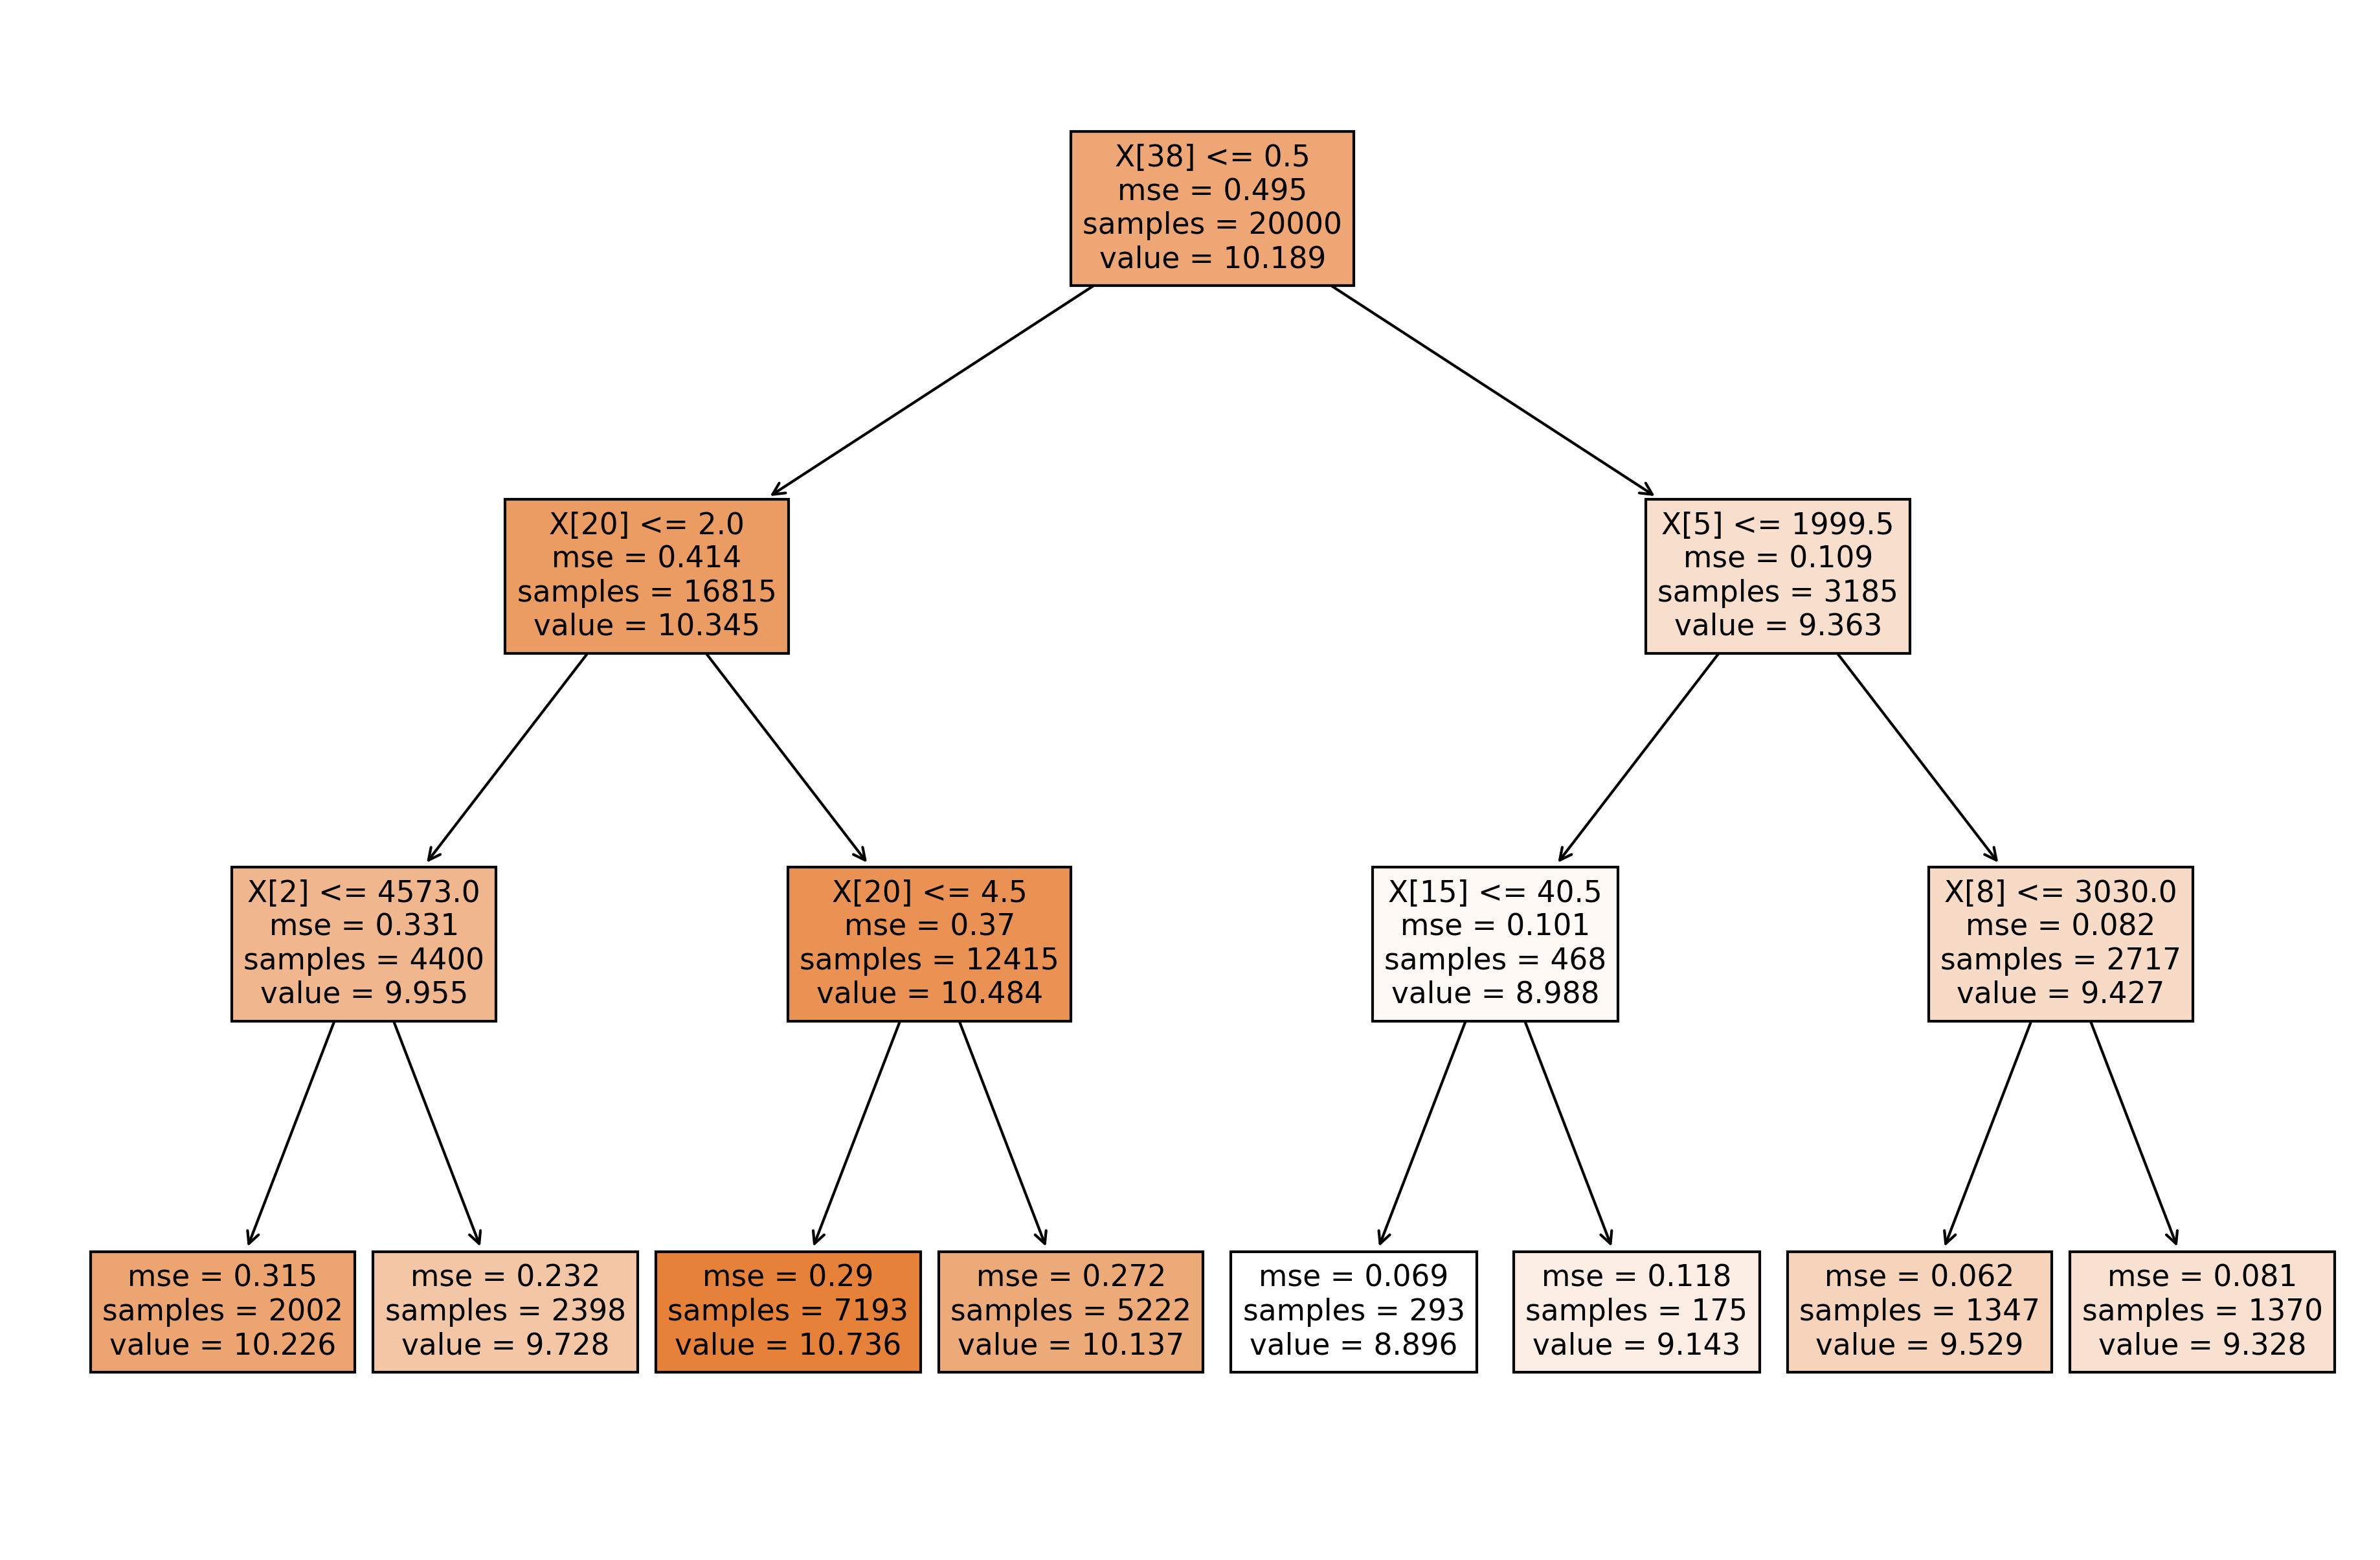

In [92]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (15, 10), dpi = 300)
plot_tree(model_dt, filled = True)

In [93]:
draw_tree(model_dt, X_small, precision = 3)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

**Option 2**: Using _sklearn.ensemble.RandomForestRegressor_

In [94]:
model_rf = RandomForestRegressor(
    # parameters shared with DecisionTreeRegressor
    n_estimators = 1, # 100 # 1 = the model is a single tree
    criterion = 'mse', 
    max_depth = 3, # None
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, # None, 
    
    # RandomForestRegressor specific hyperparameters
    bootstrap = False, # default = True 
    oob_score = False, 
    max_samples = None,

    # extra parameters
    warm_start = False, 
    n_jobs = -1, # None 
    verbose = 0, 
)

In [95]:
%time model_rf.fit(X_small, y_small)
print_score(model_rf, X_small, y_small, X_valid, y_valid)

CPU times: user 90 ms, sys: 15.7 ms, total: 106 ms
Wall time: 175 ms
RMSE on train set: 0.4966
RMSE on valid set: 0.5247
R^2 on train set: 0.5015
R^2 on valid set: 0.5084


In [96]:
# first install graphviz source files, see:
# https://forum.graphviz.org/t/new-simplified-installation-procedure-on-windows/224#abbreviated-installation-instructions-recommended-for-users-with-installation-experience

draw_tree(model_rf.estimators_[0], X_small, precision = 3)

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [97]:
X_small.fiProductClassDesc

0        59
1        62
2        39
3         8
4        40
         ..
19995    67
19996    61
19997    27
19998    62
19999    35
Name: fiProductClassDesc, Length: 20000, dtype: int8

In [98]:
df_raw.fiProductClassDesc.tolist()[:50]

['Wheel Loader - 110.0 to 120.0 Horsepower',
 'Wheel Loader - 150.0 to 175.0 Horsepower',
 'Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity',
 'Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons',
 'Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
 'Wheel Loader - 350.0 to 500.0 Horsepower',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Track Type Tractor, Dozer - 20.0 to 75.0 Horsepower',
 'Hydraulic Excavator, Track - 19.0 to 21.0 Metric Tons',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth',
 'Hydraulic Excavator, Track - 3.0 to 4.0 Metric Tons',
 'Hydraulic Excavator, Track - 4.0 to

Let's see what happens if we create a bigger tree.

In [99]:
model_dt = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = None,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    random_state = 42, # None,  
    ccp_alpha = 0.0, 
)

In [100]:
model_dt.fit(X_small, y_small)
print_score(model_dt, X_small, y_small, X_valid, y_valid)

RMSE on train set: 0.0000
RMSE on valid set: 0.4454
R^2 on train set: 1.0000
R^2 on valid set: 0.6457


<a id="tree_bagging"></a>

### $\bullet$ Tree bagging

[Back to top](#plan)

The training set result looks great! But the validation set is worse than our original model. This is why we need to use *bagging* of multiple trees to get more generalizable results. To learn about bagging in random forests, let's start with our basic model again.<br>

By the way, Bagging is the reduction of __B__oostrap **Agg**regation.

In [101]:
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.81 s, sys: 39.4 ms, total: 1.84 s
Wall time: 495 ms
RMSE on train set: 0.1033
RMSE on valid set: 0.3382
R^2 on train set: 0.9784
R^2 on valid set: 0.7957


In [102]:
base_model = RandomForestRegressor(n_estimators = 10, max_depth = 15, min_samples_split = 15, n_jobs = -1, random_state = 42)

%time base_model.fit(X_small, y_small)
print_score(base_model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.3 s, sys: 9.62 ms, total: 1.31 s
Wall time: 362 ms
RMSE on train set: 0.1760
RMSE on valid set: 0.3318
R^2 on train set: 0.9374
R^2 on valid set: 0.8034


In [103]:
base_model = RandomForestRegressor(n_estimators = 10, n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

CPU times: user 42.2 s, sys: 563 ms, total: 42.8 s
Wall time: 9.39 s
RMSE on train set: 0.0906
RMSE on valid set: 0.2493
R^2 on train set: 0.9828
R^2 on valid set: 0.8890


In [104]:
point = X_valid.iloc[0,:]
print(point)

price = y_valid[0]
print(price, np.exp(price))

SalesID                        4364751
MachineID                      2300944
ModelID                            665
datasource                         172
auctioneerID                         1
YearMade                          1999
MachineHoursCurrentMeter          3726
UsageBand                            2
saledate                          3581
fiModelDesc                       3232
fiBaseModel                       1111
fiSecondaryDesc                      0
fiModelSeries                       63
fiModelDescriptor                    0
ProductSize                          5
fiProductClassDesc                  17
state                               35
ProductGroup                         4
ProductGroupDesc                     4
Drive_System                         0
Enclosure                            1
Forks                                0
Pad_Type                             0
Ride_Control                         0
Stick                                0
Transmission             

In [105]:
# the model makes prediction with model.predict method
# base_model.predict

# predict takes a list as input, so we turn our single point as a list (with a single element)
base_model.predict([point])

# the model returns a list, so we take the first element, and apply exponetial
np.exp(base_model.predict([point])[0])

10076.438573159556

We'll grab the predictions for each individual tree, and look at one example.

In [106]:
# model prediction on single data point
trees = base_model
point = [X_valid.iloc[0, :]]
pred = trees.predict(point)

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 10076.43857315954


In [107]:
# first tree prediction on single data point
tree = base_model.estimators_[0] # chose between 0 and 9 since we have 10 estimators
point = [X_valid.iloc[0, :]]     # tree.predict takes an iterable of data points as input
pred = tree.predict(point)       # tree.predict returns a numpy tensor of predictions as output

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 9600.000000000004


In [108]:
# first tree prediction on single data point
tree = base_model.estimators_[1] # chose between 0 and 9 since we have 10 estimators
point = [X_valid.iloc[0, :]]     # tree.predict takes an iterable of data points as input
pred = tree.predict(point)       # tree.predict returns a numpy tensor of predictions as output

print('Type:', type(pred))
print('Shape:', pred.shape)
print('Value:', np.exp(pred[0]))

Type: <class 'numpy.ndarray'>
Shape: (1,)
Value: 22000.0


In [109]:
# all tree predictions on single data point
trees = base_model.estimators_
point = [X_valid.iloc[0, :]]
preds = np.asarray([tree.predict(point) for tree in trees])

print('Type:', type(preds))
print('Shape:', preds.shape)
print('Value:', np.exp(preds))

Type: <class 'numpy.ndarray'>
Shape: (10, 1)
Value: [[ 9600.]
 [22000.]
 [10000.]
 [ 8300.]
 [10000.]
 [ 9000.]
 [ 9000.]
 [10000.]
 [ 9500.]
 [ 8000.]]


In [110]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in base_model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

((10, 12000),
 array([9.16952, 9.9988 , 9.21034, 9.02401, 9.21034, 9.10498, 9.10498, 9.21034, 9.15905, 8.9872 ]),
 9.217955163039694,
 9.104979856318357)

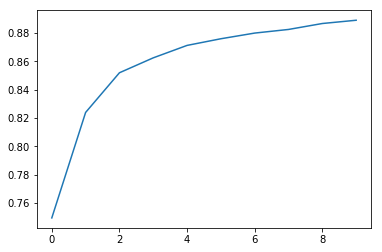

In [111]:
plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 11)
])

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check. (Compare this to our original model on a sample)

In [112]:
model = RandomForestRegressor(n_estimators = 20, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 3.87 s, sys: 289 ms, total: 4.16 s
Wall time: 788 ms
RMSE on train set: 0.0939
RMSE on valid set: 0.3289
R^2 on train set: 0.9822
R^2 on valid set: 0.8068


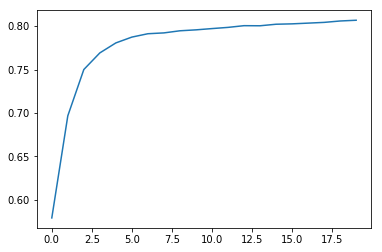

In [113]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 21)
])

In [114]:
model = RandomForestRegressor(n_estimators = 30, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 5.92 s, sys: 149 ms, total: 6.07 s
Wall time: 1.12 s
RMSE on train set: 0.0910
RMSE on valid set: 0.3253
R^2 on train set: 0.9833
R^2 on valid set: 0.8111


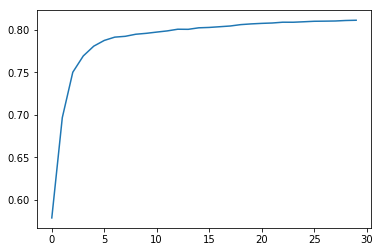

In [115]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 31)
])

In [116]:
model = RandomForestRegressor(n_estimators = 40, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.57 s, sys: 111 ms, total: 7.68 s
Wall time: 1.22 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129


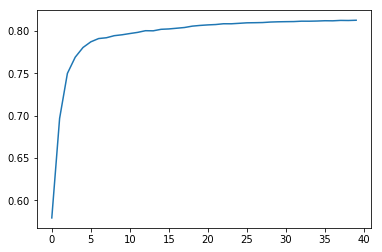

In [117]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 41)
])

In [118]:
model = RandomForestRegressor(n_estimators = 40,  max_depth = 15, min_samples_split = 15, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 5.29 s, sys: 96 ms, total: 5.38 s
Wall time: 888 ms
RMSE on train set: 0.1693
RMSE on valid set: 0.3202
R^2 on train set: 0.9421
R^2 on valid set: 0.8169


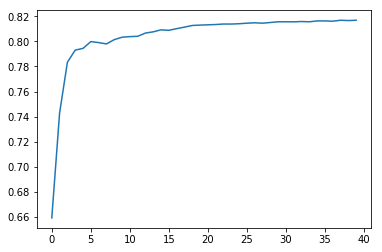

In [119]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 41)
])

In [120]:
model = RandomForestRegressor(n_estimators = 200, n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 37.9 s, sys: 428 ms, total: 38.3 s
Wall time: 5.67 s
RMSE on train set: 0.0845
RMSE on valid set: 0.3191
R^2 on train set: 0.9856
R^2 on valid set: 0.8181


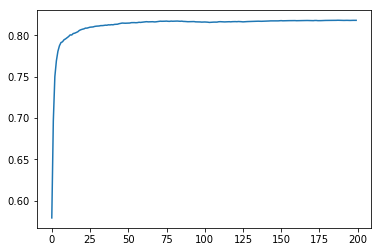

In [121]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 201)
])

In [122]:
model = RandomForestRegressor(n_estimators = 200, max_depth = 15, min_samples_split = 15,  n_jobs = -1, random_state = 42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 27 s, sys: 252 ms, total: 27.3 s
Wall time: 4 s
RMSE on train set: 0.1674
RMSE on valid set: 0.3175
R^2 on train set: 0.9434
R^2 on valid set: 0.8199


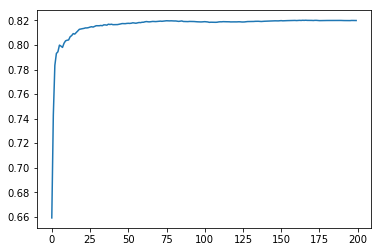

In [123]:
# all tree predictions on all data
preds = np.stack([tree.predict(X_valid) for tree in model.estimators_]) # or np.asarray()

# predictions of the 10 trees, mean, and actual value (for first point in validation set)
preds.shape, preds[:,0], np.mean(preds[:,0]), y_valid[0]

plt.plot([
    metrics.r2_score(y_valid, np.mean(preds[:num_trees], axis = 0)) 
    for num_trees in range(1, 201)
])

<a id='oob_score'></a>

### $\bullet$ Out-of-bag (OOB) score

[Back to top](#plan)

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we've shown, we can't tell. However, random forests have a very clever trick called *out-of-bag (OOB) error* which can handle this (and more!)

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [124]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.58 s, sys: 133 ms, total: 7.71 s
Wall time: 1.49 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129
R^2 on oob set: 0.8846


Bagging trick :

| -| Tree 1  | Tree 2 |
|-----|-----|-----|
|Data 1 | (2 times) | - |
|Data 2  | (1 time) |(2 times) |
|Data 3 | - |(1 time) |

$$
R^2 \text{ on train set } > R^2 \text{ on oob set } \implies \text{ The model is overfitting} \\ 
R^2 \text{ on oob set } > R^2 \text{ on valid set } \implies \text{ Training / Validation sets carry differences} \\
$$

In [125]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 2min 59s, sys: 2.4 s, total: 3min 2s
Wall time: 30.2 s
RMSE on train set: 0.0788
RMSE on valid set: 0.2367
R^2 on train set: 0.9870
R^2 on valid set: 0.9000
R^2 on oob set: 0.9078


<a id='tree_pruning'></a>

### $\bullet$ Stopping criteria

[Back to top](#plan)

A way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with `min_samples_leaf` and `min_samples_split`) that we require some minimum number of rows in every leaf node. This has two benefits:

- There are less decision rules for each leaf node; simpler models should generalize better
- The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [126]:
def decision_tree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

Baseline model

In [127]:
model = RandomForestRegressor(
    n_estimators = 40, 
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.9 s, sys: 80.2 ms, total: 7.98 s
Wall time: 1.55 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129
R^2 on oob set: 0.8846


In [128]:
tree = model.estimators_[0].tree_

decision_tree_max_depth(tree)

33

In [129]:
model = RandomForestRegressor(
    n_estimators = 40, 
    min_samples_split = 15,
    min_samples_leaf = 15,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 5.04 s, sys: 58.4 ms, total: 5.09 s
Wall time: 985 ms
RMSE on train set: 0.2208
RMSE on valid set: 0.3277
R^2 on train set: 0.9014
R^2 on valid set: 0.8082
R^2 on oob set: 0.8650


In [130]:
tree = model.estimators_[0].tree_

decision_tree_max_depth(tree)

21

<a id='data_sampling'></a>

### $\bullet$ Data subsampling

[Back to top](#plan)

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: *subsampling*.<br>

**Let's return to using our full dataset**, so that we can demonstrate the impact of this technique.<br>

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a *different* random subset per tree. That way, given enough trees, the model can still see *all* the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [131]:
model = RandomForestRegressor(
    n_estimators = 40,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 2min 59s, sys: 2.63 s, total: 3min 1s
Wall time: 30.7 s
RMSE on train set: 0.0788
RMSE on valid set: 0.2367
R^2 on train set: 0.9870
R^2 on valid set: 0.9000
R^2 on oob set: 0.9078


In [132]:
model = RandomForestRegressor(
    n_estimators = 40,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.15, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 43 s, sys: 585 ms, total: 43.5 s
Wall time: 9.42 s
RMSE on train set: 0.1895
RMSE on valid set: 0.2434
R^2 on train set: 0.9249
R^2 on valid set: 0.8942
R^2 on oob set: 0.8991


In [133]:
model = RandomForestRegressor(
    n_estimators = 200,
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.15, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 3min 47s, sys: 3.18 s, total: 3min 50s
Wall time: 45.1 s
RMSE on train set: 0.1861
RMSE on valid set: 0.2401
R^2 on train set: 0.9276
R^2 on valid set: 0.8970
R^2 on oob set: 0.9024


<a id='feature_sampling'></a>

### $\bullet$ Feature subsampling

[Back to top](#plan)

In [134]:
X_train.shape

(389125, 54)

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

- None
- 0.5
- 'sqrt'

In [135]:
model = RandomForestRegressor(
    n_estimators = 40,
    #max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 7.63 s, sys: 128 ms, total: 7.75 s
Wall time: 1.36 s
RMSE on train set: 0.0891
RMSE on valid set: 0.3237
R^2 on train set: 0.9839
R^2 on valid set: 0.8129
R^2 on oob set: 0.8846


In [136]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 4.07 s, sys: 37.5 ms, total: 4.1 s
Wall time: 779 ms
RMSE on train set: 0.0855
RMSE on valid set: 0.3161
R^2 on train set: 0.9852
R^2 on valid set: 0.8216
R^2 on oob set: 0.8937


In [137]:
model = RandomForestRegressor(
    n_estimators = 40,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 1min 36s, sys: 1.78 s, total: 1min 38s
Wall time: 17.9 s
RMSE on train set: 0.0775
RMSE on valid set: 0.2304
R^2 on train set: 0.9874
R^2 on valid set: 0.9052
R^2 on oob set: 0.9108


Let us plot the oob error as a function of the number of trees, for some feature sampling euristics (see [sklearn documentation](http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html))

/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833

/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/yanismartinet/opt/anaconda3/envs/fastai-cpu-v0.7/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:833

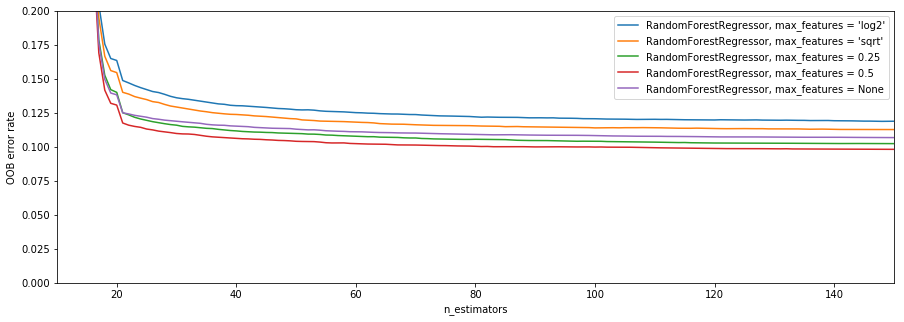

In [138]:
logging.info('warn')

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestRegressor, max_features = 'log2'",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = "log2",
            random_state = 42)),
    ("RandomForestRegressor, max_features = 'sqrt'",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = "sqrt",
            random_state = 42)),
    ("RandomForestRegressor, max_features = 0.25",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = 0.25,
            random_state = 42)),
    ("RandomForestRegressor, max_features = 0.5",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = 0.5,
            random_state = 42)),
    ("RandomForestRegressor, max_features = None",
        RandomForestRegressor(
            warm_start = True, 
            oob_score = True,
            max_features = None,
            random_state = 42)),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators = i)
        clf.fit(X_small, y_small)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize = (15, 5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label = label)

# Show the plot
plt.xlim(min_estimators, max_estimators)
plt.ylim(0., 0.2)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc = "upper right")
plt.show()

#### Combining all together

In [139]:
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 6.62 s, sys: 168 ms, total: 6.79 s
Wall time: 1.24 s
RMSE on train set: 0.1489
RMSE on valid set: 0.3107
R^2 on train set: 0.9552
R^2 on valid set: 0.8276
R^2 on oob set: 0.8943


In [140]:
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 15,
    max_features = 0.75, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 4min 17s, sys: 2 s, total: 4min 19s
Wall time: 40.8 s
RMSE on train set: 0.1473
RMSE on valid set: 0.2297
R^2 on train set: 0.9546
R^2 on valid set: 0.9058
R^2 on oob set: 0.9125


<a id='general_bagging'></a>

### $\bullet$ Bagging as general Ensemble method

[Back to top](#plan)

The Bagging (Bootstrap Aggregation) strategy does not need to be applied to trees only, it can be applied to many different base models. This is done using the `BaggingRegressor` meta-model.<br>

A model generated with `RandomForestRegressor` is almost identical to a model instanciated from `BaggingRegressor`over a base `DecisionTreeRegressor`, with two differences:
- It has its own implementation, making it faster for training
- The feature sampling is _different at every tree node_ (when used)

The 2nd aspect does not hold for models instanciated with `BaggingRegressor`, where feature sampling is done _once and for all_ for each tree at instanciation.

In [141]:
# native Random Forest
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 2,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 11.6 s, sys: 69.2 ms, total: 11.7 s
Wall time: 1.99 s
RMSE on train set: 0.0821
RMSE on valid set: 0.3104
R^2 on train set: 0.9864
R^2 on valid set: 0.8279
R^2 on oob set: 0.9001


In [142]:
# Random Forest built using the Bagging meta-model
base_model = DecisionTreeRegressor(
    criterion = 'mse', # 'mse', 
    splitter = 'best', 
    max_depth = None,
    min_samples_split = 2, 
    min_samples_leaf = 1,
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None,  
    ccp_alpha = 0.0,
    random_state = 42, # None, 
)

model = BaggingRegressor(
    base_estimator = base_model, 
    n_estimators = 100, 

    max_features = 0.5, 
    max_samples = 1.0, 
    
    bootstrap = True, 
    bootstrap_features = False, 
    oob_score = True, 
    
    warm_start = False, 
    n_jobs = -1, 
    random_state = 42, 
    verbose = 0,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 1.48 s, sys: 404 ms, total: 1.88 s
Wall time: 5.15 s
RMSE on train set: 0.0882
RMSE on valid set: 0.3157
R^2 on train set: 0.9843
R^2 on valid set: 0.8220
R^2 on oob set: 0.8878


<a id='cross_validation'></a>

### $\bullet$ Cross validation

[Back to top](#plan)

Random Forests, and more generally Bagging models, come natively with the computation of an out-of-bag score. Non-ensemblist methods does not come with such score, and an alternative is to consider a **Cross validation score**. This score can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set).

In $k$-fold CV, the training set is split into $k$ smaller sets (by default $k$ consecutive evenly-sized splits, with $k=5$). The following procedure is followed for each of the $k$ “folds”:

- A model is trained using $k-1$ of the folds as training data;
- the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute the model's `score` method).

The performance measure reported by $k$-fold cross-validation is then the average of the values computed in the loop. 


<img src="img/cross_valid.png" alt="" style="width: 40%"/>
<center>
Cross validation
</center>

See the [scikitlearn documentation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

This score is dependant on some parameters, such as the number $k$ of folds. Cross validation is also useful for Random Forests when performing **hyperparameter tuning**, addressed in next paragraph.

In [143]:
# native Random Forest
model = RandomForestRegressor(
    n_estimators = 100,
    min_samples_split = 2,
    max_features = None, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 19 s, sys: 342 ms, total: 19.3 s
Wall time: 3.28 s
RMSE on train set: 0.0855
RMSE on valid set: 0.3209
R^2 on train set: 0.9852
R^2 on valid set: 0.8161
R^2 on oob set: 0.8916


In [144]:
# default is cv = 5
scores = cross_val_score(model, X_small, y_small, cv = 8, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.88125 0.88697 0.89592 0.88853 0.87951 0.87685 0.87467 0.84675]
r2 is 0.879 with a standard deviation of 0.014


- Cross validation with a randomized splitting strategy.<br>
This strategy is recommended when the data does not follow a particular order, but *should be avoided for ordered data* (ex data with a temporal ordering).

In [145]:
help(model.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.ensemble._forest.RandomForestRegressor instance
    Return the coefficient of determination :math:`R^2` of the
    prediction.
    
    The coefficient :math:`R^2` is defined as :math:`(1 - \frac{u}{v})`,
    where :math:`u` is the residual sum of squares ``((y_true - y_pred)
    ** 2).sum()`` and :math:`v` is the total sum of squares ``((y_true -
    y_true.mean()) ** 2).sum()``. The best possible score is 1.0 and it
    can be negative (because the model can be arbitrarily worse). A
    constant model that always predicts the expected value of `y`,
    disregarding the input features, would get a :math:`R^2` score of
    0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, 

In [146]:
# randomized splitting strategy
cv = KFold(n_splits = 8, shuffle = True, random_state = 42)

scores = cross_val_score(model, X_small, y_small, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.88937 0.8905  0.89137 0.89028 0.8994  0.88713 0.89104 0.88157]
r2 is 0.890 with a standard deviation of 0.005


- Change the score formula (ex: switch from $R^2$ to Root Mean Squared Error)

In [147]:
scores = cross_val_score(model, X_small, y_small, cv = 8, scoring = 'r2', n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.88125 0.88697 0.89592 0.88853 0.87951 0.87685 0.87467 0.84675]
r2 is 0.879 with a standard deviation of 0.014


In [148]:
scores = cross_val_score(model, X_small, y_small, cv = 8, scoring = 'neg_root_mean_squared_error', n_jobs = -1)

print(scores)
print("RMSE is {:.3f} with a standard deviation of {:.3f}".format(-scores.mean(), scores.std()))

[-0.24339 -0.23182 -0.22132 -0.23138 -0.24444 -0.25685 -0.25317 -0.2712 ]
RMSE is 0.244 with a standard deviation of 0.015


In [149]:
# list of possible keys for scoring
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

<a id='hyperparameter_tuning'></a>

### $\bullet$ Hyperparameter tuning for final model selection

[Back to top](#plan)

Hyper-parameters are parameters that are not directly learnt by calling the model's `fit` method. These hyperparameters are usually set manually, and each different choice will lead to a possibly different result when computing the model's score on a test set. It is however important **not to finetune these hyperparameters on results obtained on the test set**: They must instead be selected using either a dedicated validation set, or through cross validation. 

<img src="img/hyperparameter_tuning.png" alt="" style="width: 40%"/>
<center>
$\textit{Place of Hyperparameter tuning in the process of building a prediction model}$
</center>


<br>
It is completely ok for a Data Scientist to calibrate a model's hyperparameters manually on a separate validation set, as it also informs on the most impacting ones. To complete this approach, we describe here automatic hyperparameter finetuning with cross validation.

Concretely, a hyperparameter search consists of:

- an estimator (classifier or regressor such as `RandomForestRegressor`)

- a parameter space

- a method for searching or sampling candidate parameters

- a cross-validation scheme

- a score function

Two generic approaches to parameter search are provided in scikit-learn: for given values, `GridSearchCV` exhaustively considers all parameter combinations, while `RandomizedSearchCV` can sample a given number of candidates from a parameter space with a specified distribution. Both these tools have successive halving counterparts `HalvingGridSearchCV` and `HalvingRandomSearchCV`, which can be much faster at finding a good parameter combination.



See the [scikitlearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [72]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [76]:
# several grids can be cast into a list
# here we provide only one grid
param_grid = [
    {'n_estimators': [5, 10],
     'max_depth': [10, 20, None],
     'min_samples_split': [2, 10, 50],
     'max_features': [0.25, 0.5, 0.75],
     'max_samples': [0.2, 0.5, 1],
    },
 ]

model = RandomForestRegressor(
    random_state = 42,
    bootstrap = True,
)

In [79]:
tuned_model = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = None, # uses estimator's default score method
    n_jobs = -1, 
    refit = True, # keep a fitted version of the overall best model
    cv = 5, 
    return_train_score = True,
    verbose = 2,
)

In [80]:
tuned_model.fit(X_small, y_small)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [10, 20, None],
                          'max_features': [0.25, 0.5, 0.75],
                          'max_samples': [0.2, 0.5, 1],
                          'min_samples_split': [2, 10, 50],
                          'n_estimators': [5, 10]}],
             return_train_score=True, verbose=2)

In [88]:
best_model = tuned_model.best_estimator_
best_model

RandomForestRegressor(max_features=0.5, max_samples=0.5, n_estimators=10,
                      random_state=42)

In [85]:
print_score(best_model, X_small, y_small, X_valid, y_valid)

RMSE on train set: 0.1590
RMSE on valid set: 0.3370
R^2 on train set: 0.9489
R^2 on valid set: 0.7972


In [93]:
# randomized splitting strategy
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

scores = cross_val_score(best_model, X_small, y_small, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.87758 0.86855 0.87452 0.8693  0.86737]
r2 is 0.871 with a standard deviation of 0.004


# 4. Classification, and what changes from Regression

[Back to top](#plan)

Differences for Classification

- probabilistic predictor
- evaluation for binary clasifiers : 4 indicators, AUC
- evaluation of general clasifiers : per-class indicators, averages
- ovo and ovr strategies

<a id='random_forest_classifier'></a>

### $\bullet$ Random Forest Classifier

[Back to top](#plan)

We shall change our target variable from log sale prices to a set of _categorical sale prices_. Then we will use the `RandomForestClassifier` model to compute prediction.

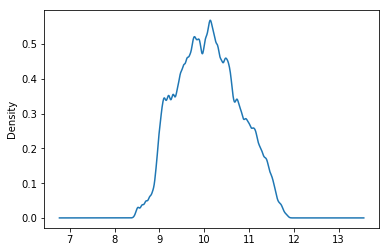

In [12]:
pd.Series(y_train).plot(kind = 'density', bw_method = 0.05)

# alternatively
# sns.set_style('whitegrid')
# sns.kdeplot(np.array(y_train), bw_method = 0.05)

We will recast the sale Price prediction problem as a _binary classification_ problem:

In [19]:
n_classes = 2

# intervals are taken along the median (10.165):
# ]8.463, 10.165]
# ]10.165, 11.864]
intervals = pd.cut(y, bins = n_classes)

In [22]:
intervals[:5].tolist()

[Interval(10.165, 11.864, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right'),
 Interval(8.463, 10.165, closed='right')]

In [23]:
type(intervals[0])

pandas._libs.interval.Interval

In [24]:
label_encoder = LabelEncoder()

y_cat = label_encoder.fit_transform(intervals)

In [25]:
y_cat[:5]

array([1, 1, 0, 1, 0])

In [27]:
label_encoder.classes_.tolist()

[Interval(8.463, 10.165, closed='right'),
 Interval(10.165, 11.864, closed='right')]

In [26]:
y_cat_train, y_cat_valid = split_vals(y_cat, n_train)
y_cat_small, _ = split_vals(y_cat, n_small)

y_cat_train.shape, y_cat_valid.shape, y_cat_small.shape

((389125,), (12000,), (20000,))

In [32]:
classifier = RandomForestClassifier(
    n_estimators = 100, 
    class_weight = None, # classifier specific
    criterion = 'gini',  # classifier specific
    max_depth = None, 
    min_samples_split = 2, 
    min_samples_leaf = 1, 
    min_weight_fraction_leaf = 0.0, 
    max_features = 'auto', 
    max_leaf_nodes = None, 
    min_impurity_decrease = 0.0, 
    min_impurity_split = None, 
    ccp_alpha = 0.0, 
    random_state = 42, 
    bootstrap = True, 
    oob_score = True, 
    max_samples = None,
    warm_start = False, 
    n_jobs = -1, 
    verbose = 0, 
)

In [34]:
%time classifier.fit(X_small, y_cat_small)

Wall time: 1.69 s


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [35]:
# classification accuracy on validation set
classifier.score(X_valid, y_cat_valid)

0.8841666666666667

In [36]:
# classification accuracy on oob samples
classifier.oob_score_

0.921

<a id='binary_classifier_scoring'></a>

### $\bullet$ Binary classifier scoring

[Back to top](#plan)


<img src="img/precision_recall_specificity.bmp" alt="" style="width: 50%"/>
<center>
The four metrics for binary classification
</center>

In [ ]:
# TODO

<a id='multiclass_classifier_scoring'></a>

### $\bullet$ Multiclass classifier scoring

[Back to top](#plan)


In [ ]:
# TODO

<a id='model_calibration'></a>

### $\bullet$ Model calibration

[Back to top](#plan)


In [ ]:
# TODO

<a id='bottom'></a>

[Back to top](#plan)